# WKDAY

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import json

import matplotlib.font_manager as fm
plt.rc('font', family='Nanum Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [81]:
wkday_path=Path('../data/raw/제주 관광수요 예측 데이터_비짓제주 요일별 데이터')

In [8]:
wk_1 = pd.read_csv('data/raw/제주 관광수요 예측 데이터_비짓제주 요일별 데이터/JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202301.csv')

In [9]:
wk_1.head()

CL_CD CL_NM         AREA_NM                                ADDR  BASE_YEAR  \
0    c1   관광지   브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)       2023   
1    c1   관광지  (주)제주해양레저 투명카약            제주특별자치도 제주시 애월읍 애월로1길 22       2023   
2    c1   관광지     1100고지(휴게소)             제주특별자치도 서귀포시 1100로 1555       2023   
3    c1   관광지        1100고지습지              제주특별자치도 서귀포시 색달동 산 1-2       2023   
4    c1   관광지          1112도로           제주특별자치도 제주시 명림로 584 (봉개동)       2023   

   BASE_MT  ALL_TOTAL_CO  MON_VIEWS_CO  TUES_VIEWS_CO  WED_VIEWS_CO  \
0        1           110            15             12            14   
1        1            68            11             14            11   
2        1          1587           313            283           222   
3        1          4075           662            643           599   
4        1            79            17              6             9   

   THUR_VIEWS_CO  FRI_VIEWS_CO  SAT_VIEWS_CO  SUN_VIEWS_CO  
0             16            24             6            23  
1              5            10             4            13  
2            185           180           154           250  
3            404           541           502           724  
4             11             9            16            11

In [13]:
wk_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CL_CD          3982 non-null   object
 1   CL_NM          3982 non-null   object
 2   AREA_NM        3982 non-null   object
 3   ADDR           3982 non-null   object
 4   BASE_YEAR      3982 non-null   int64 
 5   BASE_MT        3982 non-null   int64 
 6   ALL_TOTAL_CO   3982 non-null   int64 
 7   MON_VIEWS_CO   3982 non-null   int64 
 8   TUES_VIEWS_CO  3982 non-null   int64 
 9   WED_VIEWS_CO   3982 non-null   int64 
 10  THUR_VIEWS_CO  3982 non-null   int64 
 11  FRI_VIEWS_CO   3982 non-null   int64 
 12  SAT_VIEWS_CO   3982 non-null   int64 
 13  SUN_VIEWS_CO   3982 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 435.7+ KB


In [20]:
wk_1.describe()

BASE_YEAR  BASE_MT  ALL_TOTAL_CO  MON_VIEWS_CO  TUES_VIEWS_CO  \
count     3982.0   3982.0   3982.000000   3982.000000    3982.000000   
mean      2023.0      1.0     96.935460     17.873179      16.097438   
std          0.0      0.0    337.327042     59.219021      56.442447   
min       2023.0      1.0      1.000000      0.000000       0.000000   
25%       2023.0      1.0     26.000000      5.000000       4.000000   
50%       2023.0      1.0     40.000000      8.000000       7.000000   
75%       2023.0      1.0     71.000000     14.000000      13.000000   
max       2023.0      1.0   9038.000000   1511.000000    1416.000000   

       WED_VIEWS_CO  THUR_VIEWS_CO  FRI_VIEWS_CO  SAT_VIEWS_CO  SUN_VIEWS_CO  
count   3982.000000    3982.000000   3982.000000   3982.000000   3982.000000  
mean      12.729784      12.492968     11.630588     10.311904     15.799598  
std       45.014813      40.801063     40.609893     40.316472     56.653998  
min        0.000000       0.000000      0.000000      0.000000      0.000000  
25%        2.000000       3.000000      3.000000      2.000000      4.000000  
50%        5.000000       5.000000      5.000000      4.000000      7.000000  
75%       10.000000      10.000000      9.000000      8.000000     12.000000  
max     1238.000000    1023.000000   1138.000000   1201.000000   1511.000000

In [18]:
wk_1.shape

(3982, 14)

In [16]:
wk_1.iloc[:, 0].unique()

array(['c1', 'c2', 'c3', 'c4'], dtype=object)

In [82]:
wk_files = sorted(wkday_path.glob('JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_2023*.csv'))

In [83]:
dfs = []

for file in wk_files:
    try:
        df = pd.read_csv(file, encoding='utf-8')
        dfs.append(df)
        print(f"Laded: {file.name}")
    except Exception as e:
        print(f"Error loading {file.name}: {e}")

combined_wk = pd.concat(dfs, ignore_index=True)

print("\n=== 요일별 통합 데이터 정보 ===")
print(f"전체 행 수: {len(combined_wk)}")
print("\n처음 5행:")
print(combined_wk.head())

Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202301.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202302.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202303.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202304.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202305.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202306.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202307.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202308.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202309.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202310.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202311.csv
Laded: JT_WKDAY_ACCTO_TRRSRT_SCCNT_LIST_202312.csv

=== 요일별 통합 데이터 정보 ===
전체 행 수: 51046

처음 5행:
  CL_CD CL_NM         AREA_NM                                ADDR  BASE_YEAR  \
0    c1   관광지   브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)       2023   
1    c1   관광지  (주)제주해양레저 투명카약            제주특별자치도 제주시 애월읍 애월로1길 22       2023   
2    c1   관광지     1100고지(휴게소)             제주특별자치도 서귀포시 1100로 1555       2023   
3    c1   관광지        11

In [22]:
combined_wk.describe()

BASE_YEAR       BASE_MT  ALL_TOTAL_CO  MON_VIEWS_CO  TUES_VIEWS_CO  \
count    51046.0  51046.000000  51046.000000  51046.000000   51046.000000   
mean      2023.0      6.712534     83.161756     12.772636      12.629707   
std          0.0      3.427247    342.166965     53.139987      52.571531   
min       2023.0      1.000000      1.000000      0.000000       0.000000   
25%       2023.0      4.000000     14.000000      2.000000       2.000000   
50%       2023.0      7.000000     27.000000      4.000000       4.000000   
75%       2023.0     10.000000     53.000000      9.000000       8.000000   
max       2023.0     12.000000  11645.000000   1854.000000    1896.000000   

       WED_VIEWS_CO  THUR_VIEWS_CO  FRI_VIEWS_CO  SAT_VIEWS_CO  SUN_VIEWS_CO  
count  51046.000000   51046.000000  51046.000000  51046.000000  51046.000000  
mean      12.385300      12.217000     11.531521     10.181190     11.444403  
std       51.310891      49.529004     47.871127     43.296837     49.375670  
min        0.000000       0.000000      0.000000      0.000000      0.000000  
25%        2.000000       2.000000      2.000000      1.000000      1.000000  
50%        4.000000       4.000000      4.000000      3.000000      4.000000  
75%        8.000000       8.000000      8.000000      7.000000      8.000000  
max     1874.000000    1595.000000   1843.000000   1661.000000   1848.000000

In [25]:
combined_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51046 entries, 0 to 51045
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CL_CD          51046 non-null  object 
 1   CL_NM          51046 non-null  object 
 2   AREA_NM        51046 non-null  object 
 3   ADDR           51046 non-null  object 
 4   BASE_YEAR      51046 non-null  int64  
 5   BASE_MT        51046 non-null  int64  
 6   ALL_TOTAL_CO   51046 non-null  int64  
 7   MON_VIEWS_CO   51046 non-null  float64
 8   TUES_VIEWS_CO  51046 non-null  float64
 9   WED_VIEWS_CO   51046 non-null  float64
 10  THUR_VIEWS_CO  51046 non-null  float64
 11  FRI_VIEWS_CO   51046 non-null  float64
 12  SAT_VIEWS_CO   51046 non-null  float64
 13  SUN_VIEWS_CO   51046 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 5.5+ MB


In [7]:
combined_wk.head(3)

CL_CD CL_NM         AREA_NM                                ADDR  BASE_YEAR  \
0    c1   관광지   브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)       2023   
1    c1   관광지  (주)제주해양레저 투명카약            제주특별자치도 제주시 애월읍 애월로1길 22       2023   
2    c1   관광지     1100고지(휴게소)             제주특별자치도 서귀포시 1100로 1555       2023   

   BASE_MT  ALL_TOTAL_CO  MON_VIEWS_CO  TUES_VIEWS_CO  WED_VIEWS_CO  \
0        1           110          15.0           12.0          14.0   
1        1            68          11.0           14.0          11.0   
2        1          1587         313.0          283.0         222.0   

   THUR_VIEWS_CO  FRI_VIEWS_CO  SAT_VIEWS_CO  SUN_VIEWS_CO  
0           16.0          24.0           6.0          23.0  
1            5.0          10.0           4.0          13.0  
2          185.0         180.0         154.0         250.0

In [8]:
combined_wk.tail(3)

CL_CD CL_NM AREA_NM                    ADDR  BASE_YEAR  BASE_MT  \
51043    c4   음식점  흑한우명품관  제주특별자치도 서귀포시 일주동로 8421       2023       12   
51044    c4   음식점    희신이네    제주특별자치도 서귀포시 서홍로 175       2023       12   
51045    c4   음식점      힌즈      제주특별자치도 제주시 월대5길 7       2023       12   

       ALL_TOTAL_CO  MON_VIEWS_CO  TUES_VIEWS_CO  WED_VIEWS_CO  THUR_VIEWS_CO  \
51043            62           8.0            7.0           8.0           12.0   
51044             5           0.0            0.0           0.0            0.0   
51045             4           0.0            0.0           1.0            0.0   

       FRI_VIEWS_CO  SAT_VIEWS_CO  SUN_VIEWS_CO  
51043           9.0           7.0          11.0  
51044           2.0           2.0           1.0  
51045           2.0           0.0           1.0

In [64]:
combined_wk['CL_CD'].unique()

array(['c1', 'c2', 'c3', 'c4'], dtype=object)

In [63]:
combined_wk['CL_NM'].unique()

array(['관광지', '쇼핑', '숙박', '음식점'], dtype=object)

In [73]:
combined_wk[combined_wk['CL_CD'] == 'c1'].head(3)

CL_CD CL_NM         AREA_NM                                ADDR  BASE_YEAR  \
0    c1   관광지   브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)       2023   
1    c1   관광지  (주)제주해양레저 투명카약            제주특별자치도 제주시 애월읍 애월로1길 22       2023   
2    c1   관광지     1100고지(휴게소)             제주특별자치도 서귀포시 1100로 1555       2023   

   BASE_MT  ALL_TOTAL_CO  MON_VIEWS_CO  TUES_VIEWS_CO  WED_VIEWS_CO  \
0        1           110          15.0           12.0          14.0   
1        1            68          11.0           14.0          11.0   
2        1          1587         313.0          283.0         222.0   

   THUR_VIEWS_CO  FRI_VIEWS_CO  SAT_VIEWS_CO  SUN_VIEWS_CO  
0           16.0          24.0           6.0          23.0  
1            5.0          10.0           4.0          13.0  
2          185.0         180.0         154.0         250.0

In [106]:
combined_wk[combined_wk['AREA_NM'] == '브랭섬홀아시아 아이스링크']

CL_CD CL_NM        AREA_NM                                ADDR  \
0        c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
3982     c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
7817     c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
11661    c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
15512    c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
19514    c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
23891    c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
28453    c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
32983    c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
37508    c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
42029    c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   
46554    c1   관광지  브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)   

       BASE_YEAR  BASE_MT  ALL_TOTAL_CO  MON_VIEWS_CO  TUES_VIEWS_CO  \
0           2023        1           110          15.0           12.0   
3982        2023        2           215          30.0           30.0   
7817        2023        3           113          18.0           10.0   
11661       2023        4           106          14.0            7.0   
15512       2023        5           116          19.0           18.0   
19514       2023        6           107          12.0           20.0   
23891       2023        7            94          19.0           14.0   
28453       2023        8            61          13.0            8.0   
32983       2023        9            54           8.0           10.0   
37508       2023       10            60          15.0           12.0   
42029       2023       11            59           3.0            9.0   
46554       2023       12            87          11.0            7.0   

       WED_VIEWS_CO  THUR_VIEWS_CO  FRI_VIEWS_CO  SAT_VIEWS_CO  SUN_VIEWS_CO  
0              14.0           16.0          24.0           6.0          23.0  
3982           23.0           33.0          36.0          40.0          23.0  
7817           18.0           14.0          17.0          20.0          16.0  
11661          15.0           19.0          13.0          24.0          14.0  
15512          22.0           15.0          16.0          12.0          14.0  
19514          14.0           20.0          18.0           8.0          15.0  
23891          15.0            8.0          13.0           9.0          16.0  
28453          11.0           10.0           7.0           6.0           6.0  
32983           6.0            4.0           9.0           8.0           9.0  
37508           5.0           10.0           2.0           6.0          10.0  
42029           9.0           16.0          11.0           7.0           4.0  
46554           6.0            6.0          15.0          17.0          25.0

### 1. 요일별 조회수 패턴 분석

In [84]:
## 요일별 딕셔너리 생성
weekday_cols = {
    'MON_VIEWS_CO': '월요일',
    'TUES_VIEWS_CO': '화요일',
    'WED_VIEWS_CO': '수요일',
    'THUR_VIEWS_CO': '목요일',
    'FRI_VIEWS_CO': '금요일',
    'SAT_VIEWS_CO': '토요일',
    'SUN_VIEWS_CO': '일요일',
}

wk_views = pd.DataFrame({
    kor_name: combined_wk[eng_name].mean()
    for eng_name, kor_name in weekday_cols.items()
}, index=['평균 조회수']).T

In [85]:
wk_views

평균 조회수
월요일  12.772636
화요일  12.629707
수요일  12.385300
목요일  12.217000
금요일  11.531521
토요일  10.181190
일요일  11.444403

In [86]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
print("사용 가능한 폰트:")
for font in sorted(font_list):
    print(font)

사용 가능한 폰트:
.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple LiGothic
Apple LiSung
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
BIZ UDGothic
BIZ UDMincho
BM Dohyeon
BM Hanna 11yrs Old
BM Hanna Air
BM Hanna Pro
BM Jua
BM Kirang Haerang
BM Yeonsung
Baghdad
Bangla MN
Bangla Sangam MN
Baoli SC
Baskerville
Beirut
BiauKaiHK
Big Caslon
Bodoni 72
Bodoni 72 Oldstyl

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_76672/1921129953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=wk_views.index, y=wk_views['평균 조회수'], palette='Blues_d')


NameError: name 'y_max' is not defined

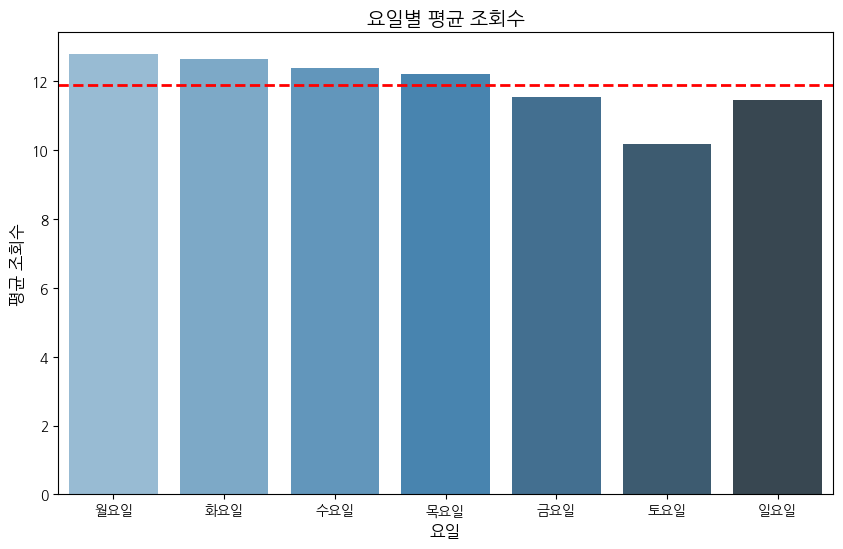

In [87]:
# 요일별 평균 조회수 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=wk_views.index, y=wk_views['평균 조회수'], palette='Blues_d')

# 전체 평균선 추가
overall_mean = wk_views['평균 조회수'].mean()
plt.axhline(y=overall_mean, color='red', linestyle='--', linewidth=2)

# # 텍스트 위치 수정
# plt.text(len(wk_views)-1, overall_mean*1.05, f'전체 평균: {overall_mean:.2f}', 
#          color='red', ha='right', fontweight='bold')

# # 각 막대 위에 값 표시 - get_height() 활용
# for i, bar in enumerate(ax.patches):
#     height = bar.get_height()
#     ax.text(
#         bar.get_x() + bar.get_width()/2,  # x 위치 (막대 중앙)
#         height + 0.1,                     # y 위치 (막대 바로 위, 간격 0.3)
#         f'{height:.2f}',                  # 표시할 텍스트
#         ha='center',                      # 수평 정렬
#         va='bottom',                      # 수직 정렬
#         fontweight='bold',                # 글꼴 굵기
#         fontsize=10                       # 글꼴 크기
#     )

plt.title('요일별 평균 조회수', fontsize=14)
plt.xlabel('요일', fontsize=12)
plt.ylabel('평균 조회수', fontsize=12)

# y축 범위 조정 - 값이 잘 보이도록 여유 공간 확보
# y_max = max(wk_views['평균 조회수']) * 1.1  # 최대값보다 10% 더 높게 설정
plt.ylim(bottom=8, top=y_max)

plt.tight_layout()
plt.show()

In [88]:
# 요일별 TOP 10 관광지 데이터프레임 생성
top10_by_day = {}

for col, day_name in weekday_cols.items():
    # 해당 요일 컬럼으로 정렬하여 TOP 10 추출
    top10 = df.sort_values(by=col, ascending=False).head(10)[['AREA_NM', 'CL_NM', col]]
    top10.columns = ['관광지명', '카테고리', '조회수']
    top10_by_day[day_name] = top10

# 각 요일별 TOP 10 관광지 출력
for day, top10 in top10_by_day.items():
    print(f"\n===== {day} TOP 10 관광지 =====")
    print(top10)


===== 월요일 TOP 10 관광지 =====
                      관광지명 카테고리     조회수
1206               한라산영실코스  관광지  1659.0
459                  사려니숲길  관광지  1074.0
557   성산일출봉(UNESCO 세계자연유산)  관광지   991.0
1203               한라산국립공원  관광지   838.0
441                    비자림  관광지   774.0
912                제주동백수목원  관광지   773.0
251                 동백포레스트  관광지   689.0
779                  용머리해안  관광지   679.0
1479              제주민속오일시장   쇼핑   587.0
3                 1100고지습지  관광지   550.0

===== 화요일 TOP 10 관광지 =====
                      관광지명 카테고리     조회수
1206               한라산영실코스  관광지  1638.0
557   성산일출봉(UNESCO 세계자연유산)  관광지  1112.0
459                  사려니숲길  관광지   934.0
912                제주동백수목원  관광지   772.0
441                    비자림  관광지   744.0
1203               한라산국립공원  관광지   735.0
1479              제주민속오일시장   쇼핑   659.0
251                 동백포레스트  관광지   657.0
779                  용머리해안  관광지   636.0
1111                 카멜리아힐  관광지   586.0

===== 수요일 TOP 10 관광지 =====
                      관광지명 카테고리     

### 2. 요일에 따른 장소 유형별 분석

In [89]:
combined_wk.columns

Index(['CL_CD', 'CL_NM', 'AREA_NM', 'ADDR', 'BASE_YEAR', 'BASE_MT',
       'ALL_TOTAL_CO', 'MON_VIEWS_CO', 'TUES_VIEWS_CO', 'WED_VIEWS_CO',
       'THUR_VIEWS_CO', 'FRI_VIEWS_CO', 'SAT_VIEWS_CO', 'SUN_VIEWS_CO'],
      dtype='object')

In [90]:
# 요일별, CL_NM 히트맵

cl_weekly = combined_wk.groupby('CL_NM')[list(weekday_cols.keys())].mean()
cl_weekly.columns = weekday_cols.values()

In [91]:
print("데이터 형태:")
print(cl_weekly.shape)
print("\n데이터 내용:")
print(cl_weekly.head())
print("\n데이터 타입:")
print(cl_weekly.dtypes)

데이터 형태:
(4, 7)

데이터 내용:
             월요일        화요일        수요일        목요일        금요일        토요일  \
CL_NM                                                                     
관광지    33.045351  32.398978  32.244840  31.062608  29.505350  25.998274   
쇼핑     10.519897  10.388725  10.119381  10.251658   9.660648   9.253132   
숙박      4.289315   4.461218   4.172754   4.364240   3.947467   3.328310   
음식점     4.268552   4.286878   4.009774   4.278009   4.009593   3.568688   

             일요일  
CL_NM             
관광지    29.513426  
쇼핑     10.147015  
숙박      3.745083  
음식점     3.850905  

데이터 타입:
월요일    float64
화요일    float64
수요일    float64
목요일    float64
금요일    float64
토요일    float64
일요일    float64
dtype: object


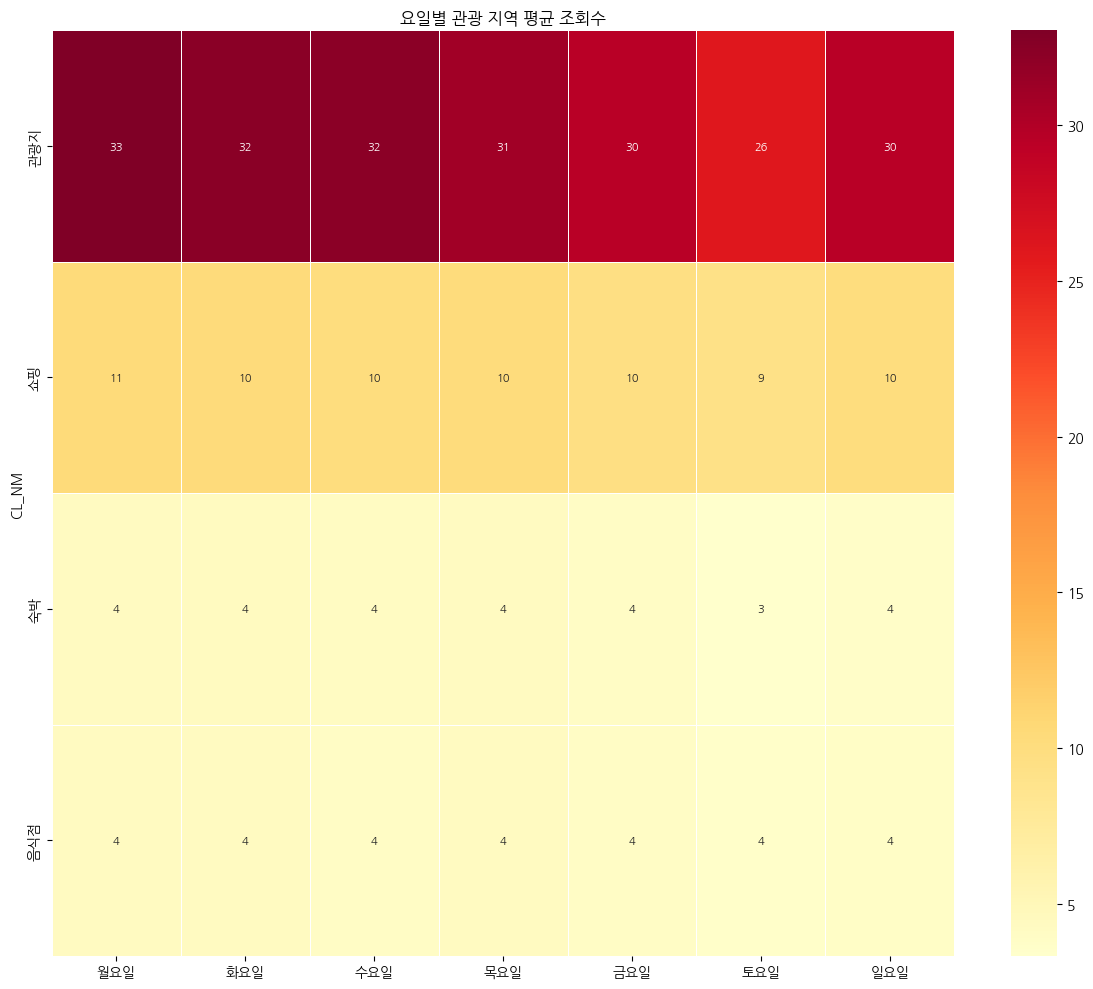

In [92]:
plt.figure(figsize=(12, 10))
sns.heatmap(cl_weekly, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, annot_kws={'size':8})
plt.title('요일별 관광 지역 평균 조회수')
plt.tight_layout()
plt.show()

### 3. 요일별 월 조회 패턴 분석

In [93]:
combined_wk['BASE_MT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [94]:
monthly_avg = combined_wk.groupby('BASE_MT')['ALL_TOTAL_CO'].mean()
monthly_avg

BASE_MT
1      96.935460
2      83.727249
3     103.551769
4     108.948065
5     106.559720
6      85.085675
7      69.816747
8      68.034879
9      70.269392
10     71.664897
11     71.144972
12     73.664515
Name: ALL_TOTAL_CO, dtype: float64

In [95]:
mt_weekly = combined_wk.groupby('BASE_MT')[list(weekday_cols.keys())].mean()
mt_weekly.columns = weekday_cols.values()

print(mt_weekly.head())

               월요일        화요일        수요일        목요일        금요일        토요일  \
BASE_MT                                                                     
1        17.873179  16.097438  12.729784  12.492968  11.630588  10.311904   
2        11.920209  12.170795  13.812256  11.897784  11.564798  10.935072   
3        14.946930  14.336629  16.689126  16.882414  16.541103  11.164412   
4        16.464035  15.369514  14.978447  14.868086  14.721890  16.329784   
5        18.110445  18.898801  17.618191  15.430285  12.932284  11.324588   

               일요일  
BASE_MT             
1        15.799598  
2        11.426336  
3        12.991155  
4        16.216307  
5        12.245127  


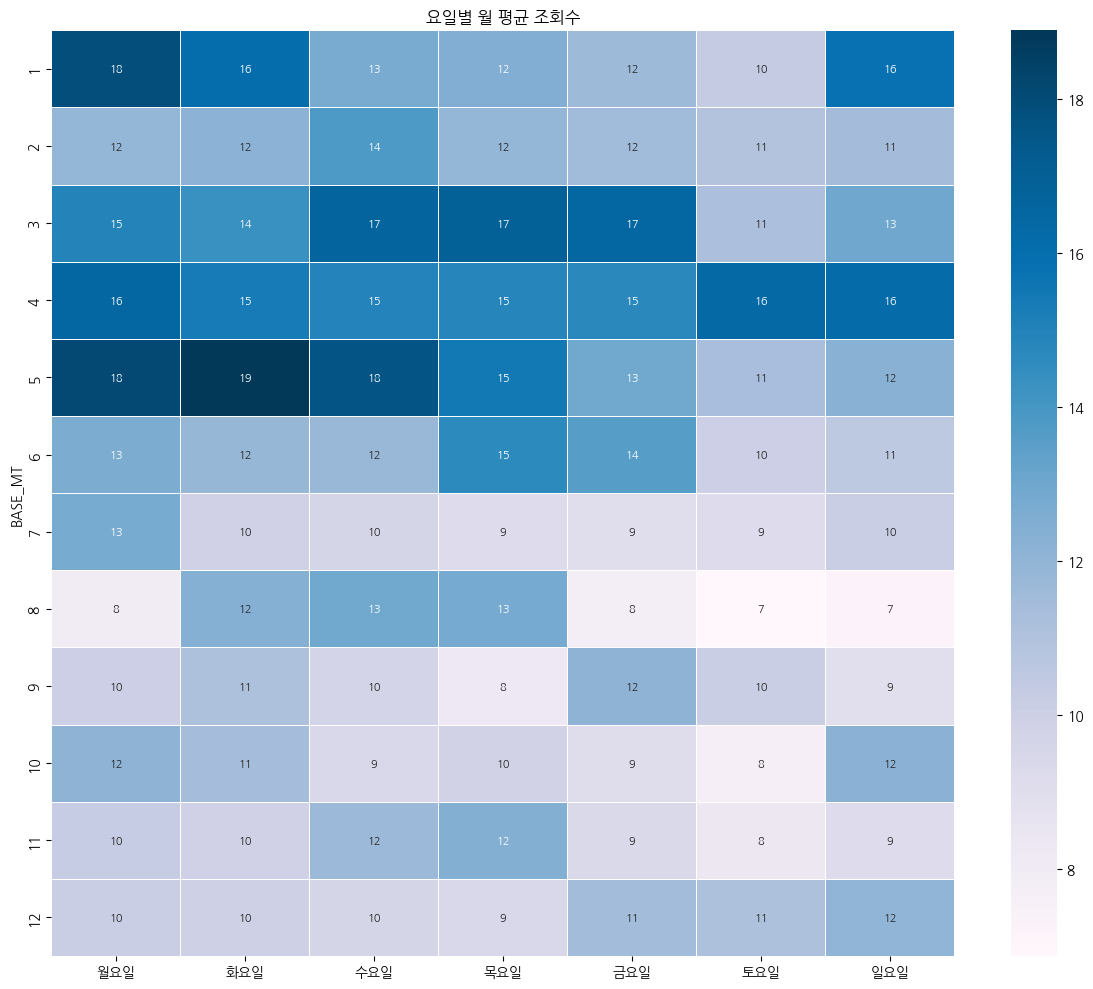

In [97]:
plt.figure(figsize=(12, 10))
sns.heatmap(mt_weekly, annot=True, fmt='.0f', cmap='PuBu', linewidths=0.5, annot_kws={'size':8})
plt.title('요일별 월 평균 조회수')
plt.tight_layout()
plt.show()

In [99]:
season_avg

NameError: name 'season_avg' is not defined

In [98]:
# 1. season_avg.value 대신 season_avg.values 사용해야 함
# 2. sns.barplot에서 x와 y 매개변수 사용 방식 수정 필요
# 3. plt.xticks 사용 방식 오류

# 수정된 코드:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 계절 정의
seasons = {
    '봄': ['3월', '4월', '5월'],
    '여름': ['6월', '7월', '8월'],
    '가을': ['9월', '10월', '11월'],
    '겨울': ['12월', '1월', '2월']
}

# 월별 데이터에 계절 정보 추가
month_views_with_season = month_views.copy()
month_views_with_season['계절'] = month_views_with_season.index.map(
    lambda x: next((season for season, months in seasons.items() if x in months), None)
)

# # 계절별 색상 정의
# season_colors = {
#     '봄': 'orange',
#     '여름': 'lightskyblue',
#     '가을': 'lightgreen',
#     '겨울': 'lightblue'
# }

# 계절별 그룹화 평균 계산
season_avg = month_views_with_season.groupby('계절')['평균 조회수'].mean()

# 계절 순서 지정(봄-여름-가을-겨울)
season_order = ['봄', '여름', '가을', '겨울']
season_avg = season_avg.reindex(season_order)

plt.figure(figsize=(14, 8))

# 막대 그래프 그리기 - 수정된 부분
# 방법 1: pandas Series를 직접 사용
ax = sns.barplot(x=season_avg.index, y=season_avg.values, palette='PuBu')

# 또는 방법 2: 데이터프레임으로 변환하여 사용
# season_avg_df = season_avg.reset_index()
# ax = sns.barplot(x='계절', y='평균 조회수', data=season_avg_df, palette=season_colors)

# 전체 평균선 추가
overall_mean = month_views_with_season['평균 조회수'].mean()
plt.axhline(y=overall_mean, color='red', linestyle='--', linewidth=2)
# plt.text(len(season_avg)-0.5, overall_mean*1.05, f'전체 평균: {overall_mean:.2f}', 
#          color='red', ha='right', fontweight='bold')

# # 각 막대 위에 값 표시
# for i, v in enumerate(season_avg.values):
#     ax.text(i, v + 1, f'{v:.2f}', ha='center', fontweight='bold')

# 그래프 제목 및 레이블 설정
plt.title('계절별 평균 조회수', fontsize=16, pad=20)
plt.xlabel('계절', fontsize=14)
plt.ylabel('평균 조회수', fontsize=14)

# y축 범위 조정
plt.ylim(0, max(season_avg.values) * 1.2)

plt.tight_layout()
plt.show()

NameError: name 'month_views' is not defined

In [175]:
# 관광지 유형별, 월별 평균 방문자수
monthly_type = combined_wk.groupby(['CL_NM', 'BASE_MT'])['ALL_TOTAL_CO'].mean()

print("데이터 형태:")
print(monthly_type.shape)
print("\n데이터 내용:")
print(monthly_type.head())

데이터 형태:
(48,)

데이터 내용:
CL_NM  BASE_MT
관광지    1          227.902012
       2          203.202975
       3          246.862489
       4          259.399306
       5          264.659427
Name: ALL_TOTAL_CO, dtype: float64


In [176]:
# 피벗팅
monthly_type = pd.pivot_table(combined_wk, values='ALL_TOTAL_CO', index='CL_NM', columns='BASE_MT', aggfunc='mean')

print("\n피벗 테이블 결과:")
print(monthly_type)


피벗 테이블 결과:
BASE_MT          1           2           3           4           5   \
CL_NM                                                                 
관광지      227.902012  203.202975  246.862489  259.399306  264.659427   
쇼핑       114.107143   93.773050  109.865248  115.507042  106.482517   
숙박        39.432821   28.188211   37.647059   38.434469   39.206186   
음식점       41.231439   30.525884   39.392429   42.245592   39.454545   

BASE_MT          6           7           8           9           10  \
CL_NM                                                                 
관광지      223.796482  181.440226  179.721559  183.533439  198.743243   
쇼핑        54.392996   48.789831   51.629252   56.037288   51.924915   
숙박        31.464396   26.471134   24.165996   23.222334   19.375879   
음식점       31.036791   26.134531   21.706801   24.160101   19.992405   

BASE_MT          11          12  
CL_NM                            
관광지      200.886006  206.601256  
쇼핑        66.105802   71.150000 

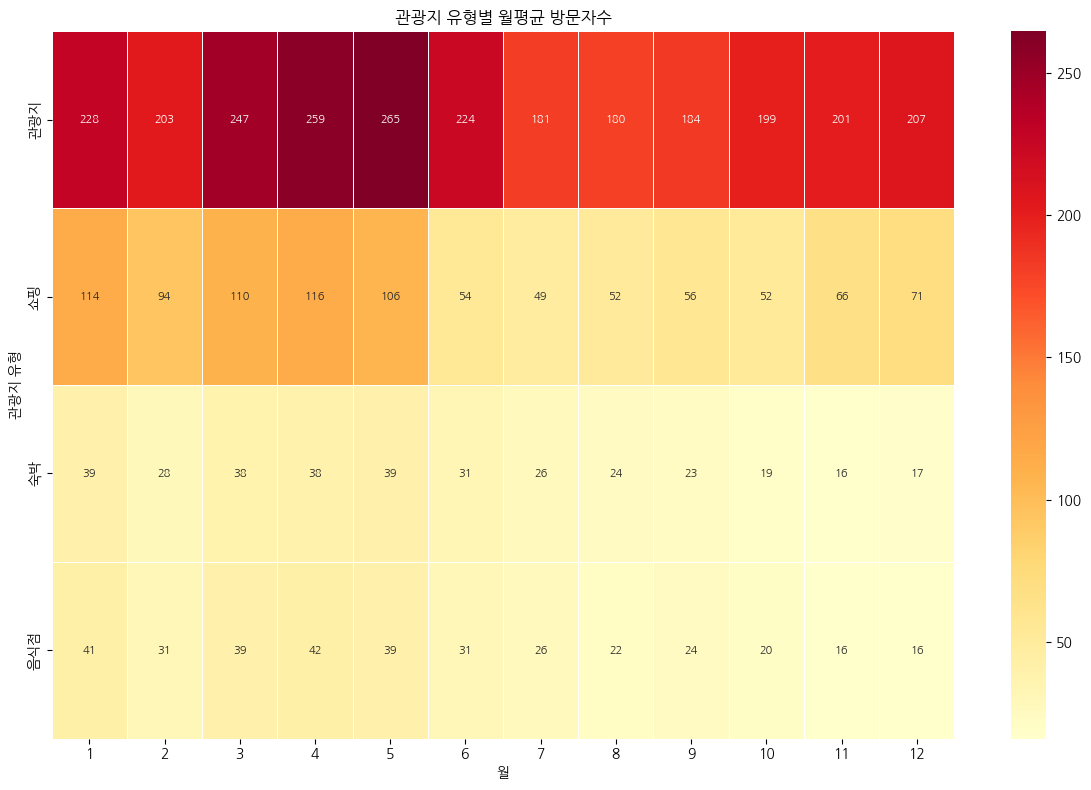

In [177]:
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_type, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, annot_kws={'size':8})
plt.title('관광지 유형별 월평균 방문자수')
plt.xlabel('월')
plt.ylabel('관광지 유형')
plt.tight_layout()
plt.show()

In [171]:
combined_wk.to_csv('../data/raw/제주 관광수요 예측 데이터_비짓제주 요일별 데이터/combined_wk.csv', index=False)

In [178]:
combined_wk = pd.read_csv('../data/raw/제주 관광수요 예측 데이터_비짓제주 요일별 데이터/combined_wk.csv')
combined_wk.head()

CL_CD CL_NM         AREA_NM                                ADDR  BASE_YEAR  \
0    c1   관광지   브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)       2023   
1    c1   관광지  (주)제주해양레저 투명카약            제주특별자치도 제주시 애월읍 애월로1길 22       2023   
2    c1   관광지     1100고지(휴게소)             제주특별자치도 서귀포시 1100로 1555       2023   
3    c1   관광지        1100고지습지              제주특별자치도 서귀포시 색달동 산 1-2       2023   
4    c1   관광지          1112도로           제주특별자치도 제주시 명림로 584 (봉개동)       2023   

   BASE_MT  ALL_TOTAL_CO  MON_VIEWS_CO  TUES_VIEWS_CO  WED_VIEWS_CO  \
0        1           110          15.0           12.0          14.0   
1        1            68          11.0           14.0          11.0   
2        1          1587         313.0          283.0         222.0   
3        1          4075         662.0          643.0         599.0   
4        1            79          17.0            6.0           9.0   

   THUR_VIEWS_CO  FRI_VIEWS_CO  SAT_VIEWS_CO  SUN_VIEWS_CO  
0           16.0          24.0           6.0          23.0  
1            5.0          10.0           4.0          13.0  
2          185.0         180.0         154.0         250.0  
3          404.0         541.0         502.0         724.0  
4           11.0           9.0          16.0          11.0

In [179]:
combined_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51046 entries, 0 to 51045
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CL_CD          51046 non-null  object 
 1   CL_NM          51046 non-null  object 
 2   AREA_NM        51046 non-null  object 
 3   ADDR           51046 non-null  object 
 4   BASE_YEAR      51046 non-null  int64  
 5   BASE_MT        51046 non-null  int64  
 6   ALL_TOTAL_CO   51046 non-null  int64  
 7   MON_VIEWS_CO   51046 non-null  float64
 8   TUES_VIEWS_CO  51046 non-null  float64
 9   WED_VIEWS_CO   51046 non-null  float64
 10  THUR_VIEWS_CO  51046 non-null  float64
 11  FRI_VIEWS_CO   51046 non-null  float64
 12  SAT_VIEWS_CO   51046 non-null  float64
 13  SUN_VIEWS_CO   51046 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 5.5+ MB


In [180]:
combined_wk.describe()

BASE_YEAR       BASE_MT  ALL_TOTAL_CO  MON_VIEWS_CO  TUES_VIEWS_CO  \
count    51046.0  51046.000000  51046.000000  51046.000000   51046.000000   
mean      2023.0      6.712534     83.161756     12.772636      12.629707   
std          0.0      3.427247    342.166965     53.139987      52.571531   
min       2023.0      1.000000      1.000000      0.000000       0.000000   
25%       2023.0      4.000000     14.000000      2.000000       2.000000   
50%       2023.0      7.000000     27.000000      4.000000       4.000000   
75%       2023.0     10.000000     53.000000      9.000000       8.000000   
max       2023.0     12.000000  11645.000000   1854.000000    1896.000000   

       WED_VIEWS_CO  THUR_VIEWS_CO  FRI_VIEWS_CO  SAT_VIEWS_CO  SUN_VIEWS_CO  
count  51046.000000   51046.000000  51046.000000  51046.000000  51046.000000  
mean      12.385300      12.217000     11.531521     10.181190     11.444403  
std       51.310891      49.529004     47.871127     43.296837     49.375670  
min        0.000000       0.000000      0.000000      0.000000      0.000000  
25%        2.000000       2.000000      2.000000      1.000000      1.000000  
50%        4.000000       4.000000      4.000000      3.000000      4.000000  
75%        8.000000       8.000000      8.000000      7.000000      8.000000  
max     1874.000000    1595.000000   1843.000000   1661.000000   1848.000000

### 4. 요일별 인기 관광지 분석

In [183]:
combined_wk.melt(id_vals='AREA_NM', area_monthly_plot = area_monthly_plot.melt(id_vars='지역', var_name='월', value_name='조회수')

                 # 올바른 코드
area_monthly_plot = area_monthly_plot.melt(id_vars='지역', var_name='월', value_name='조회수')

NameError: name 'area_monthly_plot' is not defined

In [187]:
area_visits = combined_wk.groupby('AREA_NM')['ALL_TOTAL_CO'].sum().sort_values(ascending=False)
area_visits

AREA_NM
성산일출봉(UNESCO 세계자연유산)    92012
사려니숲길                   91246
비자림                     90622
우도(해양도립공원)              75874
한라산영실코스                 56604
                        ...  
호텔 징크                       1
동검은이오름(거미오름)                1
미르앤러브게스트하우스                 1
퍼시픽 리솜 엘마리노 뷔페              1
보노리미니                       1
Name: ALL_TOTAL_CO, Length: 5073, dtype: int64

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_6188/2296986483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_area_visits.index, y=top10_area_visits.values, palette='Blues_d')


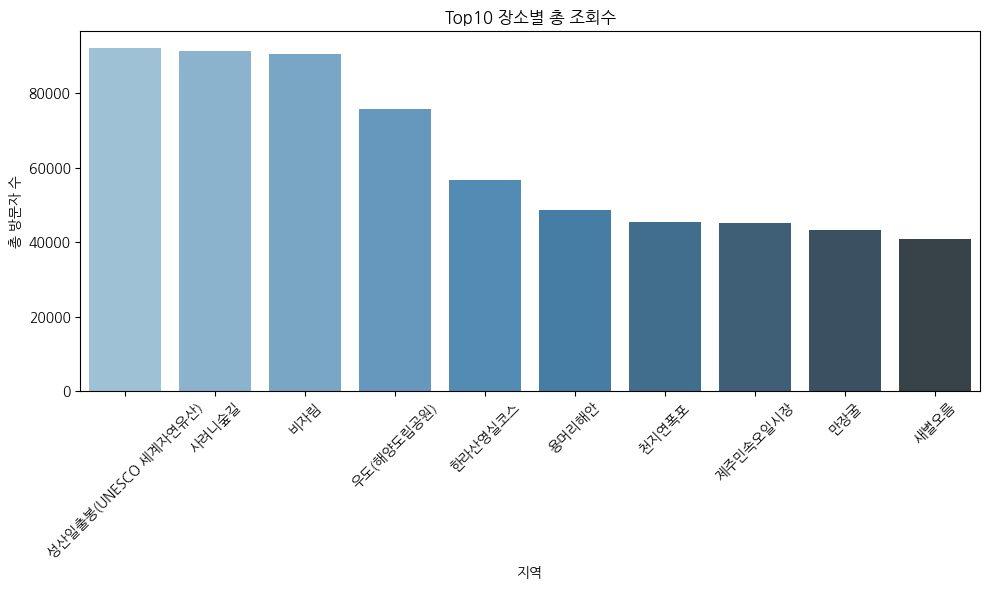

In [216]:
# 1. 막대그래프로 지역별 총 조회수 비교: 

top10_area_visits = area_visits.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_area_visits.index, y=top10_area_visits.values, palette='Blues_d')
plt.title('Top10 장소별 총 조회수')
plt.xlabel('지역')
plt.ylabel('총 방문자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_6188/4060651643.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


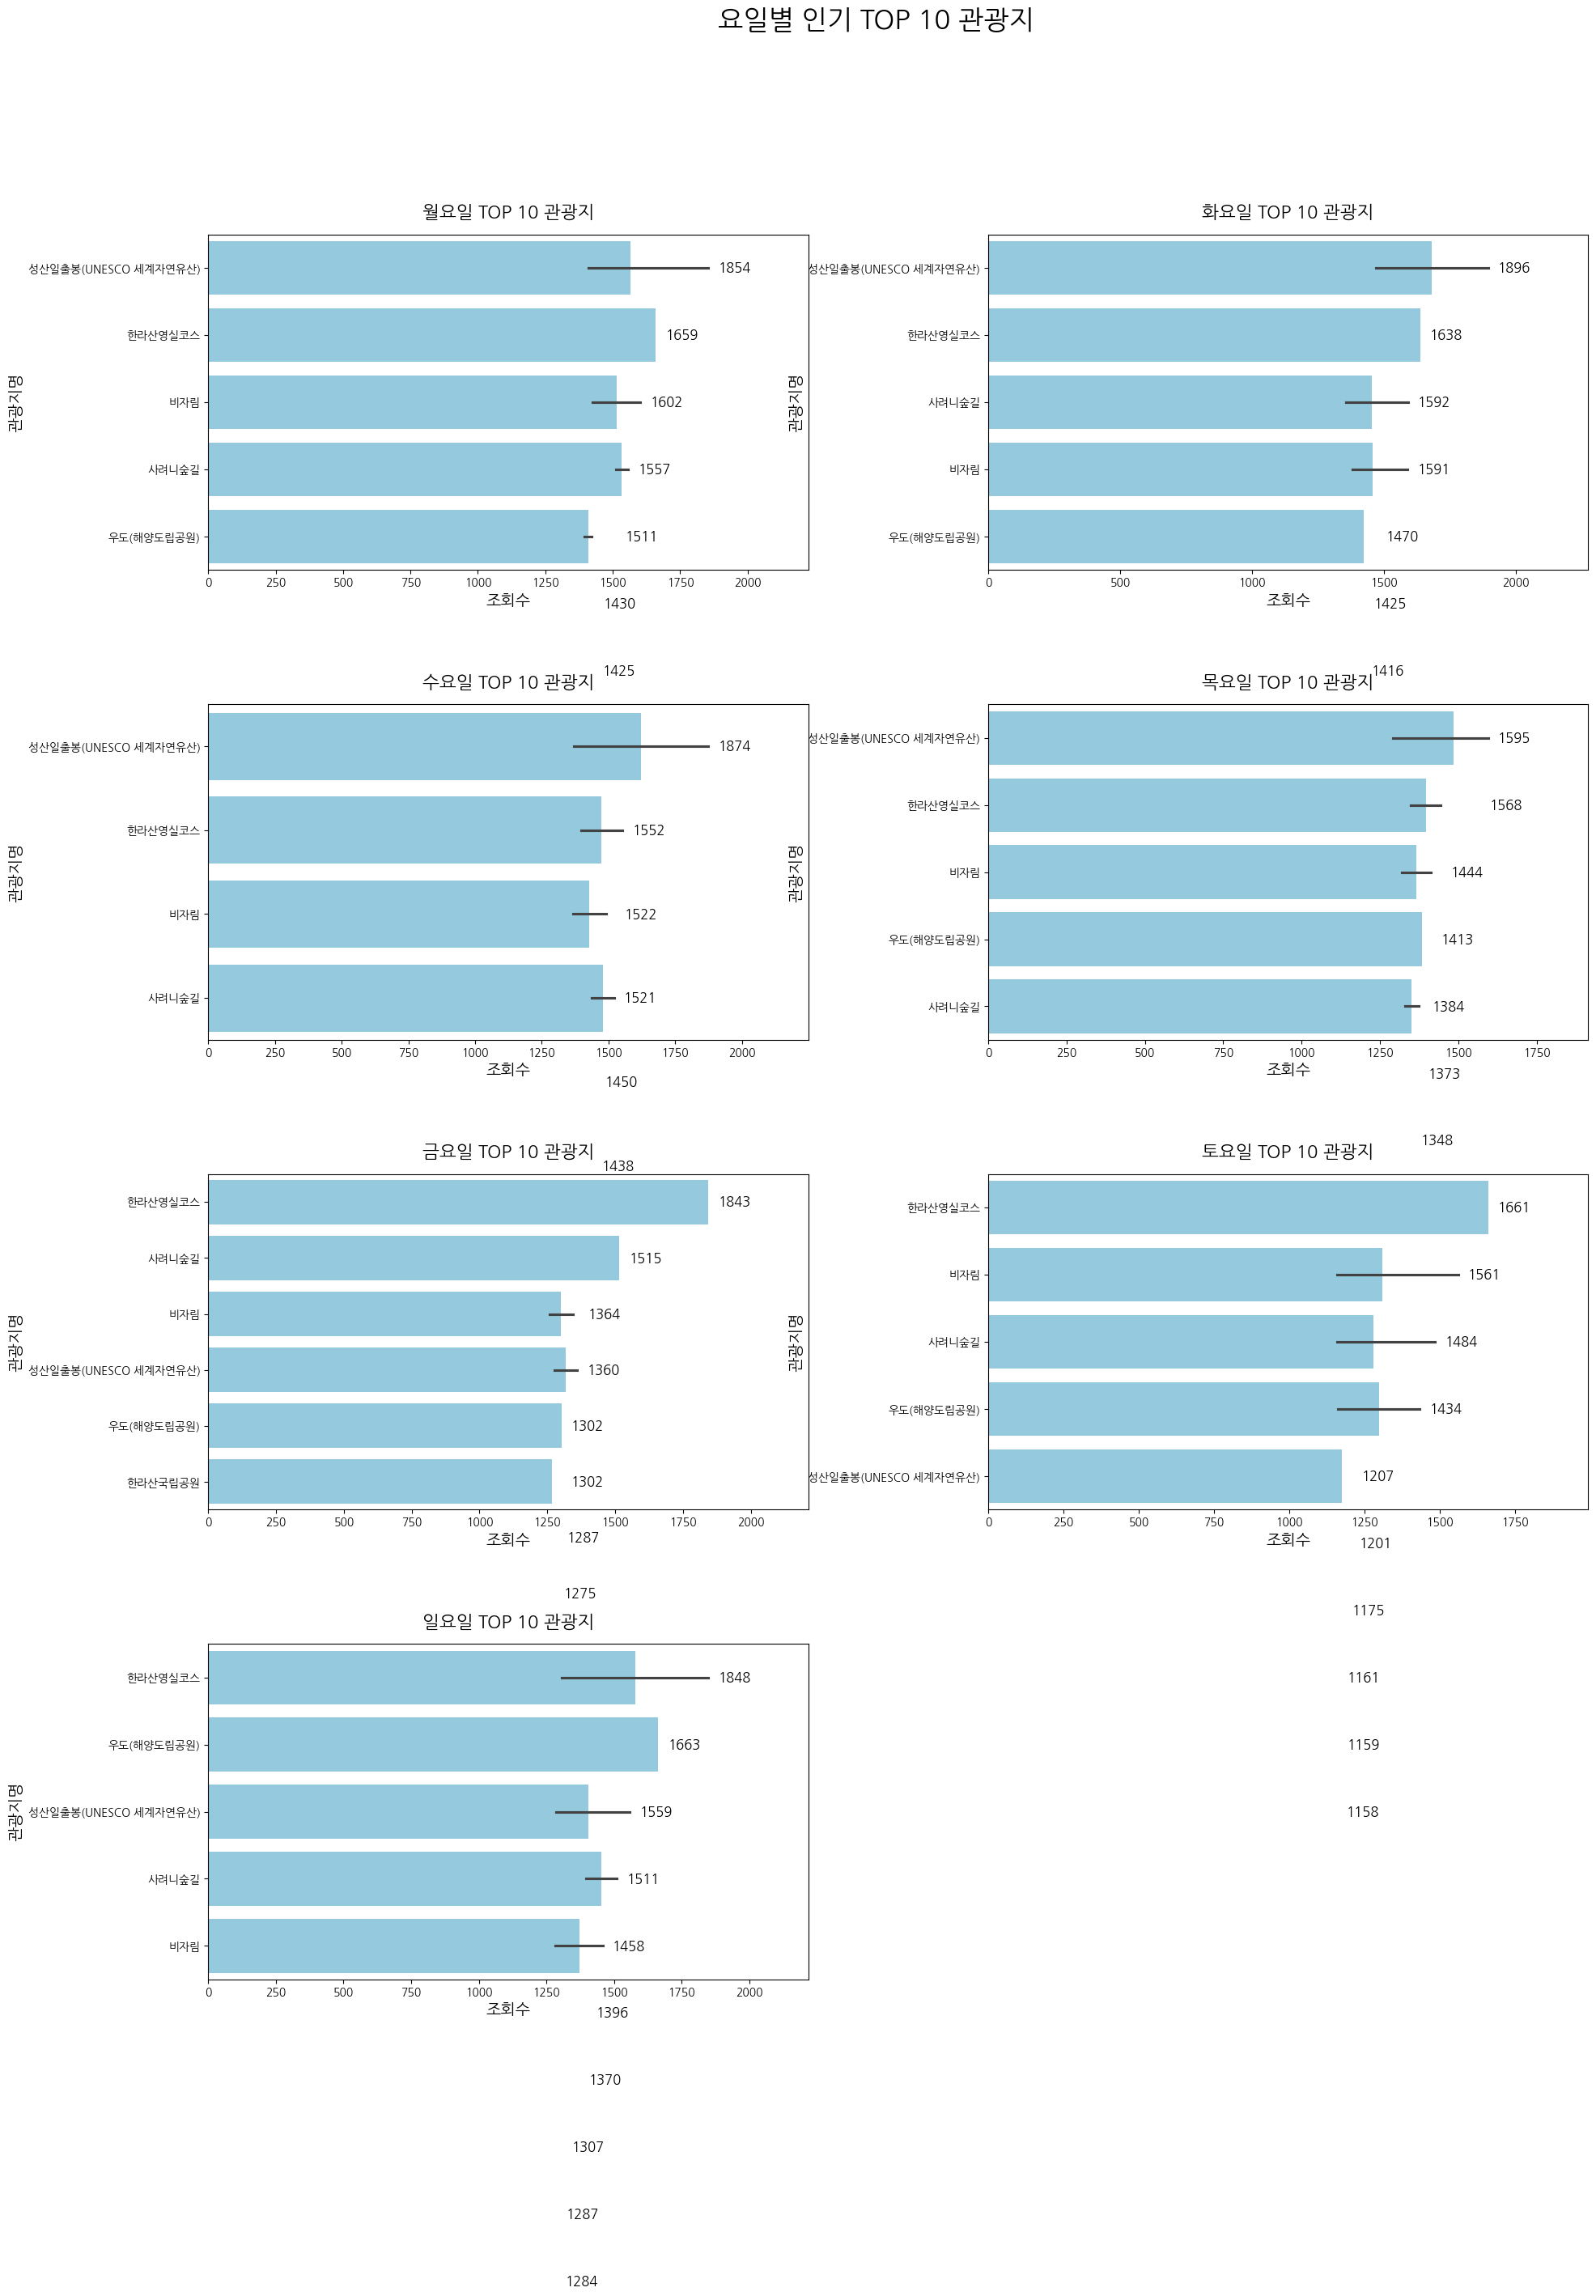

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


# 그림 크기 설정 및 그리드 생성
fig = plt.figure(figsize=(22, 28))
gs = gridspec.GridSpec(4, 2, figure=fig, wspace=0.3, hspace=0.4)

for i, (col, day_name) in enumerate(weekday_cols.items()):
    # 해당 요일 컬럼으로 정렬하여 TOP 10 추출
    top10_places = combined_wk.sort_values(by=col, ascending=False).head(10)[['AREA_NM', col]]
    
    # 서브플롯 생성
    ax = fig.add_subplot(gs[i])
    
    # 막대 그래프 그리기
    bars = sns.barplot(x=col, y='AREA_NM', data=top10_places, color='skyblue', ax=ax)
    
    # 그래프 제목 및 레이블 설정
    ax.set_title(f'{day_name} TOP 10 관광지', fontsize=16, pad=15)
    ax.set_xlabel('조회수', fontsize=14)
    ax.set_ylabel('관광지명', fontsize=14)
    
    # x축 범위 설정 - 여백 추가
    max_value = top10_places[col].max()
    ax.set_xlim(0, max_value * 1.2)  # 최대값의 120%까지 표시
    
    # 값 레이블 추가
    for j, v in enumerate(top10_places[col]):
        ax.text(v + (max_value * 0.02), j, f'{v:.0f}', va='center', fontsize=12)

# 전체 제목 추가
fig.suptitle('요일별 인기 TOP 10 관광지', fontsize=24, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [193]:
top5_cat_area = (combined_wk.groupby(['CL_NM', 'AREA_NM'])['ALL_TOTAL_CO']
                 .sum()
                 .sort_values(ascending=False)
                .groupby('CL_NM')
                 .head(5)
                .reset_index())
                
print(top5_cat_area)

   CL_NM                           AREA_NM  ALL_TOTAL_CO
0    관광지              성산일출봉(UNESCO 세계자연유산)         92012
1    관광지                             사려니숲길         91246
2    관광지                               비자림         90622
3    관광지                        우도(해양도립공원)         75874
4    관광지                           한라산영실코스         56604
5     쇼핑                          제주민속오일시장         45021
6     쇼핑                            동문재래시장         23886
7     쇼핑                         서귀포매일올레시장         15106
8     쇼핑                        세화해녀민속오일시장          7478
9    음식점                           자매국수 본점          7434
10    쇼핑                제주관광공사 중문면세점 (내국인)          6210
11   음식점                    제주김만복(만복이네김밥집)          5388
12    숙박                          대명리조트 제주          4920
13   음식점                               노조미          4268
14    숙박                         나미송 머무는 곳          3470
15   음식점                             마노르블랑          3409
16    숙박                       

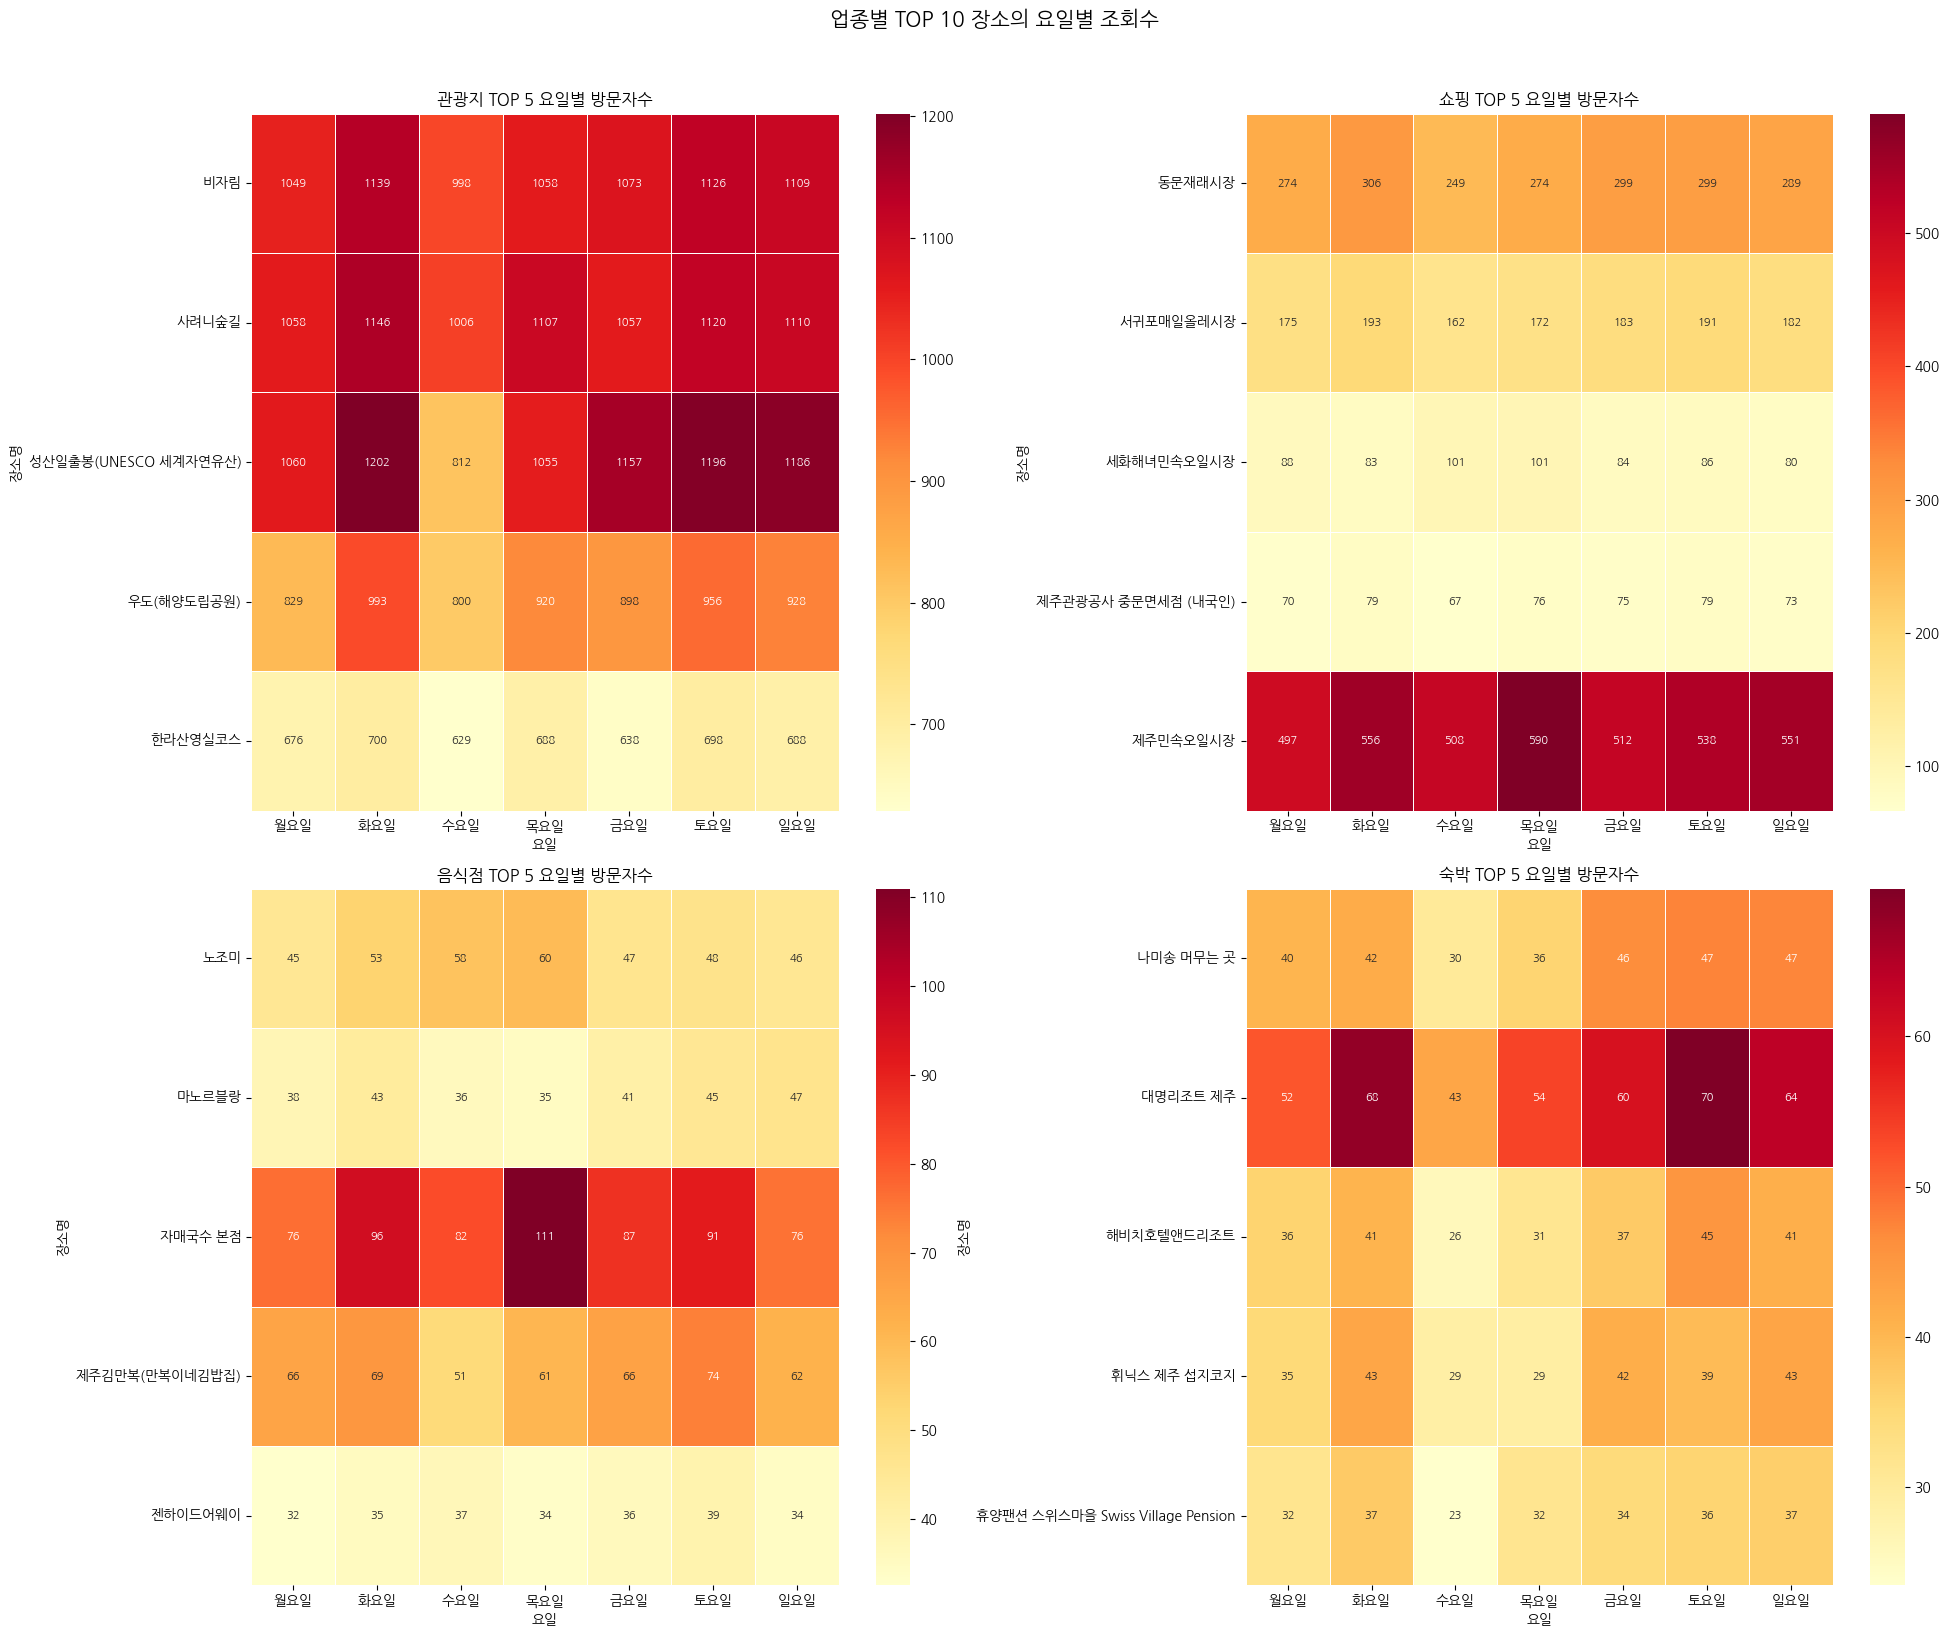

In [194]:
# 2x2 subplot 생성
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 요일 컬럼과 레이블
days = list(weekday_cols.keys())
day_labels = list(weekday_cols.values())

# CL_NM의 고유값 추출
categories = top10_cat_area['CL_NM'].unique()
positions = [(0,0), (0,1), (1,0), (1,1)]

for cat, pos in zip(categories, positions):
    # top10_cat_area에서 해당 카테고리의 장소들 추출
    cat_places = top10_cat_area[top10_cat_area['CL_NM']==cat]['AREA_NM'].tolist()
    
    # 해당 장소들의 요일별 데이터 추출
    daily_data = (combined_wk[combined_wk['AREA_NM'].isin(cat_places)]
                 .pivot_table(index='AREA_NM', 
                            values=days))
    
    # 히트맵 그리기
    sns.heatmap(daily_data, 
                ax=axes[pos],
                annot=True,
                fmt='.0f',
                cmap='YlOrRd',
                linewidths=0.5,
                xticklabels=day_labels,
                annot_kws={'size':8})
    
    axes[pos].set_title(f'{cat} TOP 5 요일별 방문자수')
    axes[pos].set_xlabel('요일')
    axes[pos].set_ylabel('장소명')
    axes[pos].tick_params(axis='y', rotation=0)

plt.suptitle('업종별 TOP 10 장소의 요일별 조회수', y=1.02, fontsize=15)
plt.tight_layout()
plt.show()

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_6188/2335819530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_cat_area[top5_cat_area['CL_NM']=='관광지'],
/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_6188/2335819530.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_cat_area[top5_cat_area['CL_NM']=='쇼핑'],
/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_6188/2335819530.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_cat_area[top5_cat_area['CL_NM']=='음식점'],
/var/folders

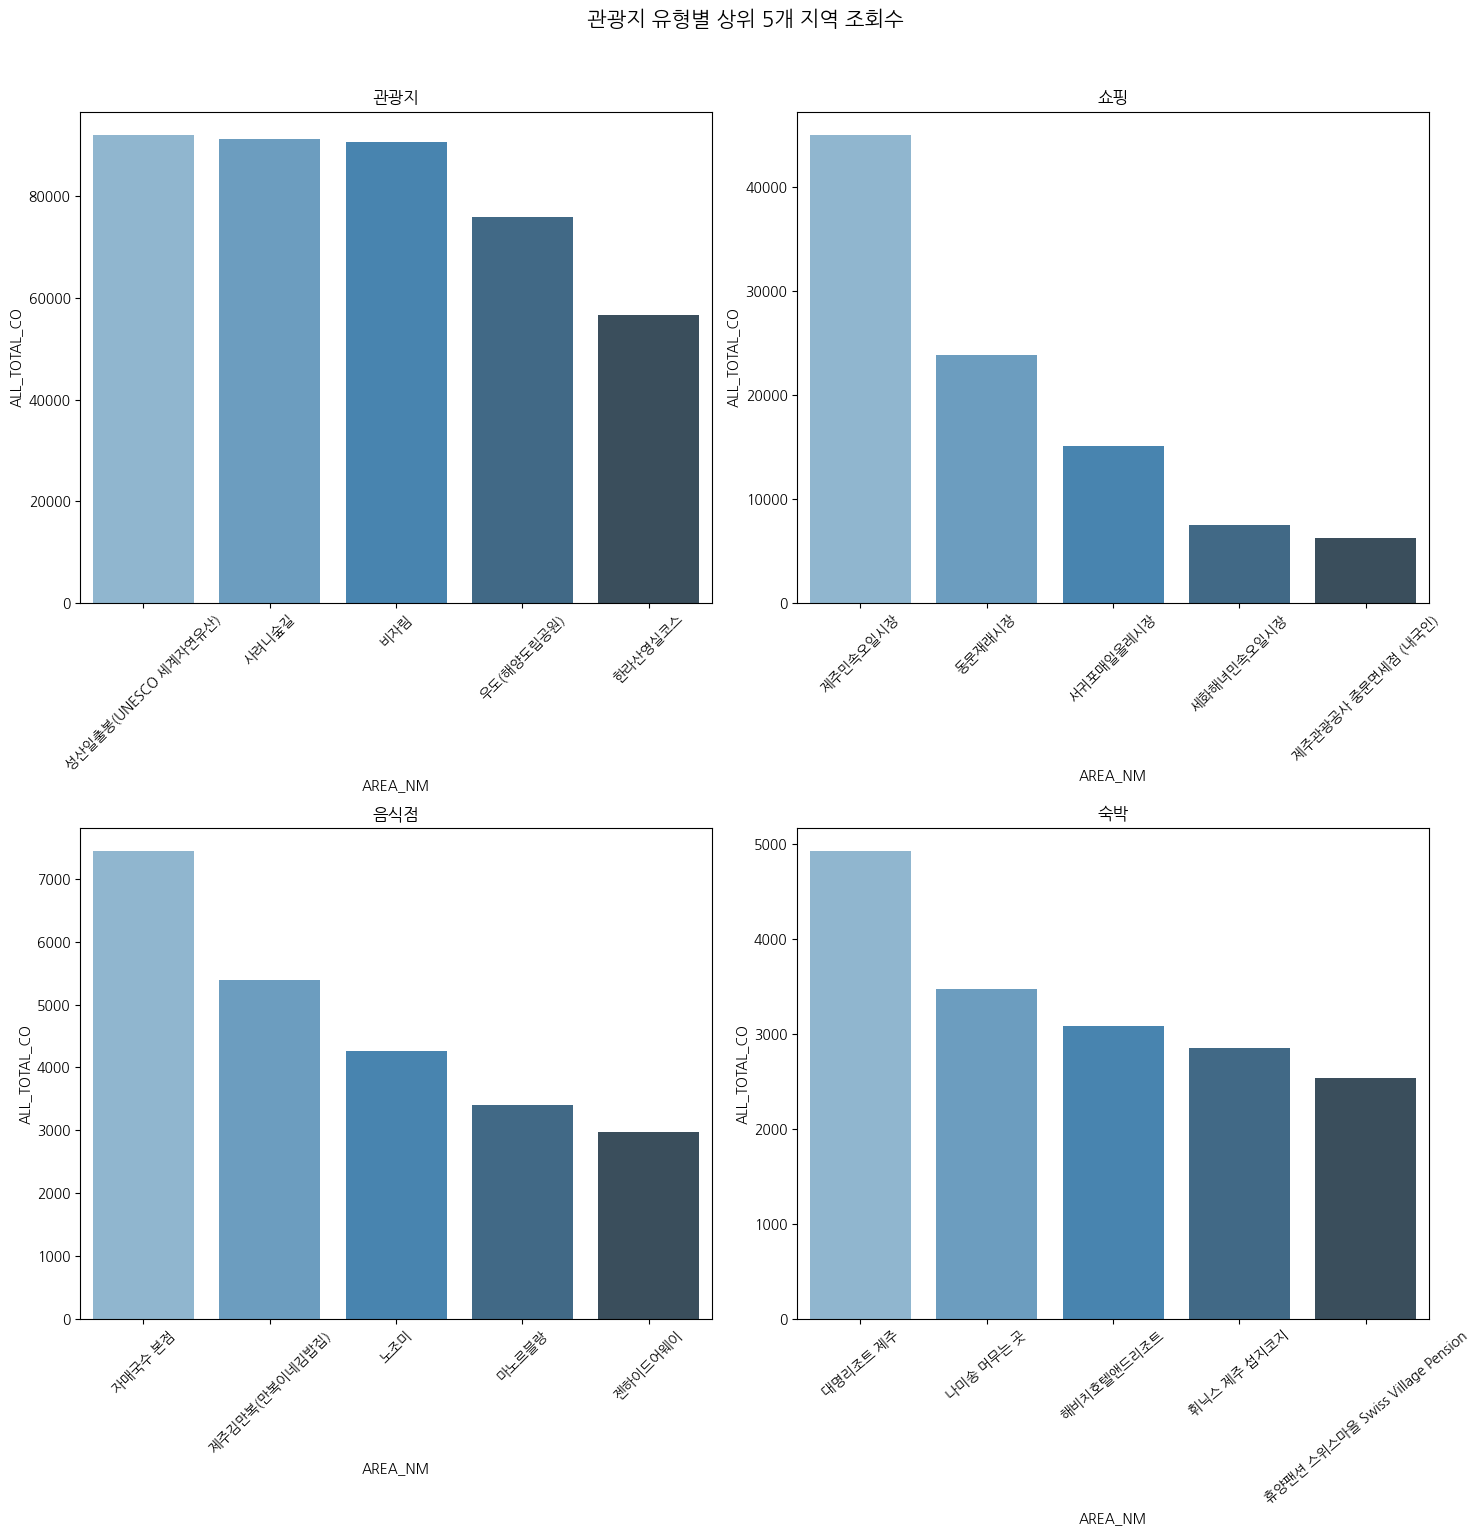

In [217]:
# 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

top5_cat_area

sns.barplot(data=top5_cat_area[top5_cat_area['CL_NM']=='관광지'],
            y='ALL_TOTAL_CO',
            x='AREA_NM',
            ax=axes[0,0], palette='Blues_d')
axes[0, 0].set_title('관광지')
axes[0, 0].tick_params(axis='x', rotation=45)

# 두 번째 그래프
sns.barplot(data=top5_cat_area[top5_cat_area['CL_NM']=='쇼핑'],
            y='ALL_TOTAL_CO',
            x='AREA_NM',
            ax=axes[0,1],palette='Blues_d')
axes[0, 1].set_title('쇼핑')
axes[0, 1].tick_params(axis='x', rotation=45)

# 세 번째 그래프
sns.barplot(data=top5_cat_area[top5_cat_area['CL_NM']=='음식점'],
            y='ALL_TOTAL_CO',
            x='AREA_NM',
            ax=axes[1,0],palette='Blues_d')
axes[1, 0].set_title('음식점')
axes[1, 0].tick_params(axis='x', rotation=45)

# 네 번째 그래프
sns.barplot(data=top5_cat_area[top5_cat_area['CL_NM']=='숙박'],
            y='ALL_TOTAL_CO',
            x='AREA_NM',
            ax=axes[1,1], palette='Blues_d')
axes[1, 1].set_title('숙박')
axes[1, 1].tick_params(axis='x', rotation=40)

plt.suptitle('관광지 유형별 상위 5개 지역 조회수', y=1.02, fontsize=15)
plt.tight_layout()
plt.show()

### 5. 요일별 인기 지역 분석

In [210]:
# ADDR에서 '제주시'와 '서귀포시' 추출
combined_wk['지역'] = combined_wk['ADDR'].apply(lambda x: '제주시' if '제주시' in x else '서귀포시')

# 지역별 관광지 유형 분포
area_type_dist = pd.crosstab(combined_wk['지역'], combined_wk['CL_NM'])

# 지역별 관광지 유형 분포(비율)
area_type_pct = area_type_dist.div(area_type_dist.sum(axis=1), axis=0) * 100

print("지역별 관광지 유형 조회수 분포:")
print(area_type_dist)
print("\n지역별 관광지 유형 조회수 분포(비율):")
print(area_type_pct)


지역별 관광지 유형 조회수 분포:
CL_NM   관광지    쇼핑    숙박    음식점
지역                            
서귀포시   6224   689  5057   7391
제주시    8263  2025  6688  14709

지역별 관광지 유형 조회수 분포(비율):
CL_NM        관광지        쇼핑         숙박        음식점
지역                                              
서귀포시   32.147100  3.558700  26.119519  38.174681
제주시    26.078586  6.391037  21.107780  46.422597


In [205]:
area_weekly = combined_wk.groupby('지역')[list(weekday_cols.keys())].mean()
area_weekly.columns = weekday_cols.values()

print(area_weekly.head())

            월요일        화요일        수요일        목요일        금요일        토요일  \
지역                                                                       
서귀포시  15.172667  15.025257  14.755385  14.466763  13.678891  12.133464   
제주시   11.306107  11.165914  10.937068  10.842291  10.219378   8.988259   

            일요일  
지역               
서귀포시  13.728940  
제주시   10.048446  


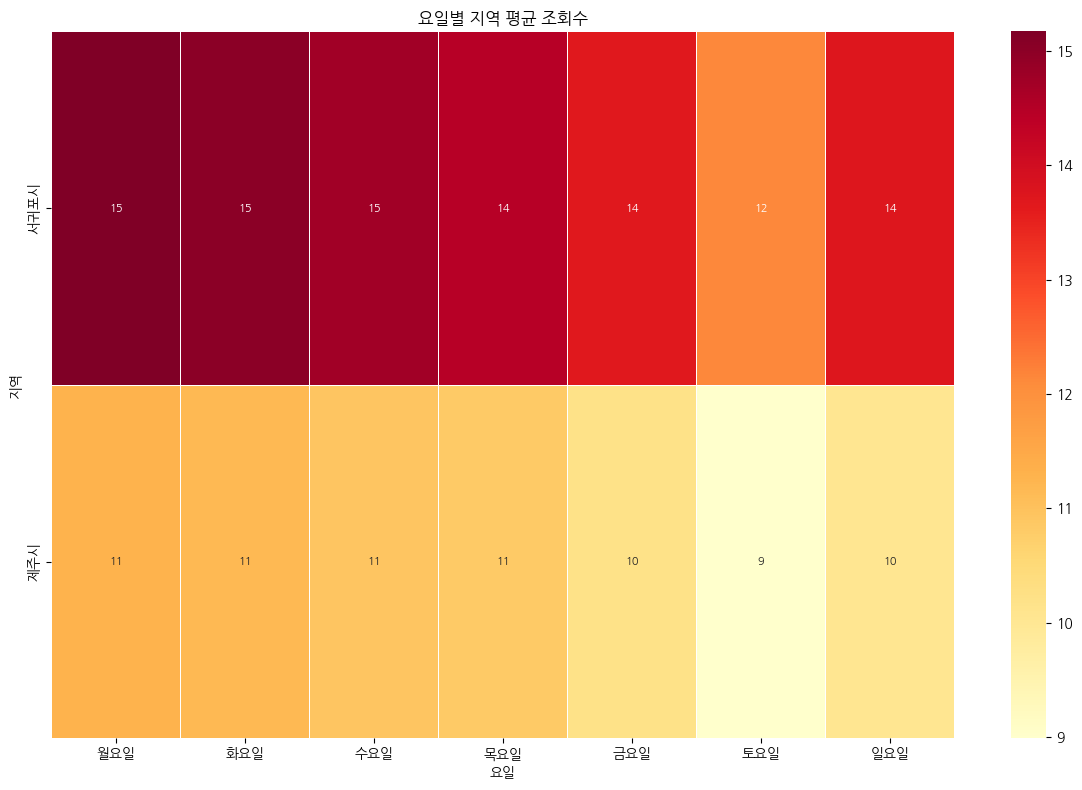

In [209]:
plt.figure(figsize=(12, 8))
sns.heatmap(area_weekly, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, annot_kws={'size':8})
plt.title('요일별 지역 평균 조회수')
plt.xlabel('요일')
plt.ylabel('지역')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

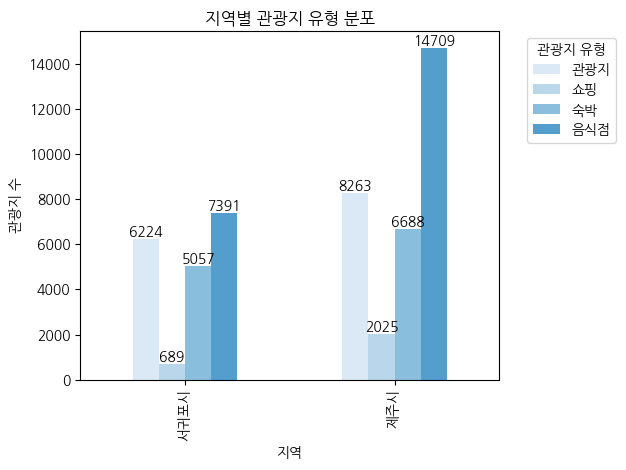

In [154]:
# 비율 시각화
plt.figure(figsize=(12, 6))
ax = area_type_dist.plot(kind='bar', stacked=False, color=sns.color_palette("Blues"))

for c in ax.containers:
    ax.bar_label(c,label_type='edge')
    
plt.title('지역별 관광지 유형 분포')
plt.xlabel('지역')
plt.ylabel('관광지 수')
plt.legend(title='관광지 유형', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

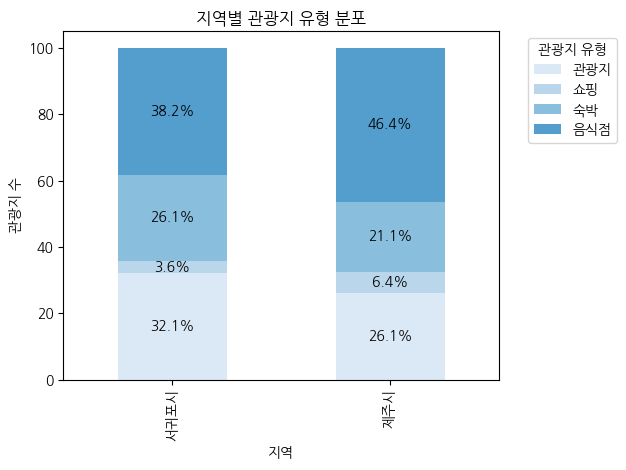

In [155]:
# 비율 시각화
plt.figure(figsize=(12, 6))
ax = area_type_pct.plot(kind='bar', stacked=True, color=sns.color_palette("Blues"))

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')
    
plt.title('지역별 관광지 유형 분포')
plt.xlabel('지역')
plt.ylabel('관광지 수')
plt.legend(title='관광지 유형', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [151]:
print(combined_wk['ADDR'].head(10))

# 주소는 구주소, 신주소가 섞여있어 당장 분석 불가 -> 추후 위/경도를 통해 확인할 수 있을 것

0    제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)
1              제주특별자치도 제주시 애월읍 애월로1길 22
2               제주특별자치도 서귀포시 1100로 1555
3                제주특별자치도 서귀포시 색달동 산 1-2
4             제주특별자치도 제주시 명림로 584 (봉개동)
5                    제주특별자치도 제주시 신산로 82
6            제주특별자치도 서귀포시 남원읍 신례리 산 2-1
7            제주특별자치도 제주시 애월읍 천덕로 880-24
8            제주특별자치도 서귀포시 대정읍 일주서로 2497
9                    제주특별자치도 제주시 서사로 28
Name: ADDR, dtype: object


# MONTH

In [157]:
mt_1 = pd.read_csv('data/raw/제주 관광수요 예측 데이터_비짓제주 월별 데이터/JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202311.csv')
mt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CL_CD          4525 non-null   object 
 1   CL_NM          4525 non-null   object 
 2   AREA_NM        4525 non-null   object 
 3   ADDR           4525 non-null   object 
 4   BASE_YEAR      4525 non-null   int64  
 5   ALL_TOTAL_CO   4525 non-null   int64  
 6   JAN_VIEWS_CO   4525 non-null   float64
 7   FEB_VIEWS_CO   4525 non-null   float64
 8   MAR_VIEWS_CO   4525 non-null   float64
 9   APR_VIEWS_CO   4525 non-null   float64
 10  MAY_VIEWS_CO   4525 non-null   float64
 11  JUN_VIEWS_CO   4525 non-null   float64
 12  JULY_VIEWS_CO  4525 non-null   float64
 13  AUG_VIEWS_CO   4525 non-null   float64
 14  SEP_VIEWS_CO   4525 non-null   float64
 15  OCT_VIEWS_CO   4525 non-null   float64
 16  NOV_VIEWS_CO   4525 non-null   float64
 17  DEC_VIEWS_CO   4525 non-null   float64
dtypes: float

In [158]:
mt_1.head(5)

CL_CD CL_NM         AREA_NM                                ADDR  BASE_YEAR  \
0    c1   관광지   브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)       2023   
1    c1   관광지  (주)제주해양레저 투명카약            제주특별자치도 제주시 애월읍 애월로1길 22       2023   
2    c1   관광지     1100고지(휴게소)             제주특별자치도 서귀포시 1100로 1555       2023   
3    c1   관광지        1100고지습지              제주특별자치도 서귀포시 색달동 산 1-2       2023   
4    c1   관광지          1112도로           제주특별자치도 제주시 명림로 584 (봉개동)       2023   

   ALL_TOTAL_CO  JAN_VIEWS_CO  FEB_VIEWS_CO  MAR_VIEWS_CO  APR_VIEWS_CO  \
0            59           0.0           0.0           0.0           0.0   
1            30           0.0           0.0           0.0           0.0   
2           624           0.0           0.0           0.0           0.0   
3          1286           0.0           0.0           0.0           0.0   
4            44           0.0           0.0           0.0           0.0   

   MAY_VIEWS_CO  JUN_VIEWS_CO  JULY_VIEWS_CO  AUG_VIEWS_CO  SEP_VIEWS_CO  \
0           0.0           0.0            0.0           0.0           0.0   
1           0.0           0.0            0.0           0.0           0.0   
2           0.0           0.0            0.0           0.0           0.0   
3           0.0           0.0            0.0           0.0           0.0   
4           0.0           0.0            0.0           0.0           0.0   

   OCT_VIEWS_CO  NOV_VIEWS_CO  DEC_VIEWS_CO  
0           0.0          59.0           0.0  
1           0.0          30.0           0.0  
2           0.0         624.0           0.0  
3           0.0        1286.0           0.0  
4           0.0          44.0           0.0

In [159]:
mt_1.describe()

BASE_YEAR  ALL_TOTAL_CO  JAN_VIEWS_CO  FEB_VIEWS_CO  MAR_VIEWS_CO  \
count     4525.0   4525.000000        4525.0        4525.0        4525.0   
mean      2023.0     71.144972           0.0           0.0           0.0   
std          0.0    344.430734           0.0           0.0           0.0   
min       2023.0      1.000000           0.0           0.0           0.0   
25%       2023.0      7.000000           0.0           0.0           0.0   
50%       2023.0     14.000000           0.0           0.0           0.0   
75%       2023.0     32.000000           0.0           0.0           0.0   
max       2023.0   8739.000000           0.0           0.0           0.0   

       APR_VIEWS_CO  MAY_VIEWS_CO  JUN_VIEWS_CO  JULY_VIEWS_CO  AUG_VIEWS_CO  \
count        4525.0        4525.0        4525.0         4525.0        4525.0   
mean            0.0           0.0           0.0            0.0           0.0   
std             0.0           0.0           0.0            0.0           0.0   
min             0.0           0.0           0.0            0.0           0.0   
25%             0.0           0.0           0.0            0.0           0.0   
50%             0.0           0.0           0.0            0.0           0.0   
75%             0.0           0.0           0.0            0.0           0.0   
max             0.0           0.0           0.0            0.0           0.0   

       SEP_VIEWS_CO  OCT_VIEWS_CO  NOV_VIEWS_CO  DEC_VIEWS_CO  
count        4525.0        4525.0   4525.000000        4525.0  
mean            0.0           0.0     71.144972           0.0  
std             0.0           0.0    344.430734           0.0  
min             0.0           0.0      1.000000           0.0  
25%             0.0           0.0      7.000000           0.0  
50%             0.0           0.0     14.000000           0.0  
75%             0.0           0.0     32.000000           0.0  
max             0.0           0.0   8739.000000           0.0

In [161]:
mt_1.shape

(4525, 18)

In [103]:
month_path=Path('../data/raw/제주 관광수요 예측 데이터_비짓제주 월별 데이터')

In [104]:
mt_files = sorted(month_path.glob('JT_MT_ACCTO_TRRSRT_SCCNT_LIST_2023*.csv'))

In [105]:
dfs = []

for file in mt_files:
    try:
        df = pd.read_csv(file, encoding='utf-8')
        dfs.append(df)
        print(f"Laded: {file.name}")
    except Exception as e:
        print(f"Error loading {file.name}: {e}")

combined_mt = pd.concat(dfs, ignore_index=True)

print("\n=== 월별 통합 데이터 정보 ===")
print(f"전체 행 수: {len(combined_mt)}")
print("\n처음 5행:")
print(combined_mt.head())

Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202301.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202302.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202303.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202304.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202305.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202306.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202307.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202308.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202309.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202310.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202311.csv
Laded: JT_MT_ACCTO_TRRSRT_SCCNT_LIST_202312.csv

=== 월별 통합 데이터 정보 ===
전체 행 수: 51046

처음 5행:
  CL_CD CL_NM         AREA_NM                                ADDR  BASE_YEAR  \
0    c1   관광지   브랭섬홀아시아 아이스링크  제주특별자치도 서귀포시 대정읍 글로벌에듀로 234(3번게이트)       2023   
1    c1   관광지  (주)제주해양레저 투명카약            제주특별자치도 제주시 애월읍 애월로1길 22       2023   
2    c1   관광지     1100고지(휴게소)             제주특별자치도 서귀포시 1100로 1555       2023   
3    c1   관광지        1100고지습지              제주특별자치도 서귀포시 색달동 

In [106]:
combined_mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51046 entries, 0 to 51045
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CL_CD          51046 non-null  object 
 1   CL_NM          51046 non-null  object 
 2   AREA_NM        51046 non-null  object 
 3   ADDR           51046 non-null  object 
 4   BASE_YEAR      51046 non-null  int64  
 5   ALL_TOTAL_CO   51046 non-null  int64  
 6   JAN_VIEWS_CO   51046 non-null  float64
 7   FEB_VIEWS_CO   51046 non-null  float64
 8   MAR_VIEWS_CO   51046 non-null  float64
 9   APR_VIEWS_CO   51046 non-null  float64
 10  MAY_VIEWS_CO   51046 non-null  float64
 11  JUN_VIEWS_CO   51046 non-null  float64
 12  JULY_VIEWS_CO  51046 non-null  float64
 13  AUG_VIEWS_CO   51046 non-null  float64
 14  SEP_VIEWS_CO   51046 non-null  float64
 15  OCT_VIEWS_CO   51046 non-null  float64
 16  NOV_VIEWS_CO   51046 non-null  float64
 17  DEC_VIEWS_CO   51046 non-null  float64
dtypes: flo

In [107]:
## 월별 딕셔너리 생성
month_cols = {
    'JAN_VIEWS_CO': '1월',
    'FEB_VIEWS_CO': '2월',
    'MAR_VIEWS_CO': '3월',
    'APR_VIEWS_CO': '4월',
    'MAY_VIEWS_CO': '5월',
    'JUN_VIEWS_CO': '6월',
    'JULY_VIEWS_CO': '7월',
    'AUG_VIEWS_CO': '8월',
    'SEP_VIEWS_CO': '9월',
    'OCT_VIEWS_CO': '10월',
    'NOV_VIEWS_CO': '11월',
    'DEC_VIEWS_CO': '12월',
}

In [108]:
# 평균: 0값 제외
month_views = pd.DataFrame({
    kor_name: combined_mt[combined_mt[eng_name] > 0][eng_name].mean()
    for eng_name, kor_name in month_cols.items()
}, index=['평균 조회수']).T

month_views

평균 조회수
1월    96.935460
2월    83.727249
3월   103.551769
4월   108.948065
5월   106.559720
6월    85.085675
7월    69.816747
8월    68.034879
9월    70.269392
10월   71.664897
11월   71.144972
12월   73.664515

### 1. 월별 조회수 패턴 분석

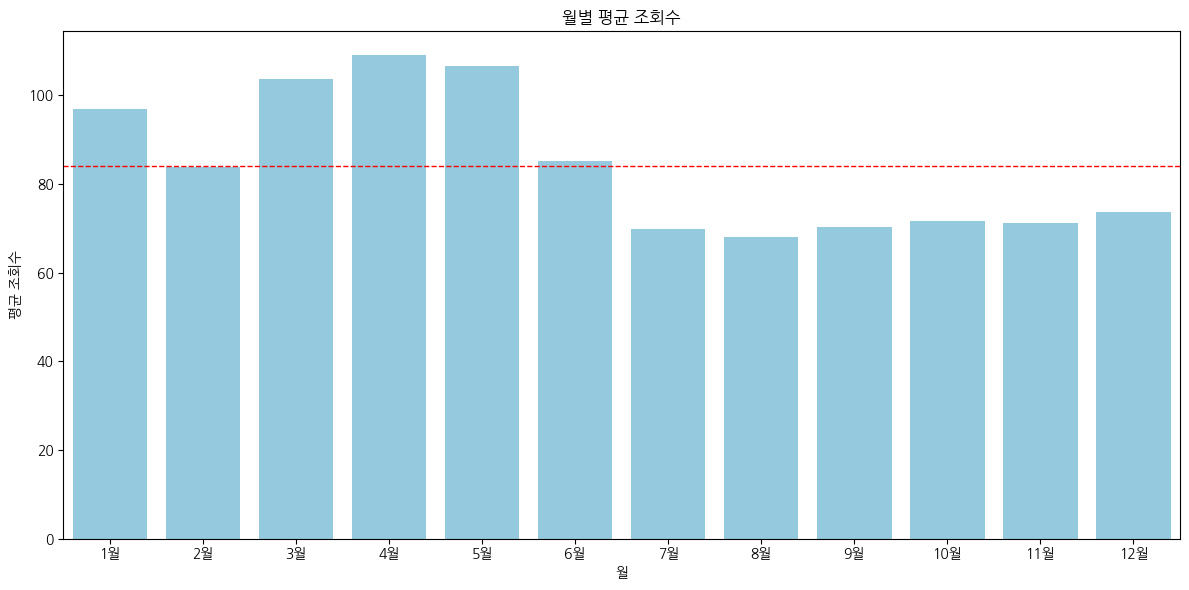

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x=month_views.index, y=month_views['평균 조회수'], color='skyblue')
overall_mean = month_views['평균 조회수'].mean()

# 평균 가로선
plt.axhline(y=overall_mean, color='red', linestyle='--', linewidth=1)
plt.title('월별 평균 조회수')

plt.xlabel('월')
plt.ylabel('평균 조회수')
plt.tight_layout()
plt.show()

### 2. 월별 장소 유형 조회수 분석

In [235]:
# 월별, CL_NM 히트맵

cl_monthly = pd.DataFrame()
for col_eng, col_kor in month_cols.items():
    monthly_mean = (combined_mt[combined_mt[col_eng] > 0]
                    .groupby('CL_NM')[col_eng]
                    .mean())
    cl_monthly[col_kor] = monthly_mean

cl_monthly

1월          2월          3월          4월          5월          6월  \
CL_NM                                                                           
관광지    227.902012  203.202975  246.862489  259.399306  264.659427  223.796482   
쇼핑     114.107143   93.773050  109.865248  115.507042  106.482517   54.392996   
숙박      39.432821   28.188211   37.647059   38.434469   39.206186   31.464396   
음식점     41.231439   30.525884   39.392429   42.245592   39.454545   31.036791   

               7월          8월          9월         10월         11월         12월  
CL_NM                                                                          
관광지    181.440226  179.721559  183.533439  198.743243  200.886006  206.601256  
쇼핑      48.789831   51.629252   56.037288   51.924915   66.105802   71.150000  
숙박      26.471134   24.165996   23.222334   19.375879   15.900000   17.023398  
음식점     26.134531   21.706801   24.160101   19.992405   15.885279   15.874680

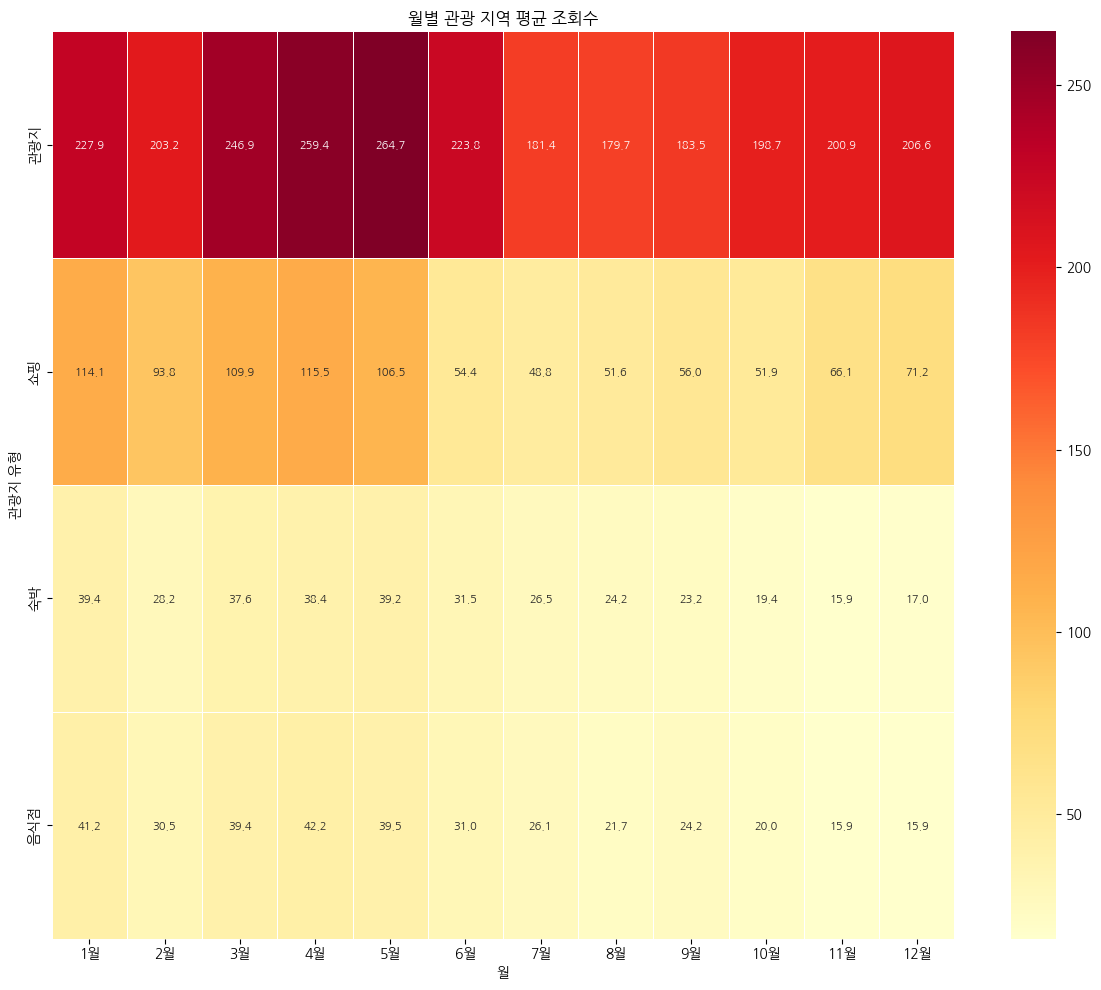

In [236]:
plt.figure(figsize=(12, 10))
sns.heatmap(cl_monthly, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5, annot_kws={'size':8})
plt.title('월별 관광 지역 평균 조회수')
plt.xlabel('월')
plt.ylabel('관광지 유형')
plt.tight_layout()
plt.show()

### 3. 월별 인기 관광지 분석

In [200]:
top10_cat_area.groupby('CL_NM').agg(mean())

NameError: name 'mean' is not defined

In [240]:
top10_cat_area = (combined_mt.groupby(['CL_NM', 'AREA_NM'])['ALL_TOTAL_CO']
                 .sum()
                 .sort_values(ascending=False)
                .groupby('CL_NM')
                 .head(10)
                .reset_index())
                
print(top10_cat_area)

   CL_NM                           AREA_NM  ALL_TOTAL_CO
0    관광지              성산일출봉(UNESCO 세계자연유산)         92012
1    관광지                             사려니숲길         91246
2    관광지                               비자림         90622
3    관광지                        우도(해양도립공원)         75874
4    관광지                           한라산영실코스         56604
5    관광지                             용머리해안         48526
6    관광지                             천지연폭포         45349
7     쇼핑                          제주민속오일시장         45021
8    관광지                               만장굴         43227
9    관광지                              새별오름         40734
10   관광지                     주상절리대(중문대포해안)         39913
11    쇼핑                            동문재래시장         23886
12    쇼핑                         서귀포매일올레시장         15106
13    쇼핑                        세화해녀민속오일시장          7478
14   음식점                           자매국수 본점          7434
15    쇼핑                제주관광공사 중문면세점 (내국인)          6210
16    쇼핑                       

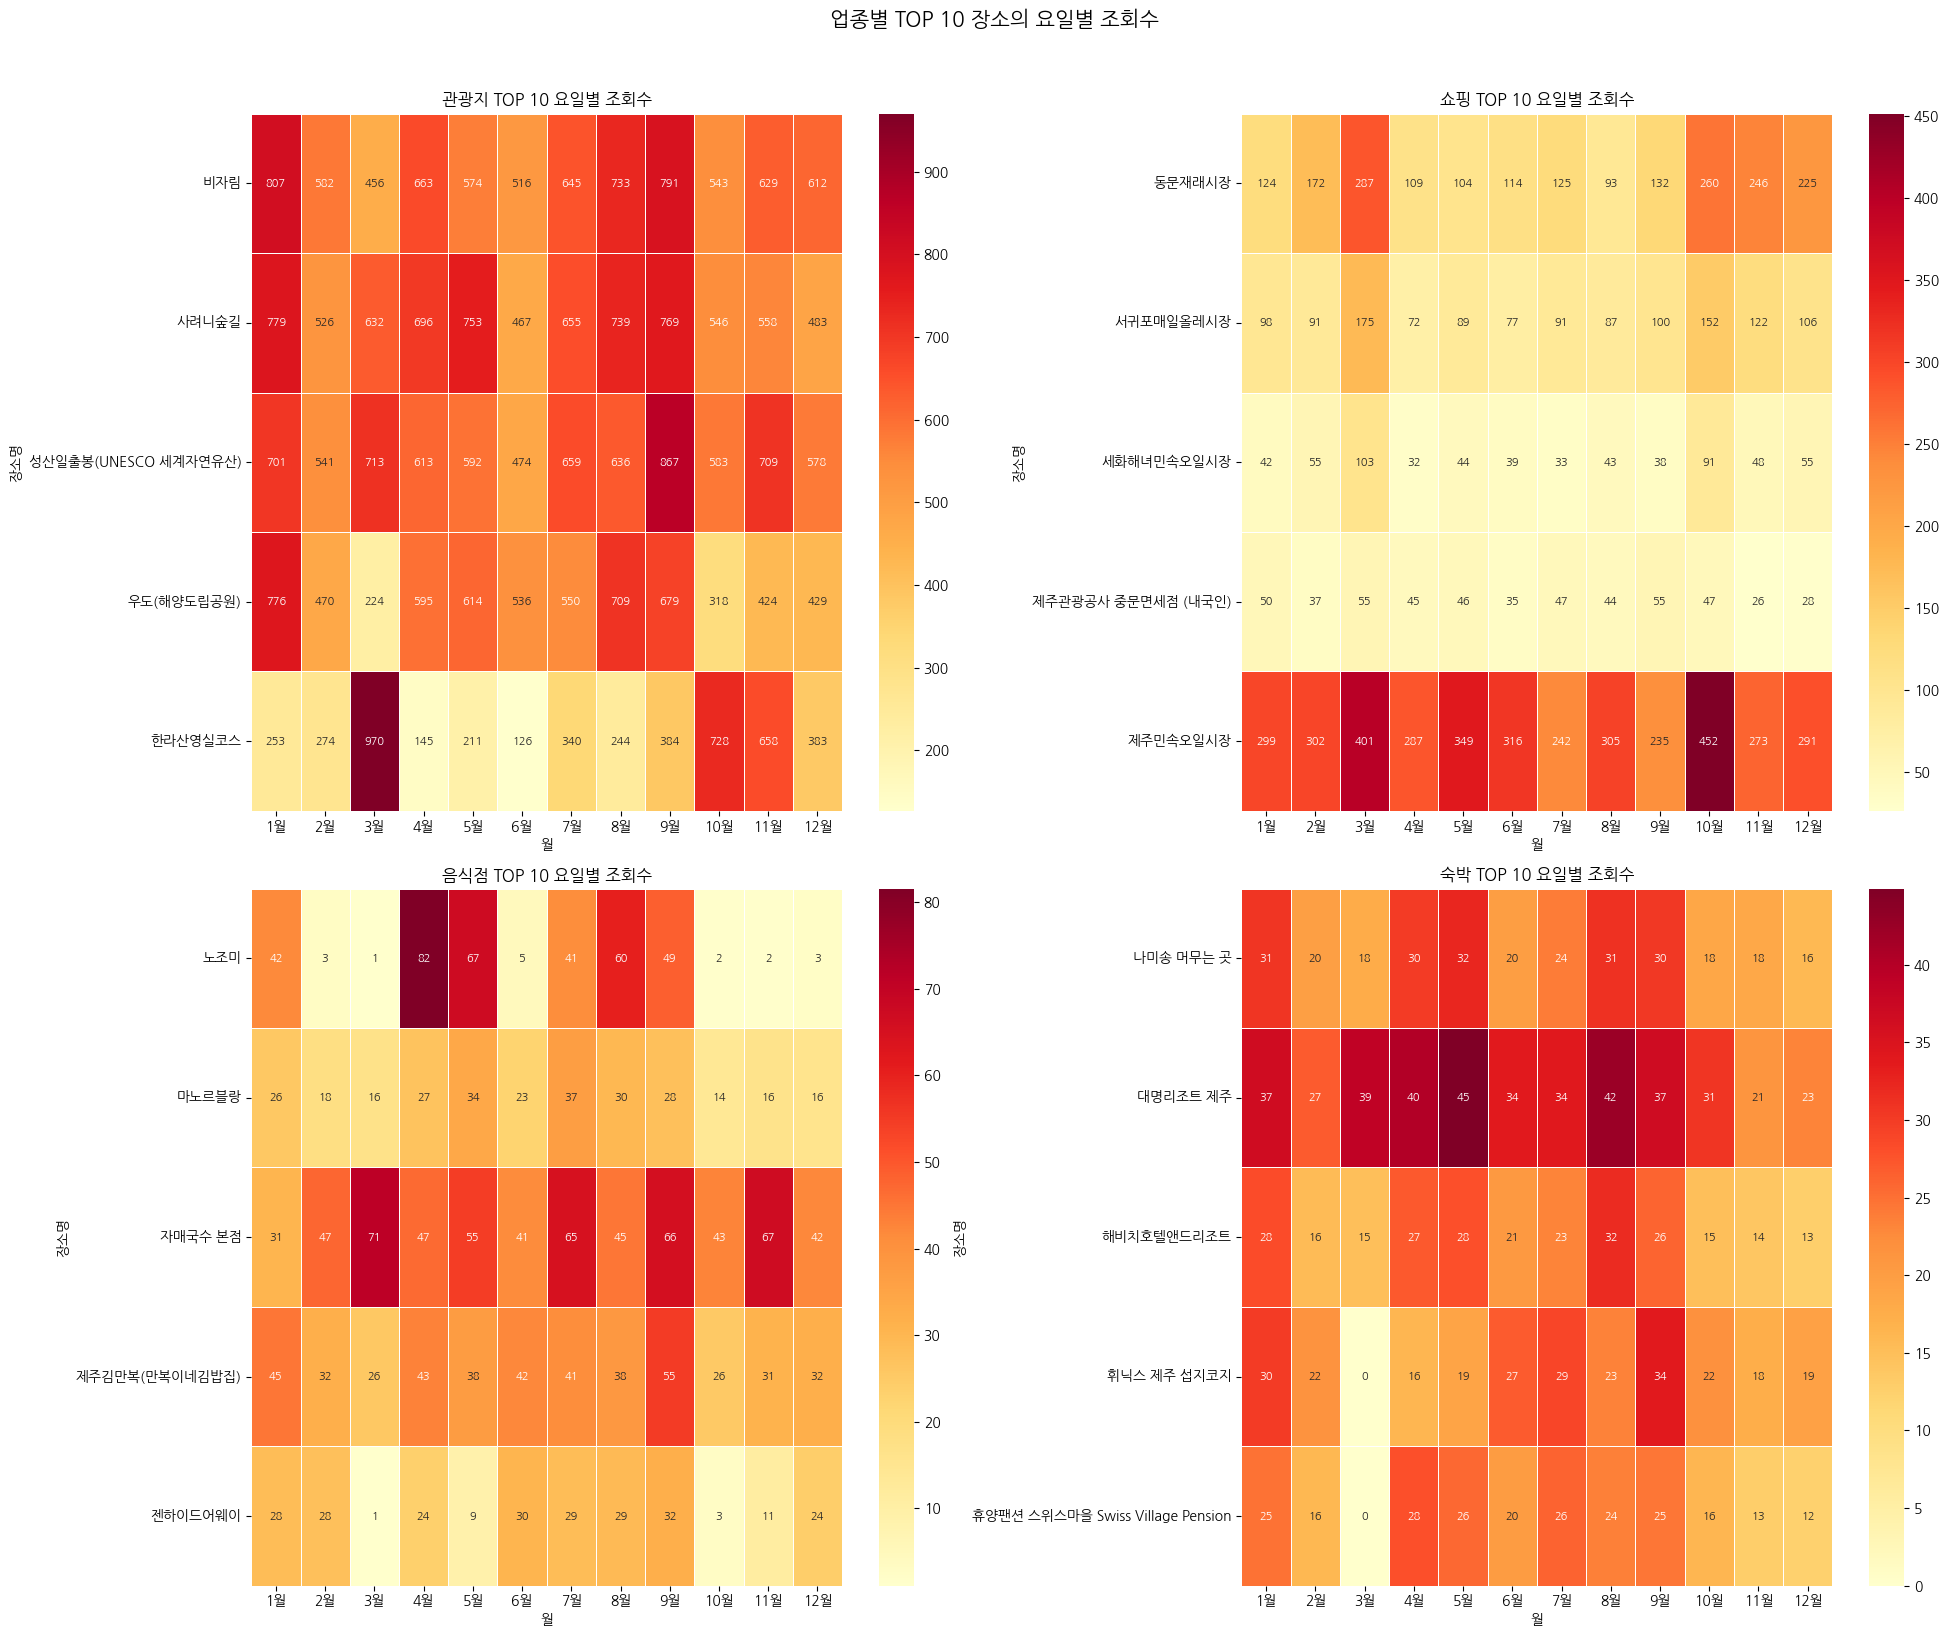

In [197]:
# 2x2 subplot 생성
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 요일 컬럼과 레이블
days = list(month_cols.keys())
day_labels = list(month_cols.values())

# CL_NM의 고유값 추출
categories = top10_cat_area['CL_NM'].unique()
positions = [(0,0), (0,1), (1,0), (1,1)]

for cat, pos in zip(categories, positions):
    # top10_cat_area에서 해당 카테고리의 장소들 추출
    cat_places = top10_cat_area[top5_cat_area['CL_NM']==cat]['AREA_NM'].tolist()
    
    # 해당 장소들의 월별 데이터 추출
    daily_data = (combined_mt[combined_wk['AREA_NM'].isin(cat_places)]
                 .pivot_table(index='AREA_NM', 
                            values=days))
    
    # 히트맵 그리기
    sns.heatmap(daily_data, 
                ax=axes[pos],
                annot=True,
                fmt='.0f',
                cmap='YlOrRd',
                linewidths=0.5,
                xticklabels=day_labels,
                annot_kws={'size':8})
    
    axes[pos].set_title(f'{cat} TOP 10 요일별 조회수')
    axes[pos].set_xlabel('월')
    axes[pos].set_ylabel('장소명')
    axes[pos].tick_params(axis='y', rotation=0)

plt.suptitle('업종별 TOP 10 장소의 요일별 조회수', y=1.02, fontsize=15)
plt.tight_layout()
plt.show()

### 4. 월별 인기 지역 분석

In [244]:
# ADDR에서 '제주시'와 '서귀포시' 추출
combined_mt['지역'] = combined_mt['ADDR'].apply(lambda x: '제주시' if '제주시' in x else '서귀포시')

# 지역별 관광지 유형 분포
area_type_dist = pd.crosstab(combined_mt['지역'], combined_mt['CL_NM'])

# 지역별 관광지 유형 분포(비율)
area_type_pct = area_type_dist.div(area_type_dist.sum(axis=1), axis=0) * 100

print("지역별 관광지 유형 조회수 분포:")
print(area_type_dist)
print("\n지역별 관광지 유형 조회수 분포(비율):")
print(area_type_pct)

지역별 관광지 유형 조회수 분포:
CL_NM   관광지    쇼핑    숙박    음식점
지역                            
서귀포시   6224   689  5057   7391
제주시    8263  2025  6688  14709

지역별 관광지 유형 조회수 분포(비율):
CL_NM        관광지        쇼핑         숙박        음식점
지역                                              
서귀포시   32.147100  3.558700  26.119519  38.174681
제주시    26.078586  6.391037  21.107780  46.422597


In [279]:
def mean_exclude_zero(x):
    return x[x>0].mean()

area_monthly = (combined_mt.groupby('지역')[list(month_cols.keys())].agg(mean_exclude_zero))
area_monthly.columns = month_cols.values()


print(area_monthly.head())

              1월         2월          3월          4월          5월         6월  \
지역                                                                           
서귀포시  110.873939  97.831984  120.112534  123.758760  123.186640  99.974530   
제주시    88.228886  74.843604   93.138136   99.662442   96.301414  76.085777   

             7월         8월         9월        10월        11월        12월  
지역                                                                      
서귀포시  79.955986  79.858907  83.250588  87.022392  91.339589  99.802593  
제주시   63.771519  60.925415  62.457699  62.436261  58.935106  57.794633  


In [280]:
area_monthly.columns

Index(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월',
       '12월'],
      dtype='object')

In [281]:
area_monthly_t = area_monthly.T
print(area_monthly_t.head())

지역        서귀포시        제주시
1월  110.873939  88.228886
2월   97.831984  74.843604
3월  120.112534  93.138136
4월  123.758760  99.662442
5월  123.186640  96.301414


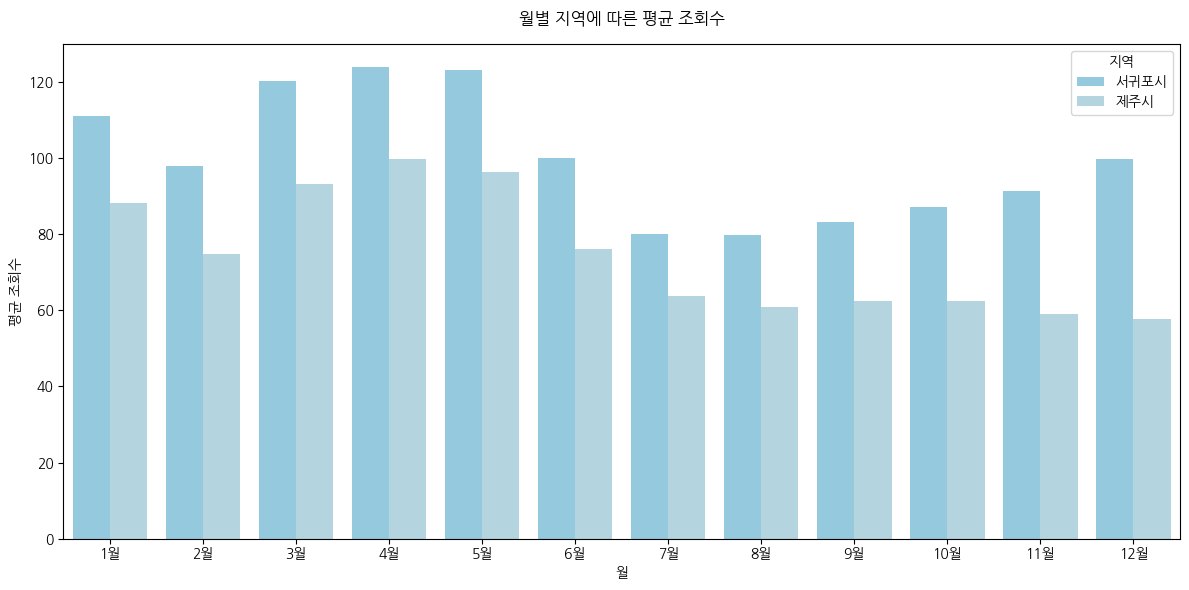

In [282]:
area_monthly_plot = area_monthly.reset_index()
area_monthly_plot = area_monthly_plot.melt(id_vars='지역', var_name='월', value_name='조회수')

plt.figure(figsize=(12, 6))
sns.barplot(data=area_monthly_plot, x='월', y='조회수', hue='지역', palette=['skyblue', 'lightblue']) 
plt.title('월별 지역에 따른 평균 조회수', pad=15)
plt.xlabel('월')
plt.ylabel('평균 조회수')
plt.legend(title='지역')
plt.tight_layout()
plt.show()

In [840]:
combined_mt.to_csv('data/raw/제주 관광수요 예측 데이터_비짓제주 월별 데이터/combined_mt.csv', index=False)

# 매출액상위 요식업

## EDA

In [234]:
mct = pd.read_csv('../data/raw/JEJU_MCT_DATA_v2.csv', encoding='cp949')

print(mct.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67864 entries, 0 to 67863
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YM                             67864 non-null  int64  
 1   MCT_NM                         67864 non-null  object 
 2   OP_YMD                         67864 non-null  int64  
 3   MCT_TYPE                       67864 non-null  object 
 4   ADDR                           67864 non-null  object 
 5   UE_CNT_GRP                     67864 non-null  object 
 6   UE_AMT_GRP                     67864 non-null  object 
 7   UE_AMT_PER_TRSN_GRP            67864 non-null  object 
 8   MON_UE_CNT_RAT                 67864 non-null  float64
 9   TUE_UE_CNT_RAT                 67864 non-null  float64
 10  WED_UE_CNT_RAT                 67864 non-null  float64
 11  THU_UE_CNT_RAT                 67864 non-null  float64
 12  FRI_UE_CNT_RAT                 67864 non-null 

In [235]:
mct.head()

YM  MCT_NM    OP_YMD MCT_TYPE                       ADDR UE_CNT_GRP  \
0  202301    통큰돼지  20110701      가정식  제주 제주시 용담이동 2682-9번지 통큰돼지   5_75~90%   
1  202301      해변  20050407  단품요리 전문     제주 제주시 애월읍 애월리 410-6번지   3_25~50%   
2  202301     한그릇  20120919  단품요리 전문   제주 서귀포시 색달동 2315-1번지 한그릇   3_25~50%   
3  202301  협재해녀의집  20130627      가정식    제주 제주시 한림읍 협재리 1459-2번지   3_25~50%   
4  202301    까망꼬숑  20220826  단품요리 전문    제주 제주시 노형동 3784-12번지 1층   5_75~90%   

  UE_AMT_GRP UE_AMT_PER_TRSN_GRP  MON_UE_CNT_RAT  TUE_UE_CNT_RAT  ...  \
0   4_50~75%            3_25~50%        0.161290        0.032258  ...   
1   2_10~25%            2_10~25%        0.090909        0.121212  ...   
2   3_25~50%            4_50~75%        0.224719        0.112360  ...   
3   3_25~50%            4_50~75%        0.000000        0.271739  ...   
4   3_25~50%            2_10~25%        0.272727        0.121212  ...   

   HR_18_22_UE_CNT_RAT  HR_23_4_UE_CNT_RAT  LOCAL_UE_CNT_RAT  \
0             0.838710            0.000000          0.707763   
1             0.560606            0.000000          0.230928   
2             0.000000            0.000000          0.347059   
3             0.152174            0.000000          0.016096   
4             0.727273            0.090909          0.264463   

   RC_M12_MAL_CUS_CNT_RAT  RC_M12_FME_CUS_CNT_RAT  \
0                   0.610                   0.390   
1                   0.542                   0.458   
2                   0.529                   0.471   
3                   0.484                   0.516   
4                   0.513                   0.487   

   RC_M12_AGE_UND_20_CUS_CNT_RAT  RC_M12_AGE_30_CUS_CNT_RAT  \
0                          0.103                      0.124   
1                          0.221                      0.201   
2                          0.138                      0.309   
3                          0.323                      0.321   
4                          0.412                      0.311   

   RC_M12_AGE_40_CUS_CNT_RAT  RC_M12_AGE_50_CUS_CNT_RAT  \
0                      0.245                      0.387   
1                      0.195                      0.244   
2                      0.342                      0.164   
3                      0.209                      0.109   
4                      0.176                      0.076   

   RC_M12_AGE_OVR_60_CUS_CNT_RAT  
0                          0.142  
1                          0.139  
2                          0.047  
3                          0.039  
4                          0.025  

[5 rows x 28 columns]

In [236]:
mct['MCT_TYPE'].unique()

array(['가정식', '단품요리 전문', '커피', '베이커리', '일식', '치킨', '중식', '분식', '햄버거',
       '양식', '맥주/요리주점', '아이스크림/빙수', '피자', '샌드위치/토스트', '차', '꼬치구이',
       '기타세계요리', '구내식당/푸드코트', '떡/한과', '도시락', '도너츠', '주스', '동남아/인도음식',
       '패밀리 레스토랑', '기사식당', '야식', '스테이크', '포장마차', '부페', '민속주점'],
      dtype=object)

In [237]:
mct.describe()

YM        OP_YMD  MON_UE_CNT_RAT  TUE_UE_CNT_RAT  \
count   67864.000000  6.786400e+04    67864.000000    67864.000000   
mean   202306.478811  2.017362e+07        0.135025        0.133366   
std         3.445756  5.389676e+04        0.072892        0.073351   
min    202301.000000  1.989112e+07        0.000000       -0.142857   
25%    202303.000000  2.015103e+07        0.096774        0.095238   
50%    202307.000000  2.019052e+07        0.137363        0.135484   
75%    202309.000000  2.021082e+07        0.175824        0.173913   
max    202312.000000  2.023122e+07        1.000000        1.000000   

       WED_UE_CNT_RAT  THU_UE_CNT_RAT  FRI_UE_CNT_RAT  SAT_UE_CNT_RAT  \
count    67864.000000    67864.000000    67864.000000    67864.000000   
mean         0.135441        0.137223        0.148484        0.166107   
std          0.073338        0.067992        0.064968        0.073263   
min         -0.066667        0.000000        0.000000        0.000000   
25%          0.097087        0.100000        0.111111        0.126206   
50%          0.136364        0.135484        0.142857        0.162978   
75%          0.175036        0.171429        0.180000        0.202381   
max          1.000000        1.000000        1.000000        1.000000   

       SUN_UE_CNT_RAT  HR_5_11_UE_CNT_RAT  ...  HR_18_22_UE_CNT_RAT  \
count    67864.000000        67864.000000  ...         67864.000000   
mean         0.144353            0.125902  ...             0.425243   
std          0.084820            0.158397  ...             0.313840   
min         -0.090909            0.000000  ...             0.000000   
25%          0.098814            0.000000  ...             0.154545   
50%          0.152091            0.062500  ...             0.375000   
75%          0.196721            0.208333  ...             0.705882   
max          1.000000            1.000000  ...             1.166667   

       HR_23_4_UE_CNT_RAT  LOCAL_UE_CNT_RAT  RC_M12_MAL_CUS_CNT_RAT  \
count        67864.000000      67864.000000            67864.000000   
mean             0.055804          0.468060                0.567483   
std              0.147724          0.298165                0.112954   
min             -0.038462          0.000000                0.000000   
25%              0.000000          0.159171                0.496000   
50%              0.000000          0.501250                0.571000   
75%              0.000000          0.753681                0.641000   
max              1.000000          1.000000                1.000000   

       RC_M12_FME_CUS_CNT_RAT  RC_M12_AGE_UND_20_CUS_CNT_RAT  \
count            67864.000000                   67864.000000   
mean                 0.432520                       0.156972   
std                  0.112953                       0.114537   
min                  0.000000                       0.000000   
25%                  0.359000                       0.073000   
50%                  0.429000                       0.129000   
75%                  0.504000                       0.214000   
max                  1.000000                       1.000000   

       RC_M12_AGE_30_CUS_CNT_RAT  RC_M12_AGE_40_CUS_CNT_RAT  \
count               67864.000000               67864.000000   
mean                    0.246408                   0.276486   
std                     0.088024                   0.082434   
min                     0.000000                   0.000000   
25%                     0.186000                   0.227000   
50%                     0.247000                   0.275000   
75%                     0.306000                   0.327000   
max                     1.000000                   1.000000   

       RC_M12_AGE_50_CUS_CNT_RAT  RC_M12_AGE_OVR_60_CUS_CNT_RAT  
count               67864.000000                   67864.000000  
mean                    0.213821                       0.106320  
std                     0.089660                       0.081239  
min                     0.000000        

In [238]:
mct['UE_CNT_GRP'].unique()

array(['5_75~90%', '3_25~50%', '2_10~25%', '1_상위 10% 이하',
       '6_90% 초과(하위 10% 이하)', '4_50~75%'], dtype=object)

In [239]:
mct['UE_AMT_GRP'].unique()

array(['4_50~75%', '2_10~25%', '3_25~50%', '5_75~90%',
       '6_90% 초과(하위 10% 이하)', '1_상위 10% 이하'], dtype=object)

In [240]:
mct['UE_AMT_PER_TRSN_GRP'].unique()

array(['3_25~50%', '2_10~25%', '4_50~75%', '5_75~90%',
       '6_90% 초과(하위 10% 이하)', '1_상위 10% 이하'], dtype=object)

In [241]:
# 구간을 순서값으로 변환 (1~6)

# 이용건수 구간
ue_cnt_order = {
    '1_상위10%이하': 1,   # 가장 많 이용건수
    '2_10~25%': 2,
    '3_25~50%': 3,
    '4_50~75%': 4,
    '5_75~90%': 5,
    '6_90%초과(하위 10% 이하)': 6   # 가장 적은 이용건수
}

# 이용금액 구간
ue_amt_order = {
    '1_상위10%이하': 1,
    '2_10~25%': 2,
    '3_25~50%': 3,
    '4_50~75%': 4,
    '5_75~90%': 5,
    '6_90%초과(하위 10% 이하)': 6
}

# 건당금액 구간
ue_amt_per_order = {
    '1_상위10%이 s하': 1,
    '2_10~25%': 2,
    '3_25~50%': 3,
    '4_50~75%': 4,
    '5_75~90%': 5,
    '6_90%초과(하위 10% 이하)': 6
} 

# 순서형 변수로 변환
mct['UE_CNT_ORD'] = mct['UE_CNT_GRP'].map(ue_cnt_order)
mct['UE_AMT_ORD'] = mct['UE_AMT_GRP'].map(ue_amt_order)
mct['UE_AMT_PER_ORD'] = mct['UE_AMT_PER_TRSN_GRP'].map(ue_amt_per_order)

In [242]:
# 컬럼별 딕셔너리 생성

# 요일별 컬럼 딕셔너리
weekday_cols = {
    'MON_UE_CNT_RAT': '월요일',
    'TUE_UE_CNT_RAT': '화요일',
    'WED_UE_CNT_RAT': '수요일',
    'THU_UE_CNT_RAT': '목요일',
    'FRI_UE_CNT_RAT': '금요일',
    'SAT_UE_CNT_RAT': '토요일',
    'SUN_UE_CNT_RAT': '일요일'
}

# 시간대별 컬럼 딕셔너리
hourly_cols = {
    'HR_5_11_UE_CNT_RAT': '05-11시',
    'HR_12_13_UE_CNT_RAT': '12-13시',
    'HR_14_17_UE_CNT_RAT': '14-17시',
    'HR_18_22_UE_CNT_RAT': '18-22시',
    'HR_23_4_UE_CNT_RAT': '23-04시'
}

# 연령대별 컬럼 딕셔너리
age_cols = {
    'RC_M12_AGE_UND_20_CUS_CNT_RAT': '20대미만',
    'RC_M12_AGE_30_CUS_CNT_RAT': '30대',
    'RC_M12_AGE_40_CUS_CNT_RAT': '40대',
    'RC_M12_AGE_50_CUS_CNT_RAT': '50대',
    'RC_M12_AGE_OVR_60_CUS_CNT_RAT': '60대이상'
}

# 성별 컬럼 딕셔너리
gender_cols = {
    'RC_M12_MAL_CUS_CNT_RAT': '남성',
    'RC_M12_FME_CUS_CNT_RAT': '여성'
}

### 요일별 시간대 패턴 분석

In [243]:
# 1-1. 요일별 평균
weekday_mean = mct[list(weekday_cols.keys())].mean()
weekday_mean.index = weekday_cols.values()

# 1-2. 시간대별 평균
hourly_mean = mct[list(hourly_cols.keys())].mean()
hourly_mean.index = hourly_cols.values()

# 1-3. 요일별 전체 데이터
weekday_keys = list(weekday_cols.keys())[:5]
weekend_keys = list(weekday_cols.keys())[5:]

weekday_avg = mct[weekday_keys].values.mean()
weekend_avg = mct[weekend_keys].values.mean()
weekday_weekend_ratio = weekend_avg / weekday_avg

print('요일별 평균:')
for day, value in weekday_mean.items():
    print(f'{day}: {value:.2f}')
print('\n')

print('시간대별 평균:')
for hour, value in hourly_mean.items():
    print(f'{hour}: {value:.2f}')
print('\n')

print(f'주중 전체 평균: {weekday_avg:.2f}')
print(f'주말 전체 평균: {weekend_avg:.2f}')
print(f'주말/주중 비율: {weekday_weekend_ratio:.3f}')

요일별 평균:
월요일: 0.14
화요일: 0.13
수요일: 0.14
목요일: 0.14
금요일: 0.15
토요일: 0.17
일요일: 0.14


시간대별 평균:
05-11시: 0.13
12-13시: 0.21
14-17시: 0.19
18-22시: 0.43
23-04시: 0.06


주중 전체 평균: 0.14
주말 전체 평균: 0.16
주말/주중 비율: 1.126


In [244]:
mct.columns

Index(['YM', 'MCT_NM', 'OP_YMD', 'MCT_TYPE', 'ADDR', 'UE_CNT_GRP',
       'UE_AMT_GRP', 'UE_AMT_PER_TRSN_GRP', 'MON_UE_CNT_RAT', 'TUE_UE_CNT_RAT',
       'WED_UE_CNT_RAT', 'THU_UE_CNT_RAT', 'FRI_UE_CNT_RAT', 'SAT_UE_CNT_RAT',
       'SUN_UE_CNT_RAT', 'HR_5_11_UE_CNT_RAT', 'HR_12_13_UE_CNT_RAT',
       'HR_14_17_UE_CNT_RAT', 'HR_18_22_UE_CNT_RAT', 'HR_23_4_UE_CNT_RAT',
       'LOCAL_UE_CNT_RAT', 'RC_M12_MAL_CUS_CNT_RAT', 'RC_M12_FME_CUS_CNT_RAT',
       'RC_M12_AGE_UND_20_CUS_CNT_RAT', 'RC_M12_AGE_30_CUS_CNT_RAT',
       'RC_M12_AGE_40_CUS_CNT_RAT', 'RC_M12_AGE_50_CUS_CNT_RAT',
       'RC_M12_AGE_OVR_60_CUS_CNT_RAT', 'UE_CNT_ORD', 'UE_AMT_ORD',
       'UE_AMT_PER_ORD'],
      dtype='object')

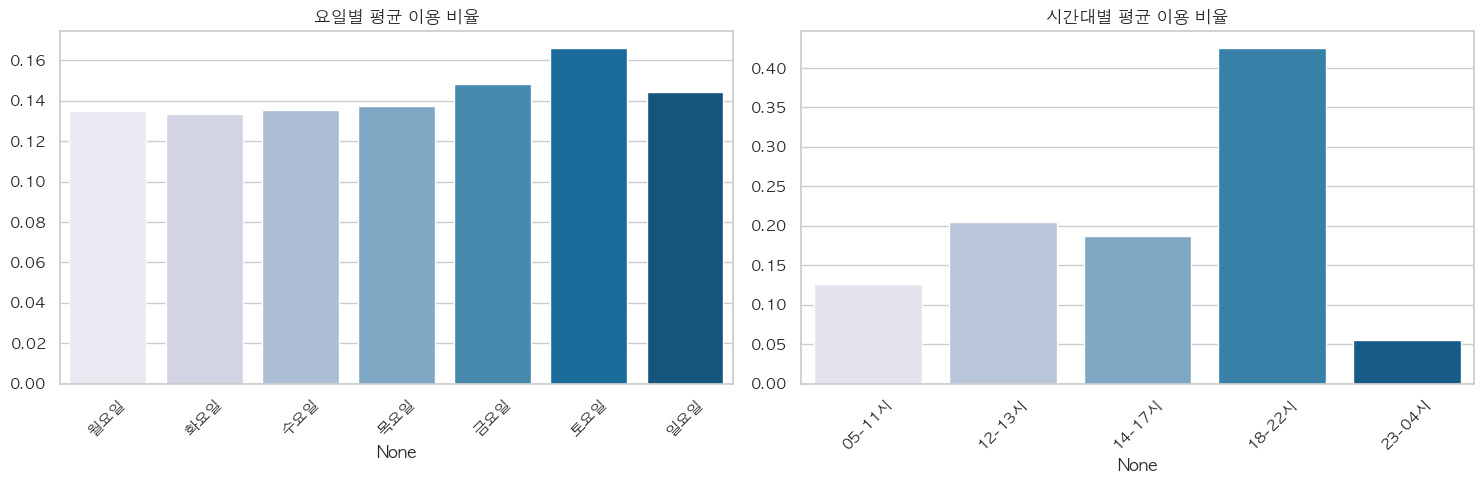

In [245]:
plt.figure(figsize=(15, 5))

# 요일별 패턴
plt.subplot(1, 2, 1)
sns.barplot(x=weekday_mean.index, y=weekday_mean.values, palette='PuBu')
plt.title('요일별 평균 이용 비율')
plt.xticks(rotation=45)

# 시간대별 패턴
plt.subplot(1, 2, 2)
sns.barplot(x=hourly_mean.index, y=hourly_mean.values, palette='PuBu')
plt.title('시간대별 평균 이용 비율')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

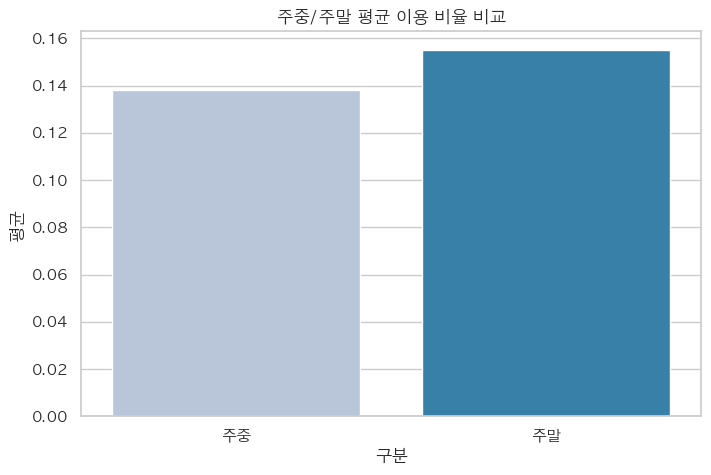

In [246]:
plt.figure(figsize=(8, 5))

comparison_data = pd.DataFrame({
    '구분': ['주중', '주말'],
    '평균': [weekday_avg, weekend_avg]
})

sns.barplot(data=comparison_data, x='구분', y='평균', palette='PuBu')
plt.title('주중/주말 평균 이용 비율 비교')
plt.show()

### 업종별 시간대 패턴 분석

In [247]:
# 2. 업종별 시간대 패턴
# 2-1. 요일별
weekday_by_type = mct.groupby('MCT_TYPE')[list(weekday_cols.keys())].mean()
weekday_by_type.columns = weekday_cols.values()


# 2-2. 시간대별
hourly_by_type = mct.groupby('MCT_TYPE')[list(hourly_cols.keys())].mean()
hourly_by_type.columns = hourly_cols.values()


print('업종 수:', mct['MCT_TYPE'].nunique())
print(weekday_by_type.head())
print('\n')
print(hourly_by_type.head())

업종 수: 30
                월요일       화요일       수요일       목요일       금요일       토요일  \
MCT_TYPE                                                                
가정식        0.138493  0.135707  0.138407  0.138342  0.148503  0.161792   
구내식당/푸드코트  0.161681  0.150509  0.157152  0.163484  0.148566  0.115834   
기사식당       0.173746  0.182799  0.175284  0.146279  0.141541  0.119769   
기타세계요리     0.132743  0.139733  0.148991  0.135162  0.152005  0.181992   
꼬치구이       0.129035  0.123481  0.125289  0.130766  0.157468  0.174369   

                일요일  
MCT_TYPE             
가정식        0.138756  
구내식당/푸드코트  0.102774  
기사식당       0.060582  
기타세계요리     0.109374  
꼬치구이       0.159590  


             05-11시    12-13시    14-17시    18-22시    23-04시
MCT_TYPE                                                   
가정식        0.108889  0.223895  0.151387  0.476011  0.039818
구내식당/푸드코트  0.299630  0.309424  0.182393  0.203036  0.005517
기사식당       0.280126  0.398963  0.140604  0.180307  0.000000
기타세계요리     0.088593  0.

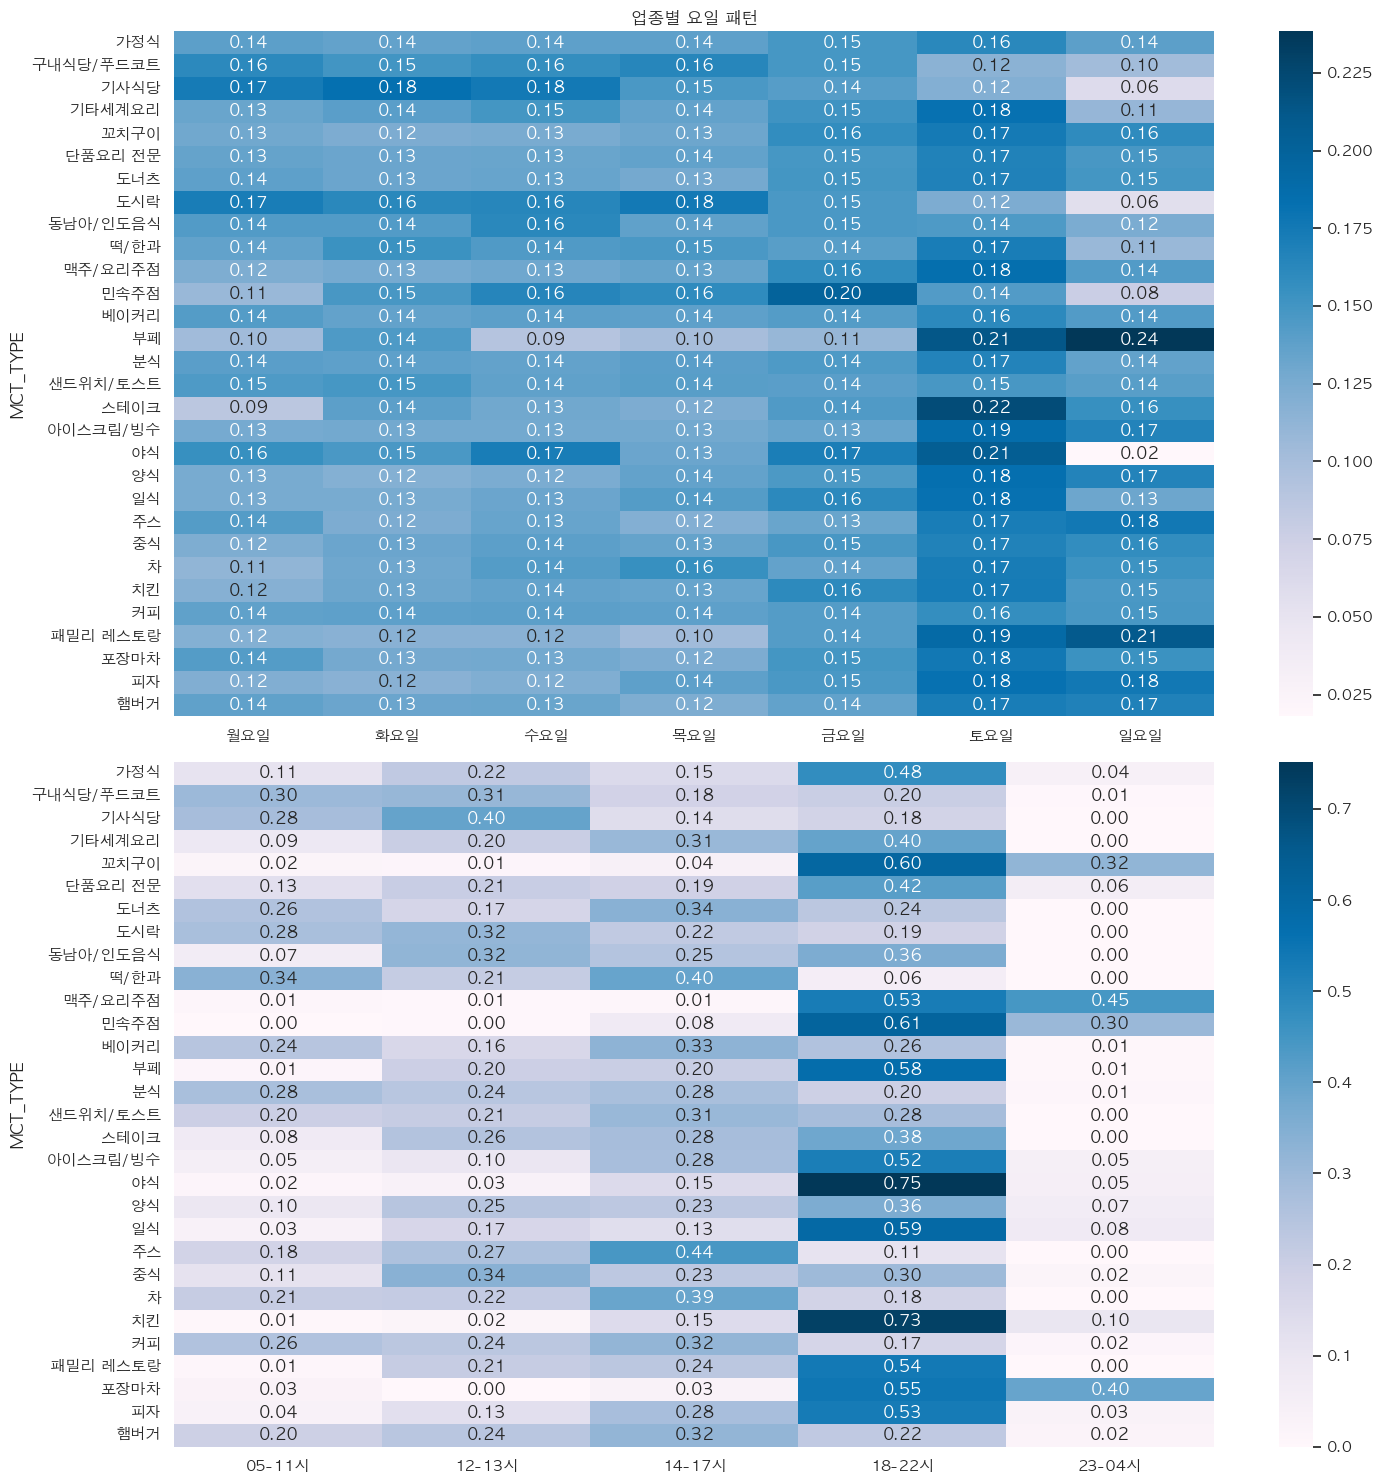

In [248]:
# 3. 업종별 히트맵
plt.figure(figsize=(15, 15))

# 요일별 히트맵
plt.subplot(2, 1, 1)
sns.heatmap(weekday_by_type, annot=True, fmt='.2f', cmap='PuBu')
plt.title('업종별 요일 패턴')

# 시간대별 히트맵
plt.subplot(2, 1, 2)
sns.heatmap(hourly_by_type, annot=True, fmt='.2f', cmap='PuBu')

plt.tight_layout()
plt.show()

In [249]:
# 클러스터링 분석
from sklearn.cluster import KMeans

# 시간대 패턴 기반 클러스터링
X = mct[list(hourly_cols.keys())]
kmeans = KMeans(n_clusters=4, random_state=42)
mct['시간패턴클러스터'] = kmeans.fit_predict(X)

In [252]:
# print("=== 업종별 주중/주말 비율 ===")
# print(mct.groupby('MCT_TYPE')['주중주말비율'].mean().sort_values(ascending=False))

print("\n=== 클러스터별 업종 수 ===")
print(mct['시간패턴클러스터'].value_counts())


=== 클러스터별 업종 수 ===
시간패턴클러스터
1    22258
2    20853
0    19471
3     5282
Name: count, dtype: int64


In [330]:
# 클러스터 중심점(Centroid) 분석: 각 클러스터의 중심점을 확인하여 시간대별 특성을 더 명확히 파악합니다.
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, 
                                columns=list(hourly_cols.values()),
                                index=[f'클러스터 {i}' for i in range(4)])
print(cluster_centers_df)

          05-11시    12-13시    14-17시    18-22시    23-04시
클러스터 0  0.098557  0.277754  0.232512  0.382663  0.008513
클러스터 1  0.289824  0.346598  0.278653  0.083714  0.001211
클러스터 2  0.004905  0.038323  0.093155  0.819756  0.043860
클러스터 3  0.016831  0.004936  0.013663  0.457498  0.507072


In [332]:
# 클러스터별 업종 분포 분석: 각 클러스터에 어떤 업종이 많이 포함되어 있는지 분석합니다.
cluster_business_types = pd.crosstab(mct['MCT_TYPE'], mct['시간패턴클러스터'])
print(cluster_business_types)

시간패턴클러스터      0     1     2     3
MCT_TYPE                         
가정식        7070  6495  8716  1338
구내식당/푸드코트    71   215    20     2
기사식당          2    20     0     0
기타세계요리       38    12     8     0
꼬치구이          8    12   223   233
단품요리 전문    6624  8545  7755  2024
도너츠          23    17     0     0
도시락          20    69     0     0
동남아/인도음식     33     3     3     0
떡/한과          6   150     0     0
맥주/요리주점      11    10   159   956
민속주점          0     0     5     6
베이커리        887   824    96     0
부페           15     0     4     0
분식          605  1128    44    17
샌드위치/토스트    141    84     5     1
스테이크         18    10     6     0
아이스크림/빙수    149    21   102     5
야식            2     0    12     0
양식          785   507   265   152
일식          737   139   912   214
주스           18    69     0     0
중식          827   580   165    35
차            15    46     3     0
치킨          126    24  1981   171
커피          744  3085    75    80
패밀리 레스토랑     25     0     6     0
포장마차          

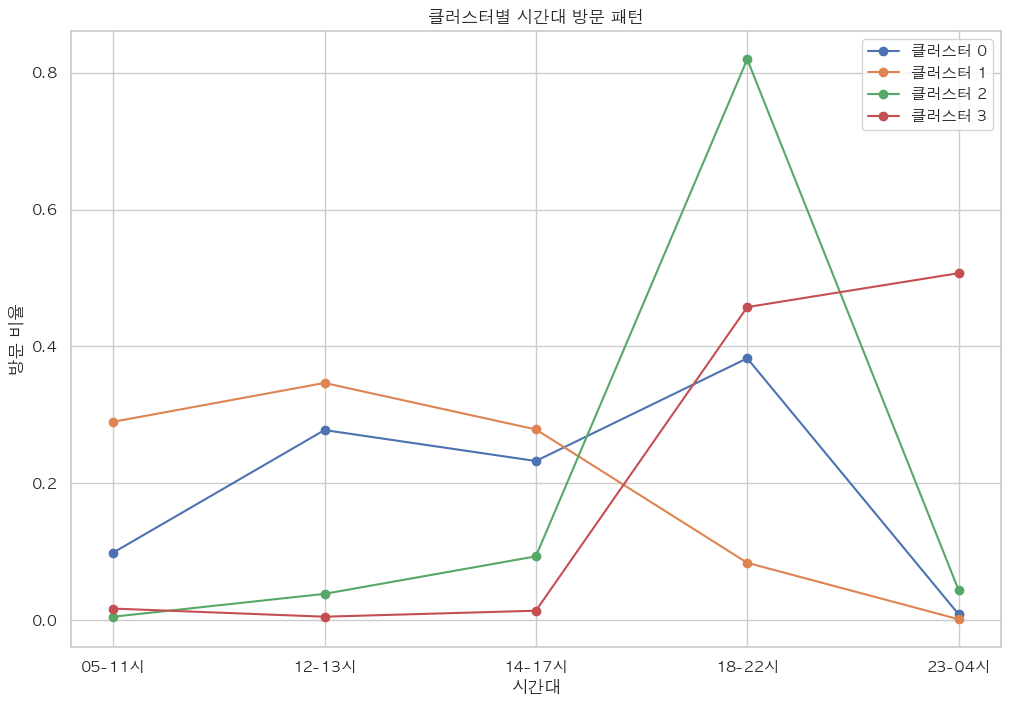

In [334]:
# 시각화: 클러스터별 시간대 패턴을 시각화하여 직관적으로 이해합니다
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(4):
   plt.plot(list(hourly_cols.values()), cluster_centers[i], marker='o', label=f'클러스터 {i}')

plt.title('클러스터별 시간대 방문 패턴')
plt.xlabel('시간대')
plt.ylabel('방문 비율')
plt.legend()
plt.grid(True)
plt.show()

In [253]:
# 2-1. 연령대별 평균
age_mean = mct[list(age_cols.keys())].mean()
age_mean.index = age_cols.values()

# 2-2. 성별 평균
gender_mean = mct[list(gender_cols.keys())].mean()
gender_mean.index = gender_cols.values()

print(age_mean.head())
print('\n')
print(gender_mean.head())

20대미만    0.156972
30대      0.246408
40대      0.276486
50대      0.213821
60대이상    0.106320
dtype: float64


남성    0.567483
여성    0.432520
dtype: float64


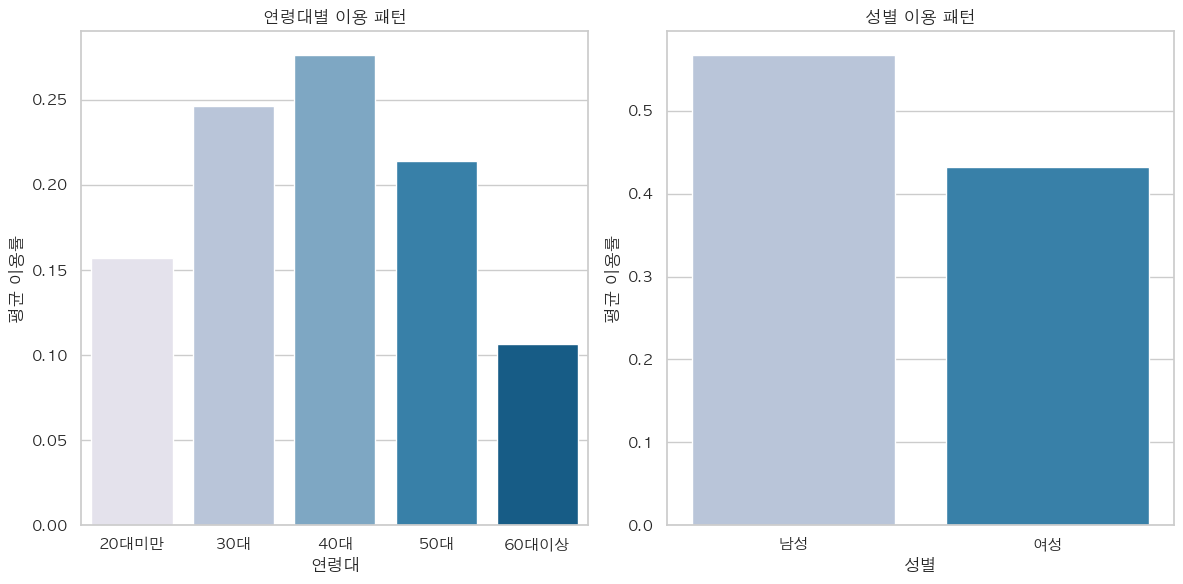

In [254]:
plt.figure(figsize=(12, 6))

# 연령대별 패턴
plt.subplot(1, 2, 1)
sns.barplot(x=age_mean.index, y=age_mean.values, palette='PuBu')
plt.title('연령대별 이용 패턴')
plt.xlabel('연령대')
plt.ylabel('평균 이용률')

# 성별 패턴
plt.subplot(1, 2, 2)
sns.barplot(x=gender_mean.index, y=gender_mean.values, palette='PuBu')
plt.title('성별 이용 패턴')
plt.xlabel('성별')
plt.ylabel('평균 이용률')

plt.tight_layout()
plt.show()

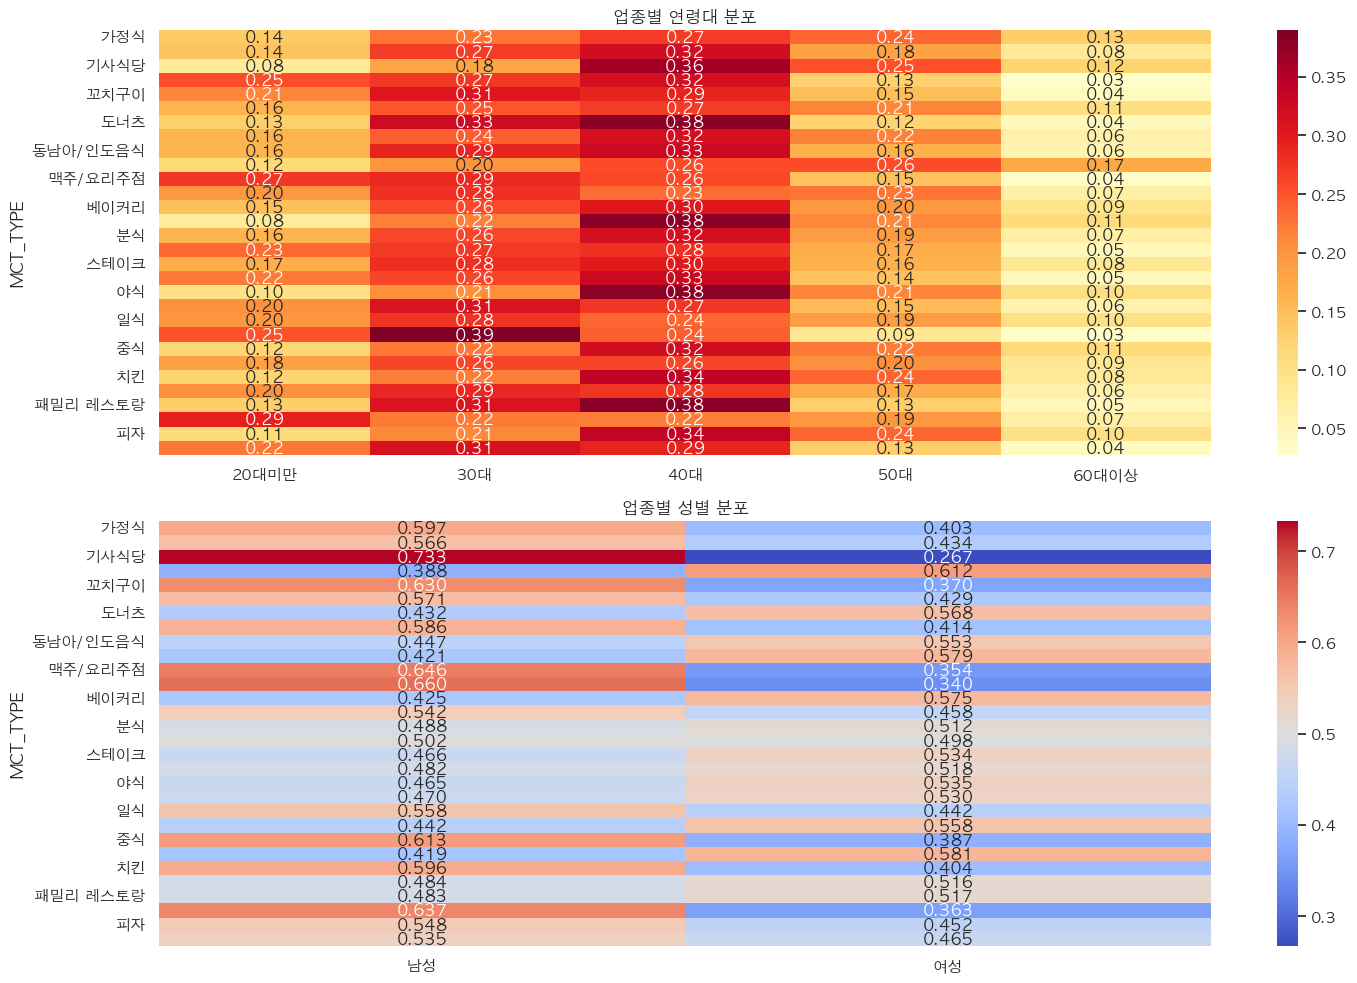

In [255]:
# 업종별 연령대 특성

plt.figure(figsize=(15, 10))

# 연령대 히트맵
plt.subplot(2, 1, 1)
age_by_type = mct.groupby('MCT_TYPE')[list(age_cols.keys())].mean()
age_by_type.columns = age_cols.values()
sns.heatmap(age_by_type, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('업종별 연령대 분포')

# 성별 히트맵
plt.subplot(2, 1, 2)
gender_by_type = mct.groupby('MCT_TYPE')[list(gender_cols.keys())].mean()
gender_by_type.columns = gender_cols.values()
sns.heatmap(gender_by_type, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('업종별 성별 분포')

plt.tight_layout()
plt.show()

### 업종별 현지인 이용 패턴 분석

In [256]:
mct['LOCAL_UE_CNT_RAT'].describe()

count    67864.000000
mean         0.468060
std          0.298165
min          0.000000
25%          0.159171
50%          0.501250
75%          0.753681
max          1.000000
Name: LOCAL_UE_CNT_RAT, dtype: float64

In [257]:
mct.loc[mct['LOCAL_UE_CNT_RAT'] > 0.5] # 현지인 이용 비중이 50% 이상인 가게들

YM         MCT_NM    OP_YMD MCT_TYPE                        ADDR  \
0      202301           통큰돼지  20110701      가정식   제주 제주시 용담이동 2682-9번지 통큰돼지   
6      202301    컴포즈커피 제주아라점  20200702       커피       제주 제주시 아라일동 6104번지 1층   
7      202301  (주)시더스초밥제주연동점  20220315  단품요리 전문        제주 제주시 연동 355-8번지 1층   
9      202301        원삼계탕아라점  20090609  단품요리 전문     제주 제주시 아라일동 1813-2번지 1층   
10     202301     파리바게뜨제주하귀점  20180404     베이커리  제주 제주시 애월읍 하귀1리 156-1번지 1층   
...       ...            ...       ...      ...                         ...   
67854  202312        30년할매닭발  20180223  단품요리 전문         제주 제주시 외도일동 495-6번지   
67855  202312       노가리 앤 비어  20220803  맥주/요리주점         제주 제주시 외도일동 527-2번지   
67858  202312      마왕족발제주시청점  20210705  단품요리 전문        제주 제주시 이도이동 1186-5번지   
67859  202312            미나리  20230630      가정식       제주 제주시 연동 291-24번지 연동   
67861  202312           경일낙지  20020112  단품요리 전문         제주 제주시 노형동 1291-3번지   

        UE_CNT_GRP UE_AMT_GRP  UE_AMT_PER_TRSN_GRP  MON_UE_CNT_RAT  \
0         5_75~90%   4_50~75%             3_25~50%        0.161290   
6      1_상위 10% 이하   5_75~90%  6_90% 초과(하위 10% 이하)        0.207161   
7         5_75~90%   5_75~90%             3_25~50%        0.133333   
9         3_25~50%   3_25~50%             4_50~75%        0.175258   
10     1_상위 10% 이하   2_10~25%  6_90% 초과(하위 10% 이하)        0.143187   
...            ...        ...                  ...             ...   
67854     4_50~75%   4_50~75%             4_50~75%        0.113636   
67855     4_50~75%   4_50~75%             4_50~75%        0.075472   
67858     5_75~90%   5_75~90%             3_25~50%        0.096774   
67859     3_25~50%   2_10~25%             4_50~75%        0.192000   
67861     2_10~25%   2_10~25%             4_50~75%        0.179310   

       TUE_UE_CNT_RAT  ...  RC_M12_FME_CUS_CNT_RAT  \
0            0.032258  ...                   0.390   
6            0.150895  ...                   0.528   
7            0.266667  ...                   0.435   
9            0.113402  ...                   0.414   
10           0.140878  ...                   0.552   
...               ...  ...                     ...   
67854        0.136364  ...                   0.420   
67855        0.132075  ...                   0.265   
67858        0.193548  ...                   0.380   
67859        0.216000  ...                   0.454   
67861        0.241379  ...                   0.576   

       RC_M12_AGE_UND_20_CUS_CNT_RAT  RC_M12_AGE_30_CUS_CNT_RAT  \
0                              0.103                      0.124   
6                              0.186                      0.319   
7                              0.074                      0.265   
9                              0.067                      0.186   
10                             0.072                      0.277   
...                              ...                        ...   
67854                          0.105                      0.217   
67855                          0.056                      0.181   
67858                          0.199                      0.222   
67859                          0.091                      0.261   
67861                          0.054                      0.218   

       RC_M12_AGE_40_CUS_CNT_RAT  RC_M12_AGE_50_CUS_CNT_RAT  \
0                          0.245                      0.387   
6                          0.352                      0.111   
7                          0.306                      0.247   
9                          0.294                      0.250   
10                         0.379                      0.180   
...                          ...                        ...   
67854                      0.339                      0.287   
67855                      0.409                      0.296   
67858                      0.240                      0.254   
67859                      0.313                      0.241   
67861                      0.379                      0.263   

       RC_

In [258]:
mct.loc[mct['LOCAL_UE_CNT_RAT'].nlargest(10).index] # 현지인 이용 비중이 가장 높은 상위 10개 가게

YM    MCT_NM    OP_YMD MCT_TYPE                              ADDR  \
173   202301        온기  20180404  단품요리 전문         제주 제주시 이도이동 1952-5번지 지하1층   
1028  202301     코코망가스  20160512  단품요리 전문        제주 제주시 애월읍 광령리 1039-3번지 2층   
1499  202301        친구  20201113  맥주/요리주점                제주 제주시 연동 1953-3번지   
2179  202301       차화술  20170808      가정식          제주 제주시 일도이동 1020-21번지 2층   
4309  202301      금하순대  20220930  단품요리 전문             제주 제주시 한림읍 귀덕리 2979번지   
4477  202301      도원유통  20010223       분식             제주 제주시 노형동 916-4번지 1층   
4909  202301     제주씨푸드  20071001  단품요리 전문             제주 제주시 삼양일동 1662-12번지   
5002  202301       아띠랑  20190513  단품요리 전문  제주 서귀포시 서귀동 163-11번지 남양오피스텔 101호   
5108  202301  주식회사장인의집  20211019  단품요리 전문        제주 제주시 애월읍 봉성리 3404-2번지 1층   
5818  202302     정표네포차  20230113  단품요리 전문              제주 제주시 일도이동 355-19번지   

               UE_CNT_GRP           UE_AMT_GRP UE_AMT_PER_TRSN_GRP  \
173   6_90% 초과(하위 10% 이하)             4_50~75%         1_상위 10% 이하   
1028  6_90% 초과(하위 10% 이하)             4_50~75%         1_상위 10% 이하   
1499  6_90% 초과(하위 10% 이하)             3_25~50%         1_상위 10% 이하   
2179  6_90% 초과(하위 10% 이하)             4_50~75%         1_상위 10% 이하   
4309  6_90% 초과(하위 10% 이하)  6_90% 초과(하위 10% 이하)         1_상위 10% 이하   
4477  6_90% 초과(하위 10% 이하)             2_10~25%         1_상위 10% 이하   
4909  6_90% 초과(하위 10% 이하)             4_50~75%         1_상위 10% 이하   
5002  6_90% 초과(하위 10% 이하)  6_90% 초과(하위 10% 이하)         1_상위 10% 이하   
5108  6_90% 초과(하위 10% 이하)             3_25~50%         1_상위 10% 이하   
5818  6_90% 초과(하위 10% 이하)             5_75~90%         1_상위 10% 이하   

      MON_UE_CNT_RAT  TUE_UE_CNT_RAT  ...  RC_M12_FME_CUS_CNT_RAT  \
173            0.000             0.0  ...                   0.000   
1028           0.000             0.0  ...                   0.000   
1499           0.000             0.0  ...                   0.526   
2179           0.000             0.0  ...                   0.000   
4309           0.000             0.0  ...                   1.000   
4477           0.000             0.0  ...                   0.545   
4909           0.000             0.0  ...                   0.091   
5002           0.000             0.0  ...                   0.071   
5108           1.000             0.0  ...                   1.000   
5818           0.125             0.0  ...                   0.154   

      RC_M12_AGE_UND_20_CUS_CNT_RAT  RC_M12_AGE_30_CUS_CNT_RAT  \
173                           0.000                      0.000   
1028                          0.000                      0.000   
1499                          0.211                      0.053   
2179                          0.000                      0.000   
4309                          0.000                      0.000   
4477                          0.000                      0.045   
4909                          0.000                      0.091   
5002                          0.000                      0.000   
5108                          0.000                      0.000   
5818                          0.000                      0.077   

      RC_M12_AGE_40_CUS_CNT_RAT  RC_M12_AGE_50_CUS_CNT_RAT  \
173                       1.000                      0.000   
1028                      0.000                      1.000   
1499                      0.105                      0.579   
2179                      0.059                      0.647   
4309                      0.250                      0.250   
4477                      0.000                      0.045   
4909                      0.091                      0.818   
5002                      0.857                      0.071   
5108                      0.000                      1.000   
5818                      0.231                      0.538   

      RC_M12_AGE_OVR_60_CUS_CNT_RAT  UE_CNT_ORD  UE_AMT_ORD  UE_AMT_PER_ORD  \
173                           0.000         NaN         4.0             NaN   
1028                          0.000      

In [259]:
# 업종별 현지인 이용 비중
local_by_type = mct.groupby('MCT_TYPE')['LOCAL_UE_CNT_RAT'].mean().sort_values(ascending=False)
print("\n업종별 현지인 이용 비중:")
print(local_by_type)


업종별 현지인 이용 비중:
MCT_TYPE
패밀리 레스토랑     0.756362
기타세계요리       0.750456
부페           0.734789
도시락          0.730248
꼬치구이         0.698857
동남아/인도음식     0.688949
맥주/요리주점      0.657030
민속주점         0.653781
야식           0.651827
아이스크림/빙수     0.648469
중식           0.606295
포장마차         0.597863
치킨           0.596191
피자           0.593163
샌드위치/토스트     0.585572
기사식당         0.554936
베이커리         0.553167
커피           0.522970
도너츠          0.506488
구내식당/푸드코트    0.505840
분식           0.488545
단품요리 전문      0.459488
가정식          0.429987
양식           0.414781
햄버거          0.378281
일식           0.373616
떡/한과         0.365951
스테이크         0.309516
차            0.300659
주스           0.053986
Name: LOCAL_UE_CNT_RAT, dtype: float64


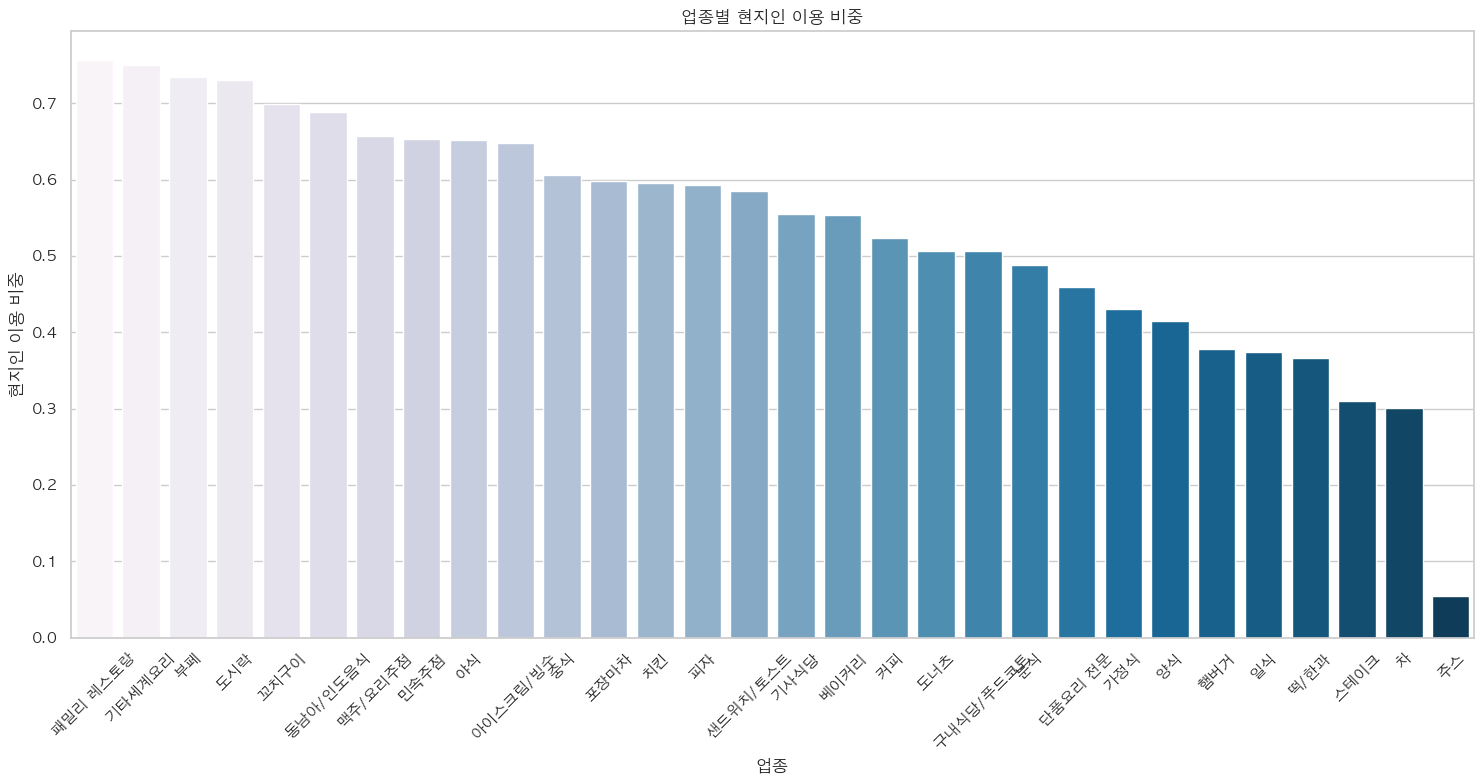

In [263]:
plt.figure(figsize=(15, 8))
sns.barplot(x=local_by_type.index, y=local_by_type.values, palette='PuBu')
plt.title('업종별 현지인 이용 비중')
plt.xticks(rotation=45)
plt.xlabel('업종')
plt.ylabel('현지인 이용 비중')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '현지인 비중별 연령대 패턴')

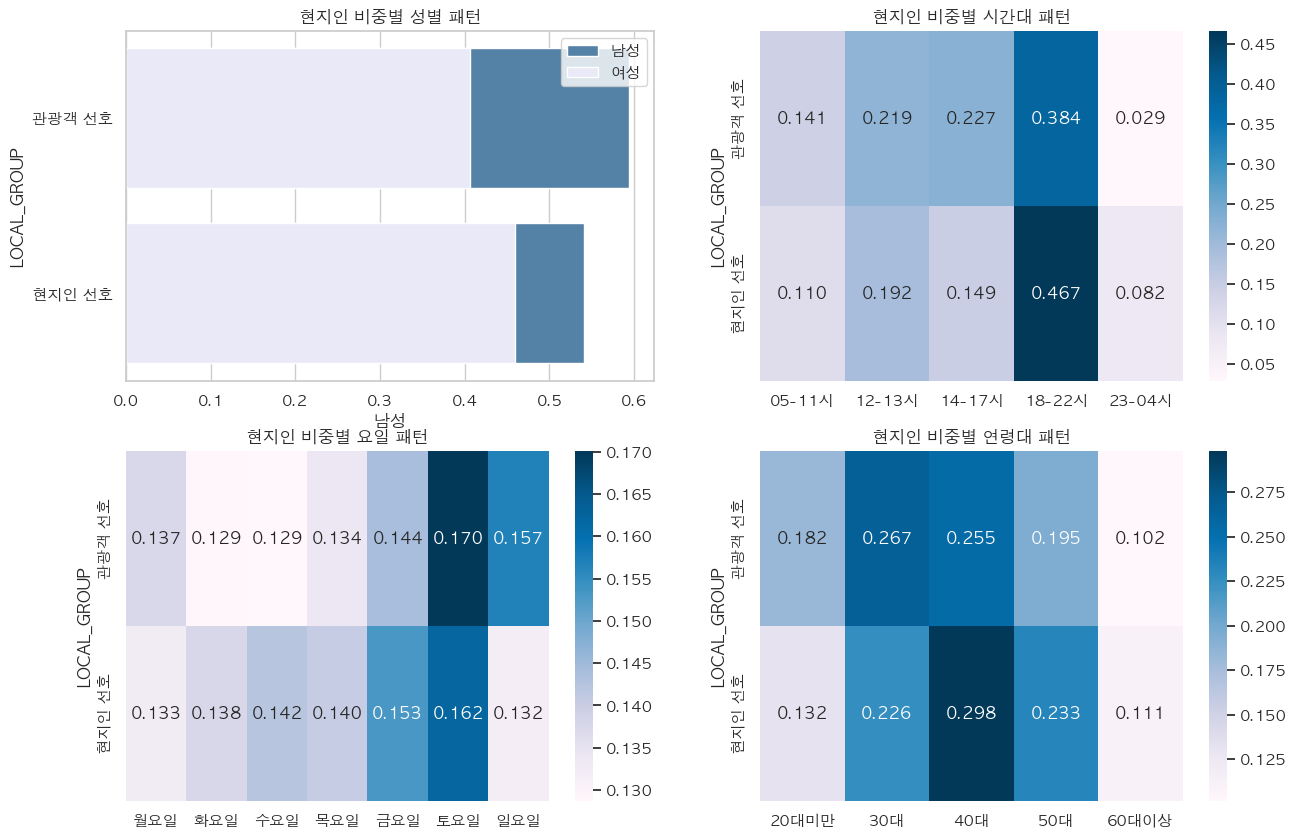

In [273]:
# 현지인 비중이 높은/낮은 그룹으로 나누기
mct['LOCAL_GROUP'] = pd.qcut(mct['LOCAL_UE_CNT_RAT'], q=2, labels=['관광객 선호', '현지인 선호'])

# 그룹별 분석
plt.figure(figsize=(15, 10))

# 성별 패턴
plt.subplot(2, 2, 1)
gender_pattern = mct.groupby('LOCAL_GROUP')[list(gender_cols.keys())].mean()
gender_pattern.columns = gender_cols.values()
sns.barplot(data=gender_pattern.reset_index(), x=list(gender_cols.values())[0], y=mct['LOCAL_GROUP'], color='steelblue', label='남성')
sns.barplot(data=gender_pattern.reset_index(), x=list(gender_cols.values())[1], y=mct['LOCAL_GROUP'], color='lavender', label='여성')
plt.title('현지인 비중별 성별 패턴')
plt.legend()


# 시간대별 패턴
plt.subplot(2, 2, 2)
time_pattern = mct.groupby('LOCAL_GROUP')[list(hourly_cols.keys())].mean()
time_pattern.columns = list(hourly_cols.values())
sns.heatmap(time_pattern, annot=True, fmt='.3f', cmap='PuBu')
plt.title('현지인 비중별 시간대 패턴')

# 요일별 패턴
plt.subplot(2, 2, 3)
weekday_pattern = mct.groupby('LOCAL_GROUP')[list(weekday_cols.keys())].mean()
weekday_pattern.columns = list(weekday_cols.values())
sns.heatmap(weekday_pattern, annot=True, fmt='.3f', cmap='PuBu')
plt.title('현지인 비중별 요일 패턴')

# 연령대별 패턴
plt.subplot(2, 2, 4)
age_pattern = mct.groupby('LOCAL_GROUP')[list(age_cols.keys())].mean()
age_pattern.columns = list(age_cols.values())
sns.heatmap(age_pattern, annot=True, fmt='.3f', cmap='PuBu')
plt.title('현지인 비중별 연령대 패턴')

### 업종별 이용건수, 이용금액, 건당금액 분석

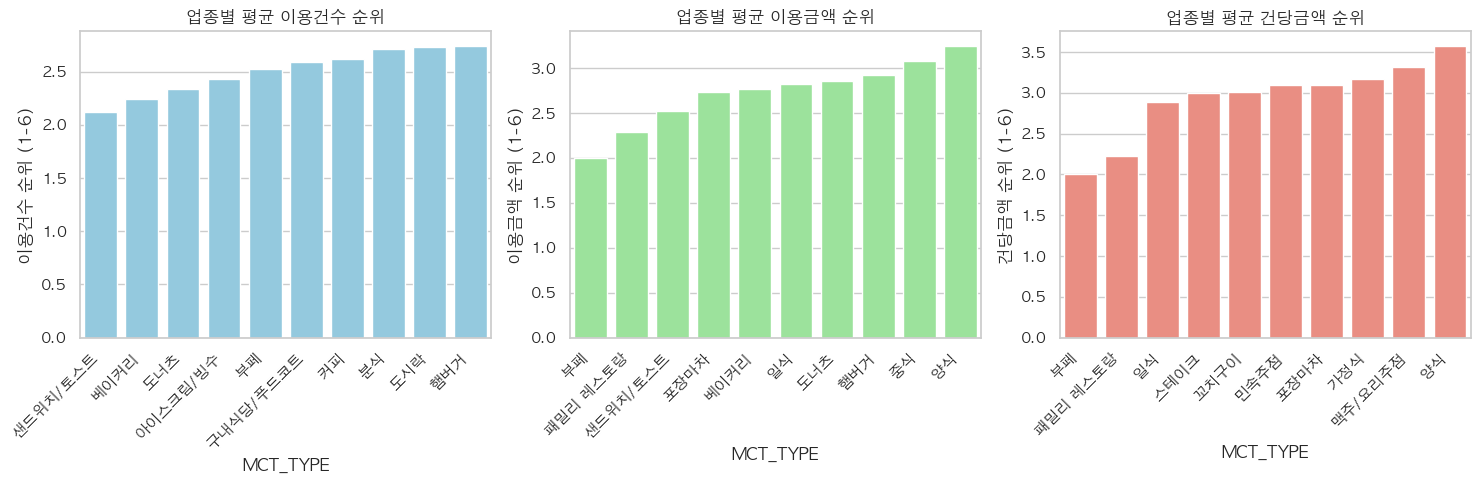


=== 순위 간 상관관계 ===
                UE_CNT_ORD  UE_AMT_ORD  UE_AMT_PER_ORD
UE_CNT_ORD        1.000000    0.272434       -0.461529
UE_AMT_ORD        0.272434    1.000000        0.083603
UE_AMT_PER_ORD   -0.461529    0.083603        1.000000

=== 업종별 세부 통계 ===
          UE_CNT_ORD       UE_AMT_ORD       UE_AMT_PER_ORD      
                mean   std       mean   std           mean   std
MCT_TYPE                                                        
가정식             3.73  0.96       3.52  1.01           3.18  0.91
구내식당/푸드코트       2.59  0.80       3.47  1.11           4.31  0.96
기사식당            3.45  0.51       4.53  0.51           4.50  0.51
기타세계요리          3.03  0.66       3.80  0.94           4.62  0.78
꼬치구이            4.02  0.70       3.46  0.81           3.02  0.59
단품요리 전문         3.47  1.00       3.55  1.01           3.58  1.05
도너츠             2.33  0.50       2.86  0.72           5.00  0.00
도시락             2.73  1.08       3.80  0.68           4.06  1.11
동남아/인도음식        3.21  0.77 

In [277]:
# 업종별 평균 분석
plt.figure(figsize=(15, 5))

# 1. 업종별 이용건수 순위
plt.subplot(1, 3, 1)
cnt_by_type = mct.groupby('MCT_TYPE')['UE_CNT_ORD'].mean().sort_values(ascending=True).head(10)
sns.barplot(x=cnt_by_type.index, y=cnt_by_type.values, color='skyblue')
plt.title('업종별 평균 이용건수 순위')
plt.xticks(rotation=45, ha='right')
plt.ylabel('이용건수 순위 (1-6)')

# 2. 업종별 이용금액 순위
plt.subplot(1, 3, 2)
amt_by_type = mct.groupby('MCT_TYPE')['UE_AMT_ORD'].mean().sort_values(ascending=True).head(10)
sns.barplot(x=amt_by_type.index, y=amt_by_type.values, color='lightgreen')
plt.title('업종별 평균 이용금액 순위')
plt.xticks(rotation=45, ha='right')
plt.ylabel('이용금액 순위 (1-6)')

# 3. 업종별 건당금액 순위
plt.subplot(1, 3, 3)
per_by_type = mct.groupby('MCT_TYPE')['UE_AMT_PER_ORD'].mean().sort_values(ascending=True).head(10)
sns.barplot(x=per_by_type.index, y=per_by_type.values, color='salmon')
plt.title('업종별 평균 건당금액 순위')
plt.xticks(rotation=45, ha='right')
plt.ylabel('건당금액 순위 (1-6)')

plt.tight_layout()
plt.show()

# 상관관계 분석
print("\n=== 순위 간 상관관계 ===")
corr = mct[['UE_CNT_ORD', 'UE_AMT_ORD', 'UE_AMT_PER_ORD']].corr()
print(corr)

# 업종별 세부 통계
print("\n=== 업종별 세부 통계 ===")
stats_by_type = mct.groupby('MCT_TYPE').agg({
    'UE_CNT_ORD': ['mean', 'std'],
    'UE_AMT_ORD': ['mean', 'std'],
    'UE_AMT_PER_ORD': ['mean', 'std']
}).round(2)
print(stats_by_type)


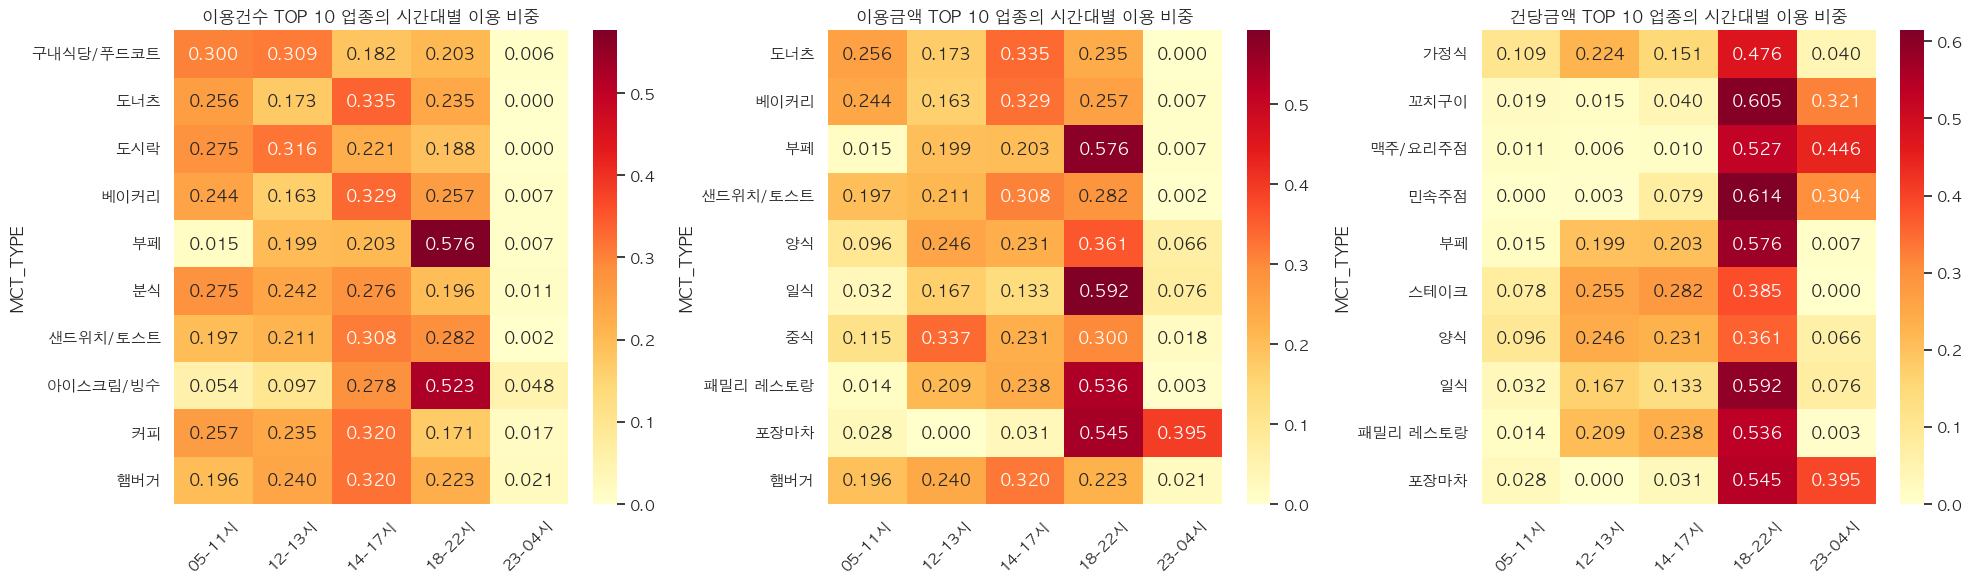


=== 업종별 피크타임 ===

이용건수 TOP 10 업종의 피크타임:
구내식당/푸드코트: 12-13시 (0.309)
도너츠: 14-17시 (0.335)
도시락: 12-13시 (0.316)
베이커리: 14-17시 (0.329)
부페: 18-22시 (0.576)
분식: 14-17시 (0.276)
샌드위치/토스트: 14-17시 (0.308)
아이스크림/빙수: 18-22시 (0.523)
커피: 14-17시 (0.320)
햄버거: 14-17시 (0.320)

이용금액 TOP 10 업종의 피크타임:
도너츠: 14-17시 (0.335)
베이커리: 14-17시 (0.329)
부페: 18-22시 (0.576)
샌드위치/토스트: 14-17시 (0.308)
양식: 18-22시 (0.361)
일식: 18-22시 (0.592)
중식: 12-13시 (0.337)
패밀리 레스토랑: 18-22시 (0.536)
포장마차: 18-22시 (0.545)
햄버거: 14-17시 (0.320)

건당금액 TOP 10 업종의 피크타임:
가정식: 18-22시 (0.476)
꼬치구이: 18-22시 (0.605)
맥주/요리주점: 18-22시 (0.527)
민속주점: 18-22시 (0.614)
부페: 18-22시 (0.576)
스테이크: 18-22시 (0.385)
양식: 18-22시 (0.361)
일식: 18-22시 (0.592)
패밀리 레스토랑: 18-22시 (0.536)
포장마차: 18-22시 (0.545)


In [278]:
# 시간대별 순위 분포
plt.figure(figsize=(20, 6))

# 1. 이용건수 기준 Top 10 업종의 시간대별 패턴
plt.subplot(1, 3, 1)
cnt_top_10 = mct.groupby('MCT_TYPE')['UE_CNT_ORD'].mean().sort_values(ascending=True).head(10).index
cnt_pattern = mct[mct['MCT_TYPE'].isin(cnt_top_10)].groupby('MCT_TYPE')[list(hourly_cols.keys())].mean()
cnt_pattern.columns = hourly_cols.values()

sns.heatmap(cnt_pattern, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('이용건수 TOP 10 업종의 시간대별 이용 비중')
plt.xticks(rotation=45)

# 2. 이용금액 기준 Top 10 업종의 시간대별 패턴
plt.subplot(1, 3, 2)
amt_top_10 = mct.groupby('MCT_TYPE')['UE_AMT_ORD'].mean().sort_values(ascending=True).head(10).index
amt_pattern = mct[mct['MCT_TYPE'].isin(amt_top_10)].groupby('MCT_TYPE')[list(hourly_cols.keys())].mean()
amt_pattern.columns = hourly_cols.values()

sns.heatmap(amt_pattern, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('이용금액 TOP 10 업종의 시간대별 이용 비중')
plt.xticks(rotation=45)

# 3. 건당금액 기준 Top 10 업종의 시간대별 패턴
plt.subplot(1, 3, 3)
per_top_10 = mct.groupby('MCT_TYPE')['UE_AMT_PER_ORD'].mean().sort_values(ascending=True).head(10).index
per_pattern = mct[mct['MCT_TYPE'].isin(per_top_10)].groupby('MCT_TYPE')[list(hourly_cols.keys())].mean()
per_pattern.columns = hourly_cols.values()

sns.heatmap(per_pattern, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('건당금액 TOP 10 업종의 시간대별 이용 비중')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 각 업종별 주요 시간대 출력
print("\n=== 업종별 피크타임 ===")
for pattern, title in [(cnt_pattern, "이용건수"), (amt_pattern, "이용금액"), (per_pattern, "건당금액")]:
    print(f"\n{title} TOP 10 업종의 피크타임:")
    for mct_type in pattern.index:
        peak_time = pattern.columns[pattern.loc[mct_type].argmax()]
        peak_ratio = pattern.loc[mct_type].max()
        print(f"{mct_type}: {peak_time} ({peak_ratio:.3f})")

### 업종별 지역(서귀포/제주시) 특성 분석

In [441]:
# ADDR에서 '제주시'와 '서귀포시' 추출
mct['지역'] = mct['ADDR'].apply(lambda x: '제주시' if '제주시' in x else '서귀포시')

In [477]:
mct.loc[(mct['MCT_TYPE'] == '패밀리 레스토랑') & (mct['지역'] == '제주시')]

YM                 MCT_NM    OP_YMD  MCT_TYPE  \
1093   202301       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
5163   202301  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
6189   202302  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
8988   202302       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
10530  202302               서가앤쿡 제주점  20170201  패밀리 레스토랑   
12556  202303       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
15965  202303  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
18315  202304       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
19934  202304               서가앤쿡 제주점  20170201  패밀리 레스토랑   
20785  202304  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
22949  202305               서가앤쿡 제주점  20170201  패밀리 레스토랑   
25558  202305       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
26032  202305  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
29309  202306  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
29391  202306       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
34786  202307  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
37255  202307       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
37619  202307               서가앤쿡 제주점  20170201  패밀리 레스토랑   
39673  202308       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
40779  202308  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
42946  202308               서가앤쿡 제주점  20170201  패밀리 레스토랑   
46949  202309       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
47765  202309               서가앤쿡 제주점  20170201  패밀리 레스토랑   
50554  202309  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
53850  202310       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
54517  202310  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
56127  202310               서가앤쿡 제주점  20170201  패밀리 레스토랑   
58267  202311  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   
58708  202311       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
62893  202312       씨제이푸드빌(주) 빕스 제주점  20220907  패밀리 레스토랑   
63862  202312  (유)아웃백스테이크하우스 제주아일랜드점  20090217  패밀리 레스토랑   

                         ADDR   UE_CNT_GRP   UE_AMT_GRP UE_AMT_PER_TRSN_GRP  \
1093     제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
5163    제주 제주시 오라이동 3173번지 1층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
6189    제주 제주시 오라이동 3173번지 1층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
8988     제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
10530  제주 제주시 건입동 1443-2번지 1층     3_25~50%     2_10~25%            3_25~50%   
12556    제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
15965   제주 제주시 오라이동 3173번지 1층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
18315    제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
19934  제주 제주시 건입동 1443-2번지 1층     3_25~50%     2_10~25%            3_25~50%   
20785   제주 제주시 오라이동 3173번지 1층     2_10~25%  1_상위 10% 이하            2_10~25%   
22949  제주 제주시 건입동 1443-2번지 1층     3_25~50%     2_10~25%            3_25~50%   
25558    제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
26032   제주 제주시 오라이동 3173번지 1층     2_10~25%  1_상위 10% 이하            2_10~25%   
29309   제주 제주시 오라이동 3173번지 1층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
29391    제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
34786   제주 제주시 오라이동 3173번지 1층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
37255    제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
37619  제주 제주시 건입동 1443-2번지 1층     3_25~50%     2_10~25%            3_25~50%   
39673    제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
40779   제주 제주시 오라이동 3173번지 1층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
42946  제주 제주시 건입동 1443-2번지 1층     3_25~50%     3_25~50%            3_25~50%   
46949    제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
47765  제주 제주시 건입동 1443-2번지 1층     3_25~50%     2_10~25%            3_25~50%   
50554   제주 제주시 오라이동 3173번지 1층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
53850    제주 제주시 연동 280-1번지 9층  1_상위 10% 이하  1_상위 10% 이하            2_10~25%   
54517   제주 제주시 오라이동 3173번지 1층  1_상위 

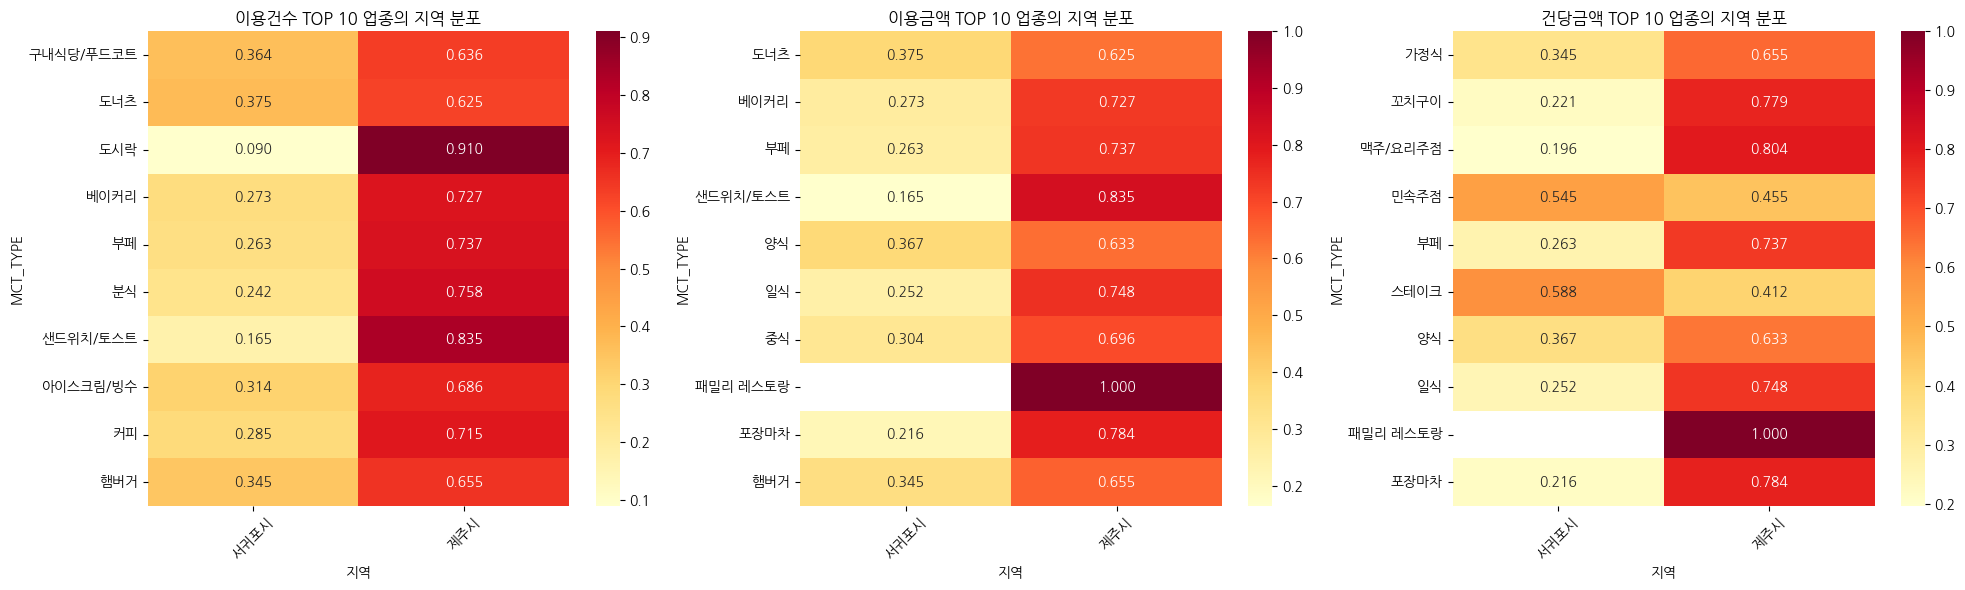


=== 업종별 지역 분포 특성 ===

이용건수 TOP 10 업종의 지역 분포:
(비율이 높을수록 해당 지역의 비중이 높음)
샌드위치/토스트: 제주시 0.835, 서귀포시 0.165
베이커리: 제주시 0.727, 서귀포시 0.273
도너츠: 제주시 0.625, 서귀포시 0.375
아이스크림/빙수: 제주시 0.686, 서귀포시 0.314
부페: 제주시 0.737, 서귀포시 0.263
구내식당/푸드코트: 제주시 0.636, 서귀포시 0.364
커피: 제주시 0.715, 서귀포시 0.285
분식: 제주시 0.758, 서귀포시 0.242
도시락: 제주시 0.910, 서귀포시 0.090
햄버거: 제주시 0.655, 서귀포시 0.345

이용금액 TOP 10 업종의 지역 분포:
(비율이 높을수록 해당 지역의 비중이 높음)
부페: 제주시 0.737, 서귀포시 0.263
패밀리 레스토랑: 제주시 1.000, 서귀포시 0.000
샌드위치/토스트: 제주시 0.835, 서귀포시 0.165
포장마차: 제주시 0.784, 서귀포시 0.216
베이커리: 제주시 0.727, 서귀포시 0.273
일식: 제주시 0.748, 서귀포시 0.252
도너츠: 제주시 0.625, 서귀포시 0.375
햄버거: 제주시 0.655, 서귀포시 0.345
중식: 제주시 0.696, 서귀포시 0.304
양식: 제주시 0.633, 서귀포시 0.367

건당금액 TOP 10 업종의 지역 분포:
(비율이 높을수록 해당 지역의 비중이 높음)
부페: 제주시 0.737, 서귀포시 0.263
패밀리 레스토랑: 제주시 1.000, 서귀포시 0.000
일식: 제주시 0.748, 서귀포시 0.252
스테이크: 제주시 0.412, 서귀포시 0.588
꼬치구이: 제주시 0.779, 서귀포시 0.221
민속주점: 제주시 0.455, 서귀포시 0.545
포장마차: 제주시 0.784, 서귀포시 0.216
가정식: 제주시 0.655, 서귀포시 0.345
맥주/요리주점: 제주시 0.804, 서귀포시 0.196
양식: 제주시 0.633, 

In [468]:
# 업종별 지역 분포 분석
plt.figure(figsize=(20, 6))

# 1. 이용건수 기준 TOP 10 업종의 지역 분포
plt.subplot(1, 3, 1)
cnt_top_10 = mct.groupby('MCT_TYPE')['UE_CNT_ORD'].mean().sort_values(ascending=True).head(10).index
region_cnt = mct[mct['MCT_TYPE'].isin(cnt_top_10)].groupby('MCT_TYPE')['지역'].value_counts(normalize=True).unstack()

sns.heatmap(region_cnt, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('이용건수 TOP 10 업종의 지역 분포')
plt.xticks(rotation=45)

# 2. 이용금액 기준 TOP 10 업종의 지역 분포
plt.subplot(1, 3, 2)
amt_top_10 = mct.groupby('MCT_TYPE')['UE_AMT_ORD'].mean().sort_values(ascending=True).head(10).index
region_amt = mct[mct['MCT_TYPE'].isin(amt_top_10)].groupby('MCT_TYPE')['지역'].value_counts(normalize=True).unstack()

sns.heatmap(region_amt, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('이용금액 TOP 10 업종의 지역 분포')
plt.xticks(rotation=45)

# 3. 건당금액 기준 TOP 10 업종의 지역 분포
plt.subplot(1, 3, 3)
per_top_10 = mct.groupby('MCT_TYPE')['UE_AMT_PER_ORD'].mean().sort_values(ascending=True).head(10).index
region_per = mct[mct['MCT_TYPE'].isin(per_top_10)].groupby('MCT_TYPE')['지역'].value_counts(normalize=True).unstack()

sns.heatmap(region_per, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('건당금액 TOP 10 업종의 지역 분포')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 업종별 지역 분포 상세 분석
print("\n=== 업종별 지역 분포 특성 ===")
for title, region_data, top_10 in [
    ("이용건수", region_cnt, cnt_top_10),
    ("이용금액", region_amt, amt_top_10),
    ("건당금액", region_per, per_top_10)
]:
    
    print(f"\n{title} TOP 10 업종의 지역 분포:")
    print("(비율이 높을수록 해당 지역의 비중이 높음)")
    for mct_type in top_10:
        jeju_ratio = region_data.loc[mct_type, '제주시']
        print(f"{mct_type}: 제주시 {jeju_ratio:.3f}, 서귀포시 {1-jeju_ratio:.3f}")

# 평점리뷰 감성분석

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import json

import matplotlib.font_manager as fm
plt.rc('font', family='Nanum Gothic')
plt.rcParams['axes.unicode_minus'] = False

sentiment_path = Path('../data/raw/제주 관광지 평점리뷰 감성분석 데이터')
sentiment_files = sorted(sentiment_path.glob('JT_PORTAL_SITE_AVRG_SCORE_REVIEW_STANL_INFO_2023*.csv'))

In [34]:
dfs = []
for file in sentiment_files:
    try: 
        df = pd.read_csv(file, encoding='utf-8')
        dfs.append(df)
        print(f"Loaded: {file.name}")
    except Exception as e:
        print(f"Error loading {file.name}: {e}")

sentiment = pd.concat(dfs, ignore_index=True)

print("\n=== 평점리뷰 감성분석 데이터 정보 ===")
print(f"전체 행 수: {len(sentiment)}")
print("\n처음 5행:")
print(sentiment.head())

Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_STANL_INFO_202306.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_STANL_INFO_202312.csv

=== 평점리뷰 감성분석 데이터 정보 ===
전체 행 수: 875

처음 5행:
  CL_NM TRRSRT_NM              TRRSRT_ADDR ORIGIN_CL_NM  ANALS_BEGIN_DE  \
0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5        NAVER        20230101   
1  공연전시      빛의벙커  제주 서귀포시 성산읍 고성리 2039-22        NAVER        20230101   
2  공연전시  세계자동차박물관   제주 서귀포시 안덕면 중산간서로 1610        NAVER        20230101   
3  공연전시   수목원테마파크            제주 제주시 은수길 69        NAVER        20230101   
4  공연전시    아리랑공연장  제주 서귀포시 표선면 번영로 2564-21        NAVER        20230101   

   ANALS_END_DE  AVRG_SCORE_VALUE                       CORE_KWRD_CN  \
0      20230630                 0     파충류,아이,체험,고흐,사진,친절,정원,설명,그림,시간   
1      20230630                 0      작품,음악,그림,시간,전시,감상,벙커,관람,제주,아이   
2      20230630                 0   자동차,아이,피아노,체험,사슴,먹이,박물관,구경,시간,전시   
3      20230630                 0  아이,체험,썰매,얼음,수목원,테마파크,아이스,시간,사진,어른   
4      20230630  

In [112]:
sentiment.head(3)

CL_NM TRRSRT_NM              TRRSRT_ADDR ORIGIN_CL_NM  ANALS_BEGIN_DE  \
0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5        NAVER        20230101   
1  공연전시      빛의벙커  제주 서귀포시 성산읍 고성리 2039-22        NAVER        20230101   
2  공연전시  세계자동차박물관   제주 서귀포시 안덕면 중산간서로 1610        NAVER        20230101   

   ANALS_END_DE  AVRG_SCORE_VALUE                      CORE_KWRD_CN  \
0      20230630                 0    파충류,아이,체험,고흐,사진,친절,정원,설명,그림,시간   
1      20230630                 0     작품,음악,그림,시간,전시,감상,벙커,관람,제주,아이   
2      20230630                 0  자동차,아이,피아노,체험,사슴,먹이,박물관,구경,시간,전시   

   CORE_KWRD_CO AFRM_KWRD_CN  AFRM_KWRD_CO NEGA_KWRD_CN  NEGA_KWRD_CO  
0            10           친절             1          NaN             0  
1            10          NaN             0          NaN             0  
2            10          NaN             0          NaN             0

In [79]:
sentiment['CL_NM'].unique()

array(['공연전시', '기타', '레저관광', '키즈', '테마파크', '자연', '체험', '관광호텔업', '일반호텔',
       '관광호텔', '숙박업(생활)', '여관업', '숙박업 기타', '휴양콘도미니엄업'], dtype=object)

### 1. 키워드 분석

In [7]:
# 1. 핵심 키워드(CORE_KWRD_CN) 분석
from collections import Counter
import re

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_76672/2875241379.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='Keyword', y='Count', palette='Blues_d')


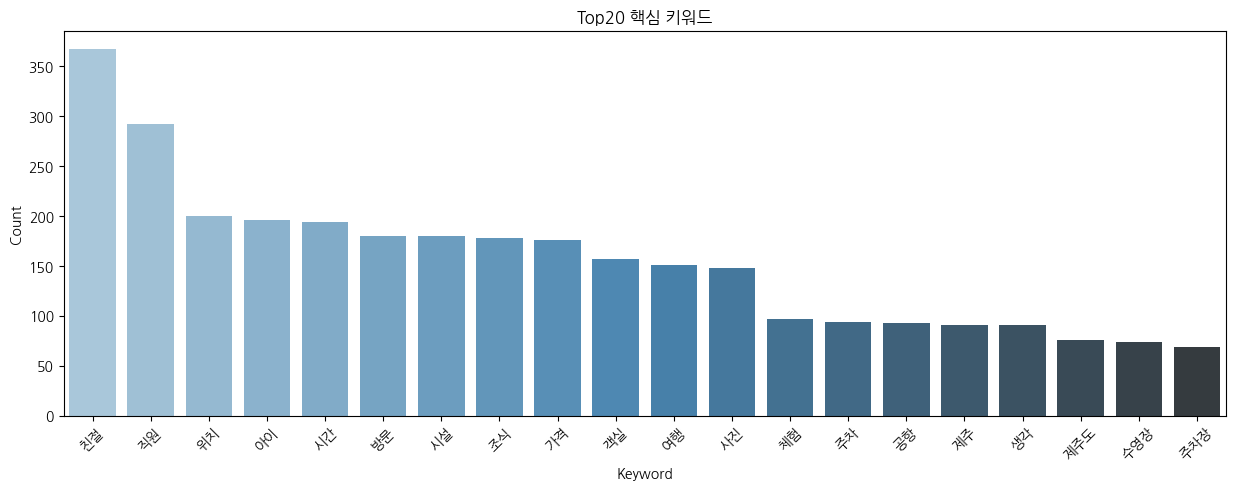

In [8]:
# 모든 핵심 키워드 추출
all_keywords = ','.join(sentiment['CORE_KWRD_CN'].dropna()).split(',')
keyword_counts = Counter(all_keywords)

# Top20 키워드 시각화
plt.figure(figsize=(15, 5))
top20 = pd.DataFrame(keyword_counts.most_common(20), columns=['Keyword', 'Count'])
sns.barplot(data=top20, x='Keyword', y='Count', palette='Blues_d')
plt.title('Top20 핵심 키워드')
plt.xticks(rotation=45)
plt.show()

### 2. 긍정/부정 분석

In [9]:
# 긍정/부정 키워드 비율
sentiment['positive_ratio'] = sentiment['AFRM_KWRD_CO'] / sentiment['CORE_KWRD_CO']
sentiment['negative_ratio'] = sentiment['NEGA_KWRD_CO'] / sentiment['CORE_KWRD_CO']

# 관광지별 긍정/부정 비율
top_positive = sentiment.nlargest(10, 'positive_ratio')[['TRRSRT_NM', 'positive_ratio', 'AFRM_KWRD_CN']].sort_values('positive_ratio', ascending=False)
print('\n=== 긍정 비율이 높은 관광지 Top10 ===')
print(top_positive)

top_negative = sentiment.nlargest(10, 'negative_ratio')[['TRRSRT_NM', 'negative_ratio', 'NEGA_KWRD_CN']].sort_values('negative_ratio', ascending=False)
print('\n=== 부정 비율이 높은 관광지 Top10 ===')
print(top_negative)


=== 긍정 비율이 높은 관광지 Top10 ===
         TRRSRT_NM  positive_ratio                    AFRM_KWRD_CN
255       WE 호텔 제주             1.0  수영장,편의점,친절,위치,조식,프로그램,진행,천원,힐링
301      더 그랜드 섬오름             1.0      수영장,사우나,시설,조식,수영,바다,산책,아이들
347    베스트웨스턴 제주호텔             1.0         공항,위치,객실,가격,시설,친절,교통,청결
353     브라운 스위트 제주             1.0       일출봉,위치,시설,객실,편의점,가격,친절,침구
420       아시아호텔 제주             1.0          친절,시설,시내,공항,가격,편의점,컨디션
447       와이리조트 제주             1.0     조식,위치,무료,시설,아침,편안,가족,청결,수영장
461  제주 골드원 호텔 스위트             1.0       수영장,온수,조식,여행,제주도,객실,바다,욕조
530        파밀리아 호텔             1.0       친절,접근성,조식,대포항,야간,택시,반대,잡기
533      파크 선샤인 제주             1.0           조식,침구,친절,위치,시설,청결,컨디션
534      파크 선샤인 제주             1.0           친절,침구,컨디션,시설,조식,객실,아침

=== 부정 비율이 높은 관광지 Top10 ===
                  TRRSRT_NM  negative_ratio                     NEGA_KWRD_CN
359                  비스타리조트        1.000000                               사진
384                   시드니호텔        1.000000        

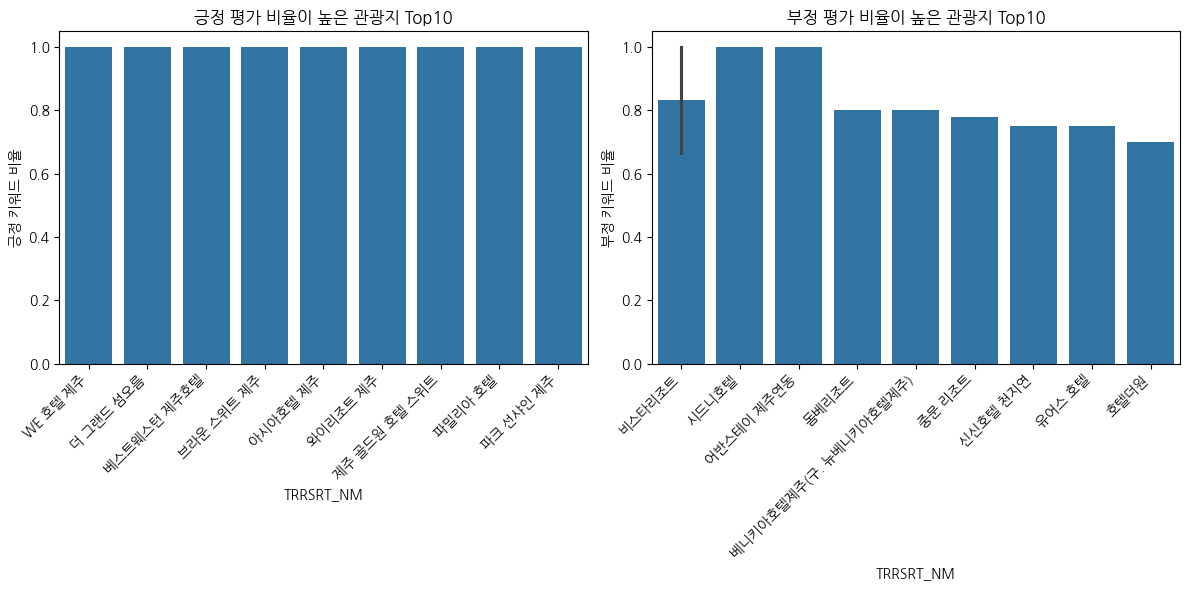

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_positive, x='TRRSRT_NM', y='positive_ratio')
plt.title('긍정 평가 비율이 높은 관광지 Top10')
plt.ylabel('긍정 키워드 비율')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(data=top_negative, x='TRRSRT_NM', y='negative_ratio')
plt.title('부정 평가 비율이 높은 관광지 Top10')
plt.ylabel('부정 키워드 비율')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [508]:
pip install wordcloud

python(25425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [519]:
font_list = [font.name for font in fm.fontManager.ttflist]
print("=== 사용 가능한 폰트 목록 ===")
for font in sorted(font_list):
    print(font)

=== 사용 가능한 폰트 목록 ===
.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple LiGothic
Apple LiSung
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
BIZ UDGothic
BIZ UDMincho
BM Dohyeon
BM Hanna 11yrs Old
BM Hanna Air
BM Hanna Pro
BM Jua
BM Kirang Haerang
BM Yeonsung
Baghdad
Bangla MN
Bangla Sangam MN
Baoli SC
Baskerville
Beirut
BiauKaiHK
Big Caslon
Bodoni 72
Bodoni 

In [11]:
print("\n=== 폰트 파일 경로 ===")
for font in fm.fontManager.ttflist:
    if 'Nanum Gothic' in font.name:  # 맑은 고딕 폰트 찾기
        print(f"폰트명: {font.name}")
        print(f"파일경로: {font.fname}")


=== 폰트 파일 경로 ===
폰트명: Nanum Gothic
파일경로: /System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc


Text(0.5, 1.0, '부정 키워드 분포')

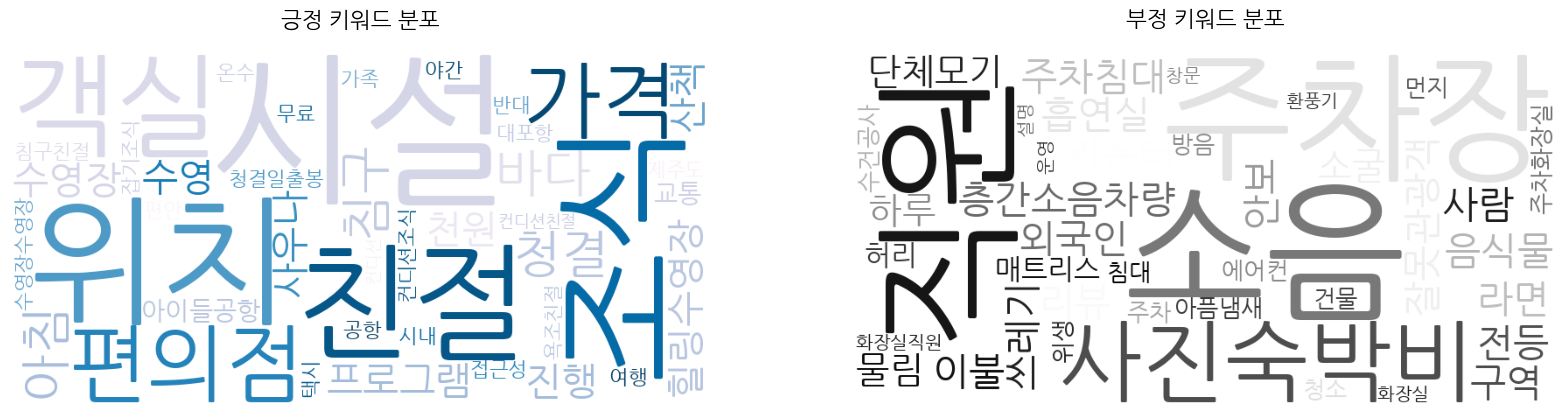

In [15]:
from wordcloud import WordCloud
from matplotlib import gridspec

# 1. 전체 시각화 설정
plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 2])

# 2. 긍정 워드클라우드
positive_words = ''.join([str(x) for x in top_positive['AFRM_KWRD_CN']])
wordcloud_pos = WordCloud(
    font_path='/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc',
    background_color='white',
    width=800,
    height=400,
    colormap='PuBu'
).generate(positive_words)

plt.subplot(gs[0, 0])
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title('긍정 키워드 분포', pad=20, size=16)

# 3. 부정 워드클라우드
negative_words = ''.join([str(x) for x in top_negative['NEGA_KWRD_CN']])
wordcloud_neg = WordCloud(
    font_path='/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc',
    background_color='white',
    width=800,
    height=400,
    colormap='gist_gray'
).generate(negative_words)

plt.subplot(gs[0, 1])
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title('부정 키워드 분포', pad=20, size=16)

### 3. 지역별 분석

In [533]:
sentiment.head()

CL_NM TRRSRT_NM              TRRSRT_ADDR ORIGIN_CL_NM  ANALS_BEGIN_DE  \
0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5        NAVER        20230101   
1  공연전시      빛의벙커  제주 서귀포시 성산읍 고성리 2039-22        NAVER        20230101   
2  공연전시  세계자동차박물관   제주 서귀포시 안덕면 중산간서로 1610        NAVER        20230101   
3  공연전시   수목원테마파크            제주 제주시 은수길 69        NAVER        20230101   
4  공연전시    아리랑공연장  제주 서귀포시 표선면 번영로 2564-21        NAVER        20230101   

   ANALS_END_DE  AVRG_SCORE_VALUE                       CORE_KWRD_CN  \
0      20230630                 0     파충류,아이,체험,고흐,사진,친절,정원,설명,그림,시간   
1      20230630                 0      작품,음악,그림,시간,전시,감상,벙커,관람,제주,아이   
2      20230630                 0   자동차,아이,피아노,체험,사슴,먹이,박물관,구경,시간,전시   
3      20230630                 0  아이,체험,썰매,얼음,수목원,테마파크,아이스,시간,사진,어른   
4      20230630                 0     공연,아이,태권도,관람,낙타,사진,만족,부모,한국,시간   

   CORE_KWRD_CO AFRM_KWRD_CN  AFRM_KWRD_CO NEGA_KWRD_CN  NEGA_KWRD_CO  \
0            10           친절             1          NaN             0   
1            10          NaN             0          NaN             0   
2            10          NaN             0          NaN             0   
3            10          NaN             0          NaN             0   
4            10           만족             1          NaN             0   

   positive_ration  negative_ration  positive_ratio  negative_ratio  
0              0.1              0.0             0.1             0.0  
1              0.0              0.0             0.0             0.0  
2              0.0              0.0             0.0             0.0  
3              0.0              0.0             0.0             0.0  
4              0.1              0.0             0.1             0.0

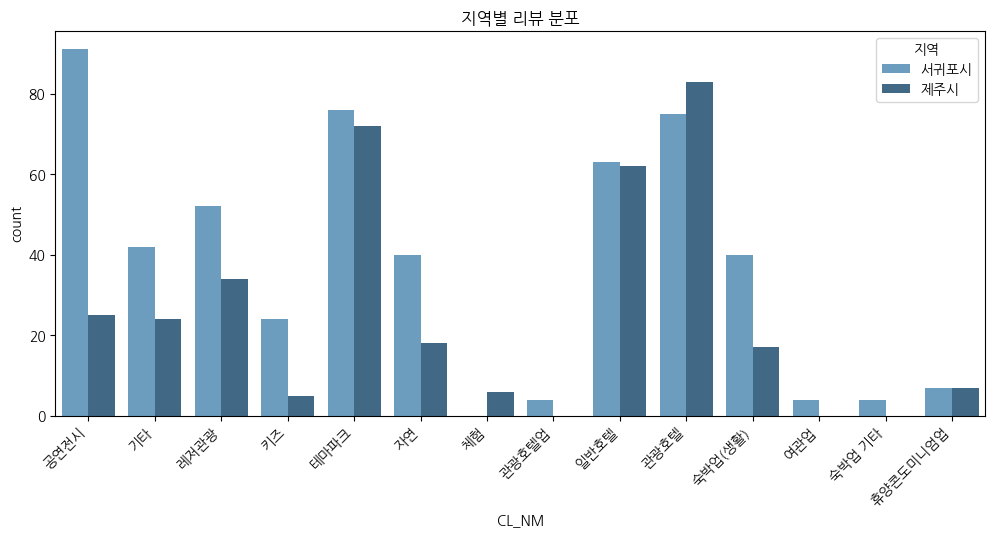

In [235]:
# 주소에서 지역 추출
sentiment['지역'] = sentiment['TRRSRT_ADDR'].apply(lambda x: '제주시' if '제주시' in x else '서귀포시')

# 지역별 관광지 분포
plt.figure(figsize=(12, 5))
sns.countplot(data=sentiment, x='CL_NM', hue='지역', palette='Blues_d')
plt.title('지역별 리뷰 분포')
plt.xticks(rotation=45, ha='right')
plt.show()

### 4. 관광지 유형별 특징

In [237]:
# 유형별 키워드 특성
type_keywords = {}
for type_name in df['CL_NM'].unique():
    keywords = ','.join(df[df['CL_NM'] == type_name]['CORE_KWRD_CN'].dropna()).split(',')
    type_keywords[type_name] = Counter(keywords).most_common(5)

print("\n=== 관광지 유형별 주요 키워드 ===")
for type_name, keywords in type_keywords.items():
    print(f"\n{type_name}:")
    print(keywords)


=== 관광지 유형별 주요 키워드 ===

공연전시:
[('아이', 31), ('시간', 28), ('방문', 22), ('사진', 16), ('체험', 15)]

기타:
[('가격', 10), ('친절', 9), ('방문', 8), ('제주', 8), ('카페', 8)]

레저관광:
[('시간', 20), ('친절', 19), ('아이', 14), ('방문', 12), ('직원', 11)]

키즈:
[('아이', 14), ('시간', 8), ('방문', 4), ('공연', 4), ('제주도', 4)]

테마파크:
[('방문', 38), ('시간', 34), ('아이', 31), ('사진', 26), ('생각', 19)]

자연:
[('방문', 17), ('시간', 13), ('산책', 11), ('코스', 9), ('사진', 9)]

체험:
[('동물', 3), ('먹이', 3), ('아이', 3), ('체험', 3), ('다양', 2)]


In [238]:
type_sentiment

{'공연전시': {'positive': [('친절', 22),
   ('추천', 15),
   ('기대', 7),
   ('느낌', 6),
   ('재미', 6)],
  'negative': [('최악', 3), ('문제', 2), ('실망', 2), ('충격', 1), ('폐지', 1)],
  'pos_count': 75,
  'neg_count': 9},
 '기타': {'positive': [('친절', 21), ('힐링', 6), ('추억', 5), ('느낌', 5), ('만족', 4)],
  'negative': [('피로', 7), ('위기', 2), ('고민', 1), ('강제', 1), ('부족', 1)],
  'pos_count': 54,
  'neg_count': 13},
 '레저관광': {'positive': [('친절', 40), ('추천', 9), ('추억', 5), ('재미', 4), ('만족', 2)],
  'negative': [('최악', 2), ('위험', 2), ('난리', 1), ('파괴', 1), ('부담', 1)],
  'pos_count': 65,
  'neg_count': 12},
 '키즈': {'positive': [('친절', 4), ('추천', 2), ('진정', 1), ('기대', 1), ('느낌', 1)],
  'negative': [('스트레스', 1), ('문제', 1)],
  'pos_count': 10,
  'neg_count': 2},
 '테마파크': {'positive': [('친절', 18),
   ('추천', 16),
   ('만족', 8),
   ('안전', 4),
   ('이해', 4)],
  'negative': [('피곤', 2), ('실망', 2), ('피로', 1), ('문제', 1), ('실수', 1)],
  'pos_count': 74,
  'neg_count': 10},
 '자연': {'positive': [('추천', 7), ('힐링', 6), ('치유', 4), ('신비', 2

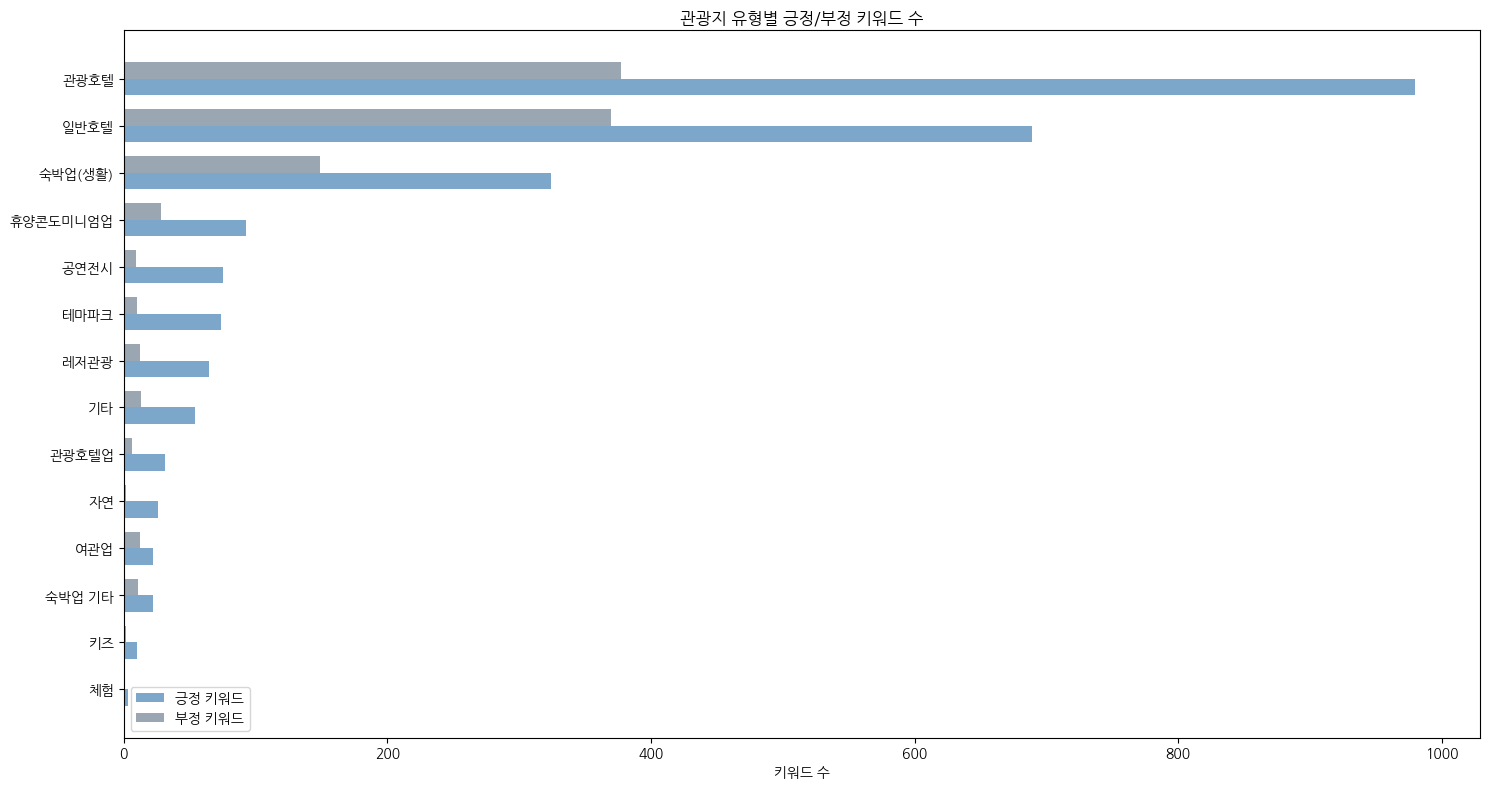


=== 관광지 유형별 주요 키워드 ===

[공연전시]
긍정 키워드 TOP 5:
- 친절: 22회
- 추천: 15회
- 기대: 7회
- 느낌: 6회
- 재미: 6회

부정 키워드 TOP 5:
- 최악: 3회
- 문제: 2회
- 실망: 2회
- 충격: 1회
- 폐지: 1회

총 긍정 키워드 수: 75
총 부정 키워드 수: 9
긍정/부정 비율: 89.3%

[기타]
긍정 키워드 TOP 5:
- 친절: 21회
- 힐링: 6회
- 추억: 5회
- 느낌: 5회
- 만족: 4회

부정 키워드 TOP 5:
- 피로: 7회
- 위기: 2회
- 고민: 1회
- 강제: 1회
- 부족: 1회

총 긍정 키워드 수: 54
총 부정 키워드 수: 13
긍정/부정 비율: 80.6%

[레저관광]
긍정 키워드 TOP 5:
- 친절: 40회
- 추천: 9회
- 추억: 5회
- 재미: 4회
- 만족: 2회

부정 키워드 TOP 5:
- 최악: 2회
- 위험: 2회
- 난리: 1회
- 파괴: 1회
- 부담: 1회

총 긍정 키워드 수: 65
총 부정 키워드 수: 12
긍정/부정 비율: 84.4%

[키즈]
긍정 키워드 TOP 5:
- 친절: 4회
- 추천: 2회
- 진정: 1회
- 기대: 1회
- 느낌: 1회

부정 키워드 TOP 5:
- 스트레스: 1회
- 문제: 1회

총 긍정 키워드 수: 10
총 부정 키워드 수: 2
긍정/부정 비율: 83.3%

[테마파크]
긍정 키워드 TOP 5:
- 친절: 18회
- 추천: 16회
- 만족: 8회
- 안전: 4회
- 이해: 4회

부정 키워드 TOP 5:
- 피곤: 2회
- 실망: 2회
- 피로: 1회
- 문제: 1회
- 실수: 1회

총 긍정 키워드 수: 74
총 부정 키워드 수: 10
긍정/부정 비율: 88.1%

[자연]
긍정 키워드 TOP 5:
- 추천: 7회
- 힐링: 6회
- 치유: 4회
- 신비: 2회
- 기대: 2회

부정 키워드 TOP 5:
- 스트레스: 1회
- 중독: 1회

총 긍정 키워드 수: 26
총 부정 키워드 수: 2
긍

In [121]:
# 유형별 긍정/부정 키워드 분석
type_sentiment = {}
for type_name in sentiment['CL_NM'].unique():
    type_data = sentiment[sentiment['CL_NM'] == type_name]
    
    # 긍정 키워드
    positive_keywords = ','.join(type_data['AFRM_KWRD_CN'].dropna()).split(',')
    positive_top = Counter(positive_keywords).most_common(5) if positive_keywords != [''] else []
    
    # 부정 키워드
    negative_keywords = ','.join(type_data['NEGA_KWRD_CN'].dropna()).split(',')
    negative_top = Counter(negative_keywords).most_common(5) if negative_keywords != [''] else []
    
    type_sentiment[type_name] = {
        'positive': positive_top,
        'negative': negative_top,
        'pos_count': len(positive_keywords) if positive_keywords != [''] else 0,
        'neg_count': len(negative_keywords) if negative_keywords != [''] else 0
    }

# 시각화
plt.figure(figsize=(15, 8))

# 유형별 긍정/부정 키워드 수 비교
types = list(type_sentiment.keys())
pos_counts = [type_sentiment[t]['pos_count'] for t in types]
neg_counts = [type_sentiment[t]['neg_count'] for t in types]

# 긍정 키워드 수 기준으로 정렬
sorted_indices = np.argsort(pos_counts)[::1]  # 내림차순 정렬
types = [types[i] for i in sorted_indices]
pos_counts = [pos_counts[i] for i in sorted_indices]
neg_counts = [neg_counts[i] for i in sorted_indices]

x = np.arange(len(types))
width = 0.35

plt.barh(x - width/2, pos_counts, width, label='긍정 키워드', color='steelblue', alpha=0.7)
plt.barh(x + width/2, neg_counts, width, label='부정 키워드', color='slategrey', alpha=0.7)

plt.yticks(x, types)
plt.xlabel('키워드 수')
plt.title('관광지 유형별 긍정/부정 키워드 수')
plt.legend()

plt.tight_layout()
plt.show()

# 상세 정보 출력
print("\n=== 관광지 유형별 주요 키워드 ===")
for type_name, data in type_sentiment.items():
    print(f"\n[{type_name}]")
    
    print("긍정 키워드 TOP 5:")
    if data['positive']:
        for keyword, count in data['positive']:
            print(f"- {keyword}: {count}회")
    else:
        print("(없음)")
        
    print("\n부정 키워드 TOP 5:")
    if data['negative']:
        for keyword, count in data['negative']:
            print(f"- {keyword}: {count}회")
    else:
        print("(없음)")
    
    print(f"\n총 긍정 키워드 수: {data['pos_count']}")
    print(f"총 부정 키워드 수: {data['neg_count']}")
    print(f"긍정/부정 비율: {data['pos_count']/(data['pos_count']+data['neg_count'])*100:.1f}%")

### 5. 리뷰 평점 분석

In [115]:
sentiment.loc[sentiment['AVRG_SCORE_VALUE'] != 0].head()

CL_NM TRRSRT_NM              TRRSRT_ADDR ORIGIN_CL_NM  ANALS_BEGIN_DE  \
88  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5        KAKAO        20230101   
89  공연전시      빛의벙커  제주 서귀포시 성산읍 고성리 2039-22        KAKAO        20230101   
90  공연전시  세계자동차박물관   제주 서귀포시 안덕면 중산간서로 1610        KAKAO        20230101   
91  공연전시   수목원테마파크            제주 제주시 은수길 69        KAKAO        20230101   
92  공연전시    아리랑공연장  제주 서귀포시 표선면 번영로 2564-21        KAKAO        20230101   

    ANALS_END_DE  AVRG_SCORE_VALUE                         CORE_KWRD_CN  \
88      20230630               100  친절,사진,고흐,너어무,직원,입장권,주차장,네이버,구매,취향저격   
89      20230630                77       작품,느낌,음악,바닥,감상,예술,입장료,생각,사진,시간   
90      20230630                86                 자동차,전시,피아노,사슴,전시장,아이   
91      20230630                45   얼음,썰매,야시장,초등학생,학년,이상,따숩게,어른,볼거리,진심   
92      20230630                60              단체,추천,정도,관람객,대부분,관광객,코스   

    CORE_KWRD_CO AFRM_KWRD_CN  AFRM_KWRD_CO NEGA_KWRD_CN  NEGA_KWRD_CO  
88            10           친절             1          NaN             0  
89            10           느낌             1          NaN             0  
90             6          NaN             0          NaN             0  
91            10           진심             1          NaN             0  
92             7           추천             1          NaN             0

In [116]:
# 평점 분포 확인
sentiment['AVRG_SCORE_VALUE'].describe()

count    875.000000
mean      66.972571
std       35.432298
min        0.000000
25%       60.500000
50%       83.000000
75%       90.000000
max      100.000000
Name: AVRG_SCORE_VALUE, dtype: float64

In [117]:
# AVRG_SCORE_VALUE = 0 다수 있음
sentiment.loc[sentiment['AVRG_SCORE_VALUE'] == 0].head()

CL_NM TRRSRT_NM              TRRSRT_ADDR ORIGIN_CL_NM  ANALS_BEGIN_DE  \
0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5        NAVER        20230101   
1  공연전시      빛의벙커  제주 서귀포시 성산읍 고성리 2039-22        NAVER        20230101   
2  공연전시  세계자동차박물관   제주 서귀포시 안덕면 중산간서로 1610        NAVER        20230101   
3  공연전시   수목원테마파크            제주 제주시 은수길 69        NAVER        20230101   
4  공연전시    아리랑공연장  제주 서귀포시 표선면 번영로 2564-21        NAVER        20230101   

   ANALS_END_DE  AVRG_SCORE_VALUE                       CORE_KWRD_CN  \
0      20230630                 0     파충류,아이,체험,고흐,사진,친절,정원,설명,그림,시간   
1      20230630                 0      작품,음악,그림,시간,전시,감상,벙커,관람,제주,아이   
2      20230630                 0   자동차,아이,피아노,체험,사슴,먹이,박물관,구경,시간,전시   
3      20230630                 0  아이,체험,썰매,얼음,수목원,테마파크,아이스,시간,사진,어른   
4      20230630                 0     공연,아이,태권도,관람,낙타,사진,만족,부모,한국,시간   

   CORE_KWRD_CO AFRM_KWRD_CN  AFRM_KWRD_CO NEGA_KWRD_CN  NEGA_KWRD_CO  
0            10           친절             1          NaN             0  
1            10          NaN             0          NaN             0  
2            10          NaN             0          NaN             0  
3            10          NaN             0          NaN             0  
4            10           만족             1          NaN             0

In [118]:
# 1. 기본 통계 분석
# 업종별(CL_NM) 평균 평점 -> 이상치 제외

avg_score_by_type = sentiment[sentiment['AVRG_SCORE_VALUE']>0].groupby('CL_NM')['AVRG_SCORE_VALUE'].agg(['mean', 'count', 'std']).round(2)
print('n===업종별 평균 평점===')
print(avg_score_by_type.sort_values('mean', ascending=False))

n===업종별 평균 평점===
           mean  count    std
CL_NM                        
휴양콘도미니엄업  91.00     14   6.45
관광호텔업     90.50      4   7.59
관광호텔      88.91    158   8.46
자연        88.87     39   5.63
여관업       87.25      4   5.12
숙박업(생활)   86.98     57  10.42
숙박업 기타    84.75      4   6.18
일반호텔      84.62    125   8.55
키즈        81.74     19  10.33
기타        81.05     44  11.03
테마파크      79.41     98  14.70
공연전시      78.69     74  14.49
레저관광      77.11     55  20.24
체험        65.50      4   9.11


/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_76672/1407179007.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sentiment_filtered, x='CL_NM', y='AVRG_SCORE_VALUE', palette='PuBu')


ValueError: Could not interpret value `지역` for `x`. An entry with this name does not appear in `data`.

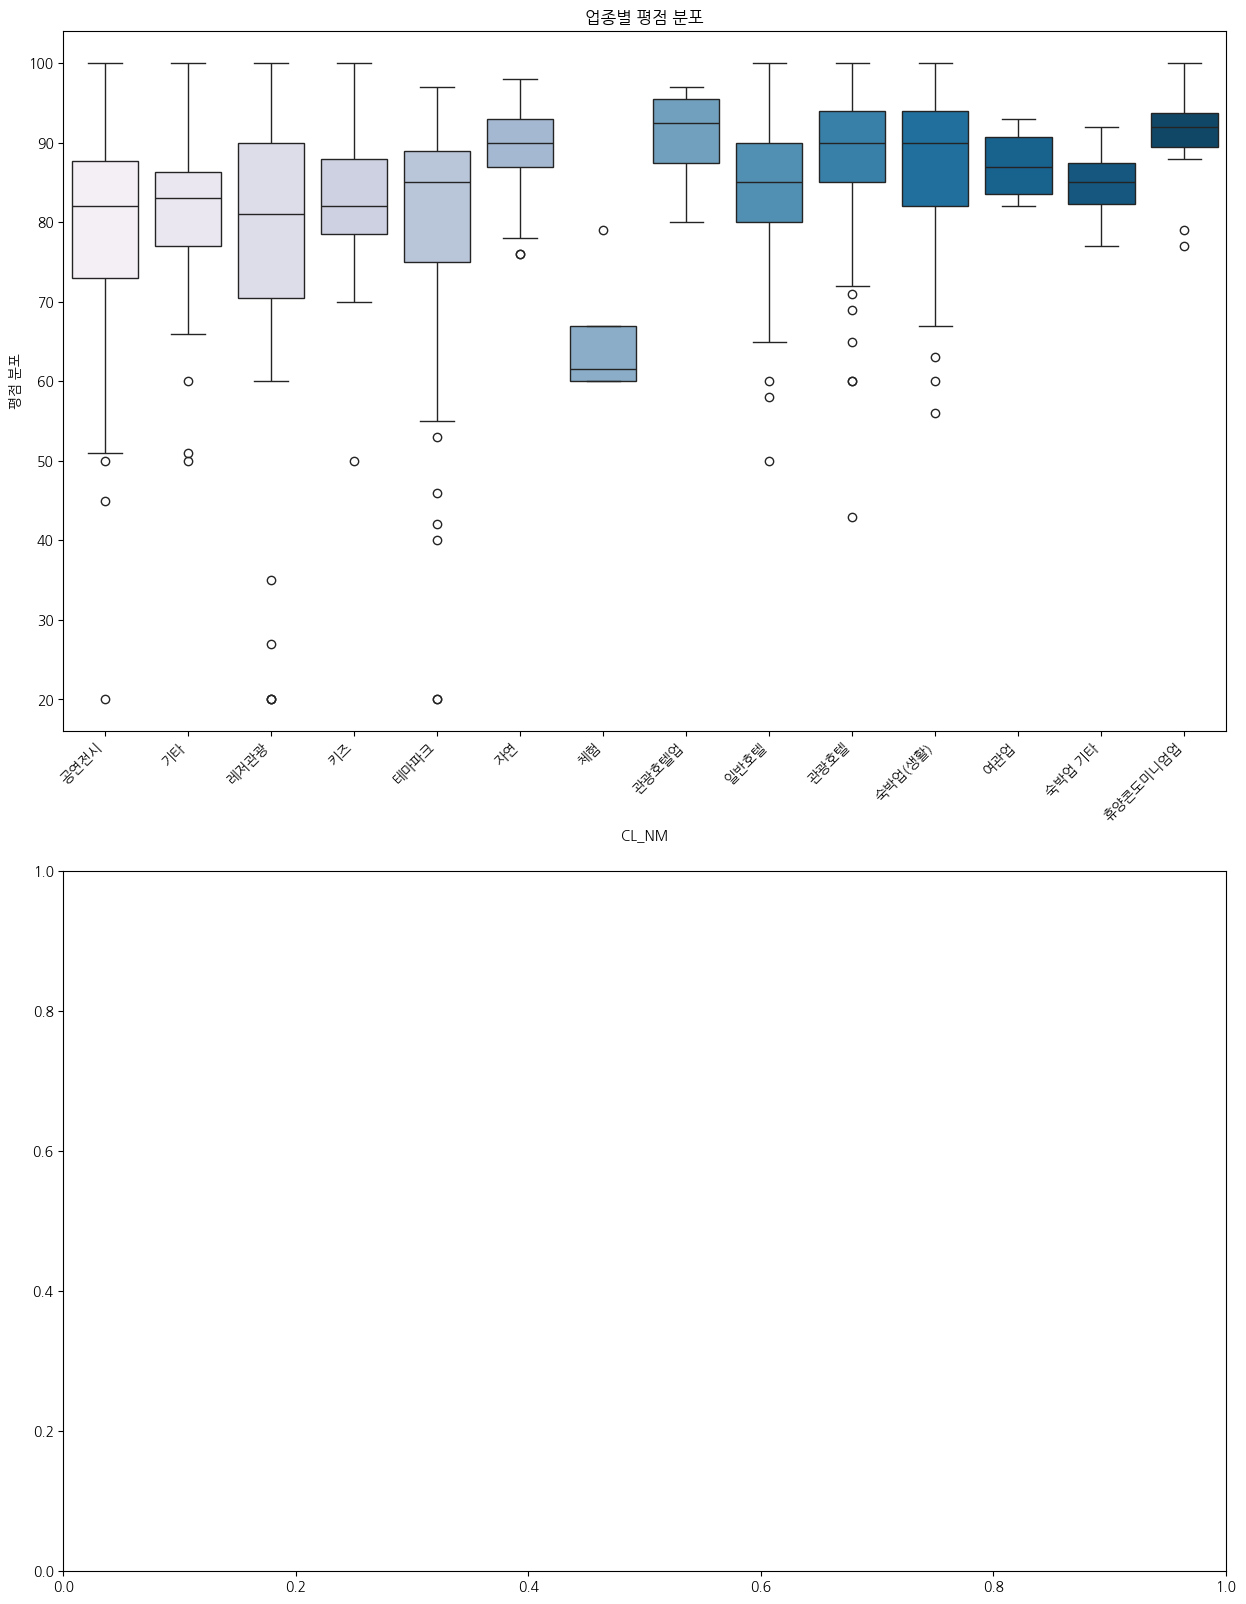

In [120]:
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Nanum Gothic')
plt.rcParams['axes.unicode_minus']=False # 마이너스 기호 깨짐 방지

sentiment_filtered = sentiment[sentiment['AVRG_SCORE_VALUE'] > 0]

# 2. 평점 분포 시각화
plt.figure(figsize=(15, 20))

# 업종별 평점 분포 (boxplot)
plt.subplot(2, 1, 1)
sns.boxplot(data=sentiment_filtered, x='CL_NM', y='AVRG_SCORE_VALUE', palette='PuBu')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평점 분포')
plt.title('업종별 평점 분포')

# 지역별 평점 분포
plt.subplot(2, 1, 2)
sns.boxplot(data=sentiment_filtered, x='지역', y='AVRG_SCORE_VALUE', hue='CL_NM')
plt.xticks(rotation=45, ha='right')  
plt.ylabel('평점 분포')
plt.title('지역별/업종별 평점 분포')

plt.tight_layout()
plt.show()


In [62]:
# 3. 상위/하위 업체 분석
print('\n===평점 상위 10개 업체===')
top_10_sent = sentiment.nlargest(10, 'AVRG_SCORE_VALUE')[['CL_NM', 'TRRSRT_NM', 'AVRG_SCORE_VALUE', 'CORE_KWRD_CN']]
print(top_10_sent)

print('\n===평점 하위 10개 업체===')
bottom_10_sent = sentiment.nsmallest(10, 'AVRG_SCORE_VALUE')[['CL_NM', 'TRRSRT_NM', 'AVRG_SCORE_VALUE', 'CORE_KWRD_CN']]
print(bottom_10_sent)



===평점 상위 10개 업체===
       CL_NM  TRRSRT_NM  AVRG_SCORE_VALUE                         CORE_KWRD_CN
88      공연전시     고흐의 정원               100  친절,사진,고흐,너어무,직원,입장권,주차장,네이버,구매,취향저격
98      공연전시       제주난타               100     공연,관람,종합,전용,극장,시간,코로나,보세,남자,고등학생
106     레저관광       제주제트               100        전화,예약,경험,오후,당일,인원,출항,시간,직원,친절
129     레저관광   마라도가는여객선               100    이용,마라도,송악산,여객선,시간,바다,마지막,최고,편성,근처
134     공연전시      감귤박물관               100        감귤,피자,기대,체험,공사,온실,무료,개방,최고,경험
140       기타  망고레이섭지코지점               100       망고,애플,빙수,마진,얼음,가격,양도,필리핀,영업,친절
144     레저관광  중문오프로드체험장               100                    친절,코스,일행,강사,감사,추억
145     레저관광       중문카트               100                코너,이니셜,빙의,본인,운전면허,소지자
163       기타     제주그림카페               100     커피,기대,박물관,이색,이상,분위기,신비,사진,사장,서비스
308  숙박업(생활)      돔베리조트               100                                    0

===평점 하위 10개 업체===
  CL_NM      TRRSRT_NM  AVRG_SCORE_VALUE                       CORE_KWRD_CN
0  공연전시        

In [63]:
# 4. 평점과 키워드 관계 분석
def analyze_keywords_by_score(sentiment, score_threshold=80):
    high_score = sentiment[sentiment['AVRG_SCORE_VALUE'] >= score_threshold]
    low_score = sentiment[sentiment['AVRG_SCORE_VALUE'] < score_threshold]

    # 높은 평점의 주요 키워드
    high_keywords = high_score['CORE_KWRD_CN'].dropna().str.split(',').sum()
    high_top = Counter(high_keywords).most_common(10)

    low_keywords = low_score['CORE_KWRD_CN'].dropna().str.split(',').sum()
    low_top = Counter(low_keywords).most_common(10)

    return high_top, low_top


high_keywords, low_keywords = analyze_keywords_by_score(sentiment)

print('\n=== 높은 평점(80점 이상) 업체의 주요 키워드 ===')
for keyword, count in high_keywords:
    print(f'- {keyword}: {count}회')

print('\n=== 낮은 평점(80점 미만) 업체의 주요 키워드 ===')
for keyword, count in low_keywords:
    print(f'- {keyword}: {count}회')


=== 높은 평점(80점 이상) 업체의 주요 키워드 ===
- 친절: 268회
- 직원: 226회
- 위치: 170회
- 조식: 158회
- 시설: 154회
- 객실: 139회
- 가격: 136회
- 여행: 116회
- 방문: 84회
- 공항: 82회

=== 낮은 평점(80점 미만) 업체의 주요 키워드 ===
- 아이: 124회
- 시간: 119회
- 친절: 99회
- 사진: 98회
- 방문: 96회
- 체험: 72회
- 직원: 66회
- 생각: 57회
- 제주: 47회
- 구경: 43회


In [64]:
high_keywords

[('친절', 268),
 ('직원', 226),
 ('위치', 170),
 ('조식', 158),
 ('시설', 154),
 ('객실', 139),
 ('가격', 136),
 ('여행', 116),
 ('방문', 84),
 ('공항', 82)]

<function matplotlib.pyplot.show(close=None, block=None)>

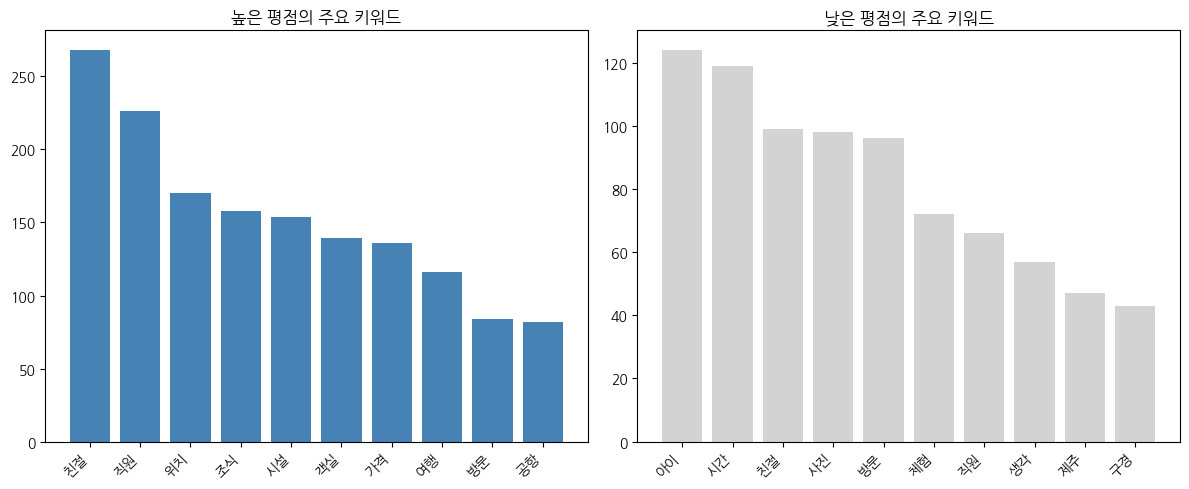

In [70]:
# 시각화

plt.figure(figsize=(12, 5))

# 높은 평점 키워드
plt.subplot(1, 2, 1)
keywords, counts = zip(*high_keywords)
plt.bar(keywords, counts, color='steelblue')
plt.title('높은 평점의 주요 키워드')
plt.xticks(rotation=45, ha='right')

# 낮은 평점 키워드
plt.subplot(1, 2, 2)
keywords, counts = zip(*low_keywords)
plt.bar(keywords, counts, color='lightgrey')
plt.title('낮은 평점의 주요 키워드')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show

In [71]:
# 5. 개선이 필요한 업종/지역 도출
improvement_needed = sentiment[
    (sentiment['AVRG_SCORE_VALUE']>0) &
    (sentiment['AVRG_SCORE_VALUE']< sentiment_filtered['AVRG_SCORE_VALUE'].mean())]

print("\n=== 개선이 필요한 업종별 업체 수 ===")
improvement_by_type = improvement_needed.groupby('CL_NM').agg({
    'TRRSRT_NM': 'count',
    'AVRG_SCORE_VALUE': 'mean'
}).round(1)

improvement_by_type.columns = ['업체 수', '평균 점수']
improvement_by_type = improvement_by_type.sort_values('업체 수', ascending=False)
print(improvement_by_type)


=== 개선이 필요한 업종별 업체 수 ===
          업체 수  평균 점수
CL_NM                
테마파크        47   68.9
일반호텔        44   75.8
공연전시        42   69.9
레저관광        33   66.6
관광호텔        31   76.0
기타          25   74.5
숙박업(생활)     18   74.4
키즈          10   75.1
자연           7   79.1
체험           4   65.5
휴양콘도미니엄업     2   78.0
관광호텔업        1   80.0
숙박업 기타       1   77.0
여관업          1   82.0


/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_76672/2721870426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


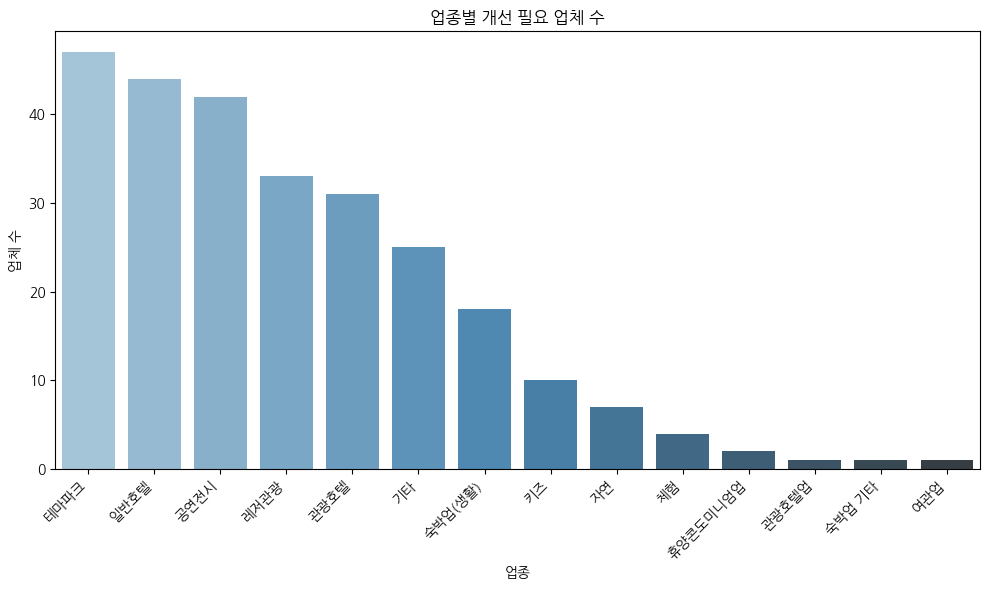

In [74]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    data=improvement_by_type, x='CL_NM', y='업체 수', palette='Blues_d')
plt.title('업종별 개선 필요 업체 수')
plt.xlabel('업종')
plt.ylabel('업체 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 평점리뷰 형태소 분석

In [39]:
mop_path=Path('../data/raw/제주 관광지 평점리뷰 형태소 데이터')
mop = sorted(mop_path.glob('JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_2023*.csv'))

In [40]:
dfs = []
for file in mop:
    try: 
        df = pd.read_csv(file, encoding='utf-8')
        dfs.append(df)
        print(f"Loaded: {file.name}")
    except Exception as e:
        print(f"Error loading {file.name}: {e}")

mop = pd.concat(dfs, ignore_index=True)

print("\n=== 평점리뷰 감성분석 데이터 정보 ===")
print(f"전체 행 수: {len(mop)}")
print("\n처음 5행:")
print(mop.head())

Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202301.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202302.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202303.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202304.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202305.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202306.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202307.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202308.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202309.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202310.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202311.csv
Loaded: JT_PORTAL_SITE_AVRG_SCORE_REVIEW_MOP_INFO_202312.csv

=== 평점리뷰 감성분석 데이터 정보 ===
전체 행 수: 843231

처음 5행:
    BASE_YM CL_NM TRRSRT_NM              TRRSRT_ADDR  SCORE_VALUE  \
0  202301.0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
1  202301.0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
2  202301.0 

In [842]:
mop.to_csv('../data/raw/제주 관광지 평점리뷰 형태소 데이터/combined_mop.csv', index=False)

In [46]:
mop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843231 entries, 0 to 843230
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BASE_YM      839326 non-null  float64
 1   CL_NM        843198 non-null  object 
 2   TRRSRT_NM    843231 non-null  object 
 3   TRRSRT_ADDR  843231 non-null  object 
 4   SCORE_VALUE  843231 non-null  float64
 5   MOP_CN       836482 non-null  object 
 6   REGIST_DE    843231 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 45.0+ MB


In [54]:
mop.isna().sum()

BASE_YM        3905
CL_NM            33
TRRSRT_NM         0
TRRSRT_ADDR       0
SCORE_VALUE       0
MOP_CN         6749
REGIST_DE         0
dtype: int64

In [681]:
mop.describe()

BASE_YM    SCORE_VALUE     REGIST_DE
count  839326.000000  843231.000000  8.432310e+05
mean   202304.298865       3.164246  2.023045e+07
std         1.767334      16.531824  1.792612e+02
min    202301.000000       0.000000  2.023010e+07
25%    202303.000000       0.000000  2.023032e+07
50%    202304.000000       0.000000  2.023043e+07
75%    202306.000000       0.000000  2.023060e+07
max    202312.000000     100.000000  2.023123e+07

In [682]:
mop.head()

BASE_YM CL_NM TRRSRT_NM              TRRSRT_ADDR  SCORE_VALUE  \
0  202301.0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
1  202301.0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
2  202301.0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
3  202301.0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
4  202301.0  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   

               MOP_CN  REGIST_DE  
0              볼거리,다양   20230130  
1                  친구   20230130  
2                 관람객   20230130  
3  파충류,아이,도마뱀,고흐,트릭아트   20230130  
4               사진,아이   20230130

### 1. EDA

In [684]:
# 시간 데이터 전처리
mop['BASE_YM'] = pd.to_datetime(mop['BASE_YM'], format='%Y%m')
mop['REGIST_DE'] = pd.to_datetime(mop['REGIST_DE'], format='%Y%m%d')

# 지역 정보(서귀포시/제주시)
mop['지역'] = mop['TRRSRT_ADDR'].str.split(' ').str[1]

print(mop.head())

     BASE_YM CL_NM TRRSRT_NM              TRRSRT_ADDR  SCORE_VALUE  \
0 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
1 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
2 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
3 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
4 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   

               MOP_CN  REGIST_DE    지역  
0              볼거리,다양 2023-01-30  서귀포시  
1                  친구 2023-01-30  서귀포시  
2                 관람객 2023-01-30  서귀포시  
3  파충류,아이,도마뱀,고흐,트릭아트 2023-01-30  서귀포시  
4               사진,아이 2023-01-30  서귀포시  


In [685]:
mop.tail()

BASE_YM CL_NM        TRRSRT_NM           TRRSRT_ADDR  SCORE_VALUE  \
843226 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625          7.5   
843227 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625         10.0   
843228 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625          5.8   
843229 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625         10.0   
843230 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625          8.4   

                   MOP_CN  REGIST_DE    지역  
843226       수영장,여행,가격,도면 2023-12-27  서귀포시  
843227                 새싹 2023-12-28  서귀포시  
843228    금고,수영장,직원,깔끔,소음 2023-12-29  서귀포시  
843229   수영장,청결,저렴,가격,편의점 2023-12-30  서귀포시  
843230  가격,위생,화장실,머리카락,조명 2023-12-31  서귀포시

In [ ]:
mop['MONTH'] = mop['REGIST_DE']

### 2. 시계열 분석

In [688]:
# 월별 평균 평점 추이
monthly_scores = (mop.groupby(mop['BASE_YM'].dt.strftime('%Y-%m'))['SCORE_VALUE'].agg(['mean', 'count']).round(2))
monthly_scores

mean   count
BASE_YM               
2023-01   6.87   33263
2023-02   2.09  118511
2023-03   1.85  133141
2023-04   1.35  157041
2023-05   1.37  180661
2023-06   1.41  155710
2023-07   5.59   45416
2023-08  79.36    3751
2023-09  65.22    1248
2023-10  23.28    5453
2023-11  36.35    2542
2023-12  29.61    2589

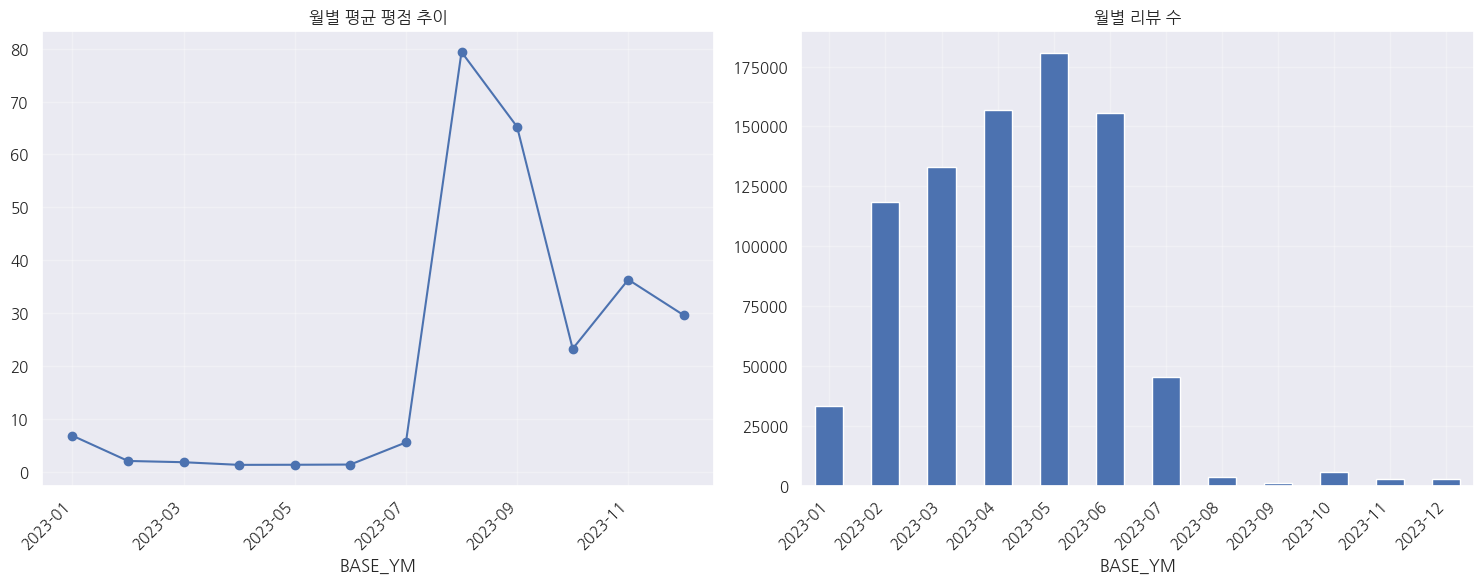

In [689]:
plt.figure(figsize=(15, 6))

# 평균 평점 추이
plt.subplot(1, 2, 1)
monthly_scores['mean'].plot(kind='line', marker='o')
plt.title('월별 평균 평점 추이')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# 리뷰 수 추이
plt.subplot(1, 2, 2)
monthly_scores['count'].plot(kind='bar')
plt.title('월별 리뷰 수')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3. 업종별 상세 분석

In [712]:
mop.tail()

BASE_YM CL_NM        TRRSRT_NM           TRRSRT_ADDR  SCORE_VALUE  \
843226 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625          7.5   
843227 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625         10.0   
843228 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625          5.8   
843229 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625         10.0   
843230 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처  제주특별자치도 서귀포시 상예동 625          8.4   

                   MOP_CN  REGIST_DE    지역  
843226       수영장,여행,가격,도면 2023-12-27  서귀포시  
843227                 새싹 2023-12-28  서귀포시  
843228    금고,수영장,직원,깔끔,소음 2023-12-29  서귀포시  
843229   수영장,청결,저렴,가격,편의점 2023-12-30  서귀포시  
843230  가격,위생,화장실,머리카락,조명 2023-12-31  서귀포시

In [721]:
cl_scores = mop.groupby('CL_NM')['SCORE_VALUE'].agg(['mean', 'count']).round(2).sort_values(by='mean', ascending=False).index
cl_scores

Index(['숙박업 기타', '미분류', '휴양콘도미니엄업', '관광호텔', '관광호텔업', '숙박업(생활)', '일반호텔', '여관업',
       '자연', '체험', '레저관광', '공연전시', '테마파크', '기타', '키즈'],
      dtype='object', name='CL_NM')

In [727]:
# 업종별 평점 분포

cl_stats = mop.groupby('CL_NM').agg({'SCORE_VALUE': ['mean', 'count']}).round(2)
cl_stats.columns = ['평균', '리뷰수']
cl_stats = cl_stats.sort_values('평균', ascending=False)

cl_stats

평균     리뷰수
CL_NM                  
숙박업 기타    82.28      25
미분류       81.92     125
휴양콘도미니엄업  81.80     906
관광호텔      81.21    8965
관광호텔업     79.97     218
숙박업(생활)   79.63    2122
일반호텔      76.33    6992
여관업       72.52     159
자연         9.10   31232
체험         3.83     381
레저관광       1.95   92337
공연전시       1.19  142856
테마파크       0.97  326992
기타         0.93  123921
키즈         0.49  105967

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_59944/2995571822.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


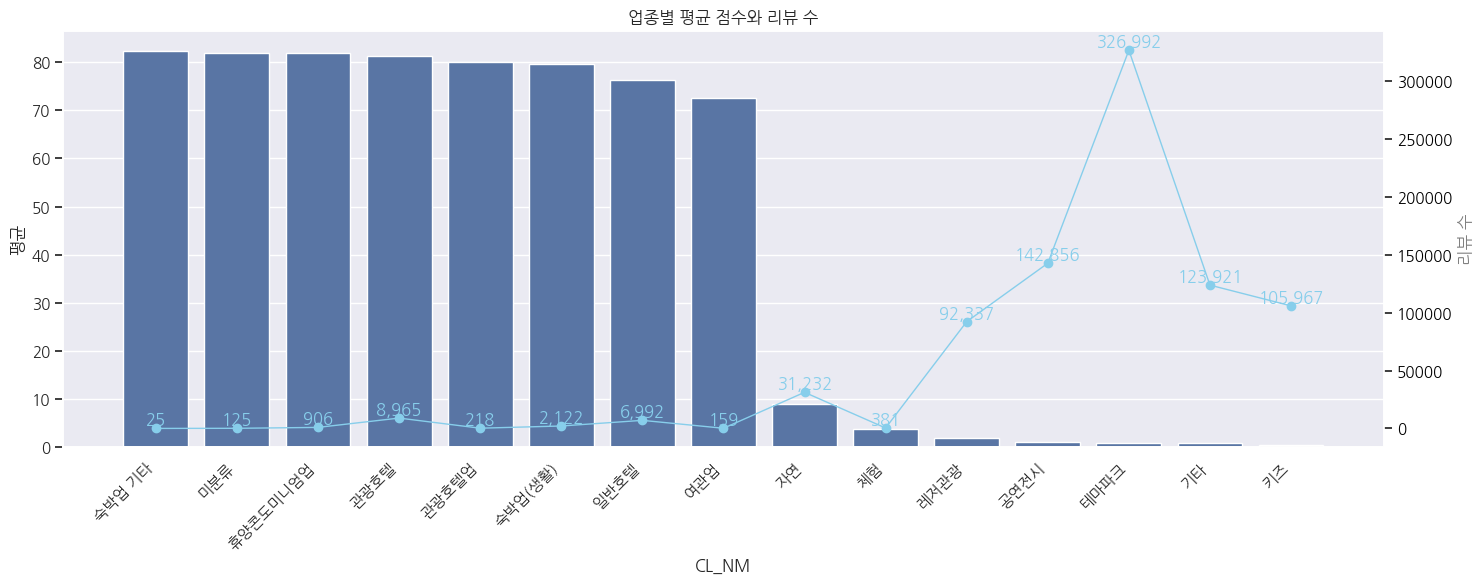

In [747]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# 바차트 (평균 점수)
sns.barplot(x=cl_stats.index, y='평균', data=cl_stats, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 그리드 제거
ax2.grid(False)

# 선그래프(리뷰 수)
ax2.plot(cl_stats.index, cl_stats['리뷰수'], color='skyblue', marker='o', linewidth=1)
ax2.set_ylabel('리뷰 수', color='grey')
ax2.tick_params(axis='y', labelcolor='black')

for i, v in enumerate(cl_stats['리뷰수']):
    ax2.text(i, v, f'{int(v):,}', ha='center', va='bottom', color='skyblue')

plt.title('업종별 평균 점수와 리뷰 수')
plt.tight_layout()
plt.show()

### 4. 평점 구간별 형태소 분석

In [757]:
mop.head()

BASE_YM CL_NM TRRSRT_NM              TRRSRT_ADDR  SCORE_VALUE  \
0 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
1 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
2 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
3 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   
4 2023-01-01  공연전시    고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5          0.0   

               MOP_CN  REGIST_DE    지역  
0              볼거리,다양 2023-01-30  서귀포시  
1                  친구 2023-01-30  서귀포시  
2                 관람객 2023-01-30  서귀포시  
3  파충류,아이,도마뱀,고흐,트릭아트 2023-01-30  서귀포시  
4               사진,아이 2023-01-30  서귀포시

In [798]:
# 평점 구간별 형태소 분석

bins_mop = mop.groupby('TRRSRT_NM')['SCORE_VALUE'].agg(['mean', 'count'])
bins_mop

mean  count
TRRSRT_NM                        
WE 호텔 제주         79.966055    218
감귤박물관            48.000000    155
건강과성박물관           2.526169   1433
걸리버여행기            3.529412    425
고스트타운            22.184874    119
...                    ...    ...
화조원               1.226186  11548
훈데르트바서파크          0.589474   4275
휘닉스 섭지코지         80.917600    250
휘슬락              76.664220    327
히든 클리프 호텔 앤 네이처  84.564069    231

[193 rows x 2 columns]

In [765]:
bins_mop['점수구간'] = pd.cut(bins_mop['mean'],
                     bins=[0, 20, 40, 60, 80, 100],
                     labels=['매우낮음', '낮음', '보통', '높음', '매우높음'])

bins_mop

mean  count  점수구간
TRRSRT_NM                              
WE 호텔 제주         79.966055    218    높음
감귤박물관            48.000000    155    보통
건강과성박물관           2.526169   1433  매우낮음
걸리버여행기            3.529412    425  매우낮음
고스트타운            22.184874    119    낮음
...                    ...    ...   ...
화조원               1.226186  11548  매우낮음
훈데르트바서파크          0.589474   4275  매우낮음
휘닉스 섭지코지         80.917600    250  매우높음
휘슬락              76.664220    327    높음
히든 클리프 호텔 앤 네이처  84.564069    231  매우높음

[193 rows x 3 columns]

In [802]:
mop_score_not_zero = mop.loc[mop['SCORE_VALUE'] != 0.0]
mop_score_not_zero

BASE_YM CL_NM        TRRSRT_NM              TRRSRT_ADDR  \
30641  2023-01-01  공연전시           고흐의 정원  제주 서귀포시 성산읍 삼달신풍로 126-5   
30642  2023-01-01  공연전시             빛의벙커  제주 서귀포시 성산읍 고성리 2039-22   
30643  2023-01-01  공연전시             빛의벙커  제주 서귀포시 성산읍 고성리 2039-22   
30644  2023-01-01  공연전시             빛의벙커  제주 서귀포시 성산읍 고성리 2039-22   
30645  2023-01-01  공연전시             빛의벙커  제주 서귀포시 성산읍 고성리 2039-22   
...           ...   ...              ...                      ...   
843226 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처     제주특별자치도 서귀포시 상예동 625   
843227 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처     제주특별자치도 서귀포시 상예동 625   
843228 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처     제주특별자치도 서귀포시 상예동 625   
843229 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처     제주특별자치도 서귀포시 상예동 625   
843230 2023-12-01  관광호텔  히든 클리프 호텔 앤 네이처     제주특별자치도 서귀포시 상예동 625   

        SCORE_VALUE             MOP_CN  REGIST_DE    지역  점수구간  
30641         100.0   파충류,할머니,실내,조명,장소 2023-01-26  서귀포시  매우높음  
30642         100.0           체험,제주,벙커 2023-01-25  서귀포시  매우높음  
30643          20.0          낭비,입장료,시간 2023-01-23  서귀포시  매우낮음  
30644          20.0    준비,바닥,어르신,작품,시각 2023-01-20  서귀포시  매우낮음  
30645         100.0    사진,동영상,생각,전시,그림 2023-01-20  서귀포시  매우높음  
...             ...                ...        ...   ...   ...  
843226          7.5       수영장,여행,가격,도면 2023-12-27  서귀포시  매우낮음  
843227         10.0                 새싹 2023-12-28  서귀포시  매우낮음  
843228          5.8    금고,수영장,직원,깔끔,소음 2023-12-29  서귀포시  매우낮음  
843229         10.0   수영장,청결,저렴,가격,편의점 2023-12-30  서귀포시  매우낮음  
843230          8.4  가격,위생,화장실,머리카락,조명 2023-12-31  서귀포시  매우낮음  

[32578 rows x 9 columns]

In [807]:
# 20점 미만 관광지와 80점 이상 관광지 필터링
low_score_places = mop_score_not_zero[mop_score_not_zero['SCORE_VALUE'] < 20]
high_score_places = mop_score_not_zero[mop_score_not_zero['SCORE_VALUE'] >= 80]

# 각 그룹의 관광지 수 확인
print(f"20점 미만 관광지 수: {low_score_places['TRRSRT_NM'].nunique()}")
print(f"80점 이상 관광지 수: {high_score_places['TRRSRT_NM'].nunique()}")

# 각 그룹의 리뷰 수 확인
print(f"20점 미만 리뷰 수: {len(low_score_places)}")
print(f"80점 이상 리뷰 수: {len(high_score_places)}")

20점 미만 관광지 수: 99
80점 이상 관광지 수: 192
20점 미만 리뷰 수: 1885
80점 이상 리뷰 수: 24717


In [812]:
# 형태소 분석 함수
def analyze_morphemes(data, column='MOP_CN', split_char=','):
    words = []
    for text in data[column].dropna():
        if isinstance(text, str):
            words.extend(text.split(split_char))
    return Counter(words)

# 두 그룹의 형태소 분석
low_score_words = analyze_morphemes(low_score_places)
high_score_words = analyze_morphemes(high_score_places)


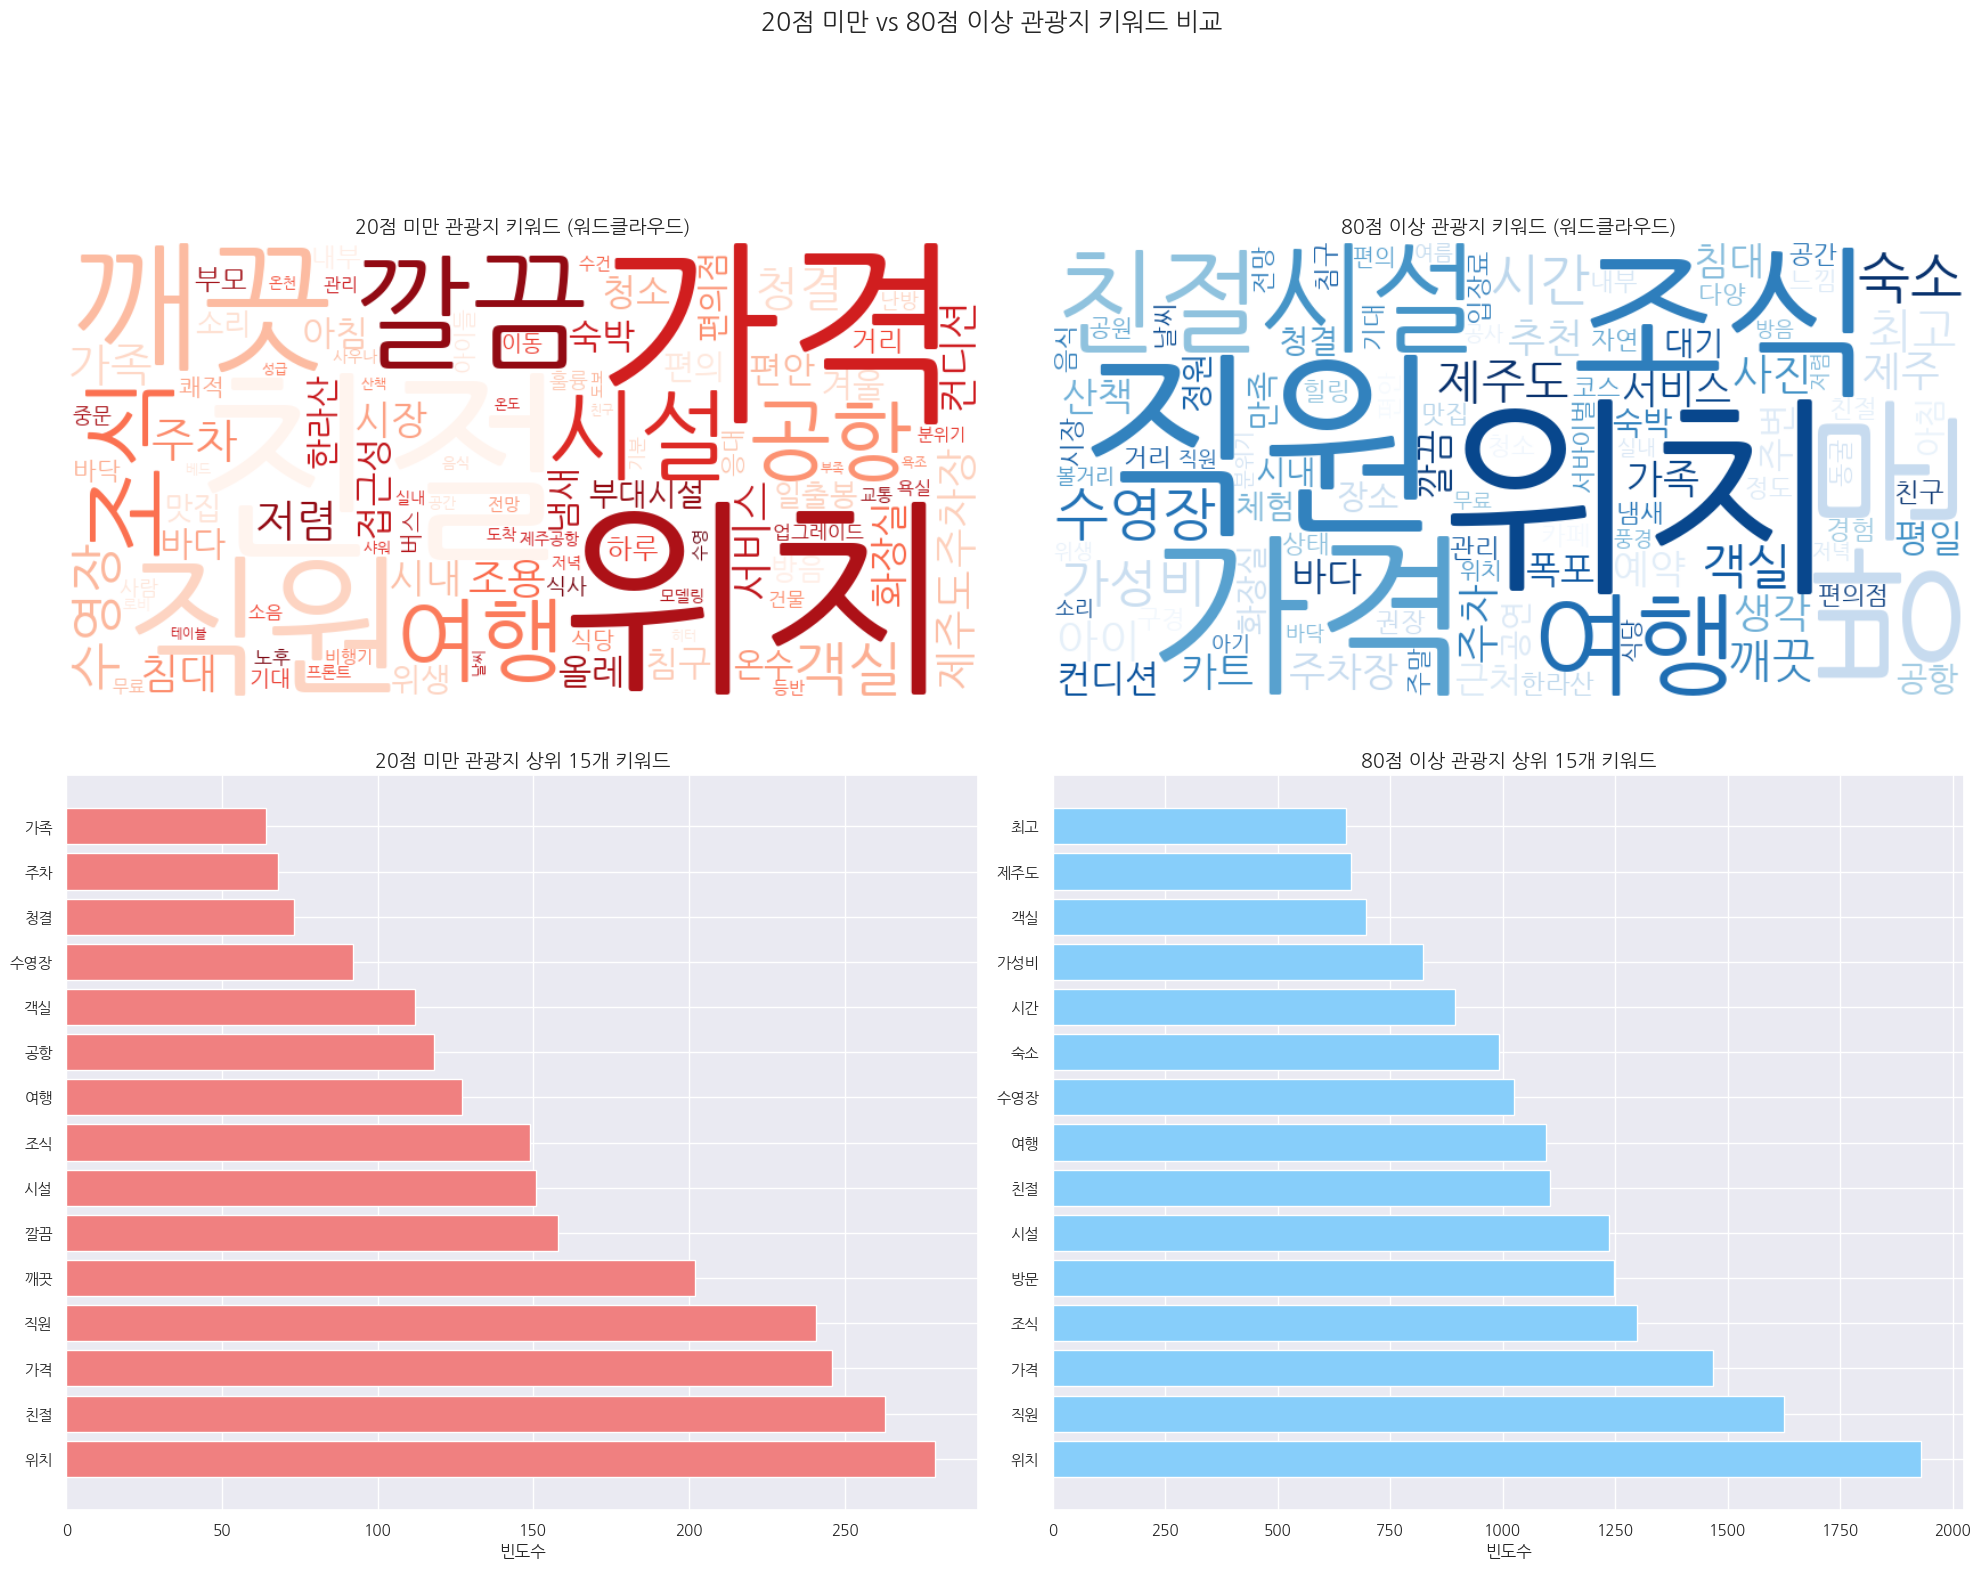

In [814]:
# 시각화 (두 그룹 비교)
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('20점 미만 vs 80점 이상 관광지 키워드 비교', fontsize=18)

# 20점 미만 워드클라우드
wordcloud_low = WordCloud(
    font_path='/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc',  # 한글 폰트 경로
    width=800, height=400,
    background_color='white',
    max_words=100,
    colormap='Reds'
).generate_from_frequencies(low_score_words)

axes[0, 0].imshow(wordcloud_low, interpolation='bilinear')
axes[0, 0].set_title('20점 미만 관광지 키워드 (워드클라우드)', fontsize=14)
axes[0, 0].axis('off')

# 80점 이상 워드클라우드
wordcloud_high = WordCloud(
    font_path='/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc',  # 한글 폰트 경로
    width=800, height=400,
    background_color='white',
    max_words=100,
    colormap='Blues' 
).generate_from_frequencies(high_score_words)

axes[0, 1].imshow(wordcloud_high, interpolation='bilinear')
axes[0, 1].set_title('80점 이상 관광지 키워드 (워드클라우드)', fontsize=14)
axes[0, 1].axis('off')

# 20점 미만 막대 그래프
low_top_words = low_score_words.most_common(15)
if low_top_words:
    words_low, counts_low = zip(*low_top_words)
    axes[1, 0].barh(range(len(words_low)), counts_low, color='lightcoral')
    axes[1, 0].set_yticks(range(len(words_low)))
    axes[1, 0].set_yticklabels(words_low)
    axes[1, 0].set_title('20점 미만 관광지 상위 15개 키워드', fontsize=14)
    axes[1, 0].set_xlabel('빈도수')

# 80점 이상 막대 그래프
high_top_words = high_score_words.most_common(15)
if high_top_words:
    words_high, counts_high = zip(*high_top_words)
    axes[1, 1].barh(range(len(words_high)), counts_high, color='lightskyblue')
    axes[1, 1].set_yticks(range(len(words_high)))
    axes[1, 1].set_yticklabels(words_high)
    axes[1, 1].set_title('80점 이상 관광지 상위 15개 키워드', fontsize=14)
    axes[1, 1].set_xlabel('빈도수')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ====== 제주 관광 데이터 분석 및 활용 계획 ===========

# I. 관광 수요 예측 모델

데이터 요구사항: 
1. 23년도 비짓 제주 웹사이트의 주간별, 월별 관광지 조회수
2. 23년도 비짓 제주 웹사이트의 평점리뷰 평점과 형태소
3. 23년도 신한카드 요식업 매출액 상위 30%의 데이터

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('axes', unicode_minus=False)
plt.rc('font', family='AppleGothic')

In [3]:
weekly_data = pd.read_csv('../data/raw/제주 관광수요 예측 데이터_비짓제주 요일별 데이터/combined_wk.csv')
monthly_data = pd.read_csv('../data/raw/제주 관광수요 예측 데이터_비짓제주 월별 데이터/combined_mt.csv')
sentiment_data = pd.read_csv('../data/raw/제주 관광지 평점리뷰 감성분석 데이터/combined_sentiment.csv')
morpheme_data = pd.read_csv('../data/raw/제주 관광지 평점리뷰 형태소 데이터/combined_mop.csv')
mct_data = pd.read_csv('../data/raw/JEJU_MCT_DATA_v2.csv', encoding='cp949')

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_79885/3836104141.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  morpheme_data = pd.read_csv('../data/raw/제주 관광지 평점리뷰 형태소 데이터/combined_mop.csv')


In [146]:
print(weekly_data.info())
print(monthly_data.info())
print(sentiment_data.info())
print(morpheme_data.info())
print(mct_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51046 entries, 0 to 51045
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CL_CD          51046 non-null  object 
 1   CL_NM          51046 non-null  object 
 2   AREA_NM        51046 non-null  object 
 3   ADDR           51046 non-null  object 
 4   BASE_YEAR      51046 non-null  int64  
 5   BASE_MT        51046 non-null  int64  
 6   ALL_TOTAL_CO   51046 non-null  int64  
 7   MON_VIEWS_CO   51046 non-null  float64
 8   TUES_VIEWS_CO  51046 non-null  float64
 9   WED_VIEWS_CO   51046 non-null  float64
 10  THUR_VIEWS_CO  51046 non-null  float64
 11  FRI_VIEWS_CO   51046 non-null  float64
 12  SAT_VIEWS_CO   51046 non-null  float64
 13  SUN_VIEWS_CO   51046 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 5.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51046 entries, 0 to 51045
Data columns (total 19 columns):
 #   Column

In [145]:
print(weekly_data['CL_NM'].unique())
print(monthly_data['CL_NM'].unique())
print(sentiment_data['CL_NM'].unique())
print(morpheme_data['CL_NM'].unique())
print(mct['MCT_TYPE'].unique())

['관광지' '쇼핑' '숙박' '음식점']
['관광지' '쇼핑' '숙박' '음식점']
['공연전시' '기타' '레저관광' '키즈' '테마파크' '자연' '체험' '관광호텔업' '일반호텔' '관광호텔' '숙박업(생활)'
 '여관업' '숙박업 기타' '휴양콘도미니엄업']
['공연전시' '기타' '레저관광' '키즈' '테마파크' '자연' '체험' '관광호텔업' '일반호텔' '관광호텔' '숙박업(생활)'
 '여관업' '휴양콘도미니엄업' '미분류' '숙박업 기타' nan]
['가정식' '단품요리 전문' '커피' '베이커리' '일식' '치킨' '중식' '분식' '햄버거' '양식' '맥주/요리주점'
 '아이스크림/빙수' '피자' '샌드위치/토스트' '차' '꼬치구이' '기타세계요리' '구내식당/푸드코트' '떡/한과' '도시락'
 '도너츠' '주스' '동남아/인도음식' '패밀리 레스토랑' '기사식당' '야식' '스테이크' '포장마차' '부페' '민속주점']


In [51]:
morpheme_data.loc[morpheme_data['CL_NM'] == '숙박업 기타']

BASE_YM   CL_NM       TRRSRT_NM                 TRRSRT_ADDR  \
837344     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837345     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837346     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837347     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837348     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837349     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837350     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837351     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837352     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837353     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837354     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837355     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837356     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837357     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837358     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837359     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837360     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837361     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837362     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837363     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837364     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837365     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837366     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837367     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   
837368     NaN  숙박업 기타  제주 웨스턴 그레이스 호텔  제주특별자치도 서귀포시 김정문화로27번길 9-7   

        SCORE_VALUE            MOP_CN   REGIST_DE    지역  점수구간  
837344        100.0               NaN  2023-10-03  서귀포시  매우높음  
837345        100.0             한식,뷔페  2023-10-05  서귀포시  매우높음  
837346        100.0    여행,무료,주차,기대,고의  2023-10-08  서귀포시  매우높음  
837347         70.0               NaN  2023-10-10  서귀포시    높음  
837348        100.0          깨끗,직원,친절  2023-10-11  서귀포시  매우높음  
837349         80.0               NaN  2023-10-12  서귀포시    높음  
837350         80.0                이틀  2023-10-15  서귀포시    높음  
837351        100.0        깔끔,일본,비즈니스  2023-10-16  서귀포시  매우높음  
837352         10.0               NaN  2023-10-17  서귀포시  매우낮음  
837353         60.0               NaN  2023-10-18  서귀포시    보통  
837354         90.0               NaN  2023-10-20  서귀포시  매우높음  
837355         91.0   만원,제주도,곳도,청결,도면  2023-10-21  서귀포시  매우높음  
837356         97.0    편안,여행,깔끔,맛집,저녁  2023-10-23  서귀포시  매우높음  
837357         88.0   가격,청소,화장실,주차,기차  2023-10-24  서귀포시  매우높음  
837358         88.0  코스,올레길,조용,방음,교통편  2023-10-28  서귀포시  매우높음  
837359         92.0            공간,서비스  2023-10-29  서귀포시  매우높음  
837360         72.0       비용,저렴,주차,외부  2023-10-03  서귀포시    높음  
837361         77.0       조용,만점,여분,수건  2023-10-30  서귀포시    높음  
837362         92.0       제목,손해,치약,칫솔  2023-10-31  서귀포시  매우높음  
837363         88.0   깨끗,주차,식당,편의점,구입  2023-10-04  서귀포시  매우높음  
837364         52.0  소음,온돌방,아이와,차단,밤새  2023-10-05  서귀포시    보통  
837365        100.0                가격  2023-10-06  서귀포시  매우높음  
837366         80.0               NaN  2023-10-07  서귀포시    높음  
837367         50.0               NaN  2023-10-08  서귀포시    보통  
837368        100.0    위생,대형,마트,곳도,지척  2023-10-09  서귀포시  매우높음

In [32]:
morpheme_data.loc[morpheme_data['CL_NM'] == '미분류']

BASE_YM CL_NM            TRRSRT_NM                     TRRSRT_ADDR  \
836531         NaN   미분류  메리어트관 제주신화월드 호텔앤리조트  제주특별자치도 서귀포시 안덕면 신화역사로304번길 38   
836532         NaN   미분류  메리어트관 제주신화월드 호텔앤리조트  제주특별자치도 서귀포시 안덕면 신화역사로304번길 38   
836752         NaN   미분류               비스타리조트             제주특별자치도 제주시 서해안로 74   
836753         NaN   미분류               비스타리조트             제주특별자치도 제주시 서해안로 74   
836754         NaN   미분류               비스타리조트             제주특별자치도 제주시 서해안로 74   
...            ...   ...                  ...                             ...   
837989         NaN   미분류                 호텔난타         제주특별자치도 제주시 선돌목동길 56-26   
837990         NaN   미분류                 호텔난타         제주특별자치도 제주시 선돌목동길 56-26   
837991         NaN   미분류                 호텔난타         제주특별자치도 제주시 선돌목동길 56-26   
837992         NaN   미분류                 호텔난타         제주특별자치도 제주시 선돌목동길 56-26   
842827  2023-12-01   미분류           해비치 하우스 펜션      제주특별자치도 서귀포시 표선면 민속해안로 347   

        SCORE_VALUE              MOP_CN   REGIST_DE    지역  점수구간  
836531        100.0  제격,테마파크,워터,쇼핑몰,영화관  2023-10-12  서귀포시  매우높음  
836532         60.0   지하,음식점,편의점,주차장,아침  2023-10-04  서귀포시    보통  
836752         32.0     민망,가격,제주도,주인,친절  2023-10-13   제주시    낮음  
836753        100.0               경관,청결  2023-10-02   제주시  매우높음  
836754         50.0                 NaN  2023-10-28   제주시    보통  
...             ...                 ...         ...   ...   ...  
837989         89.0    등반,렌트카,아이와,난타,공연  2023-10-06   제주시  매우높음  
837990         88.0     한라산,등반,위생,직원,친절  2023-10-07   제주시  매우높음  
837991         83.0      청결,편안,침구,욕실,산책  2023-10-08   제주시  매우높음  
837992         88.0        편의점,헬스,무대,깔끔  2023-10-09   제주시  매우높음  
842827          8.0                 NaN  2023-12-11  서귀포시  매우낮음  

[125 rows x 9 columns]

In [26]:
mct_data['MCT_TYPE'].unique()

array(['가정식', '단품요리 전문', '커피', '베이커리', '일식', '치킨', '중식', '분식', '햄버거',
       '양식', '맥주/요리주점', '아이스크림/빙수', '피자', '샌드위치/토스트', '차', '꼬치구이',
       '기타세계요리', '구내식당/푸드코트', '떡/한과', '도시락', '도너츠', '주스', '동남아/인도음식',
       '패밀리 레스토랑', '기사식당', '야식', '스테이크', '포장마차', '부페', '민속주점'],
      dtype=object)

## I-a. 관광 수요 예측 모델

- 목표: 특정 관광지 또는 지역의 방문객 수 예측
- 필요 데이터셋: weekly_data, monthly_data, sentiment_data

In [151]:
# 1. 관광지별 월간 데이터 준비

# 월별 컬럼 식별
month_columns = [col for col in monthly_data.columns if col.endswith('_VIEWS_CO')]

In [6]:
# 데이터 재구성(wide -> long 형식)
monthly_long = pd.melt(
    monthly_data,
    id_vars=['CL_CD', 'CL_NM', 'AREA_NM', 'ADDR', 'BASE_YEAR', 'ALL_TOTAL_CO', '지역'],
    value_vars=month_columns,
    var_name='MONTH',
    value_name='VIEWS_CO'
)

# 월 정보 추출 및 숫자로 변환
month_mapping = {
    'JAN_VIEWS_CO': '01', 
    'FEB_VIEWS_CO': '02', 
    'MAR_VIEWS_CO': '03', 
    'APR_VIEWS_CO': '04',
    'MAY_VIEWS_CO': '05', 
    'JUN_VIEWS_CO': '06', 
    'JULY_VIEWS_CO': '07', 
    'AUG_VIEWS_CO': '08',
    'SEP_VIEWS_CO': '09', 
    'OCT_VIEWS_CO': '10', 
    'NOV_VIEWS_CO': '11', 
    'DEC_VIEWS_CO': '12'
}

monthly_long['BASE_MT'] = monthly_long['MONTH'].map(month_mapping)

# YM 컬럼 생성
monthly_long['YM'] = monthly_long['BASE_YEAR'].astype(str) + monthly_long['BASE_MT']

NameError: name 'month_columns' is not defined

## I-b. 관광 수요와 매출 관계 분석

In [153]:
tourism_demand = monthly_long.groupby(['YM', '지역']).agg({'VIEWS_CO': 'sum'}).reset_index()

tourism_demand

YM    지역  VIEWS_CO
0   202301  서귀포시  169748.0
1   202301   제주시  216249.0
2   202302  서귀포시  144987.0
3   202302   제주시  176107.0
4   202303  서귀포시  178247.0
5   202303   제주시  219806.0
6   202304  서귀포시  183658.0
7   202304   제주시  235901.0
8   202305  서귀포시  188106.0
9   202305   제주시  238346.0
10  202306  서귀포시  164858.0
11  202306   제주시  207562.0
12  202307  서귀포시  136245.0
13  202307   제주시  182259.0
14  202308  서귀포시  135840.0
15  202308   제주시  172358.0
16  202309  서귀포시  141526.0
17  202309   제주시  176443.0
18  202310  서귀포시  147677.0
19  202310   제주시  176320.0
20  202311  서귀포시  155734.0
21  202311   제주시  166197.0
22  202312  서귀포시  169365.0
23  202312   제주시  161536.0

In [154]:
mct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67864 entries, 0 to 67863
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YM                             67864 non-null  int64  
 1   MCT_NM                         67864 non-null  object 
 2   OP_YMD                         67864 non-null  int64  
 3   MCT_TYPE                       67864 non-null  object 
 4   ADDR                           67864 non-null  object 
 5   UE_CNT_GRP                     67864 non-null  object 
 6   UE_AMT_GRP                     67864 non-null  object 
 7   UE_AMT_PER_TRSN_GRP            67864 non-null  object 
 8   MON_UE_CNT_RAT                 67864 non-null  float64
 9   TUE_UE_CNT_RAT                 67864 non-null  float64
 10  WED_UE_CNT_RAT                 67864 non-null  float64
 11  THU_UE_CNT_RAT                 67864 non-null  float64
 12  FRI_UE_CNT_RAT                 67864 non-null 

In [155]:
# MCT 데이터에서 매출 그룹을 수치로 변환
def convert_sales_group(group):
    if pd.isna(group):
        return None

    if '1_' in group: 
        return 5
    elif '2_' in group:
        return 4
    elif '3_' in group:
        return 3
    elif '4_' in group:
        return 2
    elif '5_' in group:
        return 1
    else:
        return None

mct_data = mct_data.assign(
    이용건수=mct_data['UE_CNT_GRP'].apply(convert_sales_group),
    이용금액=mct_data['UE_AMT_GRP'].apply(convert_sales_group),
    건당평균이용금액=mct_data['UE_AMT_PER_TRSN_GRP'].apply(convert_sales_group)
)

In [156]:
mct_data.head(3)

YM MCT_NM    OP_YMD MCT_TYPE                       ADDR UE_CNT_GRP  \
0  202301   통큰돼지  20110701      가정식  제주 제주시 용담이동 2682-9번지 통큰돼지   5_75~90%   
1  202301     해변  20050407  단품요리 전문     제주 제주시 애월읍 애월리 410-6번지   3_25~50%   
2  202301    한그릇  20120919  단품요리 전문   제주 서귀포시 색달동 2315-1번지 한그릇   3_25~50%   

  UE_AMT_GRP UE_AMT_PER_TRSN_GRP  MON_UE_CNT_RAT  TUE_UE_CNT_RAT  ...  \
0   4_50~75%            3_25~50%        0.161290        0.032258  ...   
1   2_10~25%            2_10~25%        0.090909        0.121212  ...   
2   3_25~50%            4_50~75%        0.224719        0.112360  ...   

   RC_M12_FME_CUS_CNT_RAT  RC_M12_AGE_UND_20_CUS_CNT_RAT  \
0                   0.390                          0.103   
1                   0.458                          0.221   
2                   0.471                          0.138   

   RC_M12_AGE_30_CUS_CNT_RAT  RC_M12_AGE_40_CUS_CNT_RAT  \
0                      0.124                      0.245   
1                      0.201                      0.195   
2                      0.309                      0.342   

   RC_M12_AGE_50_CUS_CNT_RAT  RC_M12_AGE_OVR_60_CUS_CNT_RAT  TOURIST_RATIO  \
0                      0.387                          0.142       0.292237   
1                      0.244                          0.139       0.769072   
2                      0.164                          0.047       0.652941   

   이용건수  이용금액  건당평균이용금액  
0   1.0   2.0       3.0  
1   3.0   4.0       4.0  
2   3.0   3.0       2.0  

[3 rows x 32 columns]

In [157]:
mct_data['ADDR'].tail()

67859         제주 제주시 연동 291-24번지 연동
67860    제주 제주시 구좌읍 종달리 1935-1번지 1층
67861           제주 제주시 노형동 1291-3번지
67862              제주 제주시 노형동 668번지
67863         제주 제주시 연동 260-21번지 1층
Name: ADDR, dtype: object

In [158]:
# 지역별, 월별 매출 집계
mct_data['지역'] = mct_data['ADDR'].apply(lambda x: '제주시' if '제주' in x else '서귀포시')
sales_data = mct_data.groupby(['YM', '지역']).agg({'이용건수': 'mean', '이용금액': 'mean', '건당평균이용금액': 'mean'}).reset_index()

In [159]:
tourism_demand['YM'] = tourism_demand['YM'].astype(int)

In [160]:
# 데이터 통합
demand_sales = pd.merge(tourism_demand, sales_data, on=['YM', '지역'], how='inner')

In [161]:
demand_sales.head()

YM    지역  VIEWS_CO      이용건수      이용금액  건당평균이용금액
0  202301  서귀포시  169748.0  1.000000  1.000000  3.000000
1  202301   제주시  216249.0  2.783763  2.778224  2.777842
2  202302  서귀포시  144987.0  1.000000  3.000000  4.000000
3  202302   제주시  176107.0  2.778751  2.777649  2.777649
4  202303  서귀포시  178247.0  1.000000  2.000000  4.000000

In [162]:
# 상관관계 분석
correlation = demand_sales[['VIEWS_CO', '이용건수', '이용금액', '건당평균이용금액']].corr()
print('관광 수요와 매출의 상관관계:')
print(correlation)

관광 수요와 매출의 상관관계:
          VIEWS_CO      이용건수      이용금액  건당평균이용금액
VIEWS_CO  1.000000  0.626819  0.463485 -0.480563
이용건수      0.626819  1.000000  0.783321 -0.712092
이용금액      0.463485  0.783321  1.000000 -0.248661
건당평균이용금액 -0.480563 -0.712092 -0.248661  1.000000


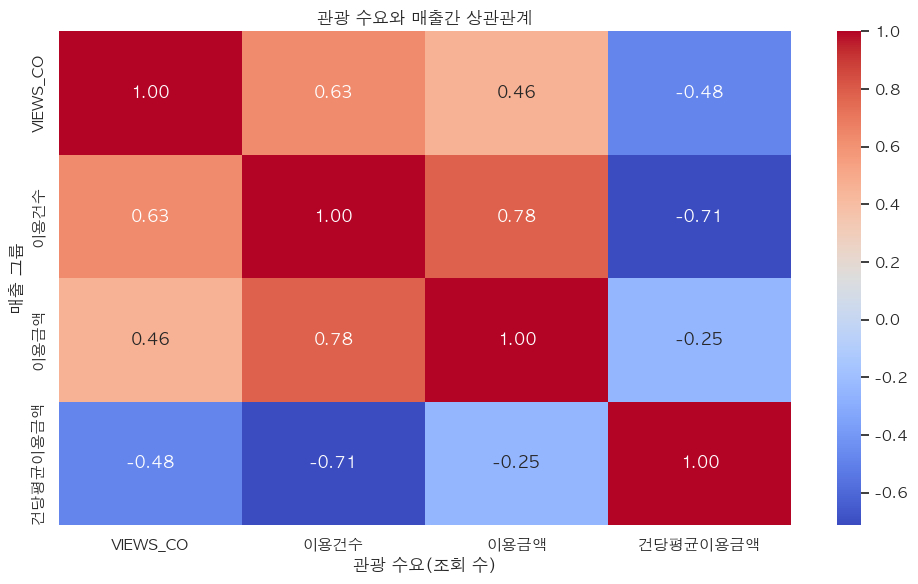

In [163]:
# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('관광 수요와 매출간 상관관계')
plt.xlabel('관광 수요(조회 수)')
plt.ylabel('매출 그룹')
plt.tight_layout()
plt.show()

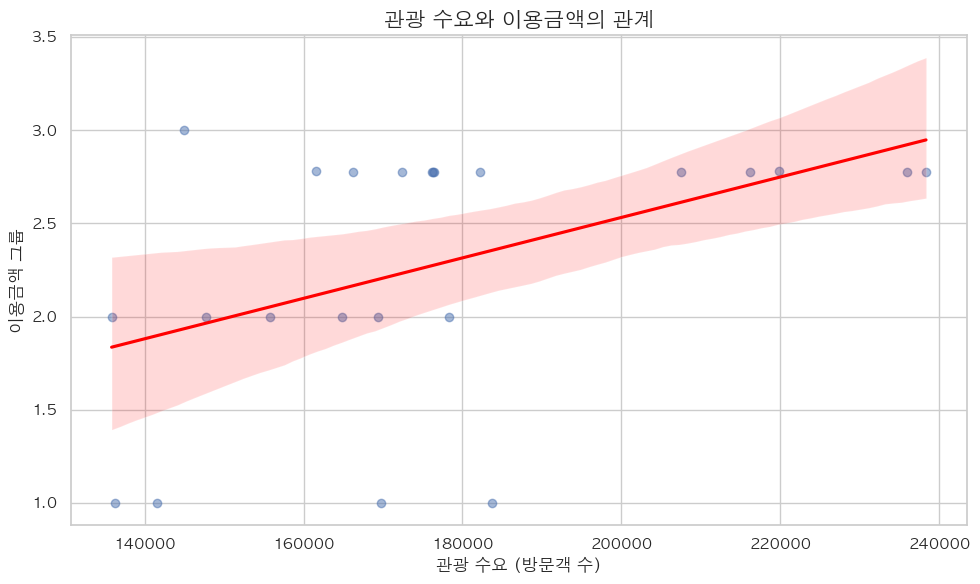

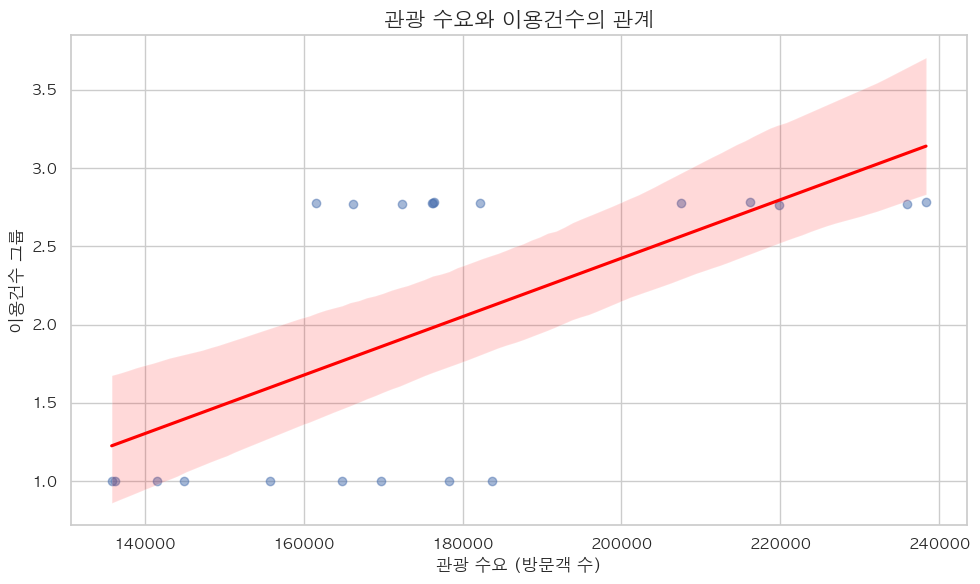

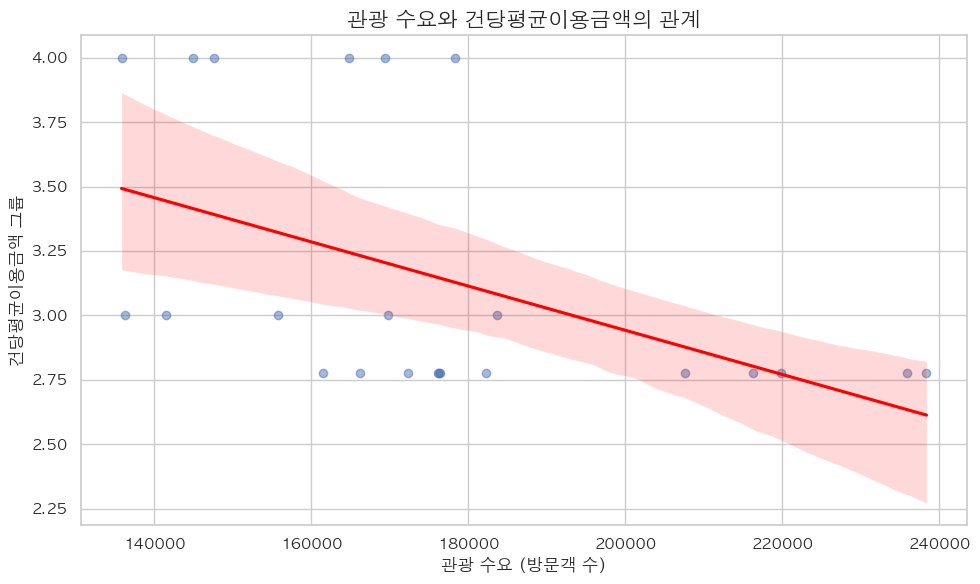

In [164]:
# 관광 수요(VIEWS_CO)와 이용금액 간의 관계
plt.figure(figsize=(10, 6))
sns.regplot(x='VIEWS_CO', y='이용금액', data=demand_sales, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('관광 수요와 이용금액의 관계', fontsize=15)
plt.xlabel('관광 수요 (방문객 수)')
plt.ylabel('이용금액 그룹')
plt.tight_layout()
plt.show()

# 관광 수요(VIEWS_CO)와 이용건수 간의 관계
plt.figure(figsize=(10, 6))
sns.regplot(x='VIEWS_CO', y='이용건수', data=demand_sales, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('관광 수요와 이용건수의 관계', fontsize=15)
plt.xlabel('관광 수요 (방문객 수)')
plt.ylabel('이용건수 그룹')
plt.tight_layout()
plt.show()

# 관광 수요(VIEWS_CO)와 건당평균이용금액 간의 관계
plt.figure(figsize=(10, 6))
sns.regplot(x='VIEWS_CO', y='건당평균이용금액', data=demand_sales, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('관광 수요와 건당평균이용금액의 관계', fontsize=15)
plt.xlabel('관광 수요 (방문객 수)')
plt.ylabel('건당평균이용금액 그룹')
plt.tight_layout()
plt.show()

## I-c. 관광 수요 예측 모델 개발

In [165]:
# 데이터 분포 확인
print("이용건수 통계:", demand_sales['이용건수'].describe())
print("VIEWS_CO 통계:", demand_sales['VIEWS_CO'].describe()) 

# 상관관계 확인
print("상관계수:", demand_sales[['VIEWS_CO', '이용건수']].corr())


이용건수 통계: count    21.000000
mean      2.015100
std       0.900823
min       1.000000
25%       1.000000
50%       2.768713
75%       2.778064
max       2.784290
Name: 이용건수, dtype: float64
VIEWS_CO 통계: count        23.000000
mean     176389.956522
std       29535.971402
min      135840.000000
25%      158635.000000
50%      172358.000000
75%      182958.500000
max      238346.000000
Name: VIEWS_CO, dtype: float64
상관계수:           VIEWS_CO      이용건수
VIEWS_CO  1.000000  0.626819
이용건수      0.626819  1.000000


In [168]:
# 수정된 코드
from lightgbm import LGBMRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. 특성 및 타겟 변수 설정
X_features = demand_sales[['VIEWS_CO']]
y_labels = demand_sales['이용건수']

# 더 많은 특성 사용
X_features_extended = demand_sales[['VIEWS_CO', '이용금액', '건당평균이용금액']]

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_extended, y_labels, test_size=0.2, random_state=156)

# 모델 학습
lgbm_model_ext = LGBMRegressor(
    n_estimators=100, 
    learning_rate=0.05,  # 학습률 낮춤
    num_leaves=31,
    max_depth=5,  # 트리 깊이 제한
    min_child_samples=20,  # 과적합 방지
    random_state=156
)
lgbm_model_ext.fit(X_train_ext, y_train)

# 예측 및 평가
lgbm_pred_ext = lgbm_model_ext.predict(X_test_ext)
lgbm_r2_ext = r2_score(y_test, lgbm_pred_ext)

print(f'확장 특성 LightGBM - R²: {lgbm_r2_ext:.4f}')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 18, number of used features: 0
[LightGBM] [Info] Start training from score 1.733491
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

ValueError: Input contains NaN.

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# 선형 회귀
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
print(f'선형 회귀 - R²: {lr_r2:.4f}')

# 랜덤 포레스트
rf_model = RandomForestRegressor(n_estimators=100, random_state=156)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
print(f'랜덤 포레스트 - R²: {rf_r2:.4f}')

ValueError: Input y contains NaN.

# 관광수요 예측을 위한 ML 접근 방법

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('axes', unicode_minus=False)
plt.rc('font', family='AppleGothic')

In [5]:
import pandas as pd

weekly_data = pd.read_csv('../data/raw/제주 관광수요 예측 데이터_비짓제주 요일별 데이터/combined_wk.csv')
monthly_data = pd.read_csv('../data/raw/제주 관광수요 예측 데이터_비짓제주 월별 데이터/combined_mt.csv')
sentiment_data = pd.read_csv('../data/raw/제주 관광지 평점리뷰 감성분석 데이터/combined_sentiment.csv')
morpheme_data = pd.read_csv('../data/raw/제주 관광지 평점리뷰 형태소 데이터/combined_mop.csv')
mct_data = pd.read_csv('../data/raw/JEJU_MCT_DATA_v2.csv', encoding='cp949')

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_80603/1350008606.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  morpheme_data = pd.read_csv('../data/raw/제주 관광지 평점리뷰 형태소 데이터/combined_mop.csv')


## 전처리

In [6]:
mct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67864 entries, 0 to 67863
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YM                             67864 non-null  int64  
 1   MCT_NM                         67864 non-null  object 
 2   OP_YMD                         67864 non-null  int64  
 3   MCT_TYPE                       67864 non-null  object 
 4   ADDR                           67864 non-null  object 
 5   UE_CNT_GRP                     67864 non-null  object 
 6   UE_AMT_GRP                     67864 non-null  object 
 7   UE_AMT_PER_TRSN_GRP            67864 non-null  object 
 8   MON_UE_CNT_RAT                 67864 non-null  float64
 9   TUE_UE_CNT_RAT                 67864 non-null  float64
 10  WED_UE_CNT_RAT                 67864 non-null  float64
 11  THU_UE_CNT_RAT                 67864 non-null  float64
 12  FRI_UE_CNT_RAT                 67864 non-null 

In [7]:
# 1. REGION 컬럼 생성
mct_data['REGION'] = mct_data['ADDR'].apply(lambda x: x.split()[1] if isinstance(x, str) and x.split() else 'Unknown')

# 2. REGION 컬럼 복사
mct_data['REGION_temp'] = mct_data['REGION']

# 3. 더미 변수 생성 (REGION_temp 컬럼 사용)
mct_data = pd.get_dummies(mct_data, columns=['REGION_temp'], prefix='REGION')

# 날짜 특성 생성
mct_data['YM'] = pd.to_datetime(mct_data['YM'], format='%Y%m')
mct_data['YEAR'] = mct_data['YM'].dt.year
mct_data['MONTH'] = mct_data['YM'].dt.month

# 월을 기준으로 계절 지정
mct_data['SEASON'] = mct_data['MONTH'].apply(lambda x:
                                           '봄' if x in [3, 4, 5] else
                                           '여름' if x in [6, 7, 8] else
                                           '가을' if x in [9, 10, 11] else '겨울')

# 구간을 순서값으로 변환 (1~6)
order = {
    '1_상위 10% 이하': 1,             
    '2_10~25%': 2,
    '3_25~50%': 3,
    '4_50~75%': 4,
    '5_75~90%': 5,
    '6_90% 초과(하위 10% 이하)': 6   
}

# 순서형 변수로 변환
mct_data['USE_COUNT_GROUP'] = mct_data['UE_CNT_GRP'].map(order)
mct_data['USE_AMOUNT_GROUP'] = mct_data['UE_AMT_GRP'].map(order)
mct_data['UE_AMOUNT_PER_GRUOP'] = mct_data['UE_AMT_PER_TRSN_GRP'].map(order)

### 원-핫 인코딩, 라벨 인코딩

In [8]:
from sklearn.preprocessing import LabelEncoder

# 가맹점 유형 원-핫 인코딩 -> 명목형 변수(순서 없음)
mct_type_dummies = pd.get_dummies(mct_data['MCT_TYPE'], prefix='MCT_TYPE')
mct_data = pd.concat([mct_data, mct_type_dummies], axis=1)

# 계절 유형 인코딩 -> 라벨 인코딩(계절적 순환)
le_season = LabelEncoder()
mct_data['SEASON_encoded'] = le_season.fit_transform(mct_data['SEASON'])

# 계절 인코딩 결과 확인
print("\n계절 인코딩 결과:")
print(pd.DataFrame({
    'SEASON': le_season.classes_,
    'SEASON_encoded': range(len(le_season.classes_))
}))

# 원-핫 인코딩 결과 확인 (처음 5개 열만)
print("\n가맹점 유형 원-핫 인코딩 결과 (처음 5개 행):")
mct_type_dummy_cols = [col for col in mct_data.columns if col.startswith('MCT_TYPE_') and col != 'MCT_TYPE_encoded']
print(mct_data[['MCT_TYPE'] + mct_type_dummy_cols[:5]].head())


계절 인코딩 결과:
  SEASON  SEASON_encoded
0     가을               0
1     겨울               1
2      봄               2
3     여름               3

가맹점 유형 원-핫 인코딩 결과 (처음 5개 행):
  MCT_TYPE  MCT_TYPE_가정식  MCT_TYPE_구내식당/푸드코트  MCT_TYPE_기사식당  MCT_TYPE_기타세계요리  \
0      가정식          True               False          False            False   
1  단품요리 전문         False               False          False            False   
2  단품요리 전문         False               False          False            False   
3      가정식          True               False          False            False   
4  단품요리 전문         False               False          False            False   

   MCT_TYPE_꼬치구이  
0          False  
1          False  
2          False  
3          False  
4          False  


### 파생변수 생성

In [9]:
# 업력 파생변수 생성

# OP_YMD를 날짜 형식으로 변환
mct_data['OP_DATE'] = pd.to_datetime(mct_data['OP_YMD'].astype(str), format='%Y%m%d', errors='coerce')

# 고정된 기준 날짜 사용 (2023년 12월 31일)
fixed_date = pd.Timestamp('2023-12-31')

# 업력 계산 (연 단위)
mct_data['BUSINESS_YEARS'] = (fixed_date - mct_data['OP_DATE']).dt.days / 365.25

# 업력 계산 (월 단위)›
mct_data['BUSINESS_MONTHS'] = ((fixed_date.year - mct_data['OP_DATE'].dt.year) * 12 + 
                              (fixed_date.month - mct_data['OP_DATE'].dt.month))

# 업력 구간 생성
mct_data['BUSINESS_AGE_GROUP'] = pd.cut(
    mct_data['BUSINESS_YEARS'], 
    bins=[0, 1, 3, 5, 10, float('inf')],
    labels=['1년 미만', '1~3년', '3~5년', '5~10년', '10년 이상']
)

# 결과 확인
print("업력 통계:")
print(mct_data[['BUSINESS_YEARS', 'BUSINESS_MONTHS']].describe())

print("\n업력 구간별 매장 수:")
print(mct_data['BUSINESS_AGE_GROUP'].value_counts().sort_index())

업력 통계:
       BUSINESS_YEARS  BUSINESS_MONTHS
count    67864.000000     67864.000000
mean         6.204350        73.958888
std          5.387646        64.651466
min          0.032854         0.000000
25%          2.354552        28.000000
50%          4.607803        55.000000
75%          8.177960        98.000000
max         34.119097       409.000000

업력 구간별 매장 수:
BUSINESS_AGE_GROUP
1년 미만      5168
1~3년      17191
3~5년      14079
5~10년     19327
10년 이상    12099
Name: count, dtype: int64


In [10]:
# 관광객 비중 파생변수 생성 = 1-LOCAL_UE_CNT_RAT(현지인 이용 비율)
mct_data['TOURIST_RATIO'] = 1 - mct_data['LOCAL_UE_CNT_RAT']

In [11]:
mct_data['TOURIST_RATIO'].head()

0    0.292237
1    0.769072
2    0.652941
3    0.983904
4    0.735537
Name: TOURIST_RATIO, dtype: float64

In [12]:
mct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67864 entries, 0 to 67863
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   YM                             67864 non-null  datetime64[ns]
 1   MCT_NM                         67864 non-null  object        
 2   OP_YMD                         67864 non-null  int64         
 3   MCT_TYPE                       67864 non-null  object        
 4   ADDR                           67864 non-null  object        
 5   UE_CNT_GRP                     67864 non-null  object        
 6   UE_AMT_GRP                     67864 non-null  object        
 7   UE_AMT_PER_TRSN_GRP            67864 non-null  object        
 8   MON_UE_CNT_RAT                 67864 non-null  float64       
 9   TUE_UE_CNT_RAT                 67864 non-null  float64       
 10  WED_UE_CNT_RAT                 67864 non-null  float64       
 11  THU_UE_CNT_RAT 

## EDA

### 1.1 기본 통계 분석

In [13]:
print('관광객 비율 통계:')
print(mct_data['TOURIST_RATIO'].describe())

print('\n업력 통계:')
print(mct_data['BUSINESS_YEARS'].describe())

관광객 비율 통계:
count    67864.000000
mean         0.531940
std          0.298165
min          0.000000
25%          0.246319
50%          0.498750
75%          0.840829
max          1.000000
Name: TOURIST_RATIO, dtype: float64

업력 통계:
count    67864.000000
mean         6.204350
std          5.387646
min          0.032854
25%          2.354552
50%          4.607803
75%          8.177960
max         34.119097
Name: BUSINESS_YEARS, dtype: float64


In [14]:
# 상관관계 분석
numeric_cols = mct_data.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
correlation_matrix = mct_data[numeric_cols].corr()

# 관광객 비율과의 상관관계 확인
tourist_corr = correlation_matrix['TOURIST_RATIO'].sort_values(ascending=False)
print("\n관광객 비율과의 상관관계 (상위 10개):")
print(tourist_corr.head(10))
print("\n관광객 비율과의 상관관계 (하위 10개):")
print(tourist_corr.tail(10))


관광객 비율과의 상관관계 (상위 10개):
TOURIST_RATIO                    1.000000
HR_14_17_UE_CNT_RAT              0.291053
RC_M12_AGE_UND_20_CUS_CNT_RAT    0.275396
RC_M12_AGE_30_CUS_CNT_RAT        0.272405
RC_M12_FME_CUS_CNT_RAT           0.265131
SUN_UE_CNT_RAT                   0.152249
HR_5_11_UE_CNT_RAT               0.101078
HR_12_13_UE_CNT_RAT              0.089956
SAT_UE_CNT_RAT                   0.046140
MON_UE_CNT_RAT                   0.044639
Name: TOURIST_RATIO, dtype: float64

관광객 비율과의 상관관계 (하위 10개):
WED_UE_CNT_RAT              -0.092830
UE_AMOUNT_PER_GRUOP         -0.110423
HR_18_22_UE_CNT_RAT         -0.146076
HR_23_4_UE_CNT_RAT          -0.197311
USE_AMOUNT_GROUP            -0.235942
RC_M12_AGE_50_CUS_CNT_RAT   -0.247266
RC_M12_MAL_CUS_CNT_RAT      -0.265137
RC_M12_AGE_40_CUS_CNT_RAT   -0.325028
LOCAL_UE_CNT_RAT            -1.000000
YEAR                              NaN
Name: TOURIST_RATIO, dtype: float64


### 1.2 시각화 분석

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_80603/2387905292.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=mct_data['TOURIST_RATIO'], fill=True, palette='PuBu')


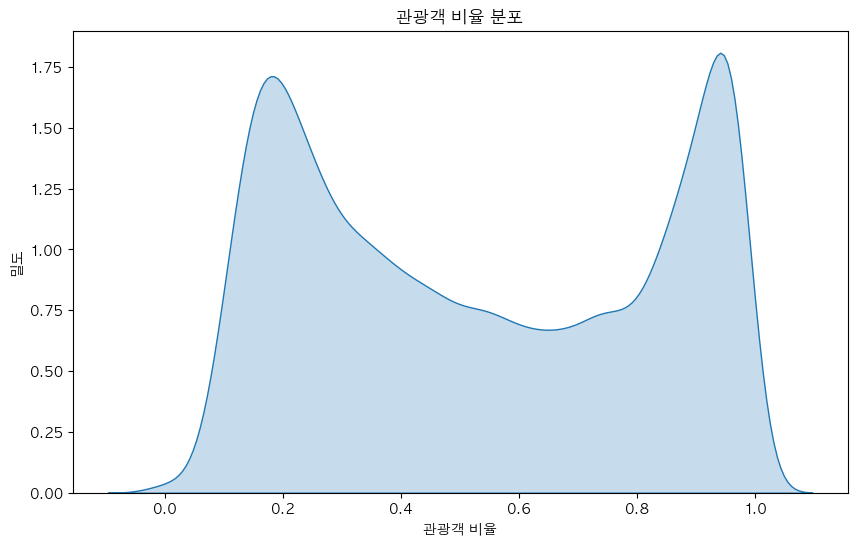

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 1. 관광객 비율 분포 (연속형 데이터) - KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=mct_data['TOURIST_RATIO'], fill=True, palette='PuBu')
plt.title('관광객 비율 분포')
plt.xlabel('관광객 비율')
plt.ylabel('밀도')
plt.show()

In [17]:
mct_data.loc[mct_data['TOURIST_RATIO'] > 0.8 ]

YM       MCT_NM    OP_YMD MCT_TYPE  \
3     2023-01-01       협재해녀의집  20130627      가정식   
5     2023-01-01           동진  20160523      가정식   
13    2023-01-01         통나무집  19971104       일식   
21    2023-01-01       한라진칼국수  20200121  단품요리 전문   
22    2023-01-01     서귀포흑돼지명가  19910503  단품요리 전문   
...          ...          ...       ...      ...   
67852 2023-12-01         기회횟집  20211123  단품요리 전문   
67853 2023-12-01  런던베이글뮤지엄 제주  20230406     베이커리   
67857 2023-12-01  성산일출봉해송갈치전문  20201028  단품요리 전문   
67860 2023-12-01     종달리엔심야식당  20210513      가정식   
67862 2023-12-01     흑돼지가있는풍경  20040109      가정식   

                                         ADDR           UE_CNT_GRP  \
3                     제주 제주시 한림읍 협재리 1459-2번지             3_25~50%   
5                          제주 제주시 일도일동 1146번지             2_10~25%   
13                        제주 서귀포시 서귀동 274-2번지             2_10~25%   
21                      제주 제주시 내도동 529-1번지 1층             4_50~75%   
22                        제주 서귀포시 호근동 431-8번지             5_75~90%   
...                                       ...                  ...   
67852  제주 제주시 건입동 1421-1번지 성산빌딩 1층 102호 -103호             3_25~50%   
67853     제주 제주시 구좌읍 동복리 719-1번지 제2동 지하1층 및1층          1_상위 10% 이하   
67857              제주 서귀포시 성산읍 성산리 136-7번지 1층  6_90% 초과(하위 10% 이하)   
67860              제주 제주시 구좌읍 종달리 1935-1번지 1층             4_50~75%   
67862                        제주 제주시 노형동 668번지             5_75~90%   

        UE_AMT_GRP UE_AMT_PER_TRSN_GRP  MON_UE_CNT_RAT  TUE_UE_CNT_RAT  ...  \
3         3_25~50%            4_50~75%        0.000000        0.271739  ...   
5         3_25~50%            5_75~90%        0.117647        0.176471  ...   
13        2_10~25%            4_50~75%        0.223881        0.104478  ...   
21        4_50~75%            4_50~75%        0.196721        0.000000  ...   
22        3_25~50%            2_10~25%        0.296296        0.185185  ...   
...            ...                 ...             ...             ...  ...   
67852     2_10~25%            2_10~25%        0.028571        0.085714  ...   
67853  1_상위 10% 이하            4_50~75%        0.132101        0.122588  ...   
67857     5_75~90%         1_상위 10% 이하        0.153846        0.076923  ...   
67860     4_50~75%            3_25~50%        0.150000        0.150000  ...   
67862     2_10~25%         1_상위 10% 이하        0.066667        0.000000  ...   

       MCT_TYPE_패밀리 레스토랑  MCT_TYPE_포장마차  MCT_TYPE_피자  MCT_TYPE_햄버거  \
3                  False          False        False         False   
5                  False          False        False         False   
13                 False          False        False         False   
21                 False          False        False         False   
22                 False          False        False         False   
...                  ...            ...          ...           ...   
67852              False          False        False         False   
67853              False          False        False         False   
67857              False          False        False         False   
67860              False          False        False         False   
67862              False          False        False         False   

       SEASON_encoded    OP_DATE  BUSINESS_YEARS  BUSINESS_MONTHS  \
3                   1 2013-06-27       10.510609              126   
5                   1 2016-05-23        7.605749               91   
13                  1 1997-11-04       26.154689              313   
21                  1 2020-01-21        3.942505               47   
22                  1 1991-05-03       32.662560              391   
...               ...        ...             ...              ...   
67852               1 2021-11-23        2.102669               25   
67853               1 2023-04-06        0.736482                8   
67857               1 2020-10-28        3.173169               38   
67860               1 2021-05-13        2.633812               31   

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_80603/2382385771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='REGION', y='TOURIST_RATIO', data=mct_data[mct_data['REGION'] != 'Unknown'], palette='PuBu')


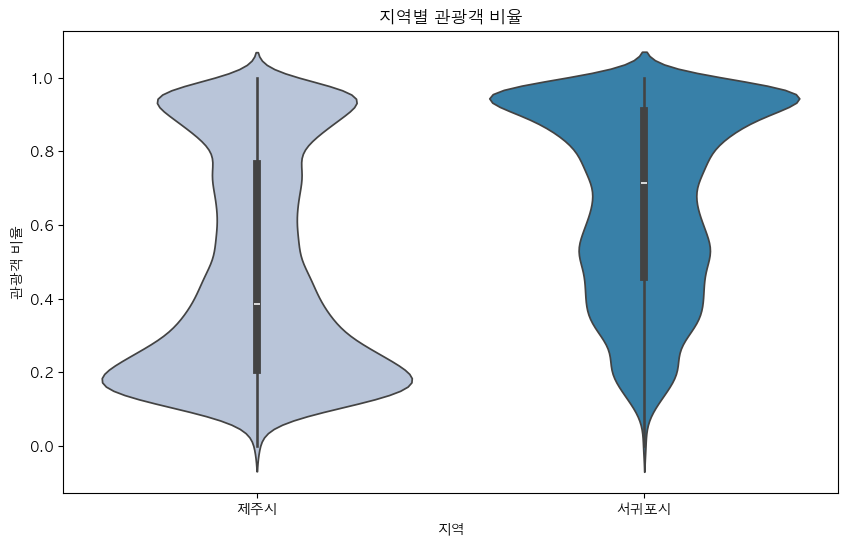

In [18]:
# 2. 지역별 관광객 비율 (이진 범주형)
plt.figure(figsize=(10, 6))
sns.violinplot(x='REGION', y='TOURIST_RATIO', data=mct_data[mct_data['REGION'] != 'Unknown'], palette='PuBu')
plt.title('지역별 관광객 비율')
plt.xlabel('지역')
plt.ylabel('관광객 비율')
plt.show()

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_80603/2154130848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BUSINESS_AGE_GROUP', y='TOURIST_RATIO', data=mct_data,


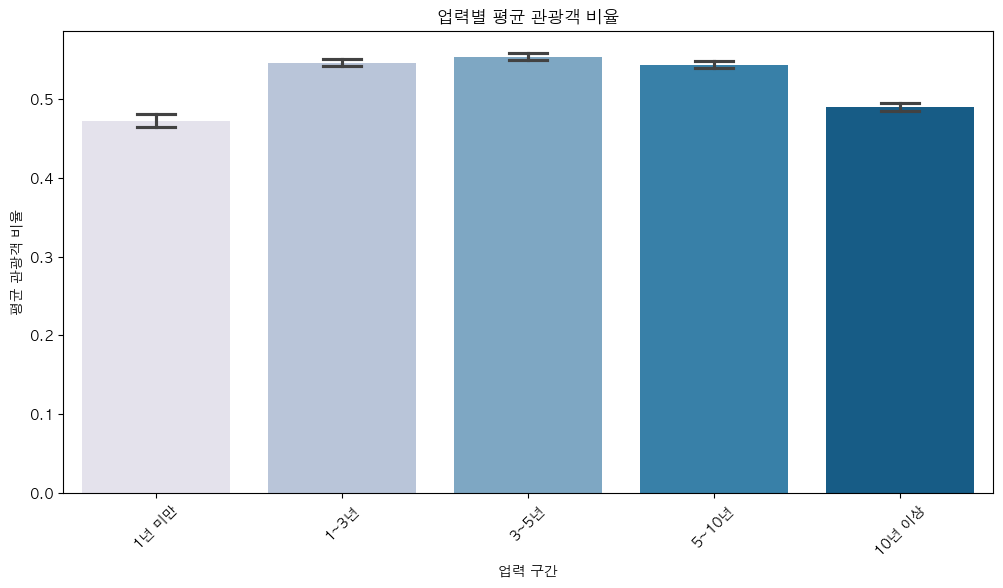

In [19]:
# 3. 업력별 관광객 비율 (순서형 범주) - Bar plot + Error bar
plt.figure(figsize=(12, 6))
sns.barplot(x='BUSINESS_AGE_GROUP', y='TOURIST_RATIO', data=mct_data, 
           errorbar=('ci', 95), capsize=0.2, palette='PuBu')
plt.title('업력별 평균 관광객 비율')
plt.xlabel('업력 구간')
plt.ylabel('평균 관광객 비율')
plt.xticks(rotation=45)
plt.show()

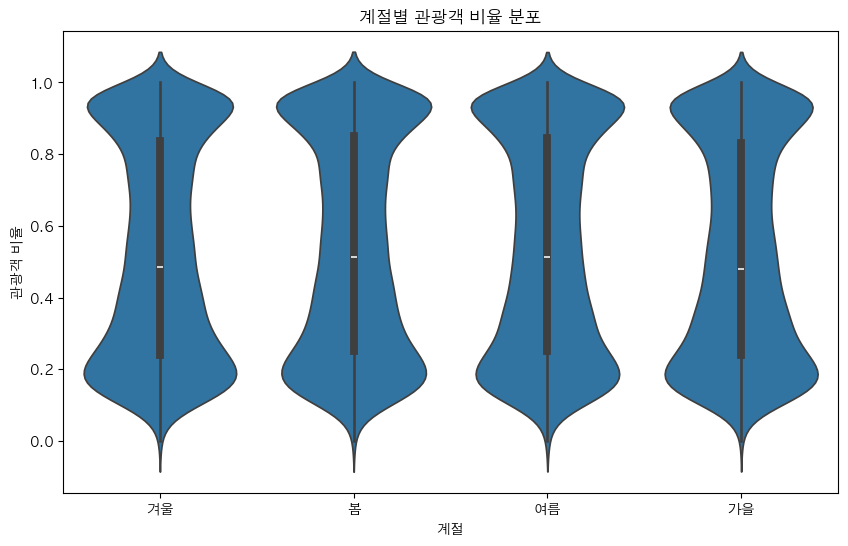

In [20]:
# 4. 계절별 관광객 비율 (순환적 범주) - Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='SEASON', y='TOURIST_RATIO', data=mct_data)
plt.title('계절별 관광객 비율 분포')
plt.xlabel('계절')
plt.ylabel('관광객 비율')
plt.show()

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_80603/2214825605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='MCT_TYPE', y='TOURIST_RATIO',


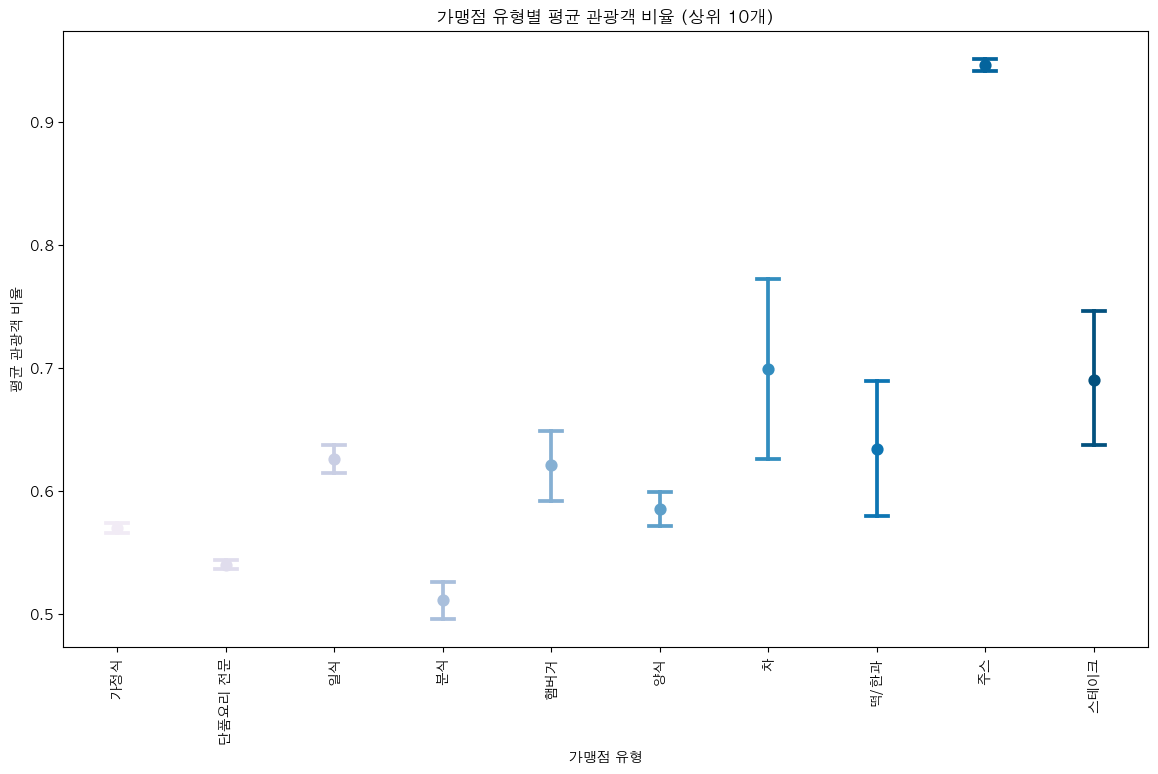

In [21]:
# 5. 가맹점 유형별 관광객 비율 (명목형 범주, 많은 범주) - Point plot
plt.figure(figsize=(14, 8))
top_types = mct_data.groupby('MCT_TYPE')['TOURIST_RATIO'].mean().sort_values(ascending=False).head(10).index
sns.pointplot(x='MCT_TYPE', y='TOURIST_RATIO', 
             data=mct_data[mct_data['MCT_TYPE'].isin(top_types)],
             capsize=0.2, palette='PuBu')
plt.title('가맹점 유형별 평균 관광객 비율 (상위 10개)')
plt.xlabel('가맹점 유형')
plt.ylabel('평균 관광객 비율')
plt.xticks(rotation=90)
plt.show()

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_80603/3219508681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='USE_AMOUNT_GROUP', y='TOURIST_RATIO',


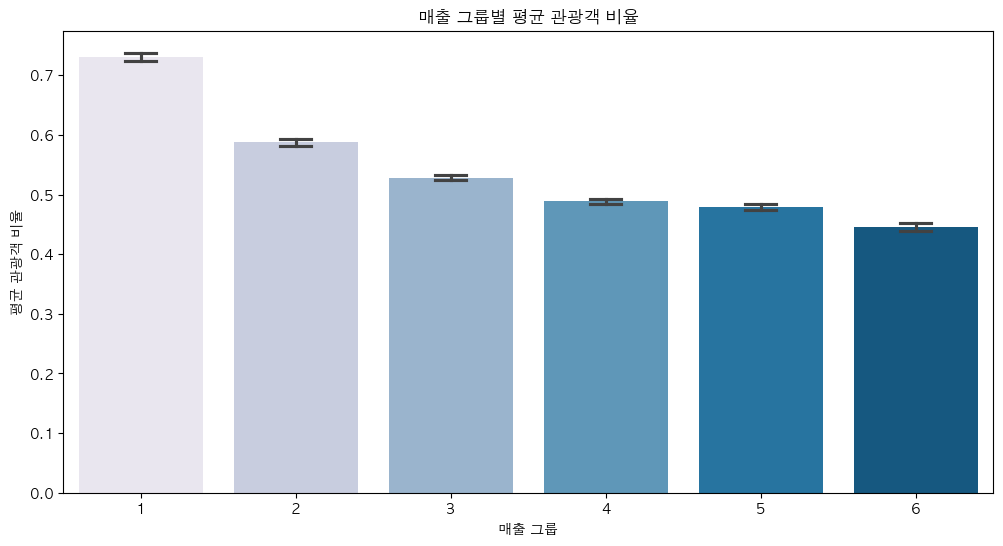

In [22]:
# 6. 매출 그룹별 관광객 비율 (순서형 범주) - Bar plot + Error bar
plt.figure(figsize=(12, 6))
sns.barplot(x='USE_AMOUNT_GROUP', y='TOURIST_RATIO', 
           data=mct_data.dropna(subset=['USE_AMOUNT_GROUP']),
           capsize=0.2, palette='PuBu')
plt.title('매출 그룹별 평균 관광객 비율')
plt.xlabel('매출 그룹')
plt.ylabel('평균 관광객 비율')
plt.show()

In [23]:
mct_data.columns

Index(['YM', 'MCT_NM', 'OP_YMD', 'MCT_TYPE', 'ADDR', 'UE_CNT_GRP',
       'UE_AMT_GRP', 'UE_AMT_PER_TRSN_GRP', 'MON_UE_CNT_RAT', 'TUE_UE_CNT_RAT',
       'WED_UE_CNT_RAT', 'THU_UE_CNT_RAT', 'FRI_UE_CNT_RAT', 'SAT_UE_CNT_RAT',
       'SUN_UE_CNT_RAT', 'HR_5_11_UE_CNT_RAT', 'HR_12_13_UE_CNT_RAT',
       'HR_14_17_UE_CNT_RAT', 'HR_18_22_UE_CNT_RAT', 'HR_23_4_UE_CNT_RAT',
       'LOCAL_UE_CNT_RAT', 'RC_M12_MAL_CUS_CNT_RAT', 'RC_M12_FME_CUS_CNT_RAT',
       'RC_M12_AGE_UND_20_CUS_CNT_RAT', 'RC_M12_AGE_30_CUS_CNT_RAT',
       'RC_M12_AGE_40_CUS_CNT_RAT', 'RC_M12_AGE_50_CUS_CNT_RAT',
       'RC_M12_AGE_OVR_60_CUS_CNT_RAT', 'REGION', 'REGION_Unknown',
       'REGION_서귀포시', 'REGION_제주시', 'YEAR', 'MONTH', 'SEASON',
       'USE_COUNT_GROUP', 'USE_AMOUNT_GROUP', 'UE_AMOUNT_PER_GRUOP',
       'MCT_TYPE_가정식', 'MCT_TYPE_구내식당/푸드코트', 'MCT_TYPE_기사식당',
       'MCT_TYPE_기타세계요리', 'MCT_TYPE_꼬치구이', 'MCT_TYPE_단품요리 전문', 'MCT_TYPE_도너츠',
       'MCT_TYPE_도시락', 'MCT_TYPE_동남아/인도음식', 'MCT_TYPE_떡/한과',
       'MCT_TY

In [25]:
# 한글 변수명으로 매핑한 딕셔너리 생성
korean_labels = {
    'RC_M12_AGE_UND_20_CUS_CNT_RAT': '20대 이하 비율',
    'RC_M12_AGE_30_CUS_CNT_RAT': '30대 비율',
    'RC_M12_AGE_40_CUS_CNT_RAT': '40대 비율',
    'RC_M12_AGE_50_CUS_CNT_RAT': '50대 비율',
    'RC_M12_AGE_OVR_60_CUS_CNT_RAT': '60대 이상 비율',
    'USE_AMOUNT_GROUP': '매출 그룹'
}

# 상관 행렬 생성
corr_matrix = mct_data[key_vars].corr()

# 한글 레이블로 인덱스 및 컬럼 변경
corr_matrix_korean = corr_matrix.rename(index=korean_labels, columns=korean_labels)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_korean, annot=True, cmap='PuBu', fmt='.2f')
plt.title('주요 변수 간 상관관계')
plt.tight_layout()
plt.show()


NameError: name 'key_vars' is not defined

## 심층 분석(RandomForestRegressor)

### 2.1 관광객 비율에 영향을 미치는 요인 분석

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 분석에 사용할 특성 선택
features = [
    # 요일별 이용 비율
    'MON_UE_CNT_RAT', 'TUE_UE_CNT_RAT', 'WED_UE_CNT_RAT', 
    'THU_UE_CNT_RAT', 'FRI_UE_CNT_RAT', 'SAT_UE_CNT_RAT', 'SUN_UE_CNT_RAT',
    
    # 시간대별 이용 비율
    'HR_5_11_UE_CNT_RAT', 'HR_12_13_UE_CNT_RAT', 'HR_14_17_UE_CNT_RAT',
    'HR_18_22_UE_CNT_RAT', 'HR_23_4_UE_CNT_RAT',
    
    # 고객 특성
    'RC_M12_MAL_CUS_CNT_RAT', 'RC_M12_FME_CUS_CNT_RAT',
    'RC_M12_AGE_UND_20_CUS_CNT_RAT', 'RC_M12_AGE_30_CUS_CNT_RAT',
    'RC_M12_AGE_40_CUS_CNT_RAT', 'RC_M12_AGE_50_CUS_CNT_RAT',
    'RC_M12_AGE_OVR_60_CUS_CNT_RAT',
     
    # 업장 특성
    'BUSINESS_YEARS',
    'USE_AMOUNT_GROUP',
    'USE_COUNT_GROUP',
    
    # 지역 더미 (하나만 선택)
    'REGION_제주시',
    
    # 계절 더미
    'SEASON_encoded',
    
    # 업종 더미
    'MCT_TYPE_가정식', 'MCT_TYPE_구내식당/푸드코트', 'MCT_TYPE_기타세계요리',
    'MCT_TYPE_단품요리 전문', 'MCT_TYPE_도시락', 'MCT_TYPE_동남아/인도음식',
    'MCT_TYPE_맥주/요리주점', 'MCT_TYPE_베이커리', 'MCT_TYPE_부페',
    'MCT_TYPE_분식', 'MCT_TYPE_스테이크', 'MCT_TYPE_양식', 'MCT_TYPE_일식',
    'MCT_TYPE_중식', 'MCT_TYPE_커피', 'MCT_TYPE_패밀리 레스토랑'
]

# 결측치가 있는 행 제거
model_data = mct_data.dropna(subset=features + ['TOURIST_RATIO'])

In [17]:
# 특성과 타겟 분리
X = model_data[features]
y = model_data['TOURIST_RATIO']

# 훈련/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.1233
R²: 0.8300


In [18]:
# 특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n특성 중요도 (상위 20개):")
print(feature_importance.head(20))


특성 중요도 (상위 20개):
                          feature  importance
16      RC_M12_AGE_40_CUS_CNT_RAT    0.158438
12         RC_M12_MAL_CUS_CNT_RAT    0.086169
13         RC_M12_FME_CUS_CNT_RAT    0.079045
22                     REGION_제주시    0.077275
14  RC_M12_AGE_UND_20_CUS_CNT_RAT    0.074883
15      RC_M12_AGE_30_CUS_CNT_RAT    0.060311
19                 BUSINESS_YEARS    0.051843
11             HR_23_4_UE_CNT_RAT    0.040943
18  RC_M12_AGE_OVR_60_CUS_CNT_RAT    0.040016
17      RC_M12_AGE_50_CUS_CNT_RAT    0.038949
10            HR_18_22_UE_CNT_RAT    0.035252
9             HR_14_17_UE_CNT_RAT    0.034222
20               USE_AMOUNT_GROUP    0.024703
8             HR_12_13_UE_CNT_RAT    0.024067
7              HR_5_11_UE_CNT_RAT    0.022530
6                  SUN_UE_CNT_RAT    0.020755
21                USE_COUNT_GROUP    0.016585
38                    MCT_TYPE_커피    0.015663
2                  WED_UE_CNT_RAT    0.013593
0                  MON_UE_CNT_RAT    0.013522


In [19]:
feature_importance.sort_values(by='importance', ascending=False)['feature'][:20]

16        RC_M12_AGE_40_CUS_CNT_RAT
12           RC_M12_MAL_CUS_CNT_RAT
13           RC_M12_FME_CUS_CNT_RAT
22                       REGION_제주시
14    RC_M12_AGE_UND_20_CUS_CNT_RAT
15        RC_M12_AGE_30_CUS_CNT_RAT
19                   BUSINESS_YEARS
11               HR_23_4_UE_CNT_RAT
18    RC_M12_AGE_OVR_60_CUS_CNT_RAT
17        RC_M12_AGE_50_CUS_CNT_RAT
10              HR_18_22_UE_CNT_RAT
9               HR_14_17_UE_CNT_RAT
20                 USE_AMOUNT_GROUP
8               HR_12_13_UE_CNT_RAT
7                HR_5_11_UE_CNT_RAT
6                    SUN_UE_CNT_RAT
21                  USE_COUNT_GROUP
38                      MCT_TYPE_커피
2                    WED_UE_CNT_RAT
0                    MON_UE_CNT_RAT
Name: feature, dtype: object

In [20]:
# 특성 중요도 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('관광객 비율에 영향을 미치는 주요 특성 (상위 20개)')
plt.xlabel('중요도')
plt.ylabel('특성')
plt.tight_layout()
plt.show()

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_78149/1527019633.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [199]:
# 상관관계가 ±0.2 이상인 특성 추출하여 랜덤포레스트 모델링 -> 이렇게 핵심 변수로만 모델링하면, 불필요한 잡음(noise)을 줄이고 효율적이고 해석 가능한 모델을 얻을 수 있습니다.
selected_features = [
    'HR_14_17_UE_CNT_RAT',
    'RC_M12_AGE_UND_20_CUS_CNT_RAT',
    'RC_M12_AGE_40_CUS_CNT_RAT',
    'USE_AMOUNT_GROUP',
    'HR_23_4_UE_CNT_RAT'
]

X = model_data[selected_features]
y = model_data['TOURIST_RATIO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.2276
R²: 0.4202


In [27]:
# Feature Importanced 상위 20개 추출
selected_features = [
    'RC_M12_AGE_40_CUS_CNT_RAT',
    'RC_M12_MAL_CUS_CNT_RAT',
    'RC_M12_FME_CUS_CNT_RAT',
    'REGION_제주시',
    'RC_M12_AGE_UND_20_CUS_CNT_RAT',
    'RC_M12_AGE_30_CUS_CNT_RAT',
    'BUSINESS_YEARS',
    'HR_23_4_UE_CNT_RAT',
    'RC_M12_AGE_OVR_60_CUS_CNT_RAT',
    'RC_M12_AGE_50_CUS_CNT_RAT',
    'HR_18_22_UE_CNT_RAT',
    'HR_14_17_UE_CNT_RAT',
    'USE_AMOUNT_GROUP',
    'HR_12_13_UE_CNT_RAT',
    'HR_5_11_UE_CNT_RAT',
    'SUN_UE_CNT_RAT',
    'USE_COUNT_GROUP',
    'MCT_TYPE_커피',
    'WED_UE_CNT_RAT',
    'MON_UE_CNT_RAT'
]

X = model_data[selected_features]
y = model_data['TOURIST_RATIO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.1226
R²: 0.8319


In [200]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    'n_estimators': range(50, 300, 10),
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=30,  # 보통 20~50회 사이에서 설정
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best RMSE:", np.sqrt(-random_search.best_score_))

Best parameters: {'n_estimators': 260, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 20}
Best RMSE: 0.22543322774441876


In [211]:
# 최적 하이퍼파라미터를 사용한 최종 모델 학습
final_rf = RandomForestRegressor(
    n_estimators=260,
    max_depth=20,
    min_samples_split=9,
    min_samples_leaf=5,
    max_features='sqrt',  # 추천값: sqrt / None / 0.5 중 하나
    random_state=42,
    n_jobs=-1  # 추가적으로 병렬처리 활성화
)

final_rf.fit(X_train, y_train)

# 평가
y_pred = final_rf.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_r2 = r2_score(y_test, y_pred)

print(f"최종 모델 RMSE: {final_rmse:.4f}")
print(f"최종 모델 R²: {final_r2:.4f}")


최종 모델 RMSE: 0.1424
최종 모델 R²: 0.7730



이렇게 하면 모델 예측 정확도를 더욱 높일 수 있습니다.

---

 🎯 **예상되는 인사이트 및 전략 활용 예시**

- **40대 이상 고객층 중심의 가맹점**은 현지인 방문이 주를 이루므로, 관광 마케팅에서 후순위로 둘 수 있습니다.
- **20대 이하 고객 비율이 높은 가맹점**은 관광객 비율이 높으므로, 관광객을 위한 특별 이벤트 프로모션이나 콘텐츠를 기획하면 좋습니다.
- **오후(14~17시)** 시간대에 방문 비율이 높은 가맹점은 관광 수요가 강력하므로, 관광객 유입을 위한 프로모션을 적극적으로 진행하면 효과적일 수 있습니다.
- **야간(23~4시)** 이용 비율이 높은 가맹점은 관광객 유입률이 상대적으로 낮아 현지인 중심 마케팅이 적합합니다.

---

📍 결론 및 최적의 접근법

1. **상관관계 분석**으로 중요 변수를 추리고,  
2. 이를 활용한 **랜덤포레스트 회귀 모델**로 관광객 비율 예측 모델 구축
3. **하이퍼파라미터 튜닝**을 수행해 최적화
4. **최적 모델을 통해 얻은 인사이트로 관광객 대상 마케팅 전략 수립**

이 프로세스를 통해 효과적이고 효율적인 분석과 인사이트 도출이 가능합니다! 🚀📈

RandomForest RMSE: 0.1233, R²: 0.8300
GradientBoosting RMSE: 0.1896, R²: 0.5977
LinearRegression RMSE: 0.2240, R²: 0.4386
Ridge RMSE: 0.2240, R²: 0.4386
Lasso RMSE: 0.2990, R²: -0.0003


In [140]:
# 분류로 진행시(참고)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 관광객 비율을 이진화
y_binary = (y >= 0.5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 분류 모델 사용 (RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# 예측
y_pred = rf_clf.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall): {recall:.4f}")
print(f"F1-score: {f1:.4f}")


정확도 (Accuracy): 0.9177
정밀도 (Precision): 0.9410
재현율 (Recall): 0.8935
F1-score: 0.9167


### 2.2 업력과 관광객 비율의 관계 분석

업력 구간별 관광객 비율:
                    count      mean       std  min       max
BUSINESS_AGE_GROUP                                          
1년 미만                5168  0.472505  0.289656  0.0  1.000000
1~3년                17191  0.546727  0.294244  0.0  1.000000
3~5년                14079  0.554460  0.298619  0.0  1.000000
5~10년               19327  0.544203  0.303925  0.0  1.000000
10년 이상              12099  0.490523  0.290079  0.0  0.993289


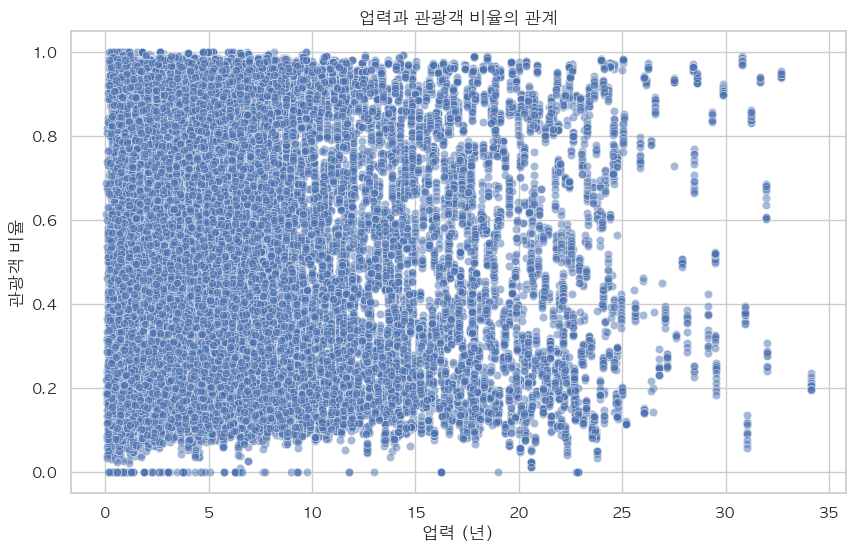

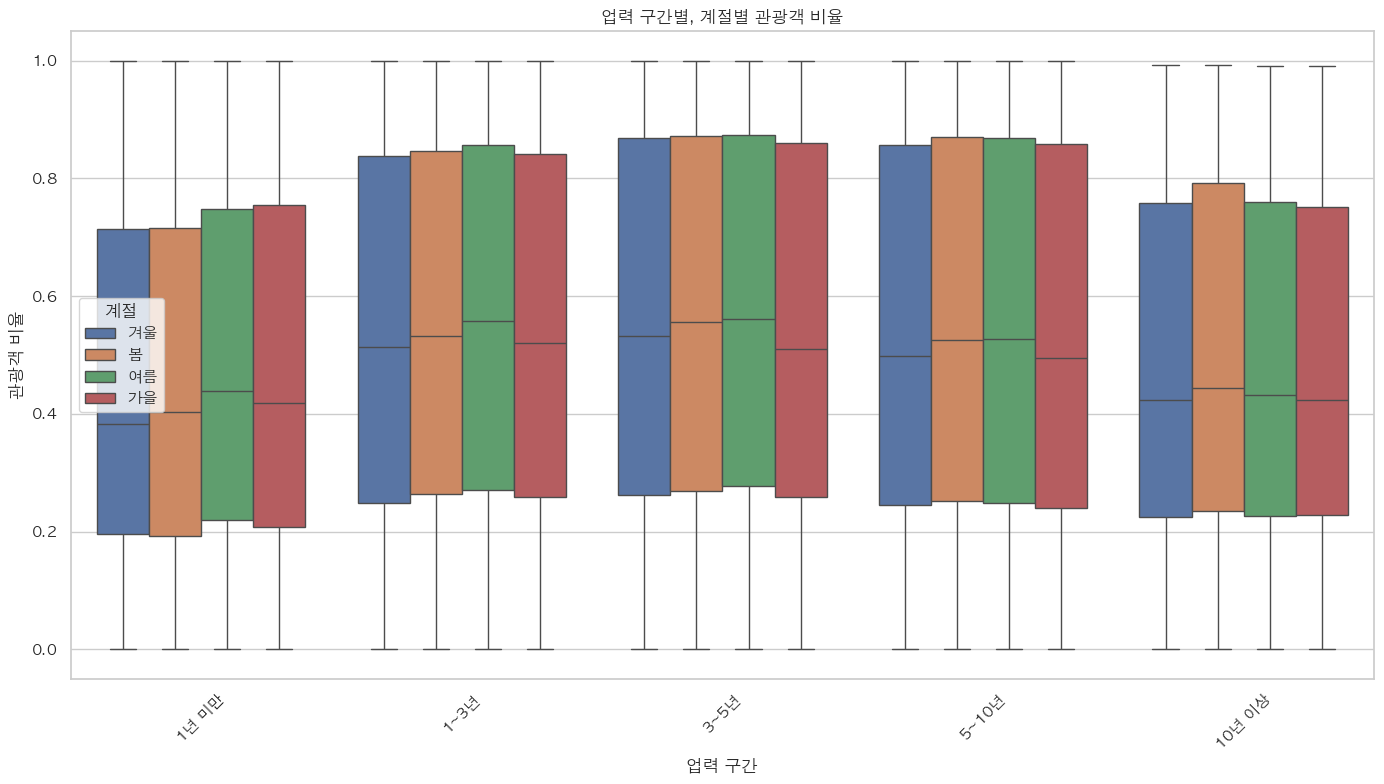

In [294]:
# 업력 구간별 관광객 비율 통계
business_age_stats = mct_data.groupby('BUSINESS_AGE_GROUP')['TOURIST_RATIO'].agg(['count', 'mean', 'std', 'min', 'max'])
print("업력 구간별 관광객 비율:")
print(business_age_stats)

# 업력과 관광객 비율의 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BUSINESS_YEARS', y='TOURIST_RATIO', data=mct_data, alpha=0.5)
plt.title('업력과 관광객 비율의 관계')
plt.xlabel('업력 (년)')
plt.ylabel('관광객 비율')
plt.show()

# 업력 구간별, 계절별 관광객 비율
plt.figure(figsize=(14, 8))
sns.boxplot(x='BUSINESS_AGE_GROUP', y='TOURIST_RATIO', hue='SEASON', data=mct_data)
plt.title('업력 구간별, 계절별 관광객 비율')
plt.xlabel('업력 구간')
plt.ylabel('관광객 비율')
plt.xticks(rotation=45)
plt.legend(title='계절')
plt.tight_layout()
plt.show()

### 2.3 매출 그룹과 관광객 비율의 관계 분석

매출 그룹별 관광객 비율:
                  count      mean       std  min  max
USE_AMOUNT_GROUP                                     
1                  6790  0.731597  0.280156  0.0  1.0
2                 10177  0.587585  0.302704  0.0  1.0
3                 16961  0.527846  0.293440  0.0  1.0
4                 16958  0.488692  0.285049  0.0  1.0
5                 10183  0.479790  0.279736  0.0  1.0
6                  6795  0.445392  0.276700  0.0  1.0


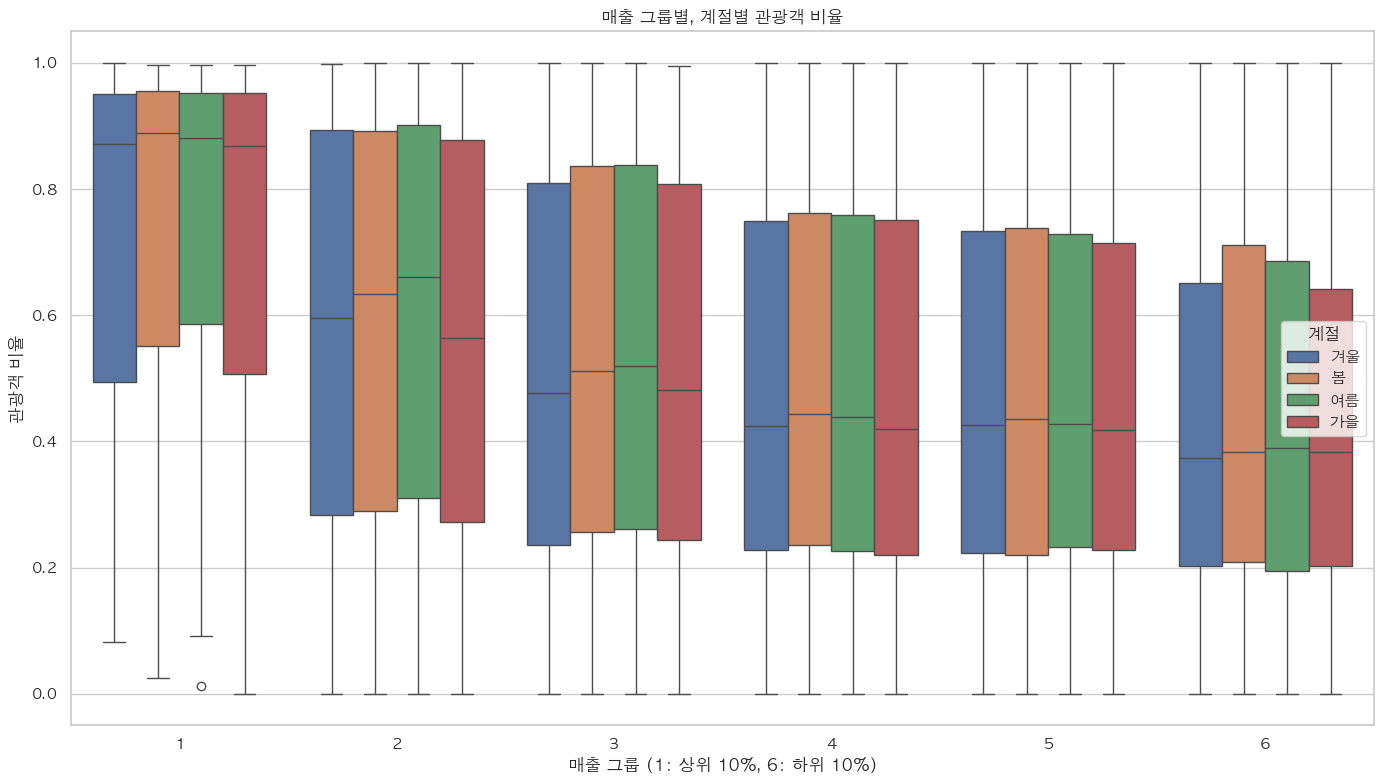

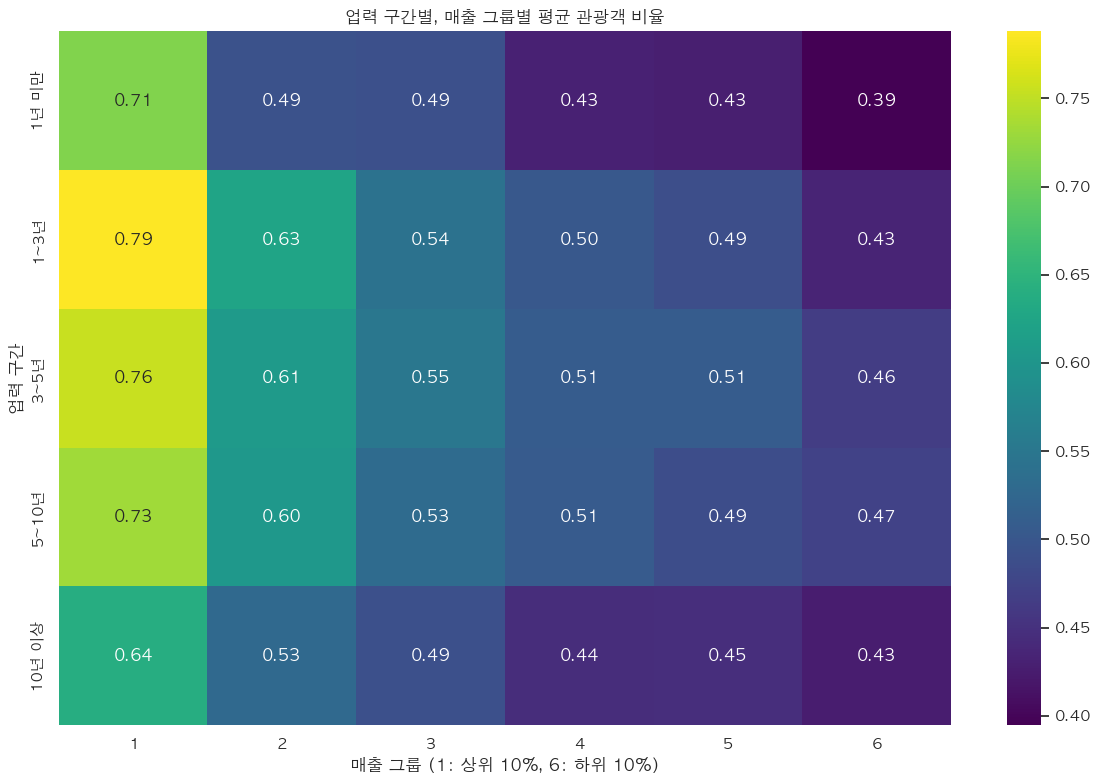

In [295]:
# 매출 그룹별 관광객 비율 통계
sales_group_stats = mct_data.groupby('USE_AMOUNT_GROUP')['TOURIST_RATIO'].agg(['count', 'mean', 'std', 'min', 'max'])
print("매출 그룹별 관광객 비율:")
print(sales_group_stats)

# 매출 그룹별, 계절별 관광객 비율
plt.figure(figsize=(14, 8))
sns.boxplot(x='USE_AMOUNT_GROUP', y='TOURIST_RATIO', hue='SEASON', 
            data=mct_data.dropna(subset=['USE_AMOUNT_GROUP']))
plt.title('매출 그룹별, 계절별 관광객 비율')
plt.xlabel('매출 그룹 (1: 상위 10%, 6: 하위 10%)')
plt.ylabel('관광객 비율')
plt.legend(title='계절')
plt.tight_layout()
plt.show()

# 매출 그룹별, 업력 구간별 관광객 비율 (히트맵)
pivot_table = pd.pivot_table(
    mct_data.dropna(subset=['USE_AMOUNT_GROUP']), 
    values='TOURIST_RATIO',
    index='BUSINESS_AGE_GROUP',
    columns='USE_AMOUNT_GROUP',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='viridis')
plt.title('업력 구간별, 매출 그룹별 평균 관광객 비율')
plt.xlabel('매출 그룹 (1: 상위 10%, 6: 하위 10%)')
plt.ylabel('업력 구간')
plt.tight_layout()
plt.show()

### 2.4 가맹점 유형별 분석

가맹점 유형별 관광객 비율 (상위 10개):
          count      mean       std
MCT_TYPE                           
주스           87  0.946014  0.023263
차            64  0.699341  0.289442
스테이크         34  0.690484  0.159229
떡/한과        156  0.634049  0.352857
일식         2002  0.626384  0.270275
햄버거         345  0.621719  0.270290
양식         1709  0.585219  0.291023
가정식       23619  0.570013  0.300744
단품요리 전문   24948  0.540512  0.300396
분식         1794  0.511455  0.318708

가맹점 유형별 평균 업력 (상위 10개):
MCT_TYPE
야식          14.615430
민속주점        13.641715
기사식당        12.711219
포장마차        12.324355
패밀리 레스토랑     7.823894
동남아/인도음식     7.553941
떡/한과         7.511574
가정식          7.118704
중식           6.891124
일식           6.696091
Name: BUSINESS_YEARS, dtype: float64

가맹점 유형별 매출 그룹 분포 (상위 5개 유형):
USE_AMOUNT_GROUP          1          2          3          4          5  \
MCT_TYPE                                                                  
가정식               10.817562  14.784707  24.061137  25.111139  15.703459 

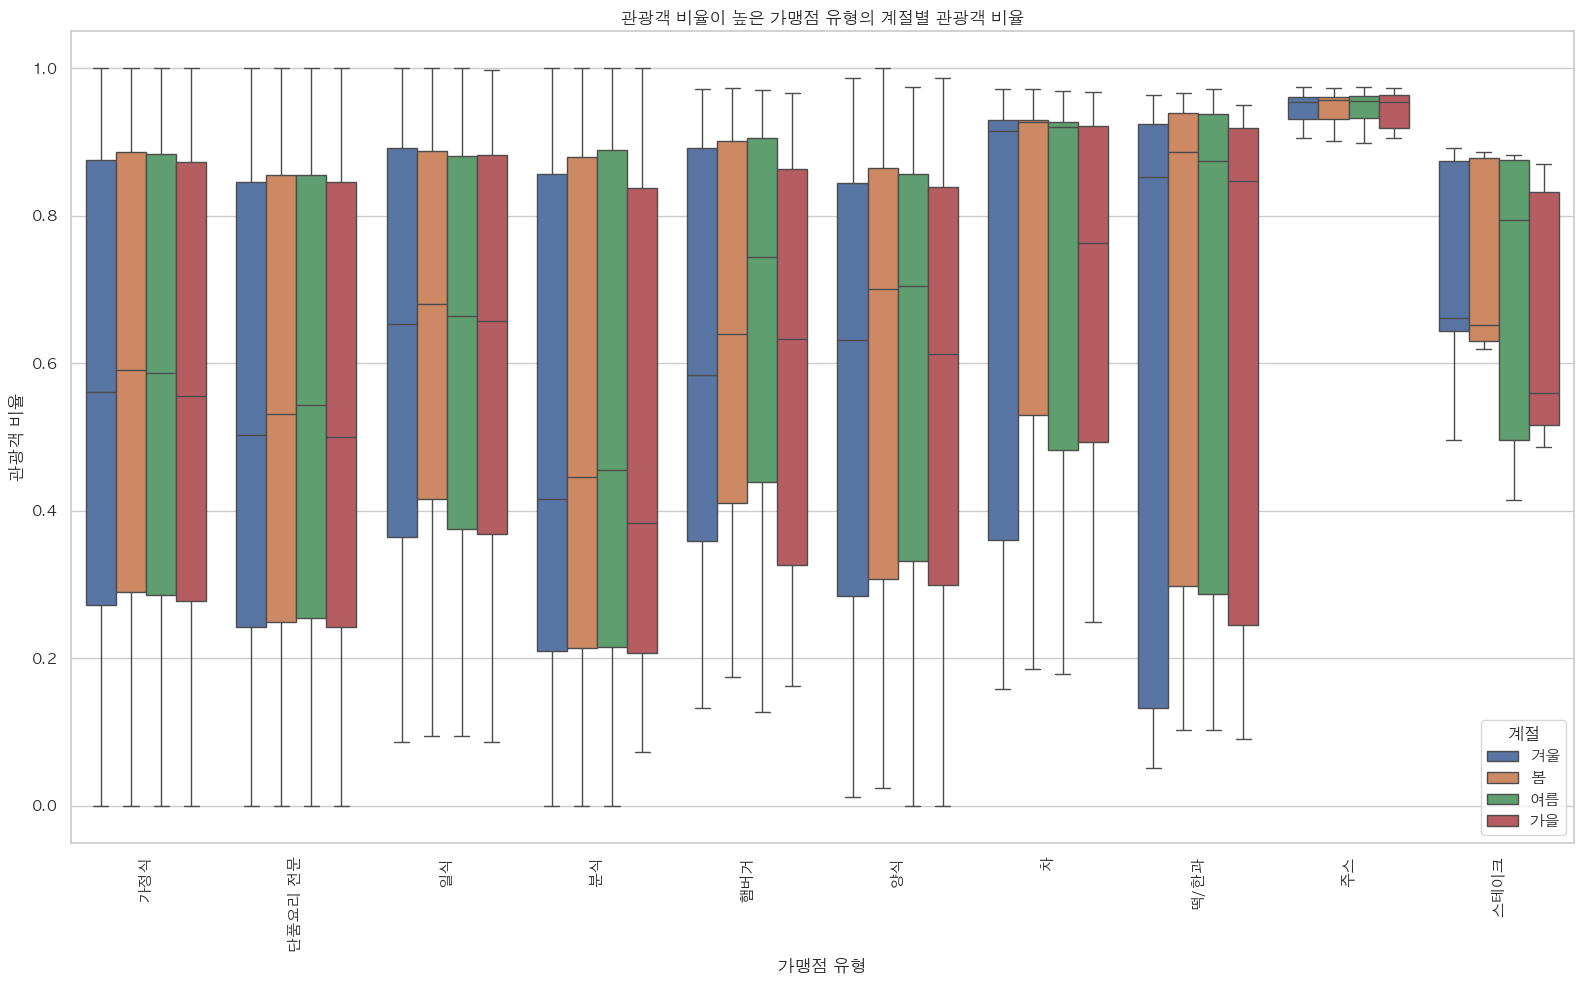

In [296]:
# 가맹점 유형별 관광객 비율 통계
mct_type_stats = mct_data.groupby('MCT_TYPE')['TOURIST_RATIO'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)
print("가맹점 유형별 관광객 비율 (상위 10개):")
print(mct_type_stats.head(10))

# 가맹점 유형별 업력 통계
mct_type_age = mct_data.groupby('MCT_TYPE')['BUSINESS_YEARS'].mean().sort_values(ascending=False)
print("\n가맹점 유형별 평균 업력 (상위 10개):")
print(mct_type_age.head(10))

# 가맹점 유형별 매출 그룹 분포
mct_type_sales = pd.crosstab(
    mct_data['MCT_TYPE'], 
    mct_data['USE_AMOUNT_GROUP'],
    normalize='index',
    values=mct_data['USE_AMOUNT_GROUP'],
    aggfunc='count'
) * 100

print("\n가맹점 유형별 매출 그룹 분포 (상위 5개 유형):")
print(mct_type_sales.head(5))

# 관광객 비율이 높은 상위 10개 가맹점 유형의 계절별 관광객 비율
top_types = mct_type_stats.head(10).index
plt.figure(figsize=(16, 10))
sns.boxplot(x='MCT_TYPE', y='TOURIST_RATIO', hue='SEASON', 
            data=mct_data[mct_data['MCT_TYPE'].isin(top_types)])
plt.title('관광객 비율이 높은 가맹점 유형의 계절별 관광객 비율')
plt.xlabel('가맹점 유형')
plt.ylabel('관광객 비율')
plt.xticks(rotation=90)
plt.legend(title='계절')
plt.tight_layout()
plt.show()

### 3. 시간대별 및 요일별 분석
### 3.1 시간대별 관광객 비율 분석

시간대별 관광객 비율과의 상관관계:
14시~17시    0.291053
05시~11시    0.101078
12시~13시    0.089956
18시~22시   -0.146076
23시~04시   -0.197311
Name: TOURIST_RATIO, dtype: float64


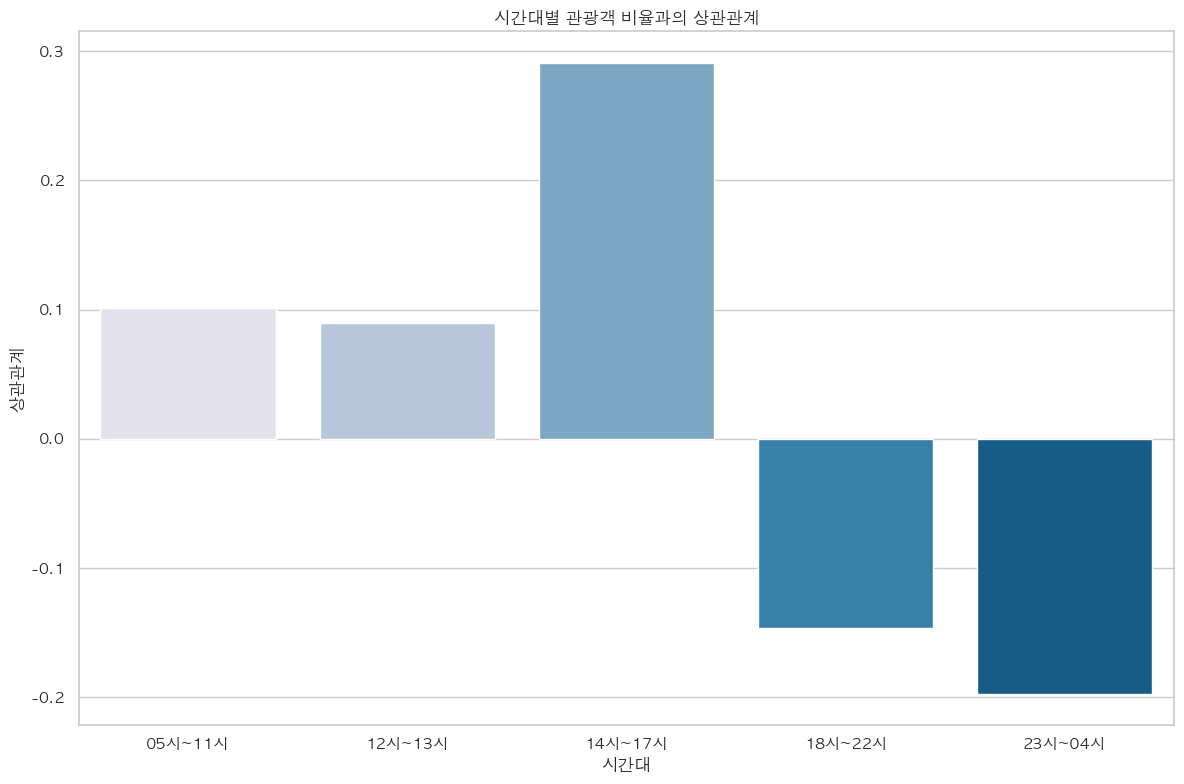

In [362]:
# 올바른 예시
time_corr = mct_data[['HR_5_11_UE_CNT_RAT', 'HR_12_13_UE_CNT_RAT', 
                      'HR_14_17_UE_CNT_RAT', 'HR_18_22_UE_CNT_RAT', 'HR_23_4_UE_CNT_RAT', 
                      'TOURIST_RATIO']].corr()['TOURIST_RATIO'].drop('TOURIST_RATIO')

# 컬럼명 변경
time_corr.index = ['05시~11시', '12시~13시', '14시~17시', '18시~22시', '23시~04시']

# 결과 출력
print("시간대별 관광객 비율과의 상관관계:")
print(time_corr.sort_values(ascending=False))

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=time_corr.index, y=time_corr.values, palette='PuBu')
plt.title('시간대별 관광객 비율과의 상관관계')
plt.xlabel('시간대')
plt.ylabel('상관관계')
plt.tight_layout()
plt.show()

시간대별 변수와 관광객 비율의 상관관계:
HR_14_17_UE_CNT_RAT    0.291053
HR_5_11_UE_CNT_RAT     0.101078
HR_12_13_UE_CNT_RAT    0.089956
HR_18_22_UE_CNT_RAT   -0.146076
HR_23_4_UE_CNT_RAT    -0.197311
Name: TOURIST_RATIO, dtype: float64


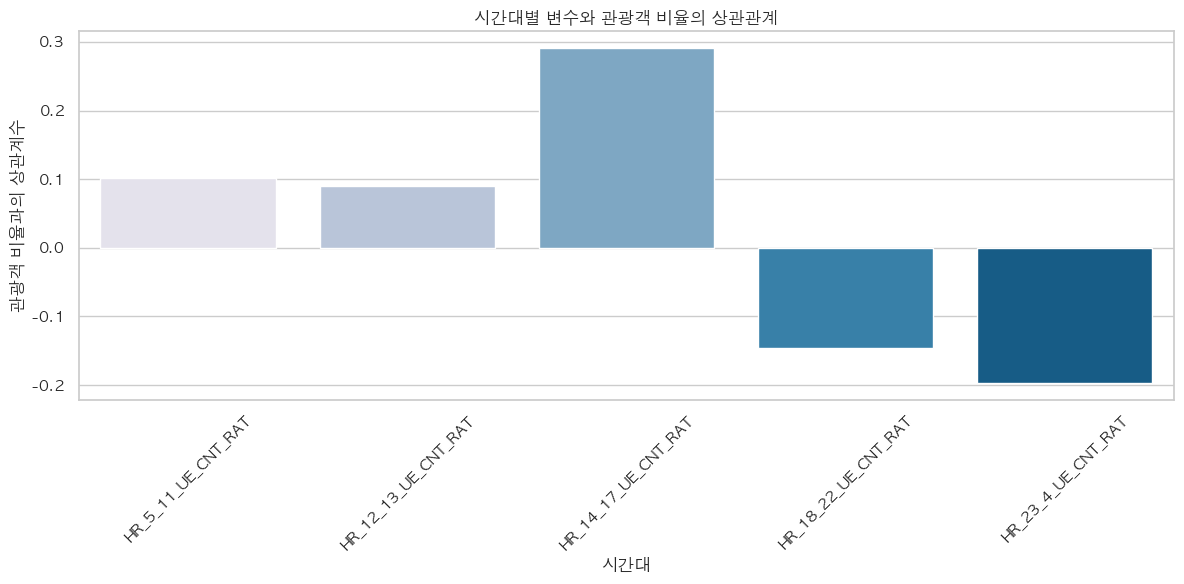


매출 그룹별 시간대 이용 비율:
                  HR_5_11_UE_CNT_RAT  HR_12_13_UE_CNT_RAT  \
USE_AMOUNT_GROUP                                            
1                           0.129449             0.195366   
2                           0.122738             0.195714   
3                           0.121896             0.205430   
4                           0.126142             0.208996   
5                           0.131811             0.219255   
6                           0.127645             0.199750   

                  HR_14_17_UE_CNT_RAT  HR_18_22_UE_CNT_RAT  HR_23_4_UE_CNT_RAT  
USE_AMOUNT_GROUP                                                                
1                            0.224360             0.424464            0.026361  
2                            0.195140             0.439351            0.047057  
3                            0.180714             0.432803            0.059158  
4                            0.176483             0.422136            0.066243  
5     

AttributeError: 'Text' object has no property 'pad'

<Figure size 1400x800 with 0 Axes>

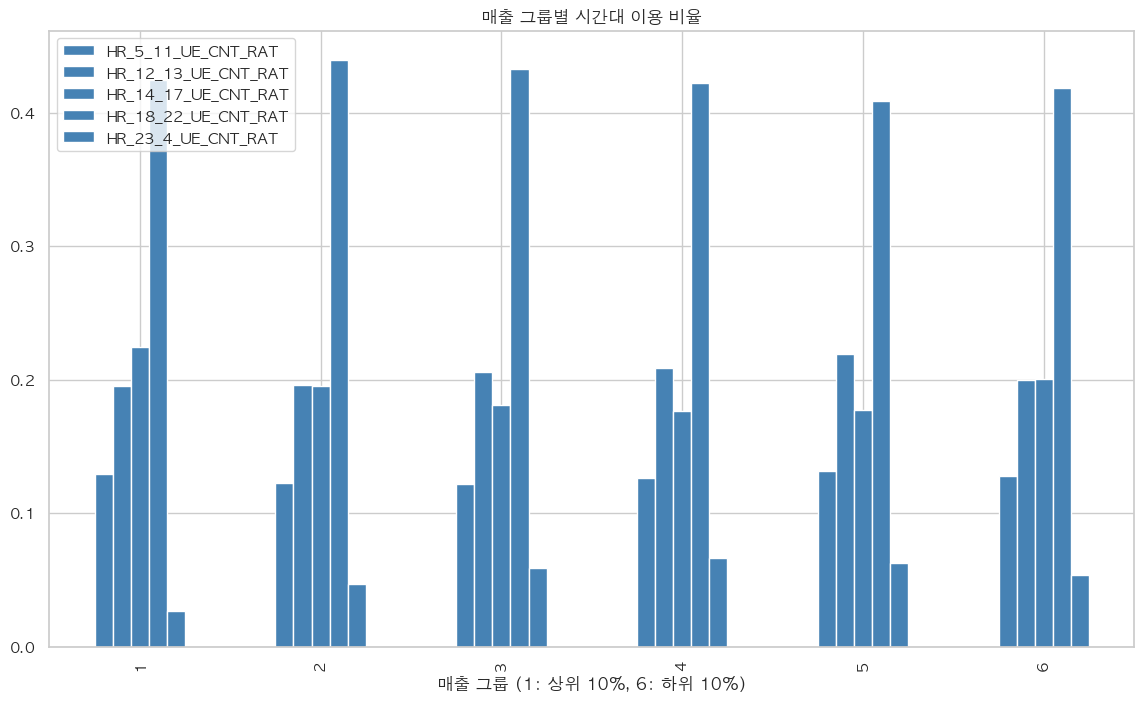

In [347]:
# 시간대별 변수와 관광객 비율의 상관관계
time_vars = ['HR_5_11_UE_CNT_RAT', 'HR_12_13_UE_CNT_RAT', 'HR_14_17_UE_CNT_RAT', 
             'HR_18_22_UE_CNT_RAT', 'HR_23_4_UE_CNT_RAT']
time_corr = mct_data[time_vars + ['TOURIST_RATIO']].corr()['TOURIST_RATIO'].drop('TOURIST_RATIO')
print("시간대별 변수와 관광객 비율의 상관관계:")
print(time_corr.sort_values(ascending=False))

# 시간대별 관광객 비율 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=time_corr.index, y=time_corr.values, palette='PuBu')
plt.title('시간대별 변수와 관광객 비율의 상관관계')
plt.xlabel('시간대')
plt.ylabel('관광객 비율과의 상관계수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 매출 그룹별 시간대 이용 비율
time_by_sales = mct_data.groupby('USE_AMOUNT_GROUP')[time_vars].mean()
print("\n매출 그룹별 시간대 이용 비율:")
print(time_by_sales)

# 시각화
plt.figure(figsize=(14, 8))
time_by_sales.plot(kind='bar', figsize=(14, 8), color='steelblue')
plt.title('매출 그룹별 시간대 이용 비율')
plt.xlabel('매출 그룹 (1: 상위 10%, 6: 하위 10%)', pad=20)
plt.ylabel('이용 비율')
plt.legend(title='시간대')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.2 요일별 관광객 비율 분석

In [ ]:
# 올바른 예시
time_corr = mct_data[['HR_5_11_UE_CNT_RAT', 'HR_12_13_UE_CNT_RAT', 
                      'HR_14_17_UE_CNT_RAT', 'HR_18_22_UE_CNT_RAT', 'HR_23_4_UE_CNT_RAT', 
                      'TOURIST_RATIO']].corr()['TOURIST_RATIO'].drop('TOURIST_RATIO')

# 컬럼명 변경
time_corr.index = ['05시~11시', '12시~13시', '14시~17시', '18시~22시', '23시~04시']

# 결과 출력
print("시간대별 관광객 비율과의 상관관계:")
print(time_corr.sort_values(ascending=False))

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=time_corr.index, y=time_corr.values, palette='PuBu')
plt.title('시간대별 관광객 비율과의 상관관계')
plt.xlabel('시간대')
plt.ylabel('상관관계')
plt.tight_layout()
plt.show()

요일별 변수와 관광객 비율의 상관관계:
SUN_UE_CNT_RAT    0.152249
SAT_UE_CNT_RAT    0.046140
MON_UE_CNT_RAT    0.044639
THU_UE_CNT_RAT   -0.054144
TUE_UE_CNT_RAT   -0.054225
FRI_UE_CNT_RAT   -0.078212
WED_UE_CNT_RAT   -0.092830
Name: TOURIST_RATIO, dtype: float64


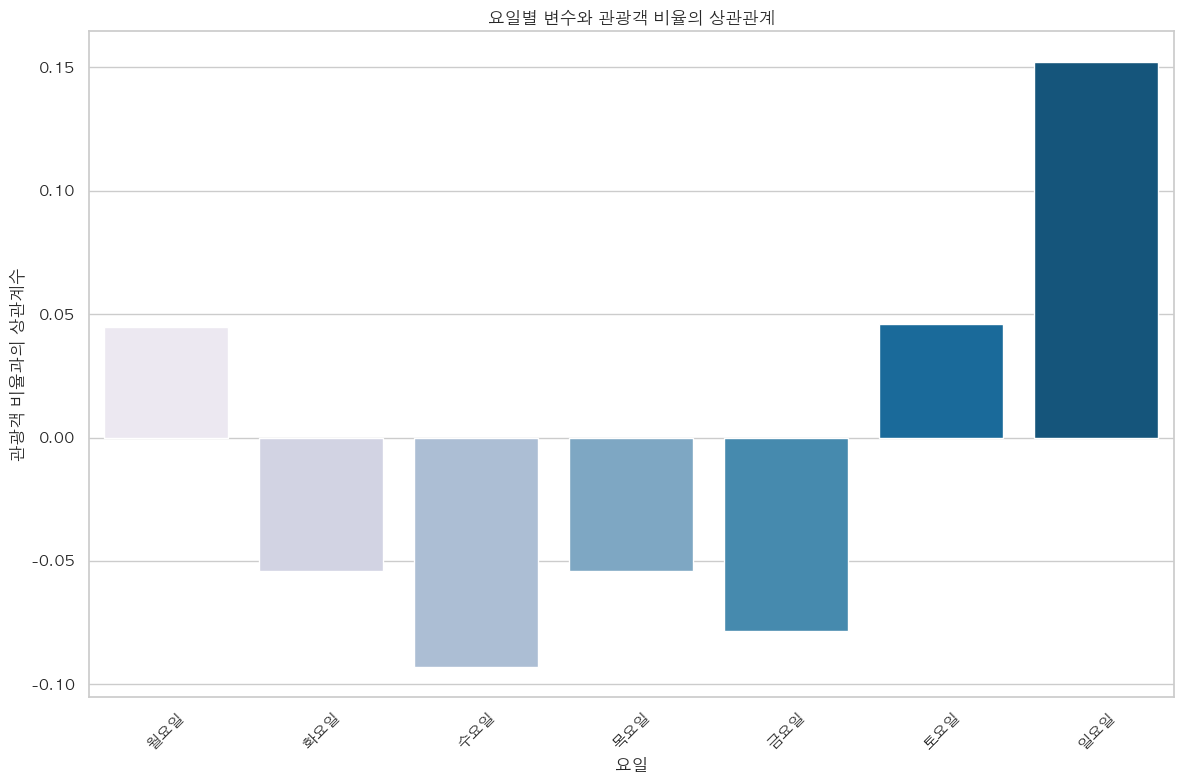


계절별 요일 이용 패턴:
        MON_UE_CNT_RAT  TUE_UE_CNT_RAT  WED_UE_CNT_RAT  THU_UE_CNT_RAT  \
SEASON                                                                   
가을            0.134314        0.132557        0.135109        0.136763   
겨울            0.138945        0.126188        0.130630        0.139334   
봄             0.132966        0.139989        0.131749        0.134971   
여름            0.133868        0.134785        0.144046        0.137782   

        FRI_UE_CNT_RAT  SAT_UE_CNT_RAT  SUN_UE_CNT_RAT  
SEASON                                                  
가을            0.146621        0.166323        0.148312  
겨울            0.149405        0.174058        0.141441  
봄             0.150090        0.164489        0.145746  
여름            0.147847        0.159673        0.141998  


<Figure size 1200x800 with 0 Axes>

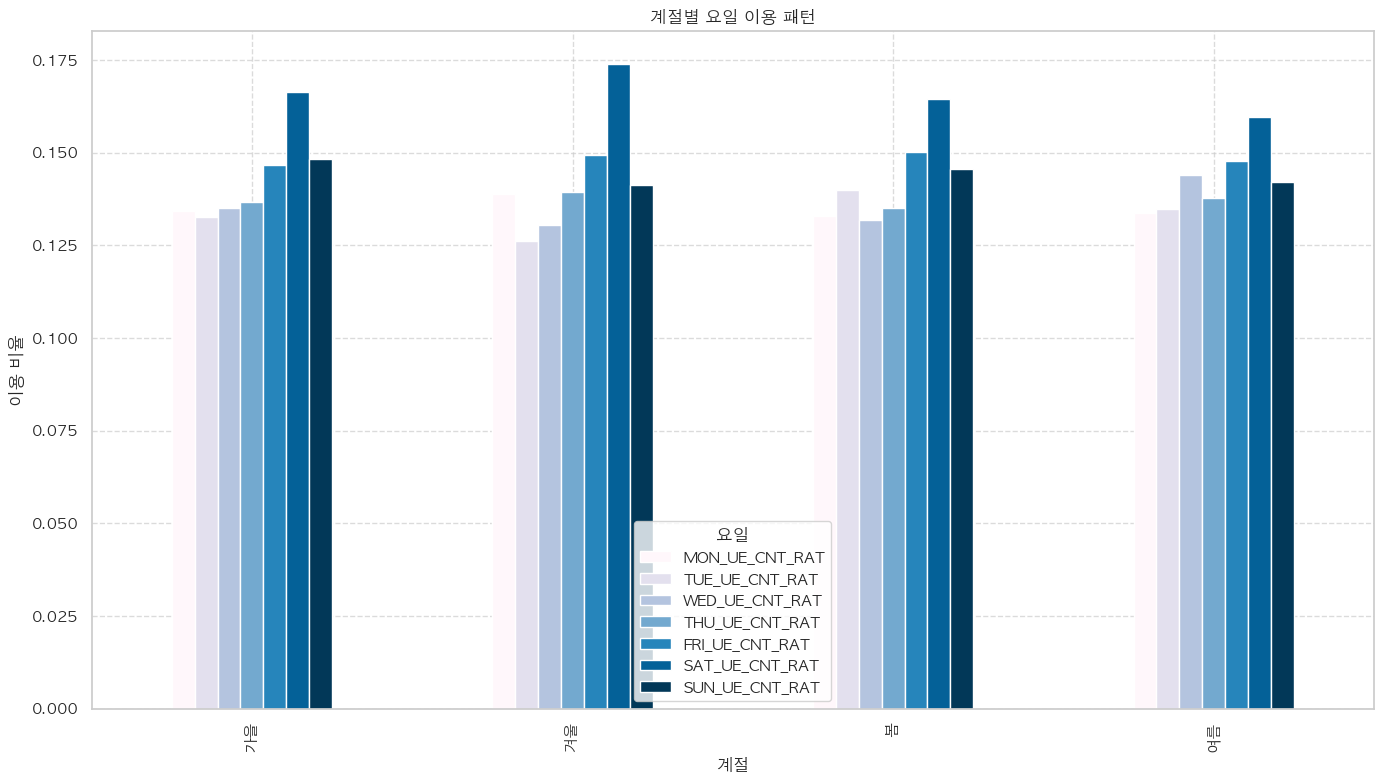

In [365]:
# 요일별 변수와 관광객 비율의 상관관계
day_vars = ['MON_UE_CNT_RAT', 'TUE_UE_CNT_RAT', 'WED_UE_CNT_RAT', 'THU_UE_CNT_RAT', 
            'FRI_UE_CNT_RAT', 'SAT_UE_CNT_RAT', 'SUN_UE_CNT_RAT']
day_corr = mct_data[day_vars + ['TOURIST_RATIO']].corr()['TOURIST_RATIO'].drop('TOURIST_RATIO')
print("요일별 변수와 관광객 비율의 상관관계:")
print(day_corr.sort_values(ascending=False))

# 컬럼명 변경
day_corr.index = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

# 요일별 관광객 비율 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=day_corr.index, y=day_corr.values, palette='PuBu')
plt.title('요일별 변수와 관광객 비율의 상관관계')
plt.xlabel('요일')
plt.ylabel('관광객 비율과의 상관계수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 계절별 요일 이용 패턴
day_by_season = mct_data.groupby('SEASON')[day_vars].mean()
print("\n계절별 요일 이용 패턴:")
print(day_by_season)

# 시각화
plt.figure(figsize=(12, 8))
day_by_season.plot(kind='bar', figsize=(14, 8), cmap='PuBu')
plt.title('계절별 요일 이용 패턴')
plt.xlabel('계절')
plt.ylabel('이용 비율')
plt.legend(title='요일')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. 고객 특성 분석
### 4.1 연령대별 관광객 비율 분석

연령대별 변수와 관광객 비율의 상관관계:
RC_M12_AGE_UND_20_CUS_CNT_RAT    0.275396
RC_M12_AGE_30_CUS_CNT_RAT        0.272405
RC_M12_AGE_OVR_60_CUS_CNT_RAT   -0.080759
RC_M12_AGE_50_CUS_CNT_RAT       -0.247266
RC_M12_AGE_40_CUS_CNT_RAT       -0.325028
Name: TOURIST_RATIO, dtype: float64


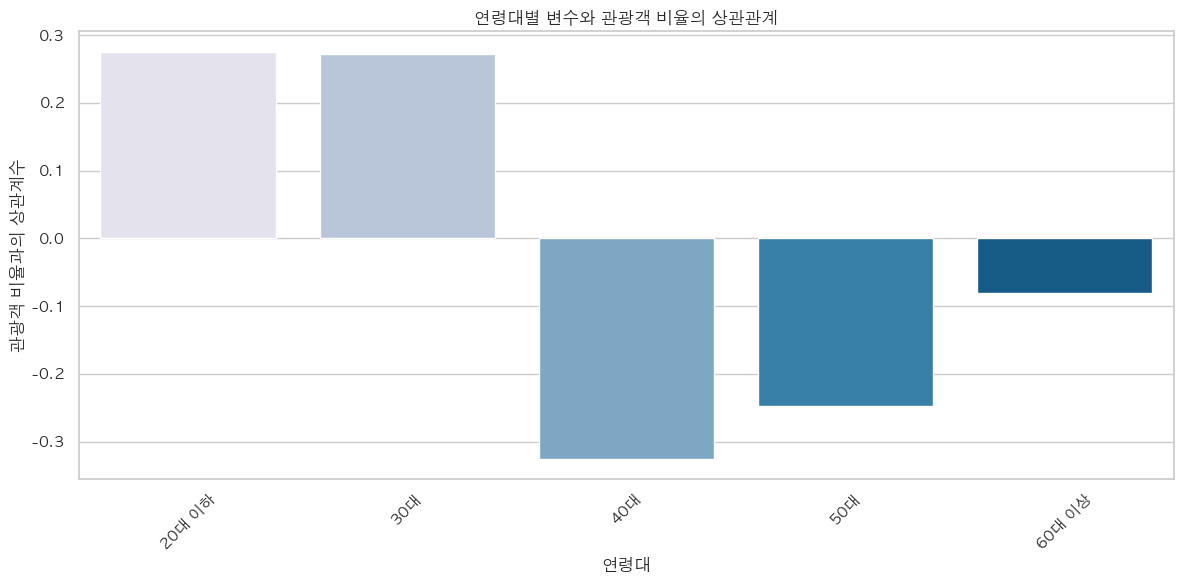


계절별 연령대 분포:
        RC_M12_AGE_UND_20_CUS_CNT_RAT  RC_M12_AGE_30_CUS_CNT_RAT  \
SEASON                                                             
가을                           0.152986                   0.243759   
겨울                           0.160348                   0.246828   
봄                            0.157022                   0.246832   
여름                           0.157501                   0.248170   

        RC_M12_AGE_40_CUS_CNT_RAT  RC_M12_AGE_50_CUS_CNT_RAT  \
SEASON                                                         
가을                       0.276235                   0.217250   
겨울                       0.277093                   0.212911   
봄                        0.276224                   0.213664   
여름                       0.276389                   0.211521   

        RC_M12_AGE_OVR_60_CUS_CNT_RAT  
SEASON                                 
가을                           0.109774  
겨울                           0.102824  
봄                            0.10

<Figure size 1200x800 with 0 Axes>

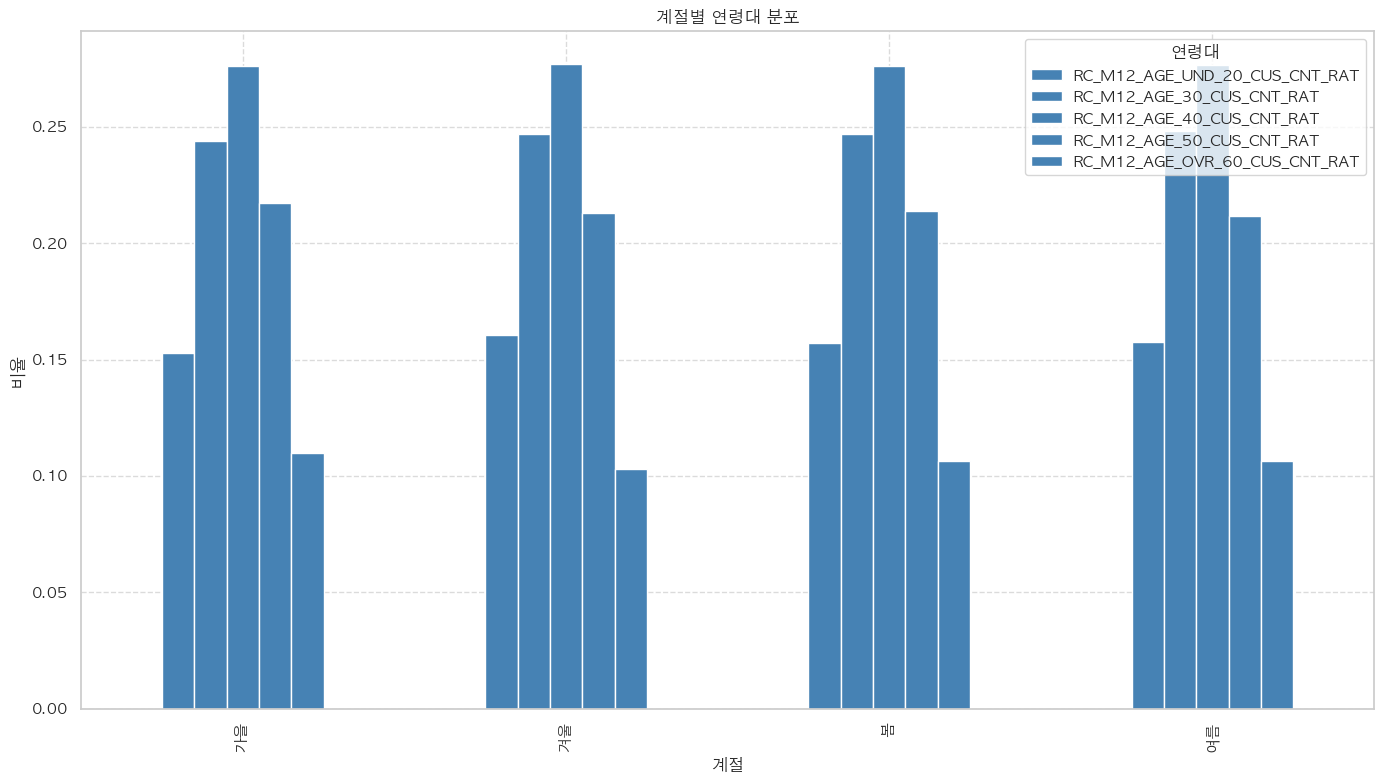


업력 구간별 연령대 분포:
                    RC_M12_AGE_UND_20_CUS_CNT_RAT  RC_M12_AGE_30_CUS_CNT_RAT  \
BUSINESS_AGE_GROUP                                                             
1년 미만                                    0.161929                   0.260604   
1~3년                                     0.177711                   0.265060   
3~5년                                     0.172114                   0.257056   
5~10년                                    0.152690                   0.242886   
10년 이상                                   0.114605                   0.207077   

                    RC_M12_AGE_40_CUS_CNT_RAT  RC_M12_AGE_50_CUS_CNT_RAT  \
BUSINESS_AGE_GROUP                                                         
1년 미만                                0.280886                   0.199782   
1~3년                                 0.276206                   0.193684   
3~5년                                 0.273037                   0.201570   
5~10년                                0.2811

<Figure size 1400x800 with 0 Axes>

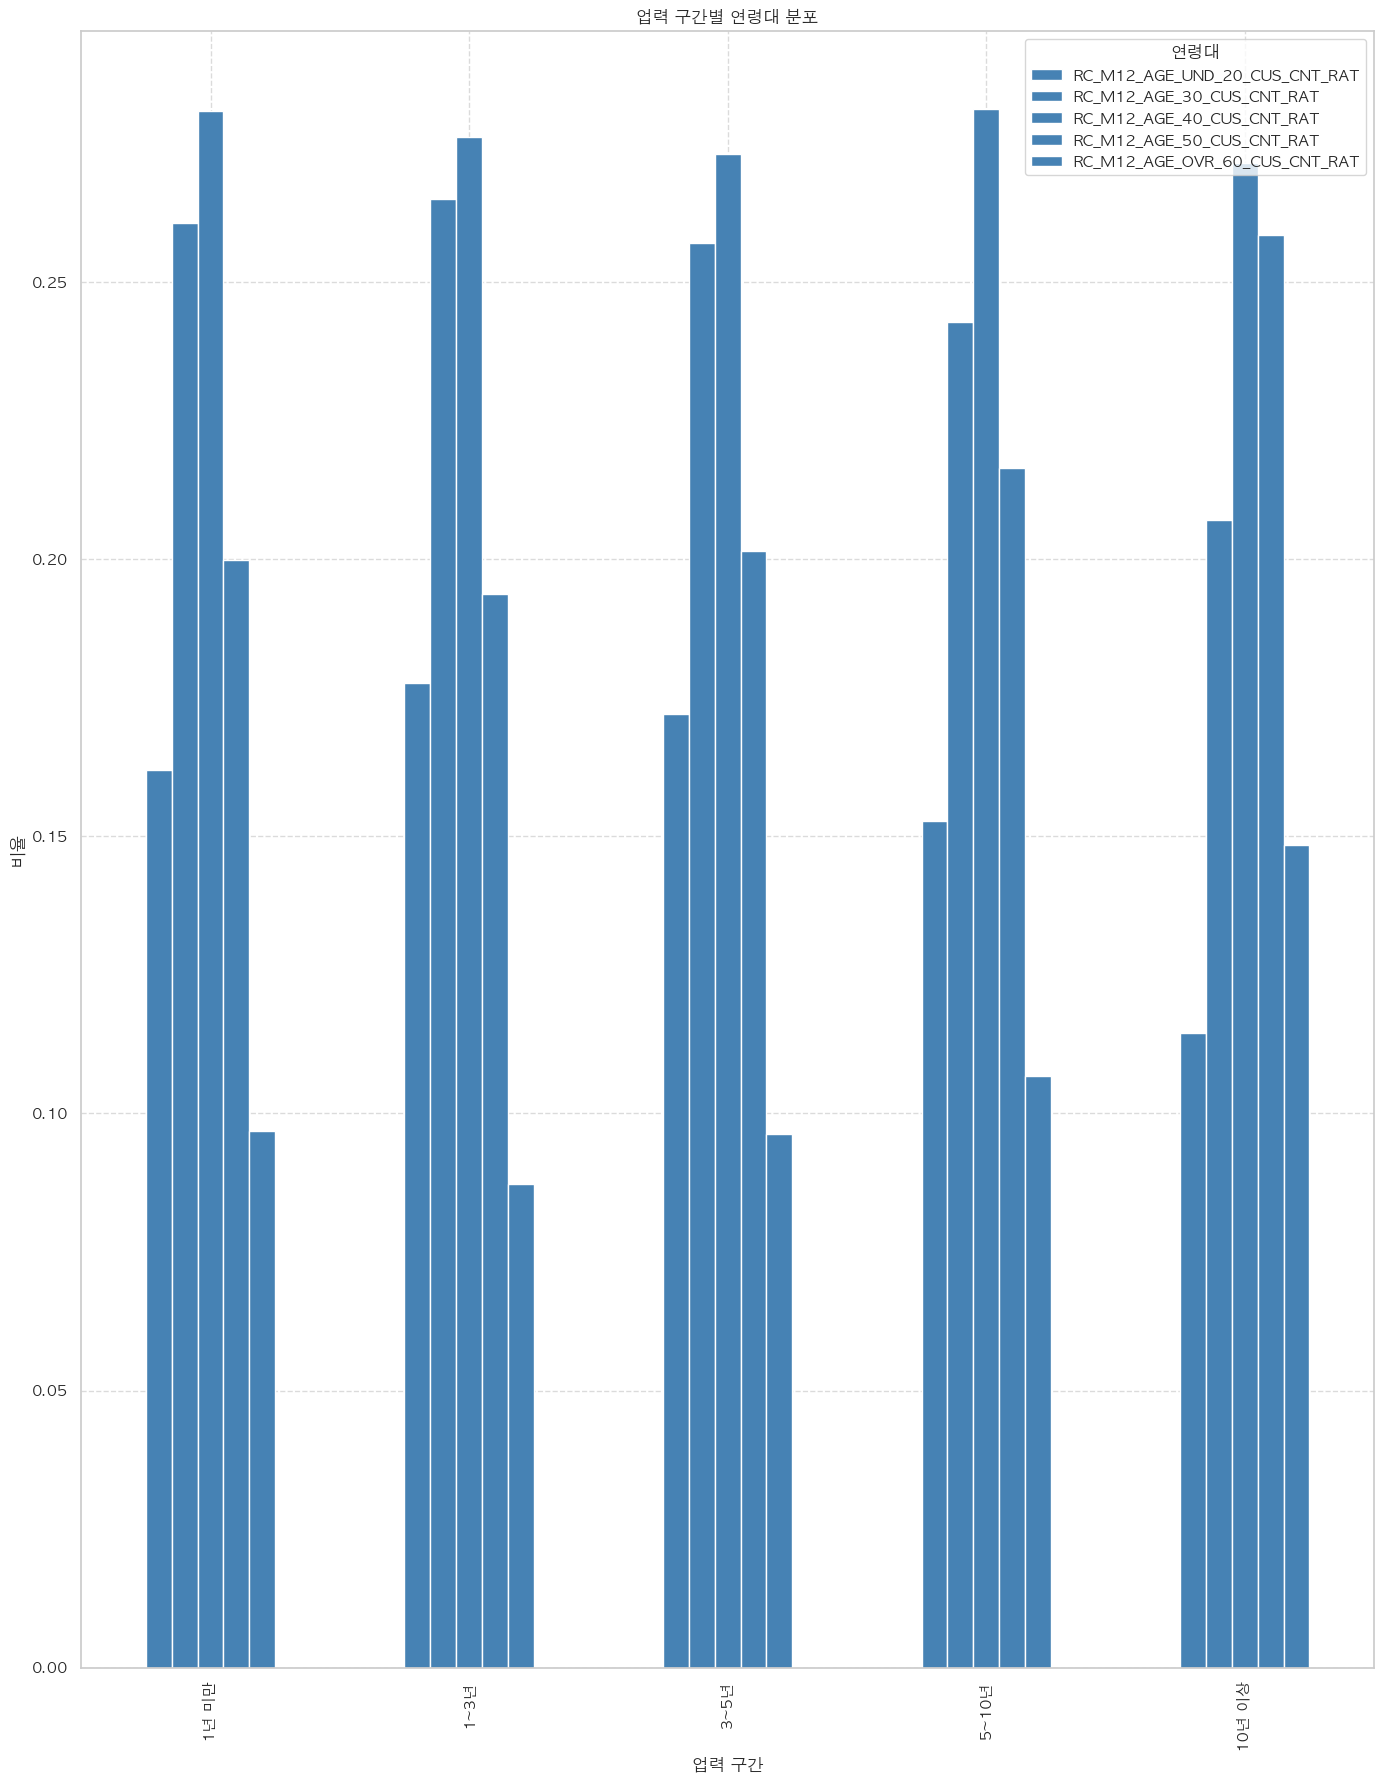

In [367]:
# 연령대 변수
age_vars = ['RC_M12_AGE_UND_20_CUS_CNT_RAT', 'RC_M12_AGE_30_CUS_CNT_RAT', 
            'RC_M12_AGE_40_CUS_CNT_RAT', 'RC_M12_AGE_50_CUS_CNT_RAT', 
            'RC_M12_AGE_OVR_60_CUS_CNT_RAT']

# 연령대별 변수와 관광객 비율의 상관관계
age_corr = mct_data[age_vars + ['TOURIST_RATIO']].corr()['TOURIST_RATIO'].drop('TOURIST_RATIO')
print("연령대별 변수와 관광객 비율의 상관관계:")
print(age_corr.sort_values(ascending=False))

# 컬럼명 변경
age_corr.index = ['20대 이하', '30대', '40대', '50대', '60대 이상']

# 연령대별 관광객 비율 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=age_corr.index, y=age_corr.values, palette='PuBu')
plt.title('연령대별 변수와 관광객 비율의 상관관계')
plt.xlabel('연령대')
plt.ylabel('관광객 비율과의 상관계수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 계절별 연령대 분포
age_by_season = mct_data.groupby('SEASON')[age_vars].mean()
print("\n계절별 연령대 분포:")
print(age_by_season)

# 시각화
plt.figure(figsize=(12, 8))
age_by_season.plot(kind='bar', figsize=(14, 8),  color='steelblue')
plt.title('계절별 연령대 분포')
plt.xlabel('계절')
plt.ylabel('비율')
plt.legend(title='연령대')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 업력 구간별 연령대 분포
age_by_business = mct_data.groupby('BUSINESS_AGE_GROUP')[age_vars].mean()
print("\n업력 구간별 연령대 분포:")
print(age_by_business)

# 시각화
plt.figure(figsize=(14, 8))
age_by_business.plot(kind='bar', figsize=(14, 18), color='steelblue')
plt.title('업력 구간별 연령대 분포')
plt.xlabel('업력 구간')
plt.ylabel('비율')
plt.legend(title='연령대')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4.2 성별 관광객 비율 분석

성별 변수와 관광객 비율의 상관관계:
남성   -0.265137
여성    0.265131
Name: TOURIST_RATIO, dtype: float64

계절별 성별 분포:
              남성        여성
SEASON                    
가을      0.568165  0.431839
겨울      0.567974  0.432030
봄       0.567996  0.432007
여름      0.565843  0.434160

관광객 비율이 높은 가맹점 유형별 성별 분포:
                남성        여성
MCT_TYPE                    
가정식       0.596753  0.403251
단품요리 전문   0.571211  0.428792
떡/한과      0.421192  0.578814
분식        0.488246  0.511758
스테이크      0.465941  0.534059
양식        0.470288  0.529714
일식        0.557878  0.442126
주스        0.441586  0.558414
차         0.419469  0.580562
햄버거       0.534545  0.465455


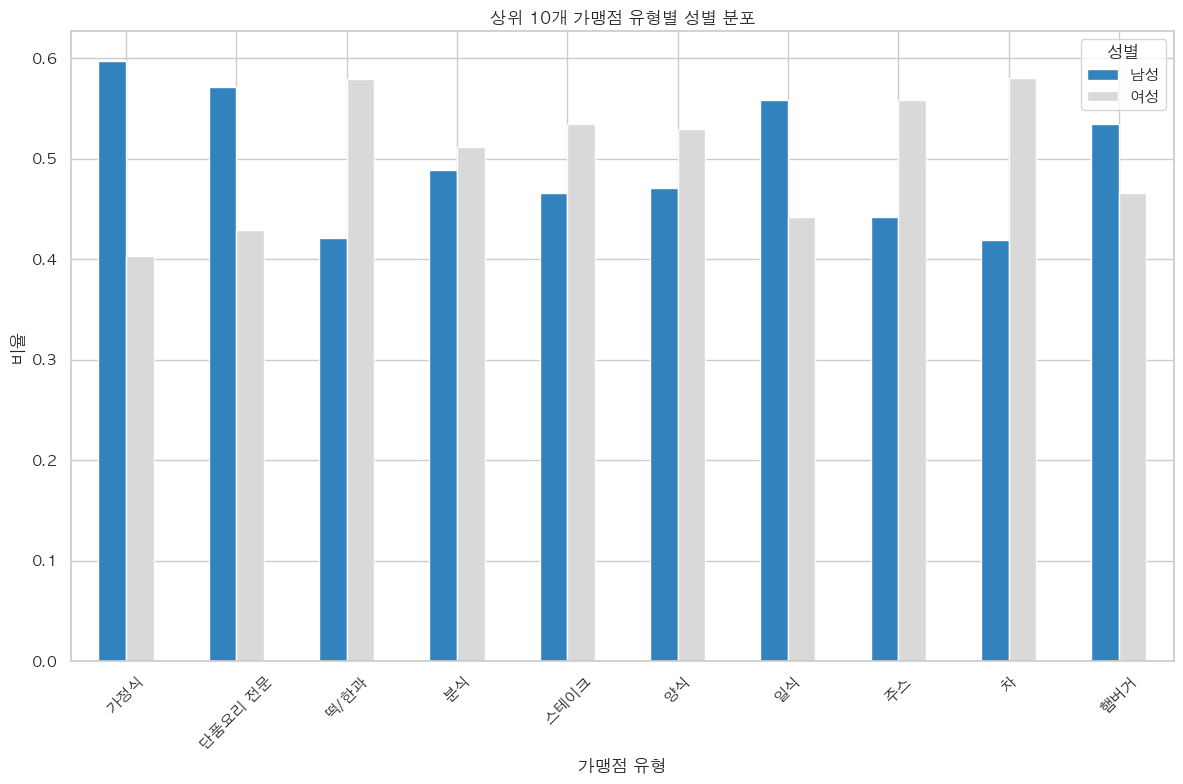

In [337]:
# 컬럼명 변경을 위한 딕셔너리 생성
gender_labels = {
    'RC_M12_MAL_CUS_CNT_RAT': '남성',
    'RC_M12_FME_CUS_CNT_RAT': '여성'
}

# 성별 변수와 관광객 비율의 상관관계 계산 및 컬럼명 변경
gender_corr = mct_data[['RC_M12_MAL_CUS_CNT_RAT', 'RC_M12_FME_CUS_CNT_RAT', 'TOURIST_RATIO']] \
    .corr()['TOURIST_RATIO'].drop('TOURIST_RATIO')
gender_corr.index = gender_corr.index.map(gender_labels)

print("성별 변수와 관광객 비율의 상관관계:")
print(gender_corr)

# 계절별 성별 분포 (컬럼명 변경 포함)
gender_by_season = mct_data.groupby('SEASON')[list(gender_labels.keys())].mean()
gender_by_season.rename(columns=gender_labels, inplace=True)

print("\n계절별 성별 분포:")
print(gender_by_season)

# 관광객 비율이 높은 가맹점 유형별 성별 분포
top_types = mct_data.groupby('MCT_TYPE')['TOURIST_RATIO'].mean().nlargest(10).index
gender_by_type = (
    mct_data[mct_data['MCT_TYPE'].isin(top_types)]
    .groupby('MCT_TYPE')[list(gender_labels.keys())]
    .mean()
    .rename(columns=gender_labels)
)

print("\n관광객 비율이 높은 가맹점 유형별 성별 분포:")
print(gender_by_type)

# 시각화
gender_by_type.plot(kind='bar', figsize=(12, 8), cmap='tab20c')
plt.title('상위 10개 가맹점 유형별 성별 분포')
plt.xlabel('가맹점 유형')
plt.ylabel('비율')
plt.xticks(rotation=45)
plt.legend(title='성별')
plt.tight_layout()
plt.show()

### 5. 비즈니스 인사이트 도출
### 5.1 관광객 비율이 높은 매장의 특성 분석

In [49]:
# 관광객 비율이 높은 상위 10% 매장 추출
high_tourist_threshold = mct_data['TOURIST_RATIO'].quantile(0.9)
high_tourist = mct_data[mct_data['TOURIST_RATIO'] >= high_tourist_threshold]

# 관광객 비율이 낮은 하위 10% 매장 추출
low_tourist_threshold = mct_data['TOURIST_RATIO'].quantile(0.1)
low_tourist = mct_data[mct_data['TOURIST_RATIO'] <= low_tourist_threshold]

# 두 그룹 간 특성 비교
print("관광객 비율이 높은 매장 vs 낮은 매장 특성 비교:")
comparison_vars = ['BUSINESS_YEARS', 'USE_AMOUNT_GROUP', 'USE_COUNT_GROUP', 
                   'HR_5_11_UE_CNT_RAT', 'HR_12_13_UE_CNT_RAT', 'HR_14_17_UE_CNT_RAT', 
                   'HR_18_22_UE_CNT_RAT', 'HR_23_4_UE_CNT_RAT',
                   'SAT_UE_CNT_RAT', 'SUN_UE_CNT_RAT']

for var in comparison_vars:
    high_mean = high_tourist[var].mean()
    low_mean = low_tourist[var].mean()
    diff_pct = ((high_mean - low_mean) / low_mean) * 100 if low_mean != 0 else float('inf')
    print(f"{var}: 높은 그룹 평균 = {high_mean:.4f}, 낮은 그룹 평균 = {low_mean:.4f}, 차이 = {diff_pct:.2f}%")

# 가맹점 유형 분포 비교
high_type_dist = high_tourist['MCT_TYPE'].value_counts(normalize=True) * 100
low_type_dist = low_tourist['MCT_TYPE'].value_counts(normalize=True) * 100

print("\n관광객 비율이 높은 매장의 가맹점 유형 분포 (상위 5개):")
print(high_type_dist.head(5))

print("\n관광객 비율이 낮은 매장의 가맹점 유형 분포 (상위 5개):")
print(low_type_dist.head(5))

관광객 비율이 높은 매장 vs 낮은 매장 특성 비교:
BUSINESS_YEARS: 높은 그룹 평균 = 6.0717, 낮은 그룹 평균 = 6.6184, 차이 = -8.26%
USE_AMOUNT_GROUP: 높은 그룹 평균 = 2.6649, 낮은 그룹 평균 = 3.8949, 차이 = -31.58%
USE_COUNT_GROUP: 높은 그룹 평균 = 3.2010, 낮은 그룹 평균 = 3.8279, 차이 = -16.38%
HR_5_11_UE_CNT_RAT: 높은 그룹 평균 = 0.1339, 낮은 그룹 평균 = 0.0751, 차이 = 78.32%
HR_12_13_UE_CNT_RAT: 높은 그룹 평균 = 0.2051, 낮은 그룹 평균 = 0.1311, 차이 = 56.39%
HR_14_17_UE_CNT_RAT: 높은 그룹 평균 = 0.2481, 낮은 그룹 평균 = 0.1395, 차이 = 77.85%
HR_18_22_UE_CNT_RAT: 높은 그룹 평균 = 0.4086, 낮은 그룹 평균 = 0.5618, 차이 = -27.26%
HR_23_4_UE_CNT_RAT: 높은 그룹 평균 = 0.0043, 낮은 그룹 평균 = 0.0925, 차이 = -95.37%
SAT_UE_CNT_RAT: 높은 그룹 평균 = 0.1714, 낮은 그룹 평균 = 0.1709, 차이 = 0.32%
SUN_UE_CNT_RAT: 높은 그룹 평균 = 0.1630, 낮은 그룹 평균 = 0.1335, 차이 = 22.13%

관광객 비율이 높은 매장의 가맹점 유형 분포 (상위 5개):
MCT_TYPE
가정식        45.086194
단품요리 전문    38.927361
분식          4.376013
일식          3.108885
커피          1.709150
Name: proportion, dtype: float64

관광객 비율이 낮은 매장의 가맹점 유형 분포 (상위 5개):
MCT_TYPE
단품요리 전문    34.212465
가정식        30.013261
치킨          7

### 5.2 매출이 높은 매장의 관광객 의존도 분석

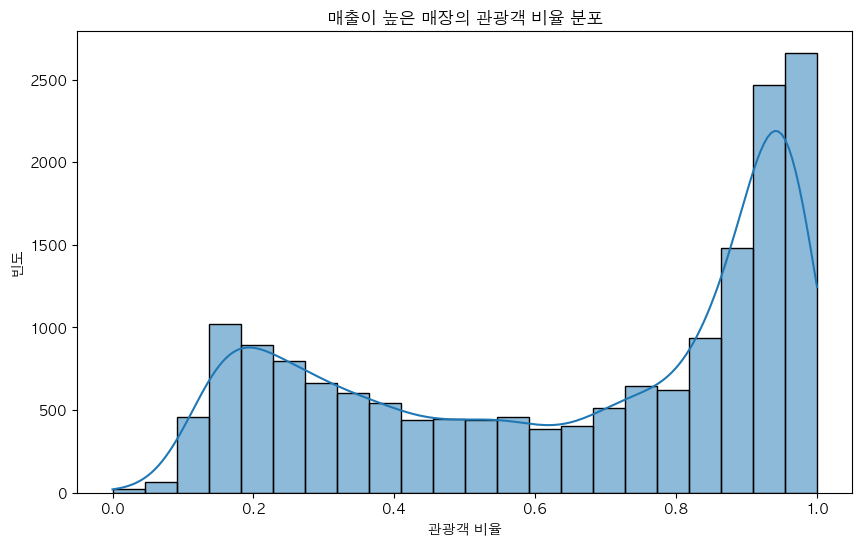

매출이 높은 매장 중 관광객 비율이 높은 매장 vs 낮은 매장 특성 비교:
BUSINESS_YEARS: 관광객 높은 그룹 평균 = 6.2933, 관광객 낮은 그룹 평균 = 7.8605, 차이 = -19.94%
USE_AMOUNT_GROUP: 관광객 높은 그룹 평균 = 1.4012, 관광객 낮은 그룹 평균 = 1.7558, 차이 = -20.19%
USE_COUNT_GROUP: 관광객 높은 그룹 평균 = 2.4758, 관광객 낮은 그룹 평균 = 2.5846, 차이 = -4.21%
HR_5_11_UE_CNT_RAT: 관광객 높은 그룹 평균 = 0.1249, 관광객 낮은 그룹 평균 = 0.0974, 차이 = 28.17%
HR_12_13_UE_CNT_RAT: 관광객 높은 그룹 평균 = 0.1937, 관광객 낮은 그룹 평균 = 0.1777, 차이 = 9.02%
HR_14_17_UE_CNT_RAT: 관광객 높은 그룹 평균 = 0.2394, 관광객 낮은 그룹 평균 = 0.1800, 차이 = 33.03%
HR_18_22_UE_CNT_RAT: 관광객 높은 그룹 평균 = 0.4395, 관광객 낮은 그룹 평균 = 0.5024, 차이 = -12.52%
HR_23_4_UE_CNT_RAT: 관광객 높은 그룹 평균 = 0.0025, 관광객 낮은 그룹 평균 = 0.0425, 차이 = -94.16%
SAT_UE_CNT_RAT: 관광객 높은 그룹 평균 = 0.1697, 관광객 낮은 그룹 평균 = 0.1678, 차이 = 1.15%
SUN_UE_CNT_RAT: 관광객 높은 그룹 평균 = 0.1600, 관광객 낮은 그룹 평균 = 0.1581, 차이 = 1.24%

매출이 높고 관광객 비율이 높은 매장의 가맹점 유형 분포 (상위 5개):
MCT_TYPE
가정식        45.913819
단품요리 전문    40.891530
일식          4.190193
분식          2.109955
양식          1.575037
Name: proportion, dtype: float64

매

In [50]:
# 매출이 높은 상위 그룹 (1, 2) 추출
high_sales = mct_data[mct_data['USE_AMOUNT_GROUP'].isin([1.0, 2.0])]

# 매출이 높은 그룹 내에서 관광객 비율 분포
plt.figure(figsize=(10, 6))
sns.histplot(high_sales['TOURIST_RATIO'], kde=True)
plt.title('매출이 높은 매장의 관광객 비율 분포')
plt.xlabel('관광객 비율')
plt.ylabel('빈도')
plt.show()

# 매출이 높은 그룹 내에서 관광객 비율이 높은 매장과 낮은 매장 비교
high_sales_high_tourist = high_sales[high_sales['TOURIST_RATIO'] >= high_tourist_threshold]
high_sales_low_tourist = high_sales[high_sales['TOURIST_RATIO'] <= low_tourist_threshold]

print("매출이 높은 매장 중 관광객 비율이 높은 매장 vs 낮은 매장 특성 비교:")
for var in comparison_vars:
    high_mean = high_sales_high_tourist[var].mean()
    low_mean = high_sales_low_tourist[var].mean()
    diff_pct = ((high_mean - low_mean) / low_mean) * 100 if low_mean != 0 else float('inf')
    print(f"{var}: 관광객 높은 그룹 평균 = {high_mean:.4f}, 관광객 낮은 그룹 평균 = {low_mean:.4f}, 차이 = {diff_pct:.2f}%")

# 가맹점 유형 분포 비교
high_sales_high_type = high_sales_high_tourist['MCT_TYPE'].value_counts(normalize=True) * 100
high_sales_low_type = high_sales_low_tourist['MCT_TYPE'].value_counts(normalize=True) * 100

print("\n매출이 높고 관광객 비율이 높은 매장의 가맹점 유형 분포 (상위 5개):")
print(high_sales_high_type.head(5))

print("\n매출이 높고 관광객 비율이 낮은 매장의 가맹점 유형 분포 (상위 5개):")
print(high_sales_low_type.head(5))

### 5.3 계절별 관광객 비율 변화와 매출 관계 분석

계절별, 매출 그룹별 평균 관광객 비율:
USE_AMOUNT_GROUP         1         2         3         4         5         6
SEASON                                                                      
가을                0.720846  0.567990  0.517388  0.483029  0.474625  0.442518
겨울                0.720878  0.582347  0.517264  0.485705  0.479799  0.438395
봄                 0.739008  0.595706  0.536798  0.496406  0.483177  0.455160
여름                0.745422  0.603957  0.539763  0.489685  0.481543  0.445610


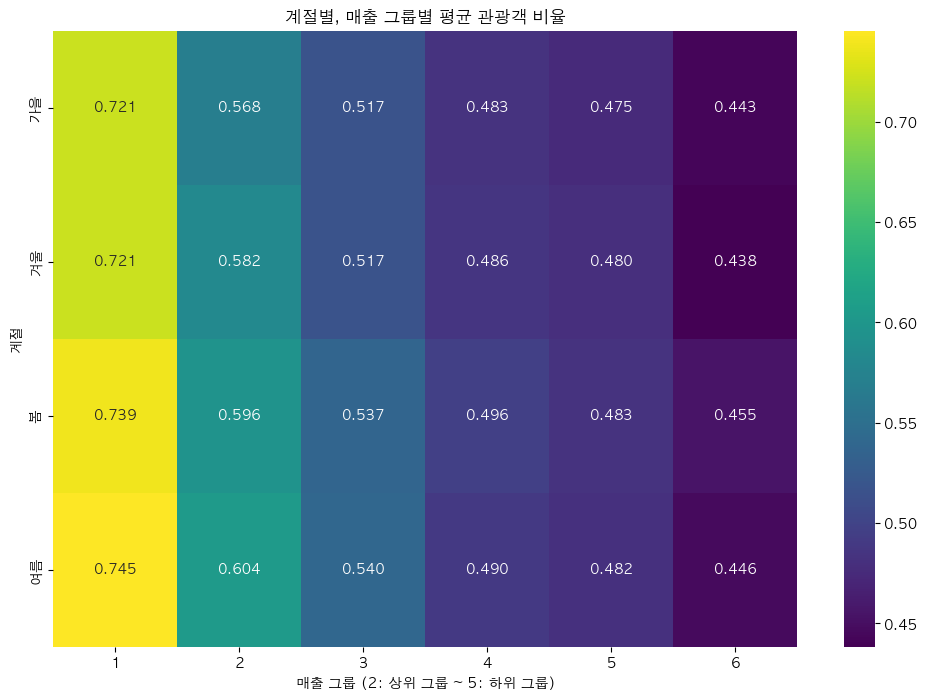

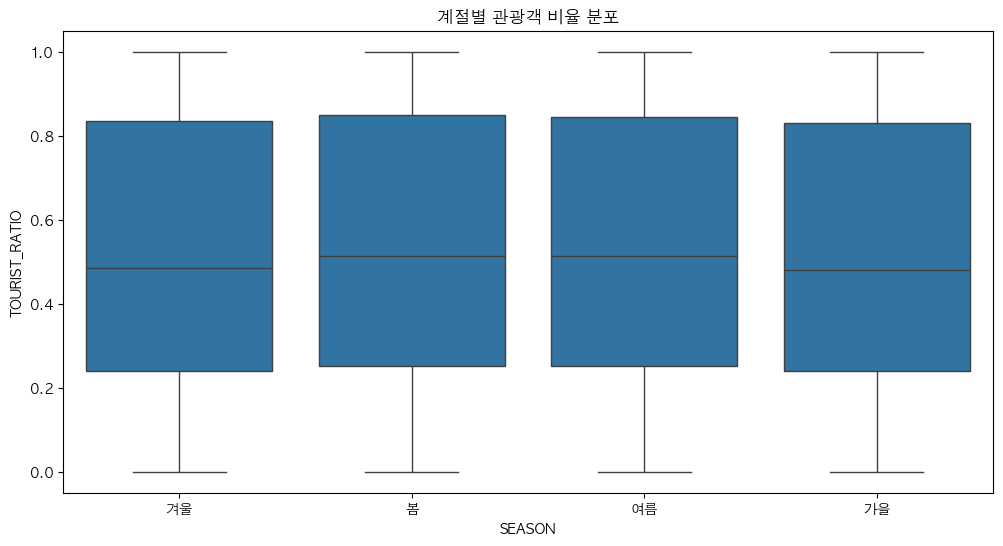


계절별, 매출 그룹별 업장 수:
USE_AMOUNT_GROUP     1     2     3     4     5     6
SEASON                                              
가을                1689  2530  4217  4217  2532  1689
겨울                1696  2542  4239  4237  2542  1699
봄                 1674  2508  4180  4181  2508  1675
여름                1731  2597  4325  4323  2601  1732

계절별 평균 관광객 비율:
SEASON
봄     0.539556
여름    0.539285
겨울    0.525983
가을    0.522843
Name: TOURIST_RATIO, dtype: float64

매출 그룹별 평균 관광객 비율:
USE_AMOUNT_GROUP
1    0.731597
2    0.587585
3    0.527846
4    0.488692
5    0.479790
6    0.445392
Name: TOURIST_RATIO, dtype: float64


In [53]:
# 계절별 관광객 비율과 매출 그룹 교차 분석
season_sales_tourist = pd.pivot_table(
    mct_data.dropna(subset=['USE_AMOUNT_GROUP']), 
    values='TOURIST_RATIO',
    index='SEASON',
    columns='USE_AMOUNT_GROUP',
    aggfunc='mean'
)

print("계절별, 매출 그룹별 평균 관광객 비율:")
print(season_sales_tourist)

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(season_sales_tourist, annot=True, fmt='.3f', cmap='viridis')
plt.title('계절별, 매출 그룹별 평균 관광객 비율')
plt.xlabel('매출 그룹 (2: 상위 그룹 ~ 5: 하위 그룹)')
plt.ylabel('계절')
plt.show()

# 계절별 관광객 비율 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='SEASON', y='TOURIST_RATIO', data=mct_data)
plt.title('계절별 관광객 비율 분포')
plt.show()

# 계절별, 매출 그룹별 업장 수 확인
season_sales_count = pd.crosstab(mct_data['SEASON'], mct_data['USE_AMOUNT_GROUP'])
print("\n계절별, 매출 그룹별 업장 수:")
print(season_sales_count)

# 추가: 계절별 평균 관광객 비율
print("\n계절별 평균 관광객 비율:")
print(mct_data.groupby('SEASON')['TOURIST_RATIO'].mean().sort_values(ascending=False))

# 추가: 매출 그룹별 평균 관광객 비율
print("\n매출 그룹별 평균 관광객 비율:")
print(mct_data.groupby('USE_AMOUNT_GROUP')['TOURIST_RATIO'].mean().sort_values(ascending=False))

# 추천 모델

In [28]:
mct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67864 entries, 0 to 67863
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   YM                             67864 non-null  datetime64[ns]
 1   MCT_NM                         67864 non-null  object        
 2   OP_YMD                         67864 non-null  int64         
 3   MCT_TYPE                       67864 non-null  object        
 4   ADDR                           67864 non-null  object        
 5   UE_CNT_GRP                     67864 non-null  object        
 6   UE_AMT_GRP                     67864 non-null  object        
 7   UE_AMT_PER_TRSN_GRP            67864 non-null  object        
 8   MON_UE_CNT_RAT                 67864 non-null  float64       
 9   TUE_UE_CNT_RAT                 67864 non-null  float64       
 10  WED_UE_CNT_RAT                 67864 non-null  float64       
 11  THU_UE_CNT_RAT 

### 추천 시스템

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import streamlit as st
import matplotlib.pyplot as plt
import datetime

In [31]:
# 텍스트 특성 생성
mct_data['features'] = ''

# 업종 정보 추가 (이미 원-핫 인코딩된 컬럼 활용)
mct_type_cols = [col for col in mct_data.columns if col.startswith('MCT_TYPE_')]
for col in mct_type_cols:
    # True인 경우에만 해당 업종명 추가
    mct_data.loc[mct_data[col] == 1, 'features'] += col.replace('MCT_TYPE_', '') + ' '

# 지역 정보 추가 (이미 원-핫 인코딩된 컬럼 활용)
region_cols = [col for col in mct_data.columns if col.startswith('REGION_')]
for col in region_cols:
    # True인 경우에만 해당 지역명 추가
    mct_data.loc[mct_data[col] == 1, 'features'] += col.replace('REGION_', '') + ' '

# 주소 정보 추가
mct_data['features'] += mct_data['ADDR'].astype(str)

# 계절 정보 추가
mct_data['features'] += ' ' + mct_data['SEASON'].astype(str)

# 특성 정리
mct_data['features'] = mct_data['features'].str.strip()

# 주중/주말 비율 계산 (이미 있는 경우 건너뛰기)
if 'WEEKDAY_RATIO' not in mct_data.columns:
    mct_data['WEEKDAY_RATIO'] = mct_data['MON_UE_CNT_RAT'] + mct_data['TUE_UE_CNT_RAT'] + mct_data['WED_UE_CNT_RAT'] + mct_data['THU_UE_CNT_RAT'] + mct_data['FRI_UE_CNT_RAT']
    mct_data['WEEKEND_RATIO'] = mct_data['SAT_UE_CNT_RAT'] + mct_data['SUN_UE_CNT_RAT']
    mct_data['WEEKEND_PREFERENCE'] = mct_data['WEEKEND_RATIO'] / (mct_data['WEEKDAY_RATIO'] / 5 * 2)

# 시간대별 선호도 계산
mct_data['MORNING_PREFERENCE'] = mct_data['HR_5_11_UE_CNT_RAT']
mct_data['LUNCH_PREFERENCE'] = mct_data['HR_12_13_UE_CNT_RAT']
mct_data['AFTERNOON_PREFERENCE'] = mct_data['HR_14_17_UE_CNT_RAT']
mct_data['EVENING_PREFERENCE'] = mct_data['HR_18_22_UE_CNT_RAT']
mct_data['NIGHT_PREFERENCE'] = mct_data['HR_23_4_UE_CNT_RAT']

# 주요 고객층 파악
mct_data['MAIN_GENDER'] = np.where(mct_data['RC_M12_MAL_CUS_CNT_RAT'] > mct_data['RC_M12_FME_CUS_CNT_RAT'], '남성', '여성')

# 주요 연령대 파악
age_columns = [
    'RC_M12_AGE_UND_20_CUS_CNT_RAT', 
    'RC_M12_AGE_30_CUS_CNT_RAT',
    'RC_M12_AGE_40_CUS_CNT_RAT', 
    'RC_M12_AGE_50_CUS_CNT_RAT',
    'RC_M12_AGE_OVR_60_CUS_CNT_RAT'
]
age_labels = ['20세 미만', '30대', '40대', '50대', '60세 이상']
mct_data['MAIN_AGE_GROUP'] = mct_data[age_columns].idxmax(axis=1).map({
    'RC_M12_AGE_UND_20_CUS_CNT_RAT': '20세 미만',
    'RC_M12_AGE_30_CUS_CNT_RAT': '30대',
    'RC_M12_AGE_40_CUS_CNT_RAT': '40대',
    'RC_M12_AGE_50_CUS_CNT_RAT': '50대',
    'RC_M12_AGE_OVR_60_CUS_CNT_RAT': '60세 이상'
})

# 인기도 점수 계산 (이미 USE_COUNT_GROUP이 있으므로 그대로 활용)
# 정규화된 인기도 점수 계산
mct_data['popularity_score'] = (
    0.4 * (mct_data['USE_COUNT_GROUP'] / 6) +  # 이미 1-6으로 변환된 값 사용
    0.2 * (mct_data['USE_AMOUNT_GROUP'] / 6) +  # 이미 1-6으로 변환된 값 사용
    0.2 * mct_data['TOURIST_RATIO'] +  # 이미 계산된 관광객 비율 사용
    0.2 * (mct_data['BUSINESS_YEARS'] / mct_data['BUSINESS_YEARS'].max())  # 영업 기간
)

# 계절별 인기도 점수 (현재 계절에 맞는 장소 추천을 위해)
# 현재 계절 가정 (실제 사용 시 현재 날짜 기준으로 계산)
current_month = datetime.datetime.now().month
current_season = '봄' if current_month in [3, 4, 5] else '여름' if current_month in [6, 7, 8] else '가을' if current_month in [9, 10, 11] else '겨울'

mct_data['SEASON_SCORE'] = mct_data.apply(
    lambda x: x['popularity_score'] * 1.2 if x['SEASON'] == current_season else x['popularity_score'],
    axis=1
)

# 시간대별 주요 방문 시간 (가장 방문 비율이 높은 시간대)
time_columns = [
    'HR_5_11_UE_CNT_RAT', 
    'HR_12_13_UE_CNT_RAT', 
    'HR_14_17_UE_CNT_RAT', 
    'HR_18_22_UE_CNT_RAT', 
    'HR_23_4_UE_CNT_RAT'
]
time_labels = ['오전(5-11시)', '점심(12-13시)', '오후(14-17시)', '저녁(18-22시)', '심야(23-4시)']
mct_data['PEAK_TIME'] = mct_data[time_columns].idxmax(axis=1).map({
    'HR_5_11_UE_CNT_RAT': '오전(5-11시)',
    'HR_12_13_UE_CNT_RAT': '점심(12-13시)',
    'HR_14_17_UE_CNT_RAT': '오후(14-17시)',
    'HR_18_22_UE_CNT_RAT': '저녁(18-22시)',
    'HR_23_4_UE_CNT_RAT': '심야(23-4시)'
})

# 요일별 주요 방문 요일 (가장 방문 비율이 높은 요일)
day_columns = [
    'MON_UE_CNT_RAT', 
    'TUE_UE_CNT_RAT', 
    'WED_UE_CNT_RAT', 
    'THU_UE_CNT_RAT', 
    'FRI_UE_CNT_RAT', 
    'SAT_UE_CNT_RAT', 
    'SUN_UE_CNT_RAT'
]
day_labels = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
mct_data['PEAK_DAY'] = mct_data[day_columns].idxmax(axis=1).map({
    'MON_UE_CNT_RAT': '월요일',
    'TUE_UE_CNT_RAT': '화요일',
    'WED_UE_CNT_RAT': '수요일',
    'THU_UE_CNT_RAT': '목요일',
    'FRI_UE_CNT_RAT': '금요일',
    'SAT_UE_CNT_RAT': '토요일',
    'SUN_UE_CNT_RAT': '일요일'
})

# 관광객 유형 분류
mct_data['VISITOR_TYPE'] = pd.cut(
    mct_data['TOURIST_RATIO'], 
    bins=[0, 0.3, 0.7, 1], 
    labels=['현지인 위주', '균형적', '관광객 위주']
)

In [33]:
import pandas as pd
mct_data.to_csv("mct_data.csv", index=False)

In [9]:
import pandas as pd
mct_data = pd.read_csv('../notebooks/mct_data.csv')

In [10]:
mct_data['MCT_NM'].nunique()

9252

In [13]:
mct_data.columns

Index(['YM', 'MCT_NM', 'OP_YMD', 'MCT_TYPE', 'ADDR', 'UE_CNT_GRP',
       'UE_AMT_GRP', 'UE_AMT_PER_TRSN_GRP', 'MON_UE_CNT_RAT', 'TUE_UE_CNT_RAT',
       'WED_UE_CNT_RAT', 'THU_UE_CNT_RAT', 'FRI_UE_CNT_RAT', 'SAT_UE_CNT_RAT',
       'SUN_UE_CNT_RAT', 'HR_5_11_UE_CNT_RAT', 'HR_12_13_UE_CNT_RAT',
       'HR_14_17_UE_CNT_RAT', 'HR_18_22_UE_CNT_RAT', 'HR_23_4_UE_CNT_RAT',
       'LOCAL_UE_CNT_RAT', 'RC_M12_MAL_CUS_CNT_RAT', 'RC_M12_FME_CUS_CNT_RAT',
       'RC_M12_AGE_UND_20_CUS_CNT_RAT', 'RC_M12_AGE_30_CUS_CNT_RAT',
       'RC_M12_AGE_40_CUS_CNT_RAT', 'RC_M12_AGE_50_CUS_CNT_RAT',
       'RC_M12_AGE_OVR_60_CUS_CNT_RAT', 'REGION', 'REGION_Unknown',
       'REGION_서귀포시', 'REGION_제주시', 'YEAR', 'MONTH', 'SEASON',
       'USE_COUNT_GROUP', 'USE_AMOUNT_GROUP', 'UE_AMOUNT_PER_GRUOP',
       'MCT_TYPE_가정식', 'MCT_TYPE_구내식당/푸드코트', 'MCT_TYPE_기사식당',
       'MCT_TYPE_기타세계요리', 'MCT_TYPE_꼬치구이', 'MCT_TYPE_단품요리 전문', 'MCT_TYPE_도너츠',
       'MCT_TYPE_도시락', 'MCT_TYPE_동남아/인도음식', 'MCT_TYPE_떡/한과',
       'MCT_TY

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# 🔹 중복 제거 후 대표 데이터만 유지
df = mct_data.copy()

# 중복된 가맹점 제거: 같은 가게가 여러 번 등장하는 문제 해결
df_unique = df.groupby('MCT_NM').first().reset_index()  # 같은 가게의 첫 번째 데이터만 유지

# 🔹 TF-IDF 벡터화 (메모리 절약을 위해 max_features 제한)
vectorizer = TfidfVectorizer(max_features=5000)  # 5,000개의 주요 단어만 사용
tfidf_matrix = vectorizer.fit_transform(df_unique['features'])

# 🔹 메모리 효율적인 최근접 이웃 모델 사용
knn_model = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute', n_jobs=-1)
knn_model.fit(tfidf_matrix)

# 🔹 가맹점 이름과 인덱스 매핑 (중복 제거된 데이터 기준)
indices = pd.Series(df_unique.index, index=df_unique['MCT_NM']).drop_duplicates()

In [12]:
def recommend_by_store(store_name, num_recommendations=5):
    """ 특정 가맹점과 유사한 가맹점 추천 """
    
    if store_name not in indices:
        return "❌ 유사한 식당이 없습니다."

    idx = indices[store_name]
    distances, indices_knn = knn_model.kneighbors(tfidf_matrix[idx], n_neighbors=num_recommendations+1)

    store_indices = indices_knn.flatten()[1:]  # 자기 자신 제외
    return df_unique.iloc[store_indices][['MCT_NM', 'MCT_TYPE', 'ADDR', 'popularity_score']]


def recommend_by_keyword(keyword, num_recommendations=5):
    """ 특정 키워드(업종, 지역, 계절) 기반 추천 """
    keyword_vector = vectorizer.transform([keyword])  # 입력 키워드 벡터화
    distances, indices_knn = knn_model.kneighbors(keyword_vector, n_neighbors=num_recommendations)

    store_indices = indices_knn.flatten()
    return df_unique.iloc[store_indices][['MCT_NM', 'MCT_TYPE', 'ADDR', 'popularity_score']]

def recommend_popular(num_recommendations=5):
    """ 인기도 기반 추천 (중복 제거 반영) """
    return df_unique[['MCT_NM', 'MCT_TYPE', 'ADDR', 'popularity_score']].sort_values(by='popularity_score', ascending=False).head(num_recommendations)

def recommend_by_user_preference(gender=None, age_group=None, peak_time=None, num_recommendations=5):
    """ 사용자 맞춤형 추천 (중복 제거 적용) """
    filtered_df = df_unique.copy()

    if gender:
        filtered_df = filtered_df[filtered_df['MAIN_GENDER'] == gender]

    if age_group:
        filtered_df = filtered_df[filtered_df['MAIN_AGE_GROUP'] == age_group]

    if peak_time:
        filtered_df = filtered_df[filtered_df['PEAK_TIME'] == peak_time]

    return filtered_df[['MCT_NM', 'MCT_TYPE', 'ADDR', 'popularity_score']].sort_values(by='popularity_score', ascending=False).head(num_recommendations)

# ✅ 테스트 실행
print("유사한 가맹점 추천:")
print(recommend_by_store('스타벅스 제주신제주점'))

print("\n키워드 기반 추천:")
print(recommend_by_keyword('커피'))

print("\n인기도 기반 추천:")
print(recommend_popular())

print("\n사용자 맞춤 추천:")
print(recommend_by_user_preference(gender='여성', age_group='30대', peak_time='저녁(18-22시)'))


유사한 가맹점 추천:
해당 가맹점이 데이터에 없습니다.

키워드 기반 추천:
         MCT_NM MCT_TYPE                     ADDR  popularity_score
7791       카페인어       커피            제주 제주시 한림읍 1층          0.545812
4212       소랑아시       커피             제주 서귀포시 색달동           0.344941
6049  이디야 커피연동점       커피        제주 제주시 연동 272-1번지          0.505525
8261  파스쿠찌제주제원점       커피     제주 제주시 연동 273-4번지 1층          0.251418
7957   클라우드나인커피       커피  제주 제주시 이도이동 1767-1번지 1층          0.290181

인기도 기반 추천:
      MCT_NM MCT_TYPE                     ADDR  popularity_score
5512    올래어촌      가정식     제주 제주시 이호일동 1700-4번지          0.906643
8804    해녀횟집       일식    제주 제주시 삼도이동 1192-11번지          0.904832
8371   표선골목집      가정식  제주 서귀포시 표선면 표선리 40-29번지          0.903434
7717  칠성골흑돼지  단품요리 전문      제주 제주시 건입동 1397-3번지          0.891464
7603    초원식당      가정식              제주 제주시 조천읍           0.887498

사용자 맞춤 추천:
      MCT_NM MCT_TYPE                               ADDR  popularity_score
999   난드르흑돼지      가정식  제주 서귀포시 성산읍 온평리 1002번지 온평리 1002-4    

### KMeans(군집화)

In [341]:
# 시간대 패턴 클러스터링 (선택적)
from sklearn.cluster import KMeans

# 시간대 패턴 기반 클러스터링
X_time = mct_data[time_columns]
kmeans_time = KMeans(n_clusters=4, random_state=42)
mct_data['TIME_PATTERN_CLUSTER'] = kmeans_time.fit_predict(X_time)

# 요일 패턴 기반 클러스터링
X_day = mct_data[day_columns]
kmeans_day = KMeans(n_clusters=3, random_state=42)
mct_data['DAY_PATTERN_CLUSTER'] = kmeans_day.fit_predict(X_day)

# 클러스터 중심점 확인
time_cluster_centers = pd.DataFrame(
    kmeans_time.cluster_centers_, 
    columns=time_columns,
    index=[f'시간패턴클러스터_{i}' for i in range(4)]
)

day_cluster_centers = pd.DataFrame(
    kmeans_day.cluster_centers_, 
    columns=day_columns,
    index=[f'요일패턴클러스터_{i}' for i in range(3)]
)

print("특성 생성 완료!")
print(f"데이터 크기: {mct_data.shape}")
print("\n시간대 패턴 클러스터 중심점:")
print(time_cluster_centers)
print("\n요일 패턴 클러스터 중심점:")
print(day_cluster_centers)

MON_UE_CNT_RAT  TUE_UE_CNT_RAT  WED_UE_CNT_RAT  THU_UE_CNT_RAT  \
요일패턴클러스터_0        0.152827        0.173321        0.174726        0.161255   
요일패턴클러스터_1        0.083367        0.093358        0.135734        0.143502   

            FRI_UE_CNT_RAT  SAT_UE_CNT_RAT  SUN_UE_CNT_RAT  
요일패턴클러스터_0        0.154828        0.134165        0.048879  
요일패턴클러스터_1        0.169996        0.211564        0.162479

In [ ]:
# 데이터 로드
tourism_data = load_data()

# 유사도 행렬 계산
similarity_matrices = compute_similarity_matrices(tourism_data)

# =============전처리 데이터 ================

# 추천 모델 구현 방안

In [80]:
print(weekly_data.columns)
print(monthly_data.columns)
print(sentiment_data.columns)
print(morpheme_data.columns)
print(mct_data.columns)

Index(['CL_CD', 'CL_NM', 'AREA_NM', 'ADDR', 'BASE_YEAR', 'BASE_MT',
       'ALL_TOTAL_CO', 'MON_VIEWS_CO', 'TUES_VIEWS_CO', 'WED_VIEWS_CO',
       'THUR_VIEWS_CO', 'FRI_VIEWS_CO', 'SAT_VIEWS_CO', 'SUN_VIEWS_CO'],
      dtype='object')
Index(['CL_CD', 'CL_NM', 'AREA_NM', 'ADDR', 'BASE_YEAR', 'ALL_TOTAL_CO',
       'JAN_VIEWS_CO', 'FEB_VIEWS_CO', 'MAR_VIEWS_CO', 'APR_VIEWS_CO',
       'MAY_VIEWS_CO', 'JUN_VIEWS_CO', 'JULY_VIEWS_CO', 'AUG_VIEWS_CO',
       'SEP_VIEWS_CO', 'OCT_VIEWS_CO', 'NOV_VIEWS_CO', 'DEC_VIEWS_CO', '지역'],
      dtype='object')
Index(['CL_NM', 'TRRSRT_NM', 'TRRSRT_ADDR', 'ORIGIN_CL_NM', 'ANALS_BEGIN_DE',
       'ANALS_END_DE', 'AVRG_SCORE_VALUE', 'CORE_KWRD_CN', 'CORE_KWRD_CO',
       'AFRM_KWRD_CN', 'AFRM_KWRD_CO', 'NEGA_KWRD_CN', 'NEGA_KWRD_CO',
       'positive_ration', 'negative_ration', 'positive_ratio',
       'negative_ratio', '지역'],
      dtype='object')
Index(['BASE_YM', 'CL_NM', 'TRRSRT_NM', 'TRRSRT_ADDR', 'SCORE_VALUE', 'MOP_CN',
       'REGIST_DE', '지역', '점

In [81]:
# weekly_data 집계
# 각 관광지별로 요일별 방문 데이터 평균 계산
weekly_agg = weekly_data.groupby(['AREA_NM', 'CL_CD', 'CL_NM', 'ADDR']).agg({
    'ALL_TOTAL_CO': 'sum',  # 총 방문자 수 합계
    'MON_VIEWS_CO': 'sum',  # 월요일 방문자 수 합계
    'TUES_VIEWS_CO': 'sum',  # 화요일 방문자 수 합계
    'WED_VIEWS_CO': 'sum',   # 수요일 방문자 수 합계
    'THUR_VIEWS_CO': 'sum',  # 목요일 방문자 수 합계
    'FRI_VIEWS_CO': 'sum',   # 금요일 방문자 수 합계
    'SAT_VIEWS_CO': 'sum',   # 토요일 방문자 수 합계
    'SUN_VIEWS_CO': 'sum'    # 일요일 방문자 수 합계
}).reset_index()

# 요일별 방문 비율 계산
daily_columns = ['MON_VIEWS_CO', 'TUES_VIEWS_CO', 'WED_VIEWS_CO', 'THUR_VIEWS_CO',
                'FRI_VIEWS_CO', 'SAT_VIEWS_CO', 'SUN_VIEWS_CO']

# 총 방문자 수가 0인 경우 처리
weekly_agg['ALL_TOTAL_CO'] = weekly_agg['ALL_TOTAL_CO'].replace(0, 1)

# 요일별 방문 비율 계산
for i, day in enumerate(daily_columns):
    weekly_agg[f'DAY_{i+1}_RATIO'] = weekly_agg[day] / weekly_agg['ALL_TOTAL_CO']

# 주중/주말 방문자 수 및 비율
weekday_cols = ['MON_VIEWS_CO', 'TUES_VIEWS_CO', 'WED_VIEWS_CO', 'THUR_VIEWS_CO', 'FRI_VIEWS_CO']
weekend_cols = ['SAT_VIEWS_CO', 'SUN_VIEWS_CO']

weekly_agg['WEEKDAY_VIEWS'] = weekly_agg[weekday_cols].sum(axis=1)
weekly_agg['WEEKEND_VIEWS'] = weekly_agg[weekend_cols].sum(axis=1)

weekly_agg['WEEKDAY_RATIO'] = weekly_agg['WEEKDAY_VIEWS'] / weekly_agg['ALL_TOTAL_CO']
weekly_agg['WEEKEND_RATIO'] = weekly_agg['WEEKEND_VIEWS'] / weekly_agg['ALL_TOTAL_CO']

# 주중/주말 선호도 (1보다 크면 주말 선호, 1보다 작으면 주중 선호)
# 주중 일평균과 주말 일평균 비교
weekly_agg['WEEKDAY_AVG'] = weekly_agg['WEEKDAY_VIEWS'] / 5  # 주중 일평균
weekly_agg['WEEKEND_AVG'] = weekly_agg['WEEKEND_VIEWS'] / 2  # 주말 일평균

# 0으로 나누기 방지
weekly_agg['WEEKDAY_AVG'] = weekly_agg['WEEKDAY_AVG'].replace(0, 0.001)

weekly_agg['WEEKEND_PREFERENCE'] = weekly_agg['WEEKEND_AVG'] / weekly_agg['WEEKDAY_AVG']

print(f"weekly_data 집계 후 크기: {weekly_agg.shape}")

weekly_data 집계 후 크기: (5156, 26)


In [82]:
pd.set_option('display.max_columns', None)
weekly_agg.head(3)

AREA_NM CL_CD CL_NM                          ADDR  ALL_TOTAL_CO  \
0       (주)메이드인제주    c2    쇼핑  제주특별자치도 제주시 조천읍 중산간동로 804-16           478   
1  (주)제주해양레저 투명카약    c1   관광지      제주특별자치도 제주시 애월읍 애월로1길 22           691   
2         1080칼국수    c4   음식점          제주특별자치도 제주시 서광로13길 3           292   

   MON_VIEWS_CO  TUES_VIEWS_CO  WED_VIEWS_CO  THUR_VIEWS_CO  FRI_VIEWS_CO  \
0          70.0           73.0          78.0           83.0          63.0   
1         113.0           93.0         106.0           93.0         103.0   
2          52.0           50.0          40.0           54.0          37.0   

   SAT_VIEWS_CO  SUN_VIEWS_CO  DAY_1_RATIO  DAY_2_RATIO  DAY_3_RATIO  \
0          50.0          61.0     0.146444     0.152720     0.163180   
1          74.0         109.0     0.163531     0.134588     0.153401   
2          31.0          28.0     0.178082     0.171233     0.136986   

   DAY_4_RATIO  DAY_5_RATIO  DAY_6_RATIO  DAY_7_RATIO  WEEKDAY_VIEWS  \
0     0.173640     0.131799     0.104603     0.127615          367.0   
1     0.134588     0.149059     0.107091     0.157742          508.0   
2     0.184932     0.126712     0.106164     0.095890          233.0   

   WEEKEND_VIEWS  WEEKDAY_RATIO  WEEKEND_RATIO  WEEKDAY_AVG  WEEKEND_AVG  \
0          111.0       0.767782       0.232218         73.4         55.5   
1          183.0       0.735166       0.264834        101.6         91.5   
2           59.0       0.797945       0.202055         46.6         29.5   

   WEEKEND_PREFERENCE  
0            0.756131  
1            0.900591  
2            0.633047

In [83]:
# monthly_data 집계
# 각 관광지별로 월별 방문 데이터 합계 계산
monthly_agg = monthly_data.groupby(['AREA_NM', 'CL_CD', 'CL_NM', 'ADDR', '지역']).agg({
    'ALL_TOTAL_CO': 'sum',  # 총 방문자 수 합계
    'JAN_VIEWS_CO': 'sum',  # 1월 방문자 수 합계
    'FEB_VIEWS_CO': 'sum',  # 2월 방문자 수 합계
    'MAR_VIEWS_CO': 'sum',  # 3월 방문자 수 합계
    'APR_VIEWS_CO': 'sum',  # 4월 방문자 수 합계
    'MAY_VIEWS_CO': 'sum',  # 5월 방문자 수 합계
    'JUN_VIEWS_CO': 'sum',  # 6월 방문자 수 합계
    'JULY_VIEWS_CO': 'sum', # 7월 방문자 수 합계
    'AUG_VIEWS_CO': 'sum',  # 8월 방문자 수 합계
    'SEP_VIEWS_CO': 'sum',  # 9월 방문자 수 합계
    'OCT_VIEWS_CO': 'sum',  # 10월 방문자 수 합계
    'NOV_VIEWS_CO': 'sum',  # 11월 방문자 수 합계
    'DEC_VIEWS_CO': 'sum'   # 12월 방문자 수 합계
}).reset_index()

# 월별 방문 비율 계산
monthly_columns = ['JAN_VIEWS_CO', 'FEB_VIEWS_CO', 'MAR_VIEWS_CO', 'APR_VIEWS_CO', 
                  'MAY_VIEWS_CO', 'JUN_VIEWS_CO', 'JULY_VIEWS_CO', 'AUG_VIEWS_CO', 
                  'SEP_VIEWS_CO', 'OCT_VIEWS_CO', 'NOV_VIEWS_CO', 'DEC_VIEWS_CO']

# 총 방문자 수가 0인 경우 처리
monthly_agg['ALL_TOTAL_CO'] = monthly_agg['ALL_TOTAL_CO'].replace(0, 1)

# 월별 방문 비율 계산
for i, month in enumerate(monthly_columns):
    monthly_agg[f'MONTH_{i+1}_RATIO'] = monthly_agg[month] / monthly_agg['ALL_TOTAL_CO']

# 계절별 방문자 수 및 비율
monthly_agg['WINTER_VIEWS'] = monthly_agg['JAN_VIEWS_CO'] + monthly_agg['FEB_VIEWS_CO'] + monthly_agg['DEC_VIEWS_CO']
monthly_agg['SPRING_VIEWS'] = monthly_agg['MAR_VIEWS_CO'] + monthly_agg['APR_VIEWS_CO'] + monthly_agg['MAY_VIEWS_CO']
monthly_agg['SUMMER_VIEWS'] = monthly_agg['JUN_VIEWS_CO'] + monthly_agg['JULY_VIEWS_CO'] + monthly_agg['AUG_VIEWS_CO']
monthly_agg['FALL_VIEWS'] = monthly_agg['SEP_VIEWS_CO'] + monthly_agg['OCT_VIEWS_CO'] + monthly_agg['NOV_VIEWS_CO']

for season in ['WINTER', 'SPRING', 'SUMMER', 'FALL']:
    monthly_agg[f'{season}_RATIO'] = monthly_agg[f'{season}_VIEWS'] / monthly_agg['ALL_TOTAL_CO']

# 주요 계절 식별
seasons = ['WINTER', 'SPRING', 'SUMMER', 'FALL']
monthly_agg['PEAK_SEASON'] = monthly_agg[[f'{season}_VIEWS' for season in seasons]].idxmax(axis=1).str.replace('_VIEWS', '')

print(f"monthly_data 집계 후 크기: {monthly_agg.shape}")

monthly_data 집계 후 크기: (5156, 39)


In [84]:
# sentiment_data 집계
# 각 관광지별로 감성 분석 결과 평균 계산
sentiment_agg = sentiment_data.groupby(['TRRSRT_NM', 'TRRSRT_ADDR', 'CL_NM', '지역']).agg({
    'AVRG_SCORE_VALUE': 'mean',  # 평균 점수
    'CORE_KWRD_CN': lambda x: ', '.join(x.dropna().unique()),  # 핵심 키워드 (중복 제거 후 결합)
    'CORE_KWRD_CO': 'sum',  # 핵심 키워드 수 합계
    'AFRM_KWRD_CN': lambda x: ', '.join(x.dropna().unique()),  # 긍정 키워드 (중복 제거 후 결합)
    'AFRM_KWRD_CO': 'sum',  # 긍정 키워드 수 합계
    'NEGA_KWRD_CN': lambda x: ', '.join(x.dropna().unique()),  # 부정 키워드 (중복 제거 후 결합)
    'NEGA_KWRD_CO': 'sum',  # 부정 키워드 수 합계
    'positive_ratio': 'mean'  # 긍정 비율 평균
}).reset_index()

# 컬럼명 변경 (병합을 위해)
sentiment_agg = sentiment_agg.rename(columns={
    'TRRSRT_NM': 'AREA_NM',
    'TRRSRT_ADDR': 'ADDR'
})

print(f"sentiment_data 집계 후 크기: {sentiment_agg.shape}")

sentiment_data 집계 후 크기: (192, 12)


In [85]:
# morpheme_data 집계 (필요한 경우)
if 'morpheme_data' in locals() and len(morpheme_data) > 0:
    morpheme_agg = morpheme_data.groupby(['TRRSRT_NM', 'TRRSRT_ADDR', 'CL_NM', '지역']).agg({
        'SCORE_VALUE': 'mean',  # 평균 점수
        'MOP_CN': lambda x: ', '.join(x.dropna().unique())  # 형태소 내용 (중복 제거 후 결합)
    }).reset_index()
    
    # 컬럼명 변경 (병합을 위해)
    morpheme_agg = morpheme_agg.rename(columns={
        'TRRSRT_NM': 'AREA_NM',
        'TRRSRT_ADDR': 'ADDR'
    })
    
    print(f"morpheme_data 집계 후 크기: {morpheme_agg.shape}")

morpheme_data 집계 후 크기: (206, 6)


In [86]:
# mct_data 집계 (필요한 경우)
if 'mct_data' in locals() and len(mct_data) > 0:
    mct_agg = mct_data.groupby(['MCT_NM', 'ADDR', 'MCT_TYPE', 'REGION']).agg({
        'MON_UE_CNT_RAT': 'mean',
        'TUE_UE_CNT_RAT': 'mean',
        'WED_UE_CNT_RAT': 'mean',
        'THU_UE_CNT_RAT': 'mean',
        'FRI_UE_CNT_RAT': 'mean',
        'SAT_UE_CNT_RAT': 'mean',
        'SUN_UE_CNT_RAT': 'mean',
        'HR_5_11_UE_CNT_RAT': 'mean',
        'HR_12_13_UE_CNT_RAT': 'mean',
        'HR_14_17_UE_CNT_RAT': 'mean',
        'HR_18_22_UE_CNT_RAT': 'mean',
        'HR_23_4_UE_CNT_RAT': 'mean',
        'LOCAL_UE_CNT_RAT': 'mean',
        'RC_M12_MAL_CUS_CNT_RAT': 'mean',
        'RC_M12_FME_CUS_CNT_RAT': 'mean',
        'RC_M12_AGE_UND_20_CUS_CNT_RAT': 'mean',
        'RC_M12_AGE_30_CUS_CNT_RAT': 'mean',
        'RC_M12_AGE_40_CUS_CNT_RAT': 'mean',
        'RC_M12_AGE_50_CUS_CNT_RAT': 'mean',
        'RC_M12_AGE_OVR_60_CUS_CNT_RAT': 'mean',
        'TOURIST_RATIO': 'mean'
    }).reset_index()
    
    # 컬럼명 변경 (병합을 위해)
    mct_agg = mct_agg.rename(columns={
        'MCT_NM': 'AREA_NM',
        'REGION': '지역'
    })
    
    print(f"mct_data 집계 후 크기: {mct_agg.shape}")

mct_data 집계 후 크기: (9420, 25)


In [87]:
print(weekly_agg.columns)
print(monthly_agg.columns)

Index(['AREA_NM', 'CL_CD', 'CL_NM', 'ADDR', 'ALL_TOTAL_CO', 'MON_VIEWS_CO',
       'TUES_VIEWS_CO', 'WED_VIEWS_CO', 'THUR_VIEWS_CO', 'FRI_VIEWS_CO',
       'SAT_VIEWS_CO', 'SUN_VIEWS_CO', 'DAY_1_RATIO', 'DAY_2_RATIO',
       'DAY_3_RATIO', 'DAY_4_RATIO', 'DAY_5_RATIO', 'DAY_6_RATIO',
       'DAY_7_RATIO', 'WEEKDAY_VIEWS', 'WEEKEND_VIEWS', 'WEEKDAY_RATIO',
       'WEEKEND_RATIO', 'WEEKDAY_AVG', 'WEEKEND_AVG', 'WEEKEND_PREFERENCE'],
      dtype='object')
Index(['AREA_NM', 'CL_CD', 'CL_NM', 'ADDR', '지역', 'ALL_TOTAL_CO',
       'JAN_VIEWS_CO', 'FEB_VIEWS_CO', 'MAR_VIEWS_CO', 'APR_VIEWS_CO',
       'MAY_VIEWS_CO', 'JUN_VIEWS_CO', 'JULY_VIEWS_CO', 'AUG_VIEWS_CO',
       'SEP_VIEWS_CO', 'OCT_VIEWS_CO', 'NOV_VIEWS_CO', 'DEC_VIEWS_CO',
       'MONTH_1_RATIO', 'MONTH_2_RATIO', 'MONTH_3_RATIO', 'MONTH_4_RATIO',
       'MONTH_5_RATIO', 'MONTH_6_RATIO', 'MONTH_7_RATIO', 'MONTH_8_RATIO',
       'MONTH_9_RATIO', 'MONTH_10_RATIO', 'MONTH_11_RATIO', 'MONTH_12_RATIO',
       'WINTER_VIEWS', 'SPRING_VIEW

In [88]:
# 1. weekly_data와 monthly_data 병합
merged_visits = pd.merge(
    weekly_agg,
    monthly_agg,
    on=['AREA_NM', 'CL_CD', 'CL_NM', 'ADDR'],
    how='outer',
    suffixes=('_weekly', '_monthly')
)

# 총 방문자 수 통합
merged_visits['ALL_TOTAL_CO'] = merged_visits['ALL_TOTAL_CO_weekly'].fillna(0) + merged_visits['ALL_TOTAL_CO_monthly'].fillna(0)
merged_visits['ALL_TOTAL_CO'] = merged_visits['ALL_TOTAL_CO'].replace(0, 1)  # 0인 경우 처리

print(f"방문 데이터 병합 후 크기: {merged_visits.shape}")
print(merged_visits.info())

방문 데이터 병합 후 크기: (5156, 62)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA_NM               5156 non-null   object 
 1   CL_CD                 5156 non-null   object 
 2   CL_NM                 5156 non-null   object 
 3   ADDR                  5156 non-null   object 
 4   ALL_TOTAL_CO_weekly   5156 non-null   int64  
 5   MON_VIEWS_CO          5156 non-null   float64
 6   TUES_VIEWS_CO         5156 non-null   float64
 7   WED_VIEWS_CO          5156 non-null   float64
 8   THUR_VIEWS_CO         5156 non-null   float64
 9   FRI_VIEWS_CO          5156 non-null   float64
 10  SAT_VIEWS_CO          5156 non-null   float64
 11  SUN_VIEWS_CO          5156 non-null   float64
 12  DAY_1_RATIO           5156 non-null   float64
 13  DAY_2_RATIO           5156 non-null   float64
 14  DAY_3_RATIO           5156 non-null   float64

In [89]:
print(merged_visits.columns)
print(sentiment_agg.columns)

Index(['AREA_NM', 'CL_CD', 'CL_NM', 'ADDR', 'ALL_TOTAL_CO_weekly',
       'MON_VIEWS_CO', 'TUES_VIEWS_CO', 'WED_VIEWS_CO', 'THUR_VIEWS_CO',
       'FRI_VIEWS_CO', 'SAT_VIEWS_CO', 'SUN_VIEWS_CO', 'DAY_1_RATIO',
       'DAY_2_RATIO', 'DAY_3_RATIO', 'DAY_4_RATIO', 'DAY_5_RATIO',
       'DAY_6_RATIO', 'DAY_7_RATIO', 'WEEKDAY_VIEWS', 'WEEKEND_VIEWS',
       'WEEKDAY_RATIO', 'WEEKEND_RATIO', 'WEEKDAY_AVG', 'WEEKEND_AVG',
       'WEEKEND_PREFERENCE', '지역', 'ALL_TOTAL_CO_monthly', 'JAN_VIEWS_CO',
       'FEB_VIEWS_CO', 'MAR_VIEWS_CO', 'APR_VIEWS_CO', 'MAY_VIEWS_CO',
       'JUN_VIEWS_CO', 'JULY_VIEWS_CO', 'AUG_VIEWS_CO', 'SEP_VIEWS_CO',
       'OCT_VIEWS_CO', 'NOV_VIEWS_CO', 'DEC_VIEWS_CO', 'MONTH_1_RATIO',
       'MONTH_2_RATIO', 'MONTH_3_RATIO', 'MONTH_4_RATIO', 'MONTH_5_RATIO',
       'MONTH_6_RATIO', 'MONTH_7_RATIO', 'MONTH_8_RATIO', 'MONTH_9_RATIO',
       'MONTH_10_RATIO', 'MONTH_11_RATIO', 'MONTH_12_RATIO', 'WINTER_VIEWS',
       'SPRING_VIEWS', 'SUMMER_VIEWS', 'FALL_VIEWS', 'WINTER_RAT

In [90]:
# 2. 감성 데이터 병합
merged_main = pd.merge(
    merged_visits,
    sentiment_agg,
    on=['AREA_NM', 'ADDR', 'CL_NM'],
    how='left',
    suffixes=('_visits', '_sentiment')
)

print(f"감성 데이터 병합 후 크기: {merged_main.shape}")
print(merged_main.info())

감성 데이터 병합 후 크기: (5156, 71)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA_NM               5156 non-null   object 
 1   CL_CD                 5156 non-null   object 
 2   CL_NM                 5156 non-null   object 
 3   ADDR                  5156 non-null   object 
 4   ALL_TOTAL_CO_weekly   5156 non-null   int64  
 5   MON_VIEWS_CO          5156 non-null   float64
 6   TUES_VIEWS_CO         5156 non-null   float64
 7   WED_VIEWS_CO          5156 non-null   float64
 8   THUR_VIEWS_CO         5156 non-null   float64
 9   FRI_VIEWS_CO          5156 non-null   float64
 10  SAT_VIEWS_CO          5156 non-null   float64
 11  SUN_VIEWS_CO          5156 non-null   float64
 12  DAY_1_RATIO           5156 non-null   float64
 13  DAY_2_RATIO           5156 non-null   float64
 14  DAY_3_RATIO           5156 non-null   float64

In [91]:
print(merged_main.columns)
print(morpheme_agg.columns)

Index(['AREA_NM', 'CL_CD', 'CL_NM', 'ADDR', 'ALL_TOTAL_CO_weekly',
       'MON_VIEWS_CO', 'TUES_VIEWS_CO', 'WED_VIEWS_CO', 'THUR_VIEWS_CO',
       'FRI_VIEWS_CO', 'SAT_VIEWS_CO', 'SUN_VIEWS_CO', 'DAY_1_RATIO',
       'DAY_2_RATIO', 'DAY_3_RATIO', 'DAY_4_RATIO', 'DAY_5_RATIO',
       'DAY_6_RATIO', 'DAY_7_RATIO', 'WEEKDAY_VIEWS', 'WEEKEND_VIEWS',
       'WEEKDAY_RATIO', 'WEEKEND_RATIO', 'WEEKDAY_AVG', 'WEEKEND_AVG',
       'WEEKEND_PREFERENCE', '지역_visits', 'ALL_TOTAL_CO_monthly',
       'JAN_VIEWS_CO', 'FEB_VIEWS_CO', 'MAR_VIEWS_CO', 'APR_VIEWS_CO',
       'MAY_VIEWS_CO', 'JUN_VIEWS_CO', 'JULY_VIEWS_CO', 'AUG_VIEWS_CO',
       'SEP_VIEWS_CO', 'OCT_VIEWS_CO', 'NOV_VIEWS_CO', 'DEC_VIEWS_CO',
       'MONTH_1_RATIO', 'MONTH_2_RATIO', 'MONTH_3_RATIO', 'MONTH_4_RATIO',
       'MONTH_5_RATIO', 'MONTH_6_RATIO', 'MONTH_7_RATIO', 'MONTH_8_RATIO',
       'MONTH_9_RATIO', 'MONTH_10_RATIO', 'MONTH_11_RATIO', 'MONTH_12_RATIO',
       'WINTER_VIEWS', 'SPRING_VIEWS', 'SUMMER_VIEWS', 'FALL_VIEWS',
    

In [93]:
# 3. 형태소 데이터 병합 (있는 경우)
if 'morpheme_agg' in locals():
    merged_main = pd.merge(
        merged_main,
        morpheme_agg,
        on=['AREA_NM', 'ADDR', 'CL_NM'],
        how='left',
        suffixes=('_main', '_morpheme')
    )
    
    print(f"형태소 데이터 병합 후 크기: {merged_main.shape}")
    print(merged_main.info())

형태소 데이터 병합 후 크기: (5156, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA_NM               5156 non-null   object 
 1   CL_CD                 5156 non-null   object 
 2   CL_NM                 5156 non-null   object 
 3   ADDR                  5156 non-null   object 
 4   ALL_TOTAL_CO_weekly   5156 non-null   int64  
 5   MON_VIEWS_CO          5156 non-null   float64
 6   TUES_VIEWS_CO         5156 non-null   float64
 7   WED_VIEWS_CO          5156 non-null   float64
 8   THUR_VIEWS_CO         5156 non-null   float64
 9   FRI_VIEWS_CO          5156 non-null   float64
 10  SAT_VIEWS_CO          5156 non-null   float64
 11  SUN_VIEWS_CO          5156 non-null   float64
 12  DAY_1_RATIO           5156 non-null   float64
 13  DAY_2_RATIO           5156 non-null   float64
 14  DAY_3_RATIO           5156 non-null   float6

In [94]:
print(merged_main.columns)
print(mct_agg.columns)

Index(['AREA_NM', 'CL_CD', 'CL_NM', 'ADDR', 'ALL_TOTAL_CO_weekly',
       'MON_VIEWS_CO', 'TUES_VIEWS_CO', 'WED_VIEWS_CO', 'THUR_VIEWS_CO',
       'FRI_VIEWS_CO', 'SAT_VIEWS_CO', 'SUN_VIEWS_CO', 'DAY_1_RATIO',
       'DAY_2_RATIO', 'DAY_3_RATIO', 'DAY_4_RATIO', 'DAY_5_RATIO',
       'DAY_6_RATIO', 'DAY_7_RATIO', 'WEEKDAY_VIEWS', 'WEEKEND_VIEWS',
       'WEEKDAY_RATIO', 'WEEKEND_RATIO', 'WEEKDAY_AVG', 'WEEKEND_AVG',
       'WEEKEND_PREFERENCE', '지역_visits', 'ALL_TOTAL_CO_monthly',
       'JAN_VIEWS_CO', 'FEB_VIEWS_CO', 'MAR_VIEWS_CO', 'APR_VIEWS_CO',
       'MAY_VIEWS_CO', 'JUN_VIEWS_CO', 'JULY_VIEWS_CO', 'AUG_VIEWS_CO',
       'SEP_VIEWS_CO', 'OCT_VIEWS_CO', 'NOV_VIEWS_CO', 'DEC_VIEWS_CO',
       'MONTH_1_RATIO', 'MONTH_2_RATIO', 'MONTH_3_RATIO', 'MONTH_4_RATIO',
       'MONTH_5_RATIO', 'MONTH_6_RATIO', 'MONTH_7_RATIO', 'MONTH_8_RATIO',
       'MONTH_9_RATIO', 'MONTH_10_RATIO', 'MONTH_11_RATIO', 'MONTH_12_RATIO',
       'WINTER_VIEWS', 'SPRING_VIEWS', 'SUMMER_VIEWS', 'FALL_VIEWS',
    

In [95]:
# 4. 상권 데이터 병합 (있는 경우)
if 'mct_agg' in locals():
    merged_final = pd.merge(
        merged_main,
        mct_agg,
        on=['AREA_NM', 'ADDR'],
        how='left',
        suffixes=('_main', '_mct')
    )
else:
    merged_final = merged_main

print(f"최종 병합 후 크기: {merged_final.shape}")

최종 병합 후 크기: (5156, 100)


In [97]:
merged_final.isnull().sum()

AREA_NM                             0
CL_CD                               0
CL_NM                               0
ADDR                                0
ALL_TOTAL_CO_weekly                 0
                                 ... 
RC_M12_AGE_30_CUS_CNT_RAT        5156
RC_M12_AGE_40_CUS_CNT_RAT        5156
RC_M12_AGE_50_CUS_CNT_RAT        5156
RC_M12_AGE_OVR_60_CUS_CNT_RAT    5156
TOURIST_RATIO                    5156
Length: 100, dtype: int64

In [98]:
# 1. 전체 결측값 개수 확인
print("전체 결측값 현황:")
print(merged_final.isnull().sum())
"""
예시 출력:
AVRG_SCORE_VALUE    150
positive_ratio      200
CL_NM               10
지역                 5
CORE_KWRD_CN        80
...
"""

# 2. 결측값 비율 확인
print("\n결측값 비율(%):")
print((merged_final.isnull().sum() / len(merged_final)) * 100)
"""
예시 출력:
AVRG_SCORE_VALUE    15.0%
positive_ratio      20.0%
CL_NM               1.0%
지역                0.5%
CORE_KWRD_CN        8.0%
...
"""

# 3. 결측값이 있는 행 확인
print("\n결측값이 있는 행 확인:")
print(merged_final[merged_final.isnull().any(axis=1)].head())

# 4. 특정 컬럼의 결측값이 있는 행 확인
print("\n평점 결측값이 있는 행:")
print(merged_final[merged_final['AVRG_SCORE_VALUE'].isnull()].head())

# 5. 결측값 통계 요약
print("\n결측값 상세 분석:")
def missing_values_analysis(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : '결측값 개수', 1 : '결측값 비율(%)'})
    
    # 결측값이 있는 컬럼만 표시
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns['결측값 개수'] != 0
    ].sort_values('결측값 비율(%)', ascending=False)
    
    return mis_val_table_ren_columns

print(missing_values_analysis(merged_final))


전체 결측값 현황:
AREA_NM                             0
CL_CD                               0
CL_NM                               0
ADDR                                0
ALL_TOTAL_CO_weekly                 0
                                 ... 
RC_M12_AGE_30_CUS_CNT_RAT        5156
RC_M12_AGE_40_CUS_CNT_RAT        5156
RC_M12_AGE_50_CUS_CNT_RAT        5156
RC_M12_AGE_OVR_60_CUS_CNT_RAT    5156
TOURIST_RATIO                    5156
Length: 100, dtype: int64

결측값 비율(%):
AREA_NM                            0.0
CL_CD                              0.0
CL_NM                              0.0
ADDR                               0.0
ALL_TOTAL_CO_weekly                0.0
                                 ...  
RC_M12_AGE_30_CUS_CNT_RAT        100.0
RC_M12_AGE_40_CUS_CNT_RAT        100.0
RC_M12_AGE_50_CUS_CNT_RAT        100.0
RC_M12_AGE_OVR_60_CUS_CNT_RAT    100.0
TOURIST_RATIO                    100.0
Length: 100, dtype: float64

결측값이 있는 행 확인:
          AREA_NM CL_CD CL_NM                          ADDR  

In [99]:
# 결측값 처리
# 평점 결측값 처리
if 'AVRG_SCORE_VALUE' in merged_final.columns:
    avg_score = merged_final['AVRG_SCORE_VALUE'].mean()
    if pd.isna(avg_score):  # 모든 값이 NaN인 경우
        avg_score = 50  # 기본값 설정
    merged_final['AVRG_SCORE_VALUE'] = merged_final['AVRG_SCORE_VALUE'].fillna(avg_score)

# 긍정 비율 결측값 처리
if 'positive_ratio' in merged_final.columns:
    merged_final['positive_ratio'] = merged_final['positive_ratio'].fillna(0.5)

# 텍스트 특성 생성
merged_final['features'] = ''

# 카테고리 정보 추가
if 'CL_NM' in merged_final.columns:
    merged_final['features'] += merged_final['CL_NM'].fillna('') + ' '

# 지역 정보 추가
if '지역' in merged_final.columns:
    merged_final['features'] += merged_final['지역'].fillna('') + ' '

# 키워드 정보 추가
if 'CORE_KWRD_CN' in merged_final.columns:
    merged_final['features'] += merged_final['CORE_KWRD_CN'].fillna('') + ' '

# 긍정 키워드 추가
if 'AFRM_KWRD_CN' in merged_final.columns:
    merged_final['features'] += merged_final['AFRM_KWRD_CN'].fillna('') + ' '

# 주소 정보 추가
if 'ADDR' in merged_final.columns:
    merged_final['features'] += merged_final['ADDR'].fillna('')

# 특성 정리
merged_final['features'] = merged_final['features'].str.strip()

# 인기도 점수 계산
# 방문자 수 정규화
merged_final['norm_visitors'] = merged_final['ALL_TOTAL_CO'] / merged_final['ALL_TOTAL_CO'].max()

# 평점 정규화 (있는 경우)
if 'AVRG_SCORE_VALUE' in merged_final.columns:
    merged_final['norm_score'] = merged_final['AVRG_SCORE_VALUE'] / 100
else:
    merged_final['norm_score'] = 0.5  # 기본값

# 최종 인기도 점수 계산
merged_final['POPULARITY_SCORE'] = (
    0.5 * merged_final['norm_visitors'] + 
    0.3 * merged_final['norm_score'] + 
    0.2 * merged_final['positive_ratio'].fillna(0.5)
)

print(f"최종 데이터 크기: {merged_final.shape}")

최종 데이터 크기: (5156, 104)


In [71]:
# 필요한 컬럼 선택
essential_columns = ['AREA_NM', 'CL_NM', 'ADDR', '지역', 'ALL_TOTAL_CO', 'AVRG_SCORE_VALUE', 'positive_ratio', 'CORE_KWRD_CN']
ratio_columns = [col for col in merged_final.columns if 'RATIO' in col or 'PREFERENCE' in col]
score_columns = ['norm_visitors', 'norm_score', 'popularity_score']
feature_columns = ['features', 'PEAK_SEASON']

# 최종 데이터프레임 생성
final_columns = [col for col in essential_columns + ratio_columns + score_columns + feature_columns if col in merged_final.columns]
merged_final_processed = merged_final[final_columns].copy()

# 결측값 확인 및 처리
print(merged_final_processed.isna().sum())
merged_final_processed = merged_final_processed.fillna(0)

print(f"최종 처리된 데이터 크기: {merged_final_processed.shape}")

# 데이터 저장
merged_final_processed.to_csv("processed_tourism_data.csv", index=False)
print("데이터 저장 완료")

AREA_NM                  0
CL_NM                    0
ADDR                     0
ALL_TOTAL_CO             0
AVRG_SCORE_VALUE         0
positive_ratio           0
CORE_KWRD_CN          5156
DAY_1_RATIO              0
DAY_2_RATIO              0
DAY_3_RATIO              0
DAY_4_RATIO              0
DAY_5_RATIO              0
DAY_6_RATIO              0
DAY_7_RATIO              0
WEEKDAY_RATIO            0
WEEKEND_RATIO            0
WEEKEND_PREFERENCE       0
MONTH_1_RATIO            0
MONTH_2_RATIO            0
MONTH_3_RATIO            0
MONTH_4_RATIO            0
MONTH_5_RATIO            0
MONTH_6_RATIO            0
MONTH_7_RATIO            0
MONTH_8_RATIO            0
MONTH_9_RATIO            0
MONTH_10_RATIO           0
MONTH_11_RATIO           0
MONTH_12_RATIO           0
WINTER_RATIO             0
SPRING_RATIO             0
SUMMER_RATIO             0
FALL_RATIO               0
TOURIST_RATIO         5156
norm_visitors            0
norm_score               0
popularity_score         0
f

/var/folders/qq/hhrysfv502v04qkq1n47w1hh0000gn/T/ipykernel_16305/2695902414.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_final_processed = merged_final_processed.fillna(0)


데이터 저장 완료


In [41]:
processed_tourism_data = pd.read_csv('../notebooks/processed_tourism_data.csv')
processed_tourism_data.head(3)

AREA_NM CL_NM                          ADDR  ALL_TOTAL_CO  \
0       (주)메이드인제주    쇼핑  제주특별자치도 제주시 조천읍 중산간동로 804-16           956   
1  (주)제주해양레저 투명카약   관광지      제주특별자치도 제주시 애월읍 애월로1길 22          1382   
2         1080칼국수   음식점          제주특별자치도 제주시 서광로13길 3           584   

   AVRG_SCORE_VALUE  positive_ratio  CORE_KWRD_CN  DAY_1_RATIO  DAY_2_RATIO  \
0              50.0             0.5             0     0.146444     0.152720   
1              50.0             0.5             0     0.163531     0.134588   
2              50.0             0.5             0     0.178082     0.171233   

   DAY_3_RATIO  ...  SPRING_RATIO  SUMMER_RATIO  FALL_RATIO  TOURIST_RATIO  \
0     0.163180  ...      0.338912      0.255230    0.192469            0.0   
1     0.153401  ...      0.358900      0.283647    0.151954            0.0   
2     0.136986  ...      0.273973      0.342466    0.188356            0.0   

   norm_visitors  norm_score  popularity_score  \
0       0.005195         0.5          0.252597   
1       0.007510         0.5          0.253755   
2       0.003173         0.5          0.251587   

                            features  PEAK_SEASON   지역  
0  쇼핑   제주특별자치도 제주시 조천읍 중산간동로 804-16       SPRING  제주시  
1     관광지   제주특별자치도 제주시 애월읍 애월로1길 22       SPRING  제주시  
2         음식점   제주특별자치도 제주시 서광로13길 3       SUMMER  제주시  

[3 rows x 40 columns]

In [16]:
if '지역' not in processed_tourism_data.columns:
            # ADDR 컬럼에서 지역 정보 추출 (예: '제주시', '서귀포시' 등)
            if 'ADDR' in processed_tourism_data.columns:
                # 주소에서 지역 추출 (첫 번째 단어 또는 특정 패턴)
                processed_tourism_data['지역'] = processed_tourism_data['ADDR'].str.extract(r'(제주시|서귀포시)')
                # NaN 값은 '기타'로 대체
                processed_tourism_data['지역'] = processed_tourism_data['지역'].fillna('기타')
            else:
                # ADDR 컬럼도 없는 경우 기본값 설정
                processed_tourism_data['지역'] = '제주도'

In [36]:
addr_updates = {
    '바람이풀에그림그린날': '제주도 안덕면 감산서로 59',
    '아홉굿마을 낙천리 농어촌체험마을': '제주도 한경면 낙수로 97',
    '제주오름승마랜드': '제주도 조천읍 번영로 1734-15',
    '종남마을': '제주시 한림읍 종남로'
        }
        
# 특정 관광지 주소 업데이트
for spot, new_addr in addr_updates.items():
    processed_tourism_data.loc[processed_tourism_data['AREA_NM'] == spot, 'ADDR'] = new_addr
            
# 지역 컬럼도 업데이트
region_mapping = {
    '제주도 안덕면 감산서로 59': '서귀포시',
    '제주도 한경면 낙수로 97': '제주시',
    '제주도 조천읍 번영로 1734-15': '제주시',
    '제주시 한림읍 종남로': '제주시'
}

# 주소 기반으로 지역 업데이트
for addr, region in region_mapping.items():
    processed_tourism_data.loc[processed_tourism_data['ADDR'] == addr, '지역'] = region

In [40]:
# processed_tourism_data.to_csv("processed_tourism_data.csv", index=False)

# 전처리 데이터로 요인 분석(ML)

In [82]:
df = pd.read_csv('../notebooks/processed_tourism_data.csv')

In [93]:
df['TOURIST_RATIO']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5151    0.0
5152    0.0
5153    0.0
5154    0.0
5155    0.0
Name: TOURIST_RATIO, Length: 5156, dtype: float64

## 데이터 준비 및 전처리

count    5156.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: TOURIST_RATIO, dtype: float64


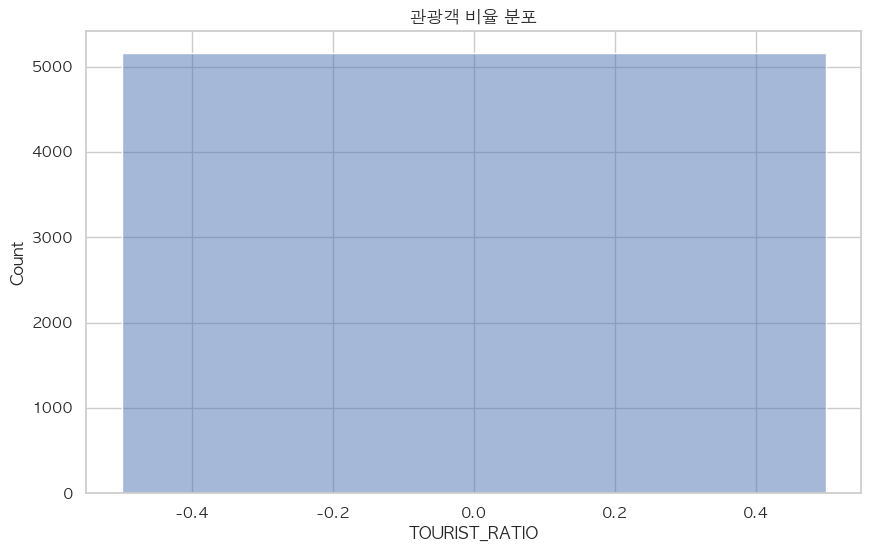

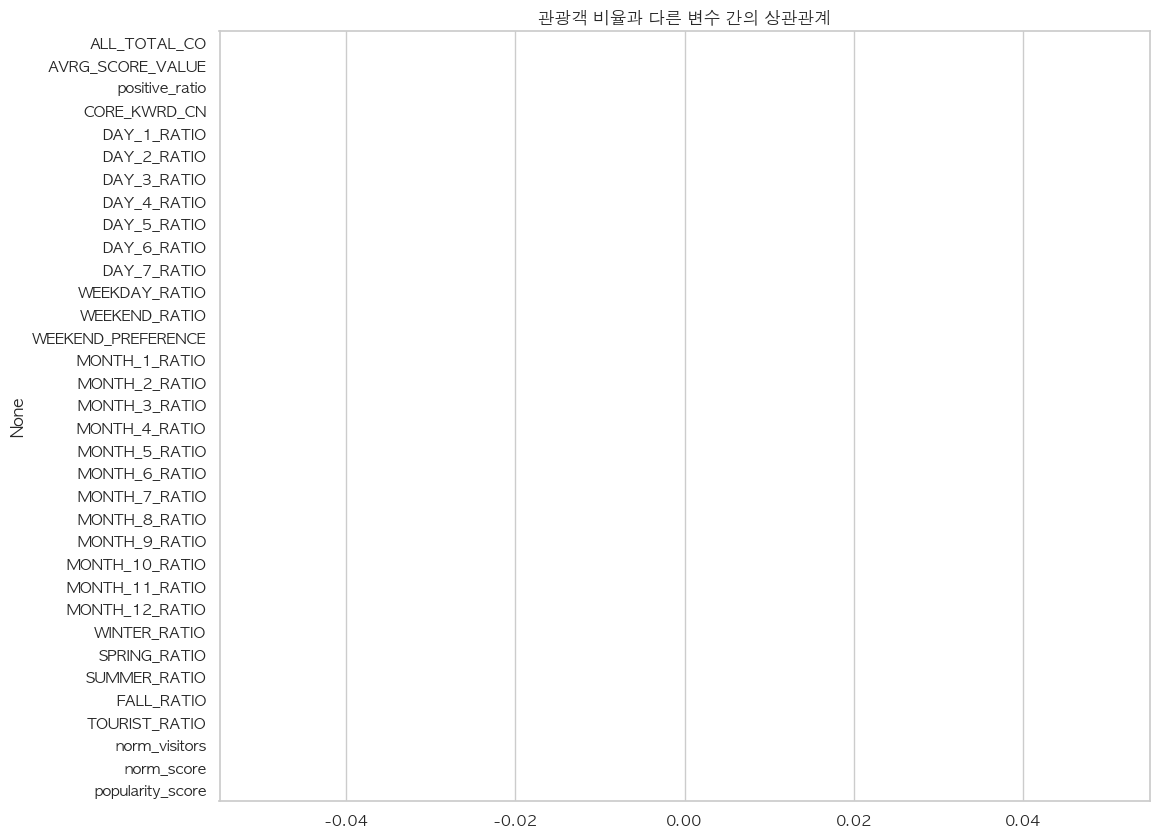

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
# import shap
from sklearn.inspection import permutation_importance

# 데이터 로드 (데이터가 이미 로드되어 있다고 가정)
# df = pd.read_csv('your_data.csv')

# 기본 통계 확인
print(df['TOURIST_RATIO'].describe())

# 관광객 비율 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df['TOURIST_RATIO'], kde=True)
plt.title('관광객 비율 분포')
plt.show()

# 상관관계 분석 (수치형 변수만)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_cols].corr()

# 관광객 비율과의 상관관계 시각화
plt.figure(figsize=(12, 10))
tourist_corr = correlation['TOURIST_RATIO'].sort_values(ascending=False)
sns.barplot(x=tourist_corr.values, y=tourist_corr.index)
plt.title('관광객 비율과 다른 변수 간의 상관관계')
plt.show()

## 특성 선택 및 전처리

In [ ]:
# 타겟 변수
y = df['TOURIST_RATIO']

# 특성 선택 (관련 없는 변수 제외)
# 'features', 'TOURIST_RATIO', 'norm_visitors', 'norm_score', 'popularity_score' 등은 제외
exclude_cols = ['TOURIST_RATIO', 'features', 'norm_visitors', 'norm_score', 'popularity_score']
categorical_cols = ['AREA_NM', 'CL_NM', 'ADDR', 'PEAK_SEASON', '지역']
numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
                if col not in exclude_cols]

# 최종 특성 선택
X = df[numeric_cols + categorical_cols]

# 훈련/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 전처리 파이프라인 구성
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## 모델 학습 및 평가

In [ ]:
# 모델 정의
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# 모델 학습 및 평가
results = {}

for name, model in models.items():
    # 파이프라인 구성
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # 교차 검증
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    
    # 모델 학습
    pipeline.fit(X_train, y_train)
    
    # 예측
    y_pred = pipeline.predict(X_test)
    
    # 평가 지표
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'CV R2': np.mean(cv_scores),
        'Test MSE': mse,
        'Test R2': r2
    }

# 결과 출력
results_df = pd.DataFrame(results).T
print(results_df)

# 가장 좋은 모델 선택
best_model_name = results_df['Test R2'].idxmax()
print(f"최고 성능 모델: {best_model_name}")

# 최종 모델 파이프라인
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', models[best_model_name])
])

best_pipeline.fit(X_train, y_train)

## 특성 중요도 분석

In [ ]:
# 특성 중요도 분석 (트리 기반 모델인 경우)
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    # 전처리된 특성 이름 가져오기
    preprocessed_X_train = preprocessor.fit_transform(X_train)
    
    if hasattr(preprocessor, 'get_feature_names_out'):
        feature_names = preprocessor.get_feature_names_out()
    else:
        # sklearn 버전이 낮은 경우
        feature_names = []
        for name, trans, cols in preprocessor.transformers_:
            if name != 'remainder':
                if hasattr(trans, 'get_feature_names_out'):
                    feature_names.extend(trans.get_feature_names_out(cols))
                else:
                    feature_names.extend([f"{name}_{col}" for col in cols])
    
    # 모델 학습
    best_model = models[best_model_name]
    best_model.fit(preprocessed_X_train, y_train)
    
    # 특성 중요도 추출
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # 상위 20개 특성 시각화
        plt.figure(figsize=(12, 8))
        plt.title(f'특성 중요도 ({best_model_name})')
        plt.barh(range(min(20, len(feature_names))), 
                importances[indices[:20]], 
                align='center')
        plt.yticks(range(min(20, len(feature_names))), 
                  [feature_names[i] for i in indices[:20]])
        plt.xlabel('중요도')
        plt.tight_layout()
        plt.show()

# 순열 중요도 (모든 모델에 적용 가능)
perm_importance = permutation_importance(best_pipeline, X_test, y_test, 
                                         n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

plt.figure(figsize=(12, 8))
plt.title('순열 중요도 (모든 특성)')
plt.barh(range(min(20, len(X.columns))), 
        perm_importance.importances_mean[sorted_idx][:20], 
        align='center')
plt.yticks(range(min(20, len(X.columns))), 
          [X.columns[i] for i in sorted_idx[:20]])
plt.xlabel('중요도')
plt.tight_layout()
plt.show()

## SHAP 값을 이용한 특성 영향력 분석

In [ ]:
# SHAP 값 계산 (트리 기반 모델인 경우)
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    # 샘플 데이터 선택 (계산 시간 단축을 위해)
    X_sample = X_test.iloc[:100]
    
    # 전처리된 데이터
    X_sample_transformed = preprocessor.transform(X_sample)
    
    # SHAP 설명자 생성
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_sample_transformed)
    
    # SHAP 요약 플롯
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample_transformed, feature_names=feature_names)
    
    # SHAP 의존성 플롯 (상위 중요 특성에 대해)
    if len(feature_names) > 0:
        top_feature_idx = np.argmax(np.abs(shap_values).mean(0))
        plt.figure(figsize=(12, 8))
        shap.dependence_plot(top_feature_idx, shap_values, X_sample_transformed, 
                            feature_names=feature_names)

## 결과 해석 및 인사이트 도출

In [ ]:
# 관광객 비율 예측 모델 성능 요약
print(f"최종 모델: {best_model_name}")
print(f"R² 점수: {results[best_model_name]['Test R2']:.4f}")
print(f"MSE: {results[best_model_name]['Test MSE']:.4f}")

# 상위 영향 요인 추출
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    top_features = [(feature_names[i], importances[i]) 
                    for i in indices[:10]]
    
    print("\n관광객 비율에 가장 큰 영향을 미치는 요인:")
    for feature, importance in top_features:
        print(f"- {feature}: {importance:.4f}")

# 계절적 영향 분석
seasonal_impact = {
    '겨울': df['WINTER_RATIO'].corr(df['TOURIST_RATIO']),
    '봄': df['SPRING_RATIO'].corr(df['TOURIST_RATIO']),
    '여름': df['SUMMER_RATIO'].corr(df['TOURIST_RATIO']),
    '가을': df['FALL_RATIO'].corr(df['TOURIST_RATIO'])
}

print("\n계절별 관광객 비율과의 상관관계:")
for season, corr in seasonal_impact.items():
    print(f"- {season}: {corr:.4f}")

# 요일별 영향 분석
weekday_impact = {
    '월요일': df['DAY_1_RATIO'].corr(df['TOURIST_RATIO']),
    '화요일': df['DAY_2_RATIO'].corr(df['TOURIST_RATIO']),
    '수요일': df['DAY_3_RATIO'].corr(df['TOURIST_RATIO']),
    '목요일': df['DAY_4_RATIO'].corr(df['TOURIST_RATIO']),
    '금요일': df['DAY_5_RATIO'].corr(df['TOURIST_RATIO']),
    '토요일': df['DAY_6_RATIO'].corr(df['TOURIST_RATIO']),
    '일요일': df['DAY_7_RATIO'].corr(df['TOURIST_RATIO'])
}

print("\n요일별 관광객 비율과의 상관관계:")
for day, corr in weekday_impact.items():
    print(f"- {day}: {corr:.4f}")

# 지역별 관광객 비율 분석
region_tourist = df.groupby('지역')['TOURIST_RATIO'].mean().sort_values(ascending=False)

print("\n지역별 평균 관광객 비율:")
for region, ratio in region_tourist.items():
    print(f"- {region}: {ratio:.4f}")

# 업종별 관광객 비율 분석
category_tourist = df.groupby('CL_NM')['TOURIST_RATIO'].mean().sort_values(ascending=False)

print("\n상위 10개 업종별 평균 관광객 비율:")
for category, ratio in category_tourist.head(10).items():
    print(f"- {category}: {ratio:.4f}")